In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as mtr
import seaborn as sns
from sklearn.model_selection import learning_curve

In [2]:
#Reading the Data.csv file
data_df = pd.read_csv("D:/Uni of Essex/ML Assignment/CE802_P3_Data (3)/CE802_P3_Data.csv")

In [3]:
#Printing the first deafault 5 rows of the data
data_df.head()

F1      F2     F3     F4      F5      F6       F7     F8    F9  F10  \
0   193.83      UK  49.74  14.16  213.02  343.06  1753.44  -6.03  6.28    8   
1  1495.47  Europe  58.02   5.88  137.80  270.48  1665.33  -0.52  9.72   14   
2  1121.31     USA  68.85   9.18  209.54  295.26  3208.65  -4.00  3.86    6   
3  -305.49     USA  49.29   8.73  171.83  266.06  1704.18  -2.41  4.16    6   
4  1457.07      UK  64.98   7.92   74.10  260.22  1922.34 -11.97  5.00   18   

        F11     F12    F13    F14  F15    F16   Target  
0  -5145.92     Low  11.35   1.01    1  68.92    51.16  
1  11145.82    High  10.30   0.30    5  89.30     0.00  
2  31859.00  Medium   7.98  13.05    4 -11.80  2808.51  
3   8075.76     Low  16.52   2.01    5  41.40  1092.21  
4   9886.72    High   5.37   0.01    1  62.74     0.00

In [4]:
#It shows the summary of the data
data_df.describe()

F1           F3           F4           F5           F6  \
count  1500.00000  1500.000000  1500.000000  1500.000000  1500.000000   
mean    668.60566    61.100000    12.124980   166.596867   234.403933   
std     904.26205    12.549426     8.681726    42.241393    59.715228   
min   -2409.54000   -21.750000     0.120000  -114.370000    23.960000   
25%      66.06000    55.425000     5.835000   146.597500   192.670000   
50%     657.85500    61.155000    10.245000   166.535000   234.310000   
75%    1295.82750    67.035000    16.477500   187.670000   274.500000   
max    3821.25000   109.860000    70.170000   357.100000   471.840000   

                F7           F8           F9          F10           F11  \
count  1500.000000  1500.000000  1500.000000  1500.000000   1500.000000   
mean   1154.974440    -4.494847     8.109187     7.885333   9254.683320   
std     889.404292     3.040026     5.812853     3.620072   8886.071078   
min   -1827.360000   -14.560000     0.080000     0.000000 -31452.340000   
25%     547.087500    -6.450000     3.815000     6.000000   4782.300000   
50%    1146.495000    -4.390000     6.740000     8.000000   9252.570000   
75%    1769.992500    -2.515000    10.945000    10.000000  13343.520000   
max    4347.660000     5.210000    45.140000    20.000000  48778.120000   

               F13           F14          F15          F16       Target  
count  1500.000000   1500.000000  1500.000000  1500.000000  1500.000000  
mean     10.447127     63.602773     3.947333    27.028080   922.082533  
std       3.024250    774.154296     1.836702    58.613624  1092.331874  
min       1.020000      0.000000     0.000000  -177.880000     0.000000  
25%       8.330000      0.130000     3.000000   -11.700000     0.000000  
50%      10.450000      1.010000     4.000000    28.640000   429.570000  
75%      12.570000      6.805000     5.000000    66.320000  1530.205000  
max      19.470000  27474.530000    11.000000   206.400000  3960.010000

In [5]:
#here we can see that there is no null values

In [6]:
corr_matrix = df.copy()
fig, ax = plt.subplots(figsize=(20,20)) 
for codata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABCkAAARuCAYAAAD+q22zAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzdd3RUxfvH8fckpEFCEpLQCb0FkCZNQVFQiqKIgICiqD9FVFQEo2BDUb92RRHBLkWQIoqiUiz0pnQIRUoIIKRAEgKEtPv7Y5c0UhB3N0v8vM7hnLA7e+/z3Jm5uzt37qyxLAsRERERERERkZLmUdIBiIiIiIiIiIiABilERERERERExE1okEJERERERERE3IIGKURERERERETELWiQQkRERERERETcggYpRERERERERMQtaJBCRETkEmSMqWWMsYwxZS7y9WOMMZ84Oi4RERGRf8NYllXSMYiIiMg/ZIypBewHvCzLyiimbGdgmmVZ1Z0fmYiIiMjF00wKEREpdS52dkFJKSjeSy0HEREREUfQIIWIiLiMMeaAMWa0MWaHMeaEMeZzY4xvrudvNMZsMsYkGmNWGWMuy/XcU8aYvcaYk/bX35LruSHGmJXGmHeMMceBscaYesaYpcaYJGNMvDHm61zlrzDGrLc/t94Yc0Wu5343xoyzb++kMWaRMSa0iJxutsecbI+vu/3xqsaY+caY48aYv4wx9+V6zVhjzBxjzDRjTDIwpJDHPHLlnWCMmWWMqVBIHHcbY6LsMe8zxgy1P14O+AmoaoxJsf+rat/ftFyvv8kYs91+7H83xjTOV2+jjDFb7Mfs69z1JiIiIuIoGqQQERFXux3oBtQFGgDPABhjWgGfAUOBEGAyMN8Y42N/3V6gExAIvABMM8ZUybXddsA+oCLwMjAOWAQEA9WB9+37qQAsAN6z7+dtYIExJiTXtgYBd9u35Q2MKigRY0xbYArwBBAEXAUcsD89AzgEVAX6Aq8YY7rkevnNwBz766YX8tgjQG/gavt2TgAfFBQLEAvcCJS3x/6OMaaVZVmngB7AEcuy/O3/juTLo4E93seAMOBH4HtjjHeuYv2B7kBt4DJgSCFxiIiIiFw0DVKIiIirTbAsK8ayrOPYBhMG2h+/D5hsWdZay7IyLcv6EjgLtAewLGu2ZVlHLMvKsizra2AP0DbXdo9YlvW+ZVkZlmWdAdKBmkBVy7JSLctaYS93A7DHsqyp9rIzgJ1Ar1zb+tyyrN327cwCWhSSy73AZ5ZlLbbHddiyrJ3GmBpAR+BJ+743AZ8Ag3O9drVlWd/aX3emkMeGAk9blnXIsqyzwFigb0G3gliWtcCyrL2WzVJsAzSdCquEfG4DFtjzSAfeBPyAK3KVec9+/I8D3xdxTEREREQumgYpRETE1WJy/R2NbYYA2AYURtpvN0g0xiQCNc49b4y5M9etIIlAUyC0kO0CRAIGWGe/jeEe++NV7fvNLRqoluv/R3P9fRrwLySXGthmeORXFThuWdbJIvaRP96CHqsJzMuVcxSQCVTK/0JjTA9jzBr77SWJQE/yHp+i5DkmlmVl2WO5mGMiIiIictE0SCEiIq5WI9ff4cC5Ww9igJctywrK9a+sZVkzjDE1gY+Bh4EQy7KCgG3YBiHOyfNzVZZlHbUs6z7Lsqpim5Ew0RhTz76/mvliCgcOX0QuMdhuW8nvCFDBGBNQxD4K+nmt/I/FAD3yHRNfy7LyxGq/JWYuthkQlezH50dyjk9xP+WV55gYYwy2erqYYyIiIiJy0TRIISIirvaQMaa6fW2IMcC5BS0/Bh4wxrQzNuWMMTfYv+iXw/ZFOw5si0Rim0lRKGNMP2PMuZ/cPGF/fSa2L+8NjDGDjDFljDG3ARHADxeRy6fA3caYLvZFLqsZYxpZlhUDrAL+Z4zxNbYFQO8lZ+2JCzUJeNk+SIMxJswYc3MB5bwBH2zHJ8MY0wO4Ptfzx4AQY0xgIfuZBdxgz8MLGIntVptV/zBeERERkX9FgxQiIuJqX2FbL2Gf/d9LAJZl/YFtXYoJ2AYV/sK+OKNlWTuAt4DV2L5wNwNWFrOfNsBaY0wKMB941LKs/ZZlJWBbYHIkkIDttpAbLcuK/6eJWJa1DvsilUASsJScGQkDgVrYZinMA563LGvxP9zFeHvsi4wxJ4E12BYIzR/HSWyLbM7CduwG2V937vmd2BbG3Ge/daRqvtfvAu7AtrhoPLb1OXpZlpX2D+MVERER+VeMZRU3A1RERMQxjDEHgP+zLGtJScciIiIiIu5HMylERERERERExC1okEJERERERERE8jDGfGaMiTXGbCvkeWOMec8Y85cxZosxppUj9qtBChERcRnLsmrpVg8RERGRS8IXQPcinu8B1Lf/ux/40BE71SCFiIiIiIiIiORhWdYy4HgRRW4Gplg2a4AgY0yVf7tfDVKIiIiIiIiIyD9VDYjJ9f9D9sf+lTL/dgMXwPILH+iC3bjGmYMz+C76p5IOw2FurtkDgFn7fi7hSBynfx3bjKQlh38s4Ugcp2u1nqWy3S0/uqCEI3GcTpVvYObe0tOPBtS19aOPdi4s4Ugc5/5G3UplP5qzv/S0u761u5fKflTaciptbQ5K37mutLU5gIk7FpVwJI7zYMT1nDj7Q0mH4TDBPjcCmJKOw5n8wgeWyp/ETI2ZORTbbRrnfGRZ1kf/YBMF1fu/PlauGKQQERERERERETdiH5D4J4MS+R0CauT6f3XgyL8KCt3uISIiIiIiIiL/3HzgTvuvfLQHkizL+vvfblQzKUREREREREQkD2PMDKAzEGqMOQQ8D3gBWJY1CfgR6An8BZwG7nbEfjVIISIiIiIiIlIIY/6bNyBYllXk4pKWZVnAQ47e73/zaIuIiIiIiIiI29EghYiIiIiIiIi4BQ1SiIiIiIiIiIhb0CCFiIiIiIiIiLgFLZwpIiIiIiIiUgija/supaMtIiIiIiIiIm5BgxQiIiIiIiIi4hY0SCEiIiIiIiIibkFrUoiIiIiIiIgUwhhd23clHW0RERERERERcQsapBARERERERERt6BBChERERERERFxC1qTQkRERERERKQQWpPCtXS0RURERERERMQtaJBCRERERERERNyCBilERERERERExC1oTQoRERERERGRQhhjSjqE/xTNpBARERERERERt6BBChERERERERFxCxqkEBERERERERG3oEEKEREREREREXELWjhTREREREREpFC6tu9Kl/wgxaQ3htKjS0viEpK5/LrIkg6nUJZlMX/iN+xcH4WXjxf9Rw2iev0a55U7tDuGWW9+RXpaOo3aNOamB/tgjGHLsk0snvozsQeP8fD7I6jRIByADb/8wdLZv2a//uj+v3l04kiq1q3usNj3/BHFgknfYGVl0bp7e67qf12e5zPSMpj71jSO7ImhbPly9B99F8GVQgBY+vViNixcg/Hw4IZhfajfunGR21wzfxmrv13K8b/jeWrmy5QL9Acg9dQZ5rw+lcS4E2RlZtHx1mtodX17h+UItjqaPWEe29dG4e3rxeDIgYQ3OL+ODu6OYeprM0g7m06Tdo3p9/AteVb8XfL1b8ybPJ/X5o3DP9CfdUv+ZPHMXwDw8fVhwIi+VK9bzaGxF5XTpdruCstnxnvz2Lo2Cm8fb+4ZPZCaDc7f54FdMXz+vxmkpaXTrF1jBj6SU0e/zF3Or/NW4OnpQbP2EfQb1ovt63cx96MFZKZn4OlVhn7DetG4VX2n5bHnjyh+mmxr/626tadT/j6VnsE3b07j779i8AsoR79cfWrZ14vZuMjWp3o+0Id6rRsTf+gYs1/9Mvv1J/6O55rBPenQuzPbl2/kt+k/Ex9zjPveeZxq9jp0lf0bdvDbx7Zcm17XgXZ98+eazk/vTCN2bwy+AeW48YkhBNpzBUiOO84XD79ChwE9aHNLF5fGfo6z+tHBndHMfffr7Ndfd0d3mna8zGk5LPjwG3at34GXjxe3jrydagXkcHhPDHPfmk762XQatonghmG2HE6fPMXMV74g8dhxgipVYOCYu/ELKMumX/9g2awlAPj4+XDT8P5UqWM7v6385jf++HkNGKhcqyp9Rg7Cy9vLYTm5sh/9vfcQP0yYRUZ6Bh4eHtzwUD+qN6zpsFyckQ/AmZTTzB8/k9jov8EYej82kBqNa/PbtJ/4c+Hq7PfYLnfdQIM2TRyaDziv3Z1zaFc0k0a8w4DRQ2jaqQUAXzz9ITE7o6nZpDZ3vjjU4TkV5lI917myH8363xckHI4FIDXlDL7+fgyb4NzP7gc27GDpp3OxsrJo0rUDbW69Pl9+6SwaPzW7XnqOupvyFUNIjk1gyvCXCa5aEYDKDWrRZdgAAFZN+56o39dx9tRpHpzxllPjL4plWbz92resXh6Fj683z44bQKOIvJ+JUs+kMWbUFA7HxOPh6UHHqyN46LEbs59fsnATn3y4CGOgfoOqvPjaHa5OQ6RAl/yQ0NTZS7n5zldLOoxi7VwfRfzhOCI/f5pbH7uNee/NLrDcvPdnc+tj/Yn8/GniD8exa30UAJVqVWbwc3dTu1mdPOVbdbmcEZMiGTEpkgFP3kFwpQoO/aKYlZnF9x/M5s5xQxk+eTRbft9AbPTRPGX+XLQaP38/Rnz2LB16d2bRZ98DEBt9lK1LNzB80mjueukBvp8wm6zMrCK3GR5RhyH/e5CgihXy7GPt98sJC6/MwxOf5N7XhvPzx9+RkZ7hsDwBtq+NIu5wHGOnjmHQ4/2Z+e6cAsvNfGcOAx/vz9ipY4g7HMeOdTuznzsRe4Kdf+4iuGJw9mOhlSsw4p2HefqTSHoMvp6v3prl0LiLcqm2u8JsXRtF7KF4Xpk+hjtH9WPa2wXX0bS353DnqP68Mn0MsYfi2bbWVkc7N+xh08ptjP3sCV788km6DegMQEBgOR7537288EUk944eyKcvT3daDlmZWSyYOJs7XhzKQ5NGs3XpBmIP5u1TGxba+tSjnz5Lh1s6s/hcnzp4lG3LNvDQpNEMHvcAP3xg61Oh1SsxbEIkwyZEMnT8KLx8vWncwfZlt2LNKgx45h5qNq3rtJyKyvWXybPp8/wDDJkwhl3L/yTh4N95ymxbvAZf/7LcO/k5Wt/UmWVfzs/z/O+fzqN2qwhXhn0eZ/WjyrWq8MgHIxkxKZJ7Xx7K3PGzyMzMdEoOu9fvIP5IHI9/9gy9Hx3A/AkF5/Dd+7Po/chtPP7ZM8QfiWP3H7Ycln29hLotGvD4Z89St0UDltoHJoIrh3DfG4/wyKSn6DyoG9+Otw26JMUnsvq7ZTz4/kgenTyarKwstv6+wWH5uLofLf5sPp0HdWfYhEiuGdyDxZ/NPy8md8sH4KfJ31CvdWOGf/Q0wyZEElqjUvb2OvTunJ2vMwYowHntDmzHbOFn31O/daM82+rU91r6PuHaL1qX6rnO1f2o/+gh2c81vvIyGl/hnEHZ3Pn9/tFsej87jMHvPc3uFX+SEJO3XrYvWY1PubIM+fB5Wva6hhVTvst+LqhSKLe/8xS3v/NU9gAFQO02TRnw+iinxn4hVq/YSUx0PLN/GM3o5/rx+ktzCyx3+12d+Xr+U0yZ9ThbNh5g1XJb/zoYHceUT3/hoykPM2NeJI9F3uzK8EWKdMkPUqxct5PjiSklHUaxdqzaSqvr2mCMoWbjWpw5dYbkhKQ8ZZITkkg9lUrNiNoYY2h1XRu2r9oKQKXwylTM9eGiIJt+20CLa1o5NO5Du6MJqRpGhSqhlPEqQ7OrWxG1ZmueMjtXb6NF17YANOnUnH2bdmNZFlFrttLs6laU8S5DcOUQQqqGcWh3dJHbrFqvevYIfR7GkHYmFcuySEs9i19AWTw8Hdt8t6zaRjt7HdWOqMWZlDMk5aujpIQkUk+nUqdJLYwxtLuuDZtX5hyPORO/pffQXuT+KeU6TWtT1n7lp3ZETRLj8m7TmS7VdlfovlZso0O3yzHGULdJLU6nnCExITlPmcSEZFJPn6VuU1sddeh2ORtX2PL5/btV9BjUBS9v2ySy8sEBAIQ3qE5QaCAAVWtXJj0tg/Q0xw6CnXN4dzQVcrX/ple1YufqfH1qTU6fiujYnP2bbX1q5+qtNL2qFWW8bH2qQtUwDu+OzvPafZt3E1w5lKBKtoG+sPDKhFYvug6d5eieaIIqhxFUORRPrzI07NSKv9blzfWvtVtpcq0t1wZXtuDgFluuAHvWbCGwUggh4ZVdHntuzupH3r7eeHp6ArYZac78Cfao1dto2cWWQ3jjWqSmFJzD2dOphNtzaNmlDVH2HKJWb6OlvU227No2+/GaEbWzr2yHN6pFUnxi9vayMrNIT0snMzOT9LNpBIQEOiwfV/cjjOHs6VQAzp5KJaBCeYfl4qx8Uk+nEr1tL6262WYdlvEqg59/2fP27UzOancAq+cvo8mVzSkXGJBne3VbNsTHz8fJmeV1qZ7rXN6P7CzLYvvyTTS72rmfHY7tiSawSiiB9npp0LE1+/LVy751W4m4ph0A9a9oQUyueilMlYa1KVfBceezi7Xst2307NUaYwxNm9ck5eQZ4uPyfiby9fOmddt6AHh5laFh4+rEHrP1we/mruHW266kfHnbeaFCSN6+JFKSLvpbnjGmUfGl5JykhCSCwnKurgeFBhX4BTgwLKjIMkXZvHQjLTo79oSfHJ83psDQIE6e9wEjkcBQW26enp74lPXldPIpTubLp3xoIMnxSRe0zfza9+pEXMwxXr/9OSYMe5WeD/TBw8OxgxRJ8UkEVcx1/MOCSIzPG1difBJBYYG5ygSSZC+zZeU2gkIDi7yVY9WPa2nSznVd51Jtd4VJjE+mQq46Cg4LOm/QJzEuieBcdRQcFkRivO1N+9ihOPZs2cfLD7zL649MYH/UwfP28efSLYTXr5Y9kOFoyQlJBIYW3f5PJiRSPuwC+1S+125buoFmLqqP4qQkJBKQK9eAkCBS8sWbcjwpu4yHpyc+5Xw5c/IU6alnWf/NEjoM6OHSmAvizH50MOoAb933Km8PfY0+j/TPHrRwtOSExLxtJ+z8tnNe2wwLIjnBNuiQkniS8vZBhvIhgaQknTxvH38sXEODy223GQSGBtGx7zW8MXgsrw56Ft9yfudd8f53+bi2H/W4/xYWffYdb935PAs//Y6uQ3o5LBdn5XPi73jKBfrz7Ttf8eHDr/PduzNISz2bXW7d98uZ+OCrfPvOV5w5edqh+eTk5Zx2lxSfyI5VW2h7w5VOifufulTPdSX1fhS9bS/+QQGEVKvoyHTOk3I8kYDQnHO3f0gQKQmJecqcSkjCP3e9lPUj9eQpAJJiE/jq8deY8/R4Du/4y6mxXoy42CQqVs6pg4qVAomLLfx952TyGVYs3U6b9rbbWWOi4zgYHcd9d77PvbePZ/WKnYW+VsAYj1L5z139m8gWOSyK/4ICBmUN5p+XKcTBqAN4+3hTuXaViwiuKEWPJgMUNOBsjClwJNp2pbD4bea358+dVK5TjcjpL/LgB5H8MHEOqadS//F2ilJwvMXXEUBaaho/T1/MjUMK/5Cxe+MeVv20hpvvc+yH2yJdsu2uYAVe3cifThFXQDIzszh18jRjPnyUvsN6MXnslDzlD+8/ytzJPzB4ZD9HhXy+C8qhgCKF9alcf2ekZ7Br7TaadGzx72J0kAJr4rw+VVBOhpUzfqL1TZ3xdvEV0QI5sR+FN67FyI+fYviEx/nt6yWkp6VfZJBFK6xNXUChC9r+vs17+HPhGrrfexMAZ06eJmr1NkZ98TxPTR9HWmoam35Z/0/DLpyL+9H6H1fS/b5bGDnlBbrfdwvfjZ9xkYEXwgn5ZGVm8fdfh2jT80qGTYjEy9eb5fbbJdrccCWPfvosD0yIxL9CeRZ+8q0Dkjifs9rdj5Pm0e2emxw+o/JiXbLnuhJ6P9q6dANNXTGYfgHtzyqw9gxlg8tzz0cvMujtJ+l0zy38/PaXnD19xjlxXqR/0nUyMjJ59slp9B/UiWrVbTOWMzOzOHQwng8/fZBxr93BK2NncTLZvXKU/64iLxUaY94r7CkgqJDnMMbcD9wPMHny5IsO7lK3av5y1v64GoAaDcNJjDuR/VxifCLlQ/JOFw0MDSQpLrHIMoXZ9PtGp0y5Lx8alCempPjE86bsBoYGkRR/gsCwIDIzMzl7OhW/gLLnvTY5Pin7tcVtM7+Ni9fSqX9XjDGEVA0juHII8YeO/euFy5Z+u4KVC2x1VLNhOImxuY5/XCKB+Y5/UFhgniv3iXFJBIYGEncknoSjx3nlvjeyH3916Fs8MXEEgRXKc3jvEaa/+TUPvno//oHl/lXMxSkN7S63X+etYPkPawCo1bAGx3PV0Ym4xOzbNM4JrhjEiVx1ZCtjyyc4LJBWV12GMYY6jWtiPAwpSacICPLneGwiE5/5nHvGDKJitVCn5VM+NCjPlPik+EQC8k0bLR8aRHLcCQJDL7xPAfz1RxRV6lbHP9ixU9EvVkBIECdz5XoyIRH/fNPk/e1lAkKDycrM5OypVHwDynJ09wH2rNrEsi/nc/bUGYwxlPH2ouUNV7kkdlf2I7DdEuLl683RA39nL6z5b62Zv5z1P9tyqN4gPG/biUs675aF89pmXCLl7W3TPyiA5IQkyofYrpb655pif3TfYea9O4O7xj1A2fK289tfG3cRXKkC5YJsCzM2ufIyoqP206JLG4fk5up+tGnJOnoM7WPLpVML5jt4kMIZ+ZQPDaJ8aBDVG9Wyxd2xBctn2wYpcufWunsHvhr7kcNycUW7O7znIF//z7Y44+nkFHav34GHpwcRTl7joDCX6rmuJN6PMjMziVq1maHvPeGkrHLYjnnOuTslIfG82zT8Q4JIyV0vp8/gG1DWVg9etoV+K9UNJ7ByKIlH4qhUz7WLT+c3Z+YKvpu7FoDGTWoQezSnDmKPJREaVvDn6VdfnE2NmqEMGJzTripWCqLJZeGU8fKkavUQatYKI+ZgHBFNSzZHESh+JsXdwDbgz3z//gDSCnuRZVkfWZZ1uWVZl99///2OivWSc8VNnbIXF2xyRTM2LF6PZVlERx3Ar5xf9hTGc8qHBOJT1ofoqANYlsWGxeuJuKJZsfvJyspi6/JNNO/c0uE5VGsQTsKROE4cTSAjPYOtSzfQqH3TPGUatW/KpiXrANi+fDO1m9fHGEOj9k3ZunQDGWkZnDiaQMKROKo3qHlB28wvMCyYfZt2A5ByIpn4Q7EEVy5g7Yp/6OreHRnz8ROM+fgJmndsylp7He3fYaujwPwDMvY62r/DVkdrF6/nsiuaUq1OVV77ZhzjZjzHuBnPERQWyFOTRxJYoTzHj53go+c/567Rt1OphnOnNkLpaHe5XXtLR57/dBTPfzqKlp2asXrhH1iWxd7tB/Ar50tQ/oGkkPL4+vmwd7stn9UL/6BFR1v7atmxGTs37AHgaEwsGemZ+AeW4/TJM7z31Mf0ub8n9ZvVdmo+VRuEczxX+9+27Pz237BdTp/asWIztS/L6VPblm0gI93Wp44fiaNag5yBuq1L/3T6Pb7/ROX64ST+HUfSsQQy0zPYtXwDddvmbVt12zZl+6+2XHev3ES4PdcB/3uM+z4ey30fj6VVr6tp2/c6lw1QgGv60fG/E7IXyjxx7DhxMbFUyHfv9r/R/qZODJ8YyfCJkTTu0IyNv9hyOBh1AJ9yvgXn4OfDQXsOG39ZT+MOtrbZqH1TNtrb5MYl67IfT4w9zvRxn9H3icGEVs85vwVVDCZmZzRpqWm2/rppNxVrOO5+e1f3o4CQQA5stU333r95NxWqhTksF2flE1ChPOXDgog/dAyAfZt2E2Zf8+Dk8ZyB3KhVW6hY03Gz4VzR7kZ9+TxPTLH9a9KxBTc93K/EBijg0j3XlcT70b6NuwmtXinPbSbOUim7XuLJTM9g94o/qdMmb73UadOMHb/ZvvTvWbWJGs0a2H5ZJulk9gK0SUfjSfw7Ls+vsZSUvgM6MnX2SKbOHsnV1zblx+//xLIstm2Oxj/Al9Cw8wfHJ73/EyknUxmRb2HMq65pyoZ1ewFIPJHCwei47FkWIiWtuJuu1wPbLMtalf8JY8xYp0T0D335/nA6dWhMaHAAf62dwLi35/Dl17+XdFjnadQ2gp3ronhtyEt4+3jTb9TA7OfeeeB1Rkyy/QTTLY/0Y9YbOT9h16iN7f7ebSu28N3EuaQkpfD5Mx9RtW41/u9/wwDYv3UvgaFBhFRx/NVfT09Pbhx2K18+8yFZmVm0ur49lWpW4ZcpP1K1QQ0at29Gq27tmfvGNN65Zxx+AWXp/9RdAFSqWYWmnVry3tBX8PD05MYH+2ZPzSxomwCrv1vKitm/kHLiJB88+BoN2kTQ+7GBdB7UjW/ems77w14Fy+L6e3pl/3SaozRpF8H2tVGMveNlvH29uSMyZyXnV+57gzEf20b9BzzWl6mvzSD9bDoRbRvTpF3jIrf709SFnEo+xczxc+zH1IMnJ410aOyFuVTbXWGatW/M1jVRjBn0Ct4+Xtz9VE4+L9z7Js9/altt+47H+/LZq7Y6atquEc3sddSxZ1s+f20mzw15nTJlPLlnzECMMfw6bwWxhxP4YcpifpiyGIARbw7NXljTkTw9Pek57FamPvMhWVlZtLy+PRVrVuHXqT9StX4NGtn71DdvTmP8vbY+1fdJW5+qWLMKTTq1ZIK9T90wLKdPpaWmsXfjLnoNvy3P/qJWbebHD+dyKimF6WMnU7lOde58aZjD8yqIh6cn197fl7ljJ5KVlUXTLu0JDa/CyukLqFQvnHrtmtHsug789M5UPh36Ir4BZblh1BCXxPZPOKsf7d++j9+f+wUPTw+Mhwe3DO/r8PPaOQ3bRrB7/Q7evmccXj7e9Hl8UPZz7z/4OsMn2nK4aXh/5r41nYy0dOpfHkGDNrZfG7j6tq7MeOVz/ly4hsCKwQx8+m4Afp2+kNMnT2X/aoOHpwcPvT+KGo1q0aRTcz54+A08PD2oWrc6bXpc4bB8XN2PbnrkNn6a/A1ZmVmU8fLipuEDzovJHfPp+cCtzH19KpkZGQRXDqX3CFu9L/p0Pkf3HcYYCKoUQq/h/R2azznOandF+WjkeOIOHeJKw90AACAASURBVCPtTBqv3fEcfR4bSP3Li36f/rcu1XOdq/sRwLZlG1w2mO7h6Unn+/rx7QsTsbIsIrq0JyS8Cqu/stVLnbbNaNK1AwvfncIXw17A178sPUba2tjhHXtZM2NB9vn52gduwzfANlNsxZffsmv5n6SfTefT/3uWJl070H5AT5fklNsVnRqzankUfW/4H76+XjwzLue8NLjfW0ydPZLYo4l88fESatauyF23vQNA3wFXcvOt7Wl/ZUPWrt7FgN6v4+lhGP54LwKDnDvb91Lmzus3lEamqPu3jTEVgFTLsv7NikqWX/jA4ktdIs4cnMF30T+VdBgOc3NN2xoKs/b9XMKROE7/Ot0BWHL4xxKOxHG6VutZKtvd8qMLSjgSx+lU+QZm7i09/WhAXVs/+mjnwhKOxHHub9StVPajOftLT7vrW7t7qexHpS2n0tbmoPSd60pbmwOYuKP0LIf3YMT1nDj7Q0mH4TDBPjfCeSualC5B9R7454vqXQIS/5rklvVW3JCQ/78coBARERERERERuSDFDVJkL/dsjJnr5FhERERERERE5D+suDUpck//qOPMQERERERERETcjSn22r44UnFH2yrkbxERERERERERhypuJkVzY0wythkVfva/sf/fsizrwn8EXkRERERERESkCEUOUliW5emqQERERERERETkv00314iIiIiIiIiIWyjudg8RERERERGR/yxjdG3flXS0RURERERERMQtaJBCRERERERERNyCBilERERERERExC1oTQoRERERERGRQmhNCtfS0RYRERERERERt6BBChERERERERFxCxqkEBERERERERG3oDUpRERERERERAqhNSlcS0dbRERERERERNyCBilERERERERExC1okEJERERERERE3ILWpBAREREREREphMGUdAj/KZpJISIiIiIiIiJuQYMUIiIiIiIiIuIWNEghIiIiIiIiIm5BgxQiIiIiIiIi4ha0cKaIiIiIiIhIIYzRtX1X0tEWEREREREREbegQQoRERERERERcQvGsixn78PpOxAREREREZESY0o6AGeq2GhkqfxOG7vzLbesN5esSfFd9E+u2I1L3FyzB37hA0s6DIc5c3AGAD8fKj111L16DwA+372whCNxnLsbdGPegdJTR7fUstVRaWt347cvKukwHObRJtcDMHPvzyUcieMMqNu9VPaj0vYeO2tf6Wlz/et0B2DO/tKTU9/a3Vly+MeSDsNhulbrCcCvR0pPTtdW7al+5Ob61u7OkGVLSzoMh/niqqtLOgSn05oUrqWjLSIiIiIiIiJuQYMUIiIiIiIiIuIWNEghIiIiIiIiIm7BJWtSiIiIiIiIiFyKtCaFa+loi4iIiIiIiIhb0CCFiIiIiIiIiLgFDVKIiIiIiIiIiFvQmhQiIiIiIiIihdK1fVfS0RYRERERERERt6BBChERERERERFxCxqkEBERERERERG3oEEKEREREREREXELWjhTREREREREpBDG6Nq+K+loi4iIiIiIiIhb0CCFiIiIiIiIiLgFDVKIiIiIiIiIiFvQmhQiIiIiIiIihdCaFK6loy0iIiIiIiIibkGDFCIiIiIiIiLiFjRIISIiIiIiIiJuQWtSiIiIiIiIiBTC6Nq+S+loi4iIiIiIiIhb0CCFiIiIiIiIiLgFDVKIiIiIiIiIiFvQmhQiIiIiIiIihTBG1/ZdSUdbRERERERERNyC286ksCyL+RO/Yef6KLx8vOg/ahDV69c4r9yh3THMevMr0tPSadSmMTc92AdjDFuWbWLx1J+JPXiMh98fQY0G4QBs+OUPls7+Nfv1R/f/zaMTR1K1bnWX5VacSW8MpUeXlsQlJHP5dZElHU6hLMvimw++YcdaWx3dHjmIGg3Or6OY3TFMf/0r0s+mE9GuMX0estXRgs9/ZOvKrXh4GPyDArg9chCBoYH8seQPlsz8BQAfPx/6P9aPanWruTo99v25gyUff0NWVhbNr+tAh37X5Xk+Iz2dH96extG9MfgFlOPmyCEEVQrhyO5ofp4wE7Ado46DetCwQ3OXx39u/99/+A271kXh5etFv5GDqFZQP9oTw+w3vyLjbDoN2zam17CcfrRk6s/ExRzjofdGUN3ej04ln2L6uM85tPsgra9ry80P93V1aoDz2qArHdywgxWfzSUrK4uIrh1o1ef6PM9npqezZPxU4vbF4BtQjutH3k35iiEAxB84zNJJM0k7k4oxhr6vP0EZby++fXY8p08k4+ntBUCv5x6ibFCA03LY80cUP03+Bisri1bd2tOpf/6+ksE3b07j779sfaXf6LsIrmTLYdnXi9m4aA3Gw4OeD/ShXuvGxB86xuxXv8x+/Ym/47lmcE869O7ML1MWsGvNVoyHB+UC/en9+O2UD3FdnTmrT7napfoeu+ePKBZMsrW11t3bc1X+tpaWwdy3pnFkTwxly5ejf662tvTrxWxYaGtrNwzrQ/3WjYvc5rx3vuLwnhiwLEKqVaTPyNvx8fPhwNa/+HHyPI7tP0K/p+6iaacWDskNbPWy4MNv2LV+B14+Xtw68vYC29fhPTHMfWs66WfTadgmghvs7ev0yVPMfOULEo8dJ6hSBQaOuRu/gLLExRxj7ltfcWRvDNfddSOd+l4LQHpaOh+Peo/M9AyyMrNo0qk5XQf3dFg++XObPWEe29dG4e3rxeDIgYQXcL4+uDuGqa/NIO1sOk3aNabfw7dgjMl+fsnXvzFv8nxemzcO/0B/Nq/cyg+f/4QxBk9PD2596BbqNavjlBwKymnW+zk53flkwTlF74phymszSLfn1H943pwWf/0b30yazxvf2nI6dfI0U1+fSfyReMp4ezE4cgDValdxSg7O6FPz3v6KXeu2Uy7In+GTRmdva9vyjfw67WfiY44x9N3HqeaC85+z+tSO1VtZ8uUCjIcHHp4e3DD0Fmo1rev0fApzYts2Dsz8Gisri0qdOlKtR488zx9ZtJjYFSswHh6UCQig3pC78AkJKaFoRYrntjMpdq6PIv5wHJGfP82tj93GvPdmF1hu3vuzufWx/kR+/jTxh+PYtT4KgEq1KjP4ubupne+NqlWXyxkxKZIRkyIZ8OQdBFeq4FYDFABTZy/l5jtfLekwirVjXRRxh+J4ZsrTDHj8NmaPL7iOZr07m9tG9OeZKU8TdyiOqHW2OurS/1qe+uRJIj+KpEn7CH6euhCAkCohPPLOcJ765Em63XE9X7/9tctyOicrM4tFk2bTf+wD3PfBGHYs+5P4g3/nKbNl0Rp8/cvywEfP0ebmzvz+xXwAwsKrMOSdUdzz3pPc9sIwFn7wNVmZmS7PAWCXvR+N+vxp+jx6G9++X3AdffvebPo82p9R9n60+w9bHVW296Na+fqRl3cZrr+rJz3vu9npORTFWW3QVbIys1j28WxueGYYA8c/zZ7lf3I8Jm87i1qyGh//stwx8Xma97qG1VO+s782kyXjp3D10NsYOP5peo97FA9Pz+zXdX3sLm57+ylue/sppw5QZGVmsWDibO54cSgPTRrN1qUbiD14NE+ZDQtX4+fvx6OfPkuHWzqz+LPvAYg9eJRtyzbw0KTRDB73AD98MJuszCxCq1di2IRIhk2IZOj4UXj5etO4w2UAXNm3Cw9OfIphEyJp0LYJS7/62Wm5FcRZfcrVLsX32KzMLL7/YDZ3jhvK8Mmj2fL7BmKj87a1PxfZ2tqIz56lQ+/OLDrX1qKPsnXpBoZPGs1dLz3A9xNsba2obfa4vw8PT3yShz98iqCKwaz9fhkAgRWD6TNyEM2uae2QvHLbvX4H8UfiePyzZ+j96ADmTyi4Xr57fxa9H7mNxz97hvgjOe1r2ddLqNuiAY9/9ix1WzRg6awlAPgFlOXGYX3oeOu1ebZTxqsM9772MMM/fJKHJ0ay54+dHIw64PC8ALavjSLucBxjp45h0OP9mfnunALLzXxnDgMf78/YqWOIOxzHjnU7s587EXuCnX/uIrhicPZjDVs1YMzHTzDm4ye444mBfPWm6z4zbF8bRezhOF6YNoZBI/sz452Cc5rx7hxuH9mfF6aNIfZwHNtz5XQ89gRRf+yiQqWcnH6evoTq9aryzKeRDBk9iNnvz3NK/M7oUwAtr2vLnS89cN7+KtaswsBn76GmC7/MO6tP1W3RgOEfPsnwiZHcOmIg896d6bKc8rOystj/1Vc0fvQRWrz4AvHr1nP6yJE8ZcqF16DZ02NoPvZ5Qlq3InrO3BKKVuTCuO0gxY5VW2l1XRuMMdRsXIszp86QnJCUp0xyQhKpp1KpGVEbYwytrmvD9lVbAagUXpmKNSoVuY9Nv22gxTWtnJbDxVq5bifHE1NKOoxibVu5lTbX2+qoVkQtzqScISlfHSUlJJF6OpXaTWx11Ob6Nmxdaasj33K+2eXSUtM4d1GhdpPalA0oC0CtiFokxuXdpiv8vSea4CphBFUOxdOrDBFXtWLP2q15yuxZu5VmXdoC0OjKFkRv3o1lWXj5emd/WcxIy4BcV0tcbcfqrbTqaquj8CL60dnTufpR15x+VDG8MmEF9CNvXx9qNa1DGe+SnYzlrDboKrF/RRNYJZRAezur17E1+9flbWf712+l0TXtAKjboQWHt9raWcymnYTUrEpobdsXQN+Acnh4uv6Ufnh3NBWqhlGhSihlvMrQ9KpW7FydN4eda7bRoqutr0R0bM5+e1/ZuXorTa9qRRmvMgRXDqFC1TAO747O89p9m3cTXDmUoEoVAPAtm7fOXF1pzupTrnYpvsce2h1NSK621uzqVkStydfWVue0tSadmrNvk62tRa3ZSrOrW1HG29bWQqqGcWh3dJHbPHd+sCyL9LPpgK2tBVcKoXLtang4oe1Frd5Gyy457Ss1pfD2FW6vl5Zd2hBlr5eo1dtoac+/Zde22Y/7BwVQvWFNPHMNZAIYY/Dx8wEgMyOTzIxMp3WpLau20c7e5moXc76u06QWxhjaXdeGzStz6njOxG/pPbRXnhh9/XyyZyWcTU07V00usXnlNtrb34PqRNTi9KlCcjqVk1P769uweUWunD74lj5De+V5zdEDR2nUqgEAlcMrkXDsOMnHTzo8fmf0KYBazerhZ/8cl1vF8MqEVXft+c9ZfconV7uzfX4ouc96Kfv34xtWEd+wMDzKlCG0TRtObNqcp0xgo0Z4+tj6ekCdOqSdOFESoYpcsAv6hmGM8bIsKz3fY6GWZcU7JyzbST0oLGdUOSg0iKSEpDzTepMSkggMCzqvzIXavHQjQ8b+n2MC/g9KjM9bR4FhQSTFJxGYu47ikwjKV0eJ8Tl19MOnC1i/eD2+5XwZ/tbD5+1jzU9raNy2sZMyKNzJhEQCQnPiDggJ4ki+L08nE5Kyy3h4euJTzpczyacoG+jPkV0H+HH8VyTFHefGxwfnucLtSsn56yg0iOR8/Sg5IYnAXLkGhgaRHO/6gaGL4Yo26EynEhLxD8mJ3z8kiGN7DuQrk4R/SE478y7rR+rJUyQeicUYw/cvfsCZpBTqd2xNy1u6Zr/u1wnTMB4e1G3fgtb9ujntA1RB7efQrvx9JZHy9nry9PTEp6wvp5NPcTIhieqNamaXKx8aeN6Hx21LN9Csc94vuku+/IHNv9jqbMirwx2dUpFKS5+6FN9jk+PzxlNQW0tOSCQw9ALbmr1OitrmN29PZ/f6HVQMr0z3+3o7LJfCJCck5omnfFhg8e0rLIjkhEQAUhJPZpctHxJISlLxX2yzMrP4YPibHD8SR7tenajRqJaDsskrKT6JoIq52lOY7Vyc+3xtO6cH5ioTSJK9nras3EZQaCDVC7j9c9PyLcz/ZAEnE1MY9sp9Tom/IInxSQTnyik49MJyOvcetPlcTvXy5lStbjU2LdtCvWZ1OBAVzfGjJzgRl0j5Co6dFeesPuVOnNmntq/czKLPf+BUYgp3vni/s1MpVFpiIj4VKmT/3zs4iJP79xda/tiKFQQ1beqK0EqVkhyI+i8q8rKbMeYaY8wh4IgxZpExplaupxc5MzCsAuLJPzx+IWUKcTDqAN4+3lR20j1+/1X5O7BVUB3lKnPjvTfwwsyxXN6lNcu+XZ6n3J6Ne1jz0xpuuq9X/k04XwFxn3d5qYDkzuVWtWEt/m/iGO56exRrZi8mIy39vLKuUFAa+fMoqI5KcvbHv+XINuhsBR76fOcwq4BSxhiyMrP4O2ovXR+7i1teGcG+tZs5tGUXYLvVY8C7Y7jl5cc4ErWXXb+vc0b49gALPBEXX8QYrIL6UK6/M9Iz2LV2G0065r3nv+tdNzJyygs063x59hR8Vyk1feqSfI8t8OjnLfFP2popfpt9Hr+dyGnjCKtRiW3LNlxgnBevuPNVEYUuep8enh4MnxhJ5LQXOLQrmmMHjhT/ootQcB0U3+bAdqX65+mLuXFIjwKfb9HpMp77cjT3v3gPP3z+478N9cIV3NmLLWKMPadpi+l19/k5dRvUhdMpZ3j5/97gt3nLqVG/Gp5OmSnnjD7lXpzZp5pc2ZwRnzzN7c/fy5IpLmx3+RX4Xlpw/HFr1nDqQDRVu11f4PMi7qK4mRSvA90sy9pujOkLLDbGDLYsaw1FTKgzxtwP3A8wefJkKnU7f4Gagqyav5y1P64GoEbDcBLjcqYiJcYnUj6kfJ7ygaGBJMUlFlmmMJt+3+iWt3q4u+XfLme1vY7C89VRUtz5xz8oLJDEfHUUWEAdte7SmsljPqKn/QPI4b1HmPHWTB7431DKBZZzRipFCggN4mR8TtwnExIJqFC+wDLlQ4PJyszk7KlUfPNNbwytURkvX2/iov+mSn3XLJC3ev5y1v1kq6PqDfLVUXwi5SsU0I9y5Zr0D/pRSXBVG3QF/5AgUhJy4k9JSKRshcACyiTib29naafP4ONfFv/QIKo2qYdfeX8AarZqQty+GKpf1jB75oW3ny8NOrUm9q/o7FtGHK18aNB57ScgXw7lQ4NIjjtBYGgQmZmZnD2dil9AWdtrc9VNcnwSAbmubv31RxRV6lbHP7jg9nhZ59ZMHzuZa+9wzkJ/55SWPnWpv8fmby9J8Yl52gvYrgQnxZ8gMOzC21px2/Tw9KDpVa1YMfcXWl3f3qE5AayZv5z1P+e0rzxxxiWd995zXp+LS6S8vc/5BwVkXyVOTkjCP/DCr7z7+Zel9mX12P3HTirVqvpvUsq29NsVrFxgy61mw3ASY3O1p7jzz8W283VSrjJJBIYGEncknoSjx3nlvjeyH3916Fs8MXEEgbmOT/3mdZn6WgIpSSn4B/o7JIf8fp+XK6dG4ZzIldOJ+ESCQvPmFFxQTiG2nOKPHuel/8vJ6ZX73+LJD2053fnkQMA2uPPMwHGEVHH8IofO6lMlzdV9qnazesz9ezqnklIo56R2VxTv4GDOHj+e/f+0E4l4BwWdVy5xxw4OL/iRJk+MwsPLy5UhivxjxQ3LeluWtR3Asqw5QG/gS2PMLRQx/GpZ1keWZV1uWdbl999/4dOfrripU/aCW02uaMaGxeuxLIvoqAP4lfM7bwX38iGB+JT1ITrqAJZlsWHxeiKuaFbsfrKysti6fBPNO7e84NjEplPvTkR+FEnkR5E0u7IZ6xfZ6ujAjgP4lvPLM8URINBeRwd22Opo/aL1NL3SVkexh+Kyy21btY1K9vubjx87wWdjP2Pw6DuoWKOi65LLpUr9cI4fiSPxaAKZ6RnsWLaBem3ztq167Zqy9RfbFeqdKzdR87L6GGNIPJqQvVBmUuxxjh+OJbBihfP24SwdburEox9G8uiH9n60xFZHB6MO4Fu28H508Fw/WrKeiA7F96OS4oo26CoV64WT9HccycfiyUzP4K8Vf1K7Td5jX6tNM3b+thaAvas3Ua1ZA4wx1GjRmIQDR0g/m0ZWZiZHduwhuHplsjIzOZNsW9MmMyOTA39sp0K4Y75wFKRqA1tfOXE0gYz0DLYt20Cj9nmnkTZs15RNS2x9ZceKzdS295VG7ZuybdkGMtIzOHE0geNH4qjWIGf68Nalf9Ls6rxfdBMOx2b/vXPtNkJdcH9zaelTl/p7bLUG4STkamtbl57f1hq1z2lr25dvpnbznLa2dekGMtJsbS3hSBzVG9QsdJuWZZFwxHZ+sCyLXWu3Oe1e+vY3dWL4xEiGT4ykcYdmbPwlp335lPMtuF78ctrXxl/W07hD0+z8N9rz37hkXfbjhTmVmMKZlNMApJ9NY+/G3YQ58H336t4dsxe1bN6xKWvtbW7/DlubK+x8vd9+vl67eD2XXdGUanWq8to34xg34znGzXiOoLBAnpo8ksAK5Yk9HJd9Vf/g7hgy0jMpV955Fzc639KRpz95gqc/eYLmVzZljf09aF8ROfmW9WGfPac1i9bT/EpbTm/MG8fLM5/j5Zm2nMZ8ZMvpdMoZMtIzAFi5YA31L6uLX641lBzFGX3KHbiiTyUcyWl3h/fEkJGRSVkntrui+NeqRWpsLKlx8WRlZBC/fj3BzfP+qtypgwfZN20aDR9+CK/yJT9oLlKc4mZSpBtjKluWdRTAPqOiC/AD4NSleRu1jWDnuiheG/IS3j7e9Bs1MPu5dx54nRGTbD/Necsj/Zj1Rs7PozVqY1u/YNuKLXw3cS4pSSl8/sxHVK1bjf/73zAA9m/dS2BoECFVQp2ZwkX78v3hdOrQmNDgAP5aO4Fxb8/hy69/L+mwzhPRLoIda6MYN/glvH29GfRETh29fv/rRH5kq6P+j/bL+fnHto2JsK8x8f0n3xMbY7uvvkKlCvR/rB8AC6cu5FTyqexfavDw9GTUhyNdmpuHpyfXP9CXr5+fiJWVxWVd2xNWswrLpi2gSv1w6rdrRvPrOvD921OZdP+L+PmX5ebIIQAc2rGXNXOW4FHGE2MM1z/Qn7IlMLIO0LBtBDvXR/HG3S/h5eNNv5E5dTR+2Os8+qGtjnoP78ds+88MNry8MQ3P9aOVW5g/cS6nklL44tmPqFK3Gve+YutHr975AmdPnSUzI4Ptq7dy7yvDqFSzskvzc1YbdBUPT086/V8/vn9xIlaWRaMu7akQXoV1MxYQVjec2m2b0bhLB34ZP4VpD76Ar39Zrnv8bgB8/cvS/KZrmRP5BgZDeOsIal3elPTUs/zw4kQyMzOxsrKofllDIrpe4bQcPD096TnsVqY+8yFZWVm0vL49FWtW4depP1K1fg0atW9Gq27t+ebNaYy/dxx+AWXp++RdgG2l9yadWjJh6Ct4eHpyw7C+2Yt/pqWmsXfjLnoNvy3P/hZ//j0Jh211FlixAr0e7u+03ArizD7lSpfie6ynpyc3DruVL5/5kKzMLFpd355KNavwy5QfqdqgBo3tbW3uG9N45x5bW+v/lK2tVapZhaadWvKeva3d+GBOWytom1lZWXzz1nRST6eCZVG5drXstnZoVzQzxn3KmZQz7Fy7jV+n/cQjk0cXGvc/0bBtBLvX7+Dte8bh5eNNn8cHZT/3/oOvM3yirV5uGt6fuW9NJyMtnfqXR9CgTQQAV9/WlRmvfM6fC9cQWDGYgU/bzhcnjycz8ZE3OXs6FWM8WPXt7zw6eQwnjycx563pZGVmYVkWza5qSaN2zrlXvUm7CLavjWLsHS/j7evNHZEDsp975b43GPPxEwAMeKwvU+0/1xnRtjFN2hW9LtWmZVtYu2g9nmU88fbx4p7n7nTZveNN20ewbW0Uz93xMt4+3tz5ZE5OL//fGzz9iS2ngSP68uWrM0hPS6fJBeR0NPoYX/xvOh4eHlSpVYk7nhhQZPmL5aw+NevVL9m/5S9OJ6fwxh3Pce3gHrTu1oEdKzez4EPb+W/q85OpUqc6d73s3POfs/rU9hWb2bhkPR5lPPHy9mLA6LtKbM0C4+lJ7UEDiXr3XSwri4pXXknZalU5+N13+NesSYUWLYieM4es1LPsnjQZAJ+QCjR62LXrcF3qjHHb35solUxB95RlP2lMVyDOsqzN+R4PBB62LOvlC9iH9V30T/8uSjdyc80e+IUPLL7gJeLMwRkA/Hyo9NRR9+q26fqf73btz0k6090NujHvQOmpo1tq2eqotLW78dudu1SPKz3axHa/6sy9rv2JT2caULd7qexHpe09dta+0tPm+tfpDsCc/aUnp761u7PkcAnef+9gXavZbhf79Ujpyenaqj3Vj9xc39rdGbJsaUmH4TBfXHU1uPS3dVwvvPlLxS/icgk6uPkZt6y34mZS7LYs62D+By3LSgIuZIBCREREREREROSCFDdv5dtzfxhj5jo5FhERERERERH5DytuJkXu6R91nBmIiIiIiIiIiLsxxV7bF0cq7mhbhfwtIiIiIiIiIuJQxc2kaG6MScY2o8LP/jf2/1uWZek3bERERERERETEIYocpLAsy9NVgYiIiIiIiIjIf1txMylERERERERE/rOM0ZoUrqSjLSIiIiIiIiJuQYMUIiIiIiIiIuIWNEghIiIiIiIiIm5BgxQiIiIiIiIi4ha0cKaIiIiIiIhIIbRwpmvpaIuIiIiIiIiIW9AghYiIiIiIiIi4BQ1SiIiIiIiIiIhb0JoUIiIiIiIiIoUwurbvUjraIiIiIiIiIuIWNEghIiIiIiIiIm5BgxQiIiIiIiIi4ha0JoWIiIiIiIhIYYyu7buSjraIiIiIiIiIuAUNUoiIiIiIiIiIW9AghYiIiIiIiIi4Ba1JISIiIiIiIlIIozUpXEpHW0RERERERETcggYpRERERERERMQtaJBCRERERERERNyCsSzL2ftw+g5ERERERESkxJiSDsCZ6rZ+t1R+p93752NuWW8uWThz1r6fXbEbl+hfpzs/H/qppMNwmO7VewDgFz6whCNxnDMHZwDw6a6FJRyJ49zbsBvzDpSedndLLVu7K211VBrPDV/uKT11dFf9bny+u/Tkc3eDbgBM3LGohCNxnAcjrmdBTOnpRzfULA1VoAAAIABJREFUsPWj0pbT9wdLTz69wm11VNo+q5a2czeUvn409a/SU0eD63Ur6RCczhi3/C5faul2DxERERERERFxCxqkEBERERERERG3oEEKEREREREREXELLlmTQkRERERERORSZHRt36V0tEVERERERETELWiQQkRERERERETcggYpRERERERERMQtaE0KERERERERkUIYo2v7rqSjLSIiIiIiIiJuQYMUIiIiIiIiIuIWNEghIiIiIiIiIm5Ba1KIiIiIiIiIFMaYko7gP0UzKURERERERETELWiQQkRERERERETcggYpRERERERERMQtaE0KERERERERkcLo0r5L6XCLiIiIiIiIiFvQIMX/s3ff4VFU+x/H37Ob3iEJkAAhtEBCKKI0AcuVZkW9gIJXBbGB14IFe+XqtWAXEEQFQUAQEBCVptKkiiAlEIqE0JNAEgIEkt35/TFLeoD7Ixv25n5ez5PnSTZnd893v2fOzJ45c0ZEREREREREPIIGKURERERERETEI2iQQkRERERERERKMQyjh2EY2wzD2GEYxjNl/D/GMIxfDMP4wzCMPw3DuO5C31MLZ4qIiIiIiIiUxzAudg0uCsMw7MAIoCuwF1hjGMZs0zS3FCn2AjDVNM1RhmEkAD8AsRfyvppJISIiIiIiIiIltQV2mKa5yzTN08AUoGeJMiYQ4vo9FNh/oW+qmRQiIiIiIiIiUlJtILXI33uBdiXKvALMNwzjYSAQ6HKhb6qZFCIiIiIiIiL/YwzDuN8wjLVFfu4vWaSMp5kl/u4LjDNNsw5wHTDBMIwLGmfQTAoRERERERGR8lTRNSlM0xwDjDlLkb1A3SJ/16H05RwDgR6u11thGIYfEAEc/v/WSzMpRERERERERKSkNUBjwzDqG4bhA9wOzC5RZg9wDYBhGPGAH5B2IW960WdSbF+bxNxPZ2A6nVzaoz1X9Ola7P/5p/OZ/u5E9m9PJSAkkD7P3k21muEALP5mAevmrcSw2bh+0K00vjT+rK+5cvYSVny3mCMH0nlmyusEhgYBkHv8JN++PYHMtKM4HU46/f1qWndrX6FxmqbJjBEz2LIqCW9fb+4Y2o+6cXVLlUtNTuXrtyeRdyqPhHbx3PrQrRiGwdwvf2Dj8o3YbAZBYcHcMbQfoRGhrF24loVTFgHg6+9Ln8d6U7th7Qqt+4X69J0HuPaaS0jLyOayrkMvdnXKtev3LSwaOwPT4aRFtw6071WiLeblMff9iRzakYp/SCA3PdWf0JrhHEhOYd6IKYCV5459ryWuQ0sAcnNO8NMnk0lPOQCGwbWP9KN20/pujcM0TeaMmsG21Ul4+3nT+4l+1G5cuq3t3Z7KtOGTyD+VR5O28dw4yGprJ7KPM+mN8Rw9dIRqNavT7/n+BAQHALBzw3a+/3QmjnwngaGBPDD84YLXczqcfPzwu4SGh9J/WMmZYhXDHTn69N5X8PH3xWazYdht3P3eU26pe3nc1TdsXL6RuV/+gM1mYLPbuWXwLTRs3sDt8ez8fQsLxlj9b8tuHbi8d+kczXlvIgd3pOIfHMjNT/cnrGY4f/2xlV/GzcaR78DuZedv99xMbMs4ACY+8xE5R7Px8vEGoO+wwQSGBbs9ljN2/b6FhZ/NwOl00rJrBzqUEdP3703k4E4rpp5DrZj2J6fw0yeF7a5Tv2tp0qEl2WlH+f79CRw/egzDMGjZ43La3HRVpcVT0u51W1j8+XRMp5NmXTrQ5u/div0/Py+P+R9O4PDOVPyCA7nuyQGE1Agn+3AGXz38OtWiawBQKy6WawbdfjFCwDRNZo6YQdLqJHx8vek7tB91yuj3UpNTmfz2JPJO5xHfNp5bXNvR7NGz2LJyM3YvO+HREfR9qi/+QQEcOZjBm/e8SY26kQDUi4+l92N9FFMFxDZrZGFstz1Vdmx7k1OZ8k5hbD0HW7HNGWPF5uWK7bYnrdgqgzuOW2e+N4ltqzcTGBbEw58+W/BaB3buZfbHU8nPy8dmt3HjQ72p06Se22JzR/895aWR5BzJxul0UjehId0H9cZmr7xzpO7ajhz5Dr55dwp7t+/F6XRwWZc2dOnXtYwaVKyda7cwz5WjVt060LFk+8vLY/a7EzngytGtz1g5OpF9nOlvfM7+7Xto2aUdPQb1LnjO5iXrWP7NfJxOJ43bNOOae0quiSj/y0zTzDcM45/APMAOfGGa5mbDMF4D1pqmORt4AvjMMIwhWJeC9DdNs+QlIf+RizpI4XQ4mTNiGv3fGExIRBifPvouTds1p0a9WgVlfp+/Av8gf4Z88SJ//rqO+V/M4bZn+3M45SAbF6/j4U+f5diRLL58dgSPjX0BoNzXjEloQJN2zfhi6CfF6rFqzlIiY2rxj1fv53hmDh/e9zotrr4ML++K+3i2rE4ibW8aL3z1PClJKUz7cBqPj3i8VLmpH0zjtiF9iE2IZfSzo0lanURCuwSu6fM3rh9g3XJ28YzF/DRhHrcN6UN4VDiPvP8wAcEBbFm1hW/e+6bM172YJkxbzKfj5zH2/cEXuyrlcjqcLBw9jT6vPURweBhfPTGcRm0TiYiJKiizccFK/IICuH/MSyQt+Z1fx8+m59ABRNSL4q73nsRmt5NzJItxj75Fo7aJ2Ox2Fn02g/qt47n5mYE48vLJO3Xa7bFsW5NE+r40nvzyeVK3pvDdx9N46KPSbeK7j6Zx66N9iImP5csXRpO8NokmbRL4deoiGl0Sx1W3deHXbxay+JuFXHvvTZzMOcGsT77lntcfJKxGNXIyjxV7veXfLaZG3ZqcOpHrlrjclSOA219/mICQILfU+1zc1TfEtY4j8fJEDMNg3879jBs2jufHPefWWJwOJ/NGTaPvvx4iJDyML4cMp3G7RCKL5GjD/JX4BQYw6LOX2Lz4d34ZN5tbnh6Af0ggvV96gODwUA7v3s+Ul0bxyFfDCp7X88m7iGoc49b6lxfT/E+ncfswq92Ne9yKqWi7+3O+1e4eHPMSW5b8zq/jZnPz0wOIjImi//uF7e6LR96icdtEbHYbf7vnFmo1qsupE7mMG/IO9Vs1KfaalRnfr2OmccsrDxEUHsaUoe/QoG1zwusW1mXzwhX4BgbQf9TLbFv6O8u+msV1T94DQFjNCO54v9Qt0ytd0mqr33tuvLUdffvhNB77pPR29O2H0+jzeB/qxcfy2XOj2bomifi2CTS5tAnX33sDdrudOZ/NZuHkhdx4300ARESH8+Toyh9gr4oxnbF1dRJp+9J4Ztzz7ElKYfpH03j049KxTf9oGr2GWLGNfb4wtrjWTbhuoBXb95/NZtHkhdzgis2d3HHcarPbuKRrW9rd1JnpwycWe795n8/m6jt6ENcmgeTVm5n3+WwGvv1wyWpVWGzu6L9veWYAvgH+1oD8v78gadkfNLvyUrfEUBZ3bUfrF68nPy+foWOf5nTuad4a+G9a/6011WuFuy0Wp8PJj6Omcce/HiIkIozPhwwnrn3xHK2fZ+2PHhpr5ejnL2dz6zMD8PLx4so7ryct5QBpKQcKyp/IPs6iL2Yx8MMnCQwNZtZ7E/lr/Tbqt2ritjjkv49pmj9g3Va06GMvFfl9C9CxIt/zol7usTc5hfDoSKpHReDl7UXzK1uTtHJjsTJbV2yiVZe2ADTr3JJd65MxTZOklRtpfmVrvHy8qFYrnPDoSPYmp5z1NaMb1SkYzS7GMDh9MhfTNDmdewr/4IAKH+XdtHwjbbq1wTAMYhNiOZlzkqyMrGJlsjKyyD2RS/1m9TEMgzbd2rBxuVV3v0C/gnKnc08XXBZVv1n9grPcsQmxZKYVf01PsHz1Vo5k5lzsapzVge0phEVFElYrAru3F/GdW7NjVfG2uH3VRhL/ZrXFJh1bsWeD1Ra9fX0Kvuzmn87nzPoyp06cZO/mHbTo2gEAu7cXfpVwpmfLio207mK1tZj4WE4eP0l2ibaWnZHFqRO51Euw2lrrLm3Y/NvGYs8HrMdXWI+v/2UdzTq2IKxGNQCCipzJzkrLZOvqLbS5tmJnIBXljhx5Anf1Db7+vhiuP07nnqqUSyn3J6dQLSqSaq4cJVzRmu0l+vTklRtpfo2Vo/hOrdjtylGthnUJDg8FILJeFI68PPLz8txf6XM4sN2KKaxoTGW0uzMxNe3YipQz7c6vRLtzJSGoeii1Glln8nwD/AivW5NjGRen7z60PYXQqAhCXfHFdbqUXauLx7dr9UYSrrYW8m58eStS/7Ti8ySbftvIZV2Lb0fl9Xuxrn7vsq6F21GTy5pid+WqXnwsWR6wL62KMZ2xecVGLnPtp+olxJJbTmy5RWMrsp8qFVt65cTmjuNWgNjmjfAPLn18YBhGwcB/7olcgsNDSpWpKO7qv30D/AHrC7YjL79gv1RZ3LUdGYa1z3U4HOSdysPLywvfAD/caX9yCtWjI6kWZeWo2RWtSS6Zo1UbaVEkR3+5cuTj50tMs4Z4eXsXK595MJ3q0ZEEhlrHdPVbxbF1+Qa3xvFfy1ZFfzzUOacKnFmZ0zRNp+s6lERgt2maRy70zbPTswiNDCv4OzQijL3bUoqXycgkNML6UmS32/EN8ONE9nGOZWRRp2nhlLeQiFCyXTupc71mSe1v7MzXr37G23e8xOmTufR5tj82W8VmLTM9i7DIaoX1igwjKz2LUFenDpCVnkVYkbqHRYSRWWTH+/3nc1mzYA1+gX48/O4/S73Hyh9XEt82vkLr/b8iJyOT4IjCzz44Ioz9JdpNTkYWIa4yNrsd30A/Th47TkBIEPu37ebHjyaRnXaE64fcic1uJ/NgBv6hQfz44dcc/msfNRvV5Zr7/o6Pn69bY8ku2dYiwsjOyCKkSFvLzsgiNKL4dnJm+8k5eqygbEh4KDmuAab0vYdxOJyMfupjTp84xeU3X8GlXa0d4ZxPZ3LtvTe5bRYFuCdHYA1XTH1pJIYBLbt3pFWPCh0IPid39g0blv3J92O/Jyczh/tfv8/NkcCxjExCIs+eo2MZWQVlbK4+/WT2cQJCC2eybF2+npoN6hQ7mPr+g68xbDaaXt6Sjrd3r7QD3WMl2114GPuTS8cUXLLduWLav203P3w4iay0I9zweGG7OyPzUAaHd+4j2o1TuM8m50gmwRGF7S8oPIyDybuLlTmekUVQ0fgC/Mk9dhyArMMZTHr8LXz8/ehwx/XUTmhUaXUvqmS/F+bajkJKbEdF+72wyMJ+r6jVP62i1VWXFPx95OAR3n3gHXwD/bhuwHU0aN7QTVEUVxVjOiMrPatgwBusfVBZsYUV3U+54i9p9bxVtLryklKPu4O7jlvLc+0Dt/DVC6P4aewsTNPk/ncfq8BoinNn/z35xZEcSE6hwWUJNO3Yym0xlMVd21HLK1qx6bdNvNLnJfJO5dHzwZsJDAl0YySuHJ3jOOh8clRUtahIMvYeIvNQBiERYSSv2IgjP999QYicp7MOUhiGcTMwGnAahvEg8BxwHIgzDGOQaZpzynne/cD9AKNHjyasS3lTdM99JqaskzWGYZR5Fscw+H+d3dn++1ZqNajNgDf/yZED6Yx7biT1mjUsdobSHUoeZJcX6xk3DLyeGwZez4JJC1jy3VKu639twf+2/7GdlT+u5NEPHnVbfauyc332Vpky2pzrjHx0k1gGjniOjNSDzP1gIg0uTcDpcHJo51663N+L6CaxLPpsOqu+XUjnf1zvlhgK6lnWg+fR1s51qt3pcLJveyr3vTWYvFN5jHzsA2LiY0nfm0ZQWBB1Gtdl54bt/+96n4s7cuTl402/t4YQHB7K8cxjTH1pBOF1alI38eJ80SqocwX1DS07taBlpxbs+HMnP4z7kYfeuQiXXJVqV2UGU/BrWsoBfhk3m77DCuva88m7CI4I49SJXGb8+3M2/bym4Gye253PtlLm/qiw3d078jnSUw8y9/2JNHS1O4DTJ08x89+fc819txacbax057Ndlf0hEFAthHvGvIZ/SCCHdu7h+39/xj8+eu6ixHI+fdr5lFnw9XxsdhuXXmNNRw+pHsqLX79MYGggqcmpfPny5wwd+4zbjw/Ot77/bTGdcV79eVlPLFFm4dfzsdtttL6msi4fqPjj1rNZM3c5195/C806tWLjkj+Y+cFkBvz7ofOt7IWrgP4brHWE8k/nMWv4V6T8mUz9S5q6obJlc9d2tGdrCjabjVe+eY0Tx07wyZCPiGsdR3h0RAXVvLSyv+Kc+zjobA3NPziAax/qw4w3x2HYDOrE1yfzYMaFVVSkApxrJsXLQEvAH9gAtDFNc5thGPWA6UCZgxQlbmViTt31U5kvHhIRRlZaZsHfWemZBdPFzrBG148SGhmGw+Hg1Ilc/IMDSj03Oz2r4Lnnes2S/liwis59umAYBuHRkVSrFU763kMXvDjR0u+WsuKHFQDENIkhM+1oYb3SMgkpMW0vLDKUzCJ1z0zPJLSMqX2XXnMpo58bU/BFZN/O/Ux+dwoP/vsBAkPdO4pbVQVHhHEsvfCzP5aeSVD1kFJlstOts45Oh4NTx3PxKzE9M7xuLbz9fEhLOUBwRBjBEWFEN4kFIO7yVqyavsAt9V8xeymrf7TaWp24Em0tPZOQErGERoSSlV58OznTHoOqBRfMvMjOyCIozBp9D40MIyA0EB8/X3z8fKnfvCEHdu1n/45UtqzcxNY1W8g/nc+pE7lMeWsCtz99Z4XG6I4cRTWOKegfAsOCady+BQe2p7h9kKKy+oYzGrVoyNf708nJyiGonLMpFSE4PIzstOI5Ci6ZI1eZkDM5cvXpANnpR5n++lhufPxOqkVFFj7HdebIN8CPZldexv7klEobpCjV7jLKiMlVJuQs7S6iRLtz5DuY+e/PaXbVZTS5vGWlxFKWoPAwjqUXtr+cjEwCq4eWKpNTdLs6cRK/4AAMwyg4W1qzYQyhtSLI3J9GzUaVs3bIsllLWenajuqW6Pcy00pvI2GRxfu9zBLb2pr5q9mycjOD3nmo4Auzl48XXj5erveoS3hUOGl7D1O3iXtirIoxnbF81lJWnYmtSQyZh0vsp0rGFhFKZtH9VIn418xfTdKqzTzw9kOlBjjcxV3HreX5Y+FqrnvwVgASO7di1geTKzCa4tzVf5/h5eNN43aJJK/c6PZBisrYjtb9vI6mbZpi97ITXC2Y+s3qk5qc6tZBihDXMc4Zx9IzS10CFBJRfo7KE9euOXHtmgOw7sflFT6bXOT/45yt0DTNg6Zp/gXsMU1zm+uxlPN57rnUjoshY38aRw9mkJ+Xz8bF62jaPrFYmabtE1m/cDUAm5duoH7LxhiGQdP2iWxcvI780/kcPZhBxv406sTVO6/XLCk0shq71icDkHM0m/S9h6lWAQvfdL65M0PHDGXomKE079icNfPXYJomu7fsxi/Qv9h0boDQ8FB8A3zZvWU3pmmyZv4aEjtancbhvYV3cdn02yZq1q0JwJFDR/nilS+489l/UKNujQuu8/+qqMYxHN2fRubBDBx5+SQtXUcjV4d9RqO2iWz62WqL25avJ6aF1RYzD2bgdDgAyDp8hCP7DhNaszpB1UIIiQgjY+8hAFI2bCO8bi3cocNNnXl01FAeHTWUZpc3Z91Cq63tSdqNX4B/sWmNYF3G4Rvgy54kq62tW7iGhA5WvAntE1m3cA1A8cc7JLJ70y4cDgenc0+TujWFGjE16XHPjTz39as889XL9H32Lhq2bFzhAxTgnhydzj1VcInK6dxT7F6/tVIWL6yMviFtX1rBGZXU5FQceQ63T0WNjiueoy1L1tG4RI4at0tk4yIrR0nL1lPPlaPcnBNMfWU0V919I3UTCu9C4nQ4OJFlXXLkyHewffUmIutV3gKTUY1jOFIipkZtS7S7IjFtXV4YU5ntrkZ1TNPkh48mEV63Jm1v/lulxVKWmo1jyDyQRtahdBx5+SQv+50GbYrH16BNc7b8sgqA7b+tp27zOOtOQFnHcDqcAGQdTCfzQBqhZa375CadenbmydFDeXK0tR2tXVB8Oyqz3/Mv3I7WLlhD4uVWrEmrk/h5yiIGDrsPHz+fgufkZOYUxJixP520felUj3JfjFUxpjM69uzM46OH8vjooTTr2Jy1rv1UyjliSzkT28I1NHPtj7auSeKXbxYx4LXisbmbO45bzyY4PJTdG3cAsGt9MuG1S3/5ryju6L9PnzxFzhHrsgmnw8HOtVsIr1PTbTGcURnbUViNMLav345pmpw6eYqUJOuYyJ2i42I4ss9qf468fDYvWVcwuHBGXLtE/iySo1hXjs7muGsh9JPHTvD73GW06t7BPQH8lzMNo0r+eKrzWpPCNE0ncE+Rx+zABe8V7HY7Nwz6O+NfGIXT4aR1t/bUrBfFoq9+IDquLvHtm9O6e3umvzOR9+8Zhn9wAH2euRuAmvWiSOx8CR898AY2u50bBvcqWOyyrNcEWDFrMcumLSLn6DFGDH6LuDYJ3PxYX67q150Z737Nx4PeBNOk2z03FtyetKIktEtgy6okht35L3z8fOj3VN+C/719/9sMHWOtst3n0d6FtxlsG0+Ca42JOWPncDj1MIZhUL1mdfo8Zt06aN6EeRzPPs60D6cB1vVnT456okLrfqHGf/wwnTvEE1EtmB2rPmHYe98y/ptfL3a1irHZ7XR5oBfTXhmJ6XTSvEt7ImKiWPr1XGo1iqFxu+a06NqBue9NYMz9r+EXHMBNT/UHYF/STqYPW4jdyw6GQbcH+xTcKeKa+3vx/Xtf4cxzEFornOsevcPtsTRpm8DWNUm8M+BfePv60PuJwrb24aC3eXSU1dZufrg304Zbt9tqclk8TdpYbe3K27ow6fVxrPlpJWE1qnHH81acNWJqEXdZPB8++La1eGOP9tSKrbwvi+7IUebBdGa+MRawLmdJuPJSGlyaUGkxgfv6hg1LNrBmwVrsXja8fby5+8W73X620Wa30+3BXkx5aaTrdp3tiawXxeKJc4lqHENcu+a06taB2e9OYNR9r+EXFMDNT/cHYO33Szl6IJ1lU+axbMo8wJoi7O3nw5SXRuJwODGdTmJbNqFV98vdGkdZMX3zstXuWnSxYlriiqlxu+a07NqBOe9N4NP7X8M/KICeQ62Y9m7ZycpvF2LzsmOcaXehQaRu3snmX9YQGRvNF4+8BcCVd91Aw8uaVVpcReO76r7efPfqSEynScI17QmPiWLFpLnUbBRDg7bNadalA/M++Ipxg17FLyiAa58YAMC+LTtZOXkuNrsNw2bjbw/ehl/wxZnNF98ugaTVSbxxl9Xv9S2yHQ1/4O2CO1n0erQ3k9+xtqOmbeML1nGa8cl0HHn5fPr0SKDwtpw7/9zJT+N/xGa3YbPZ6P1Yb7cP9lXlmApia5vA1lVJvHm3FdttTxbG9t4Db/O4K7a/P9KbKWduld0mnqau2GZ+Mp38vHzGuGKLiY+lVyXcRtVdx61T3xzPX3/u4ER2Du/84yX+due1XNq9Azc/chs/jJ6Bw+HE28ebmx5x3y1+3dF/m6bJtGGfkZ+Xj+l0Uq9FHK2vq9x1n9y1HXXq2Zkp70zi7XvfAtOkTfd2RDeIdmssNrudHoN6MflFK0etXDn6dcJcohvHENfeytGs4RMYce9r+AcHcItrfwTw8YBXOHUiF0d+PttW/Em/fw0mMiaKeaOnc/ivfQB07tuD8No66SkXn3G2NRwMw2gDbDRNM7fE47FAJ9M0J5b1vBLKvdzjv1GfBj34ae+PF7saFaZHHWtauH9M33OU/O9xco81HfLzbfMuck0qzsAm3Zm5u+q0u1tirXZX1XJUFfuG8durTo7ubtydL5OrTjwD4roDMHLL/Itck4ozOKEbc1OrznZ0fV1rO6pqMc3ZU3XiuTHGylFVO1atan03VL3taMKOqpOjOxt1B0+6dZobNO482rNua1VBti99wCPzdq6ZFIdKDlAAmKa5G9jtjgqJiIiIiIiIyP+mc60r8d2ZXwzDmO7muoiIiIiIiIjI/7BzzaQoOv2jQbmlRERERERERKoij7woouo610wKs5zfRUREREREREQq1LlmUrQ0DCMba+zI3/U7rr9N0zRDyn+qiIiIiIiIiMj5O+sghWma9sqqiIiIiIiIiIj8bzvXTAoRERERERGR/102LUpRmc61JoWIiIiIiIiISKXQIIWIiIiIiIiIeAQNUoiIiIiIiIiIR9CaFCIiIiIiIiLlMbQmRWXSTAoRERERERER8QgapBARERERERERj6BBChERERERERHxCFqTQkRERERERKQ8WpKiUmkmhYiIiIiIiIh4BA1SiIiIiIiIiIhH0CCFiIiIiIiIiHgEDVKIiIiIiIiIiEfQwpkiIiIiIiIi5bFp5czKpJkUIiIiIiIiIuIRNEghIiIiIiIiIh5BgxQiIiIiIiIi4hG0JoWIiIiIiIhIeQytSVGZNJNCRERERERERDyCBilERERERERExCNokEJEREREREREPIJhmqa738PtbyAiIiIiIiIXTZVetKFxt8+r5Hfa7fMHemTeKmXhzIX7fqiMt6kUXWpfx5fJ8y52NSrMgLjuAHy+rerENLCJFZN/TN+LXJOKc3LPZCbt/OliV6PC9GvYA4Cf91edvuFv0dfx7V9VJ0e96ls5mrCj6vQNdzbqzpw9P17salSYG2OuBWBKFeobbm/Yo8rFA8qRJzuTo6rWf0/dVXXi6dPAylFVi6nN1GUXuxoVZk2fThe7ClLF6HIPEREREREREfEIGqQQEREREREREY9QKZd7iIiIiIiIiPxXsnnk0g1VlmZSiIiIiIiIiIhH0CCFiIiIiIiIiHgEDVKIiIiIiIiIiEfQIIWIiIiIiIiIeAQtnCkiIiIiIiJSHq2bWak0k0JEREREREREPIIGKURERERERETEI2iQQkREREREREQ8gtakEBERERERESmHaWhRisqkmRQiIiIiIiIi4hE0SCEiIiIiIiJ7zhWQAAAgAElEQVQiHkGDFCIiIiIiIiLiEbQmhYiIiIiIiEh5bFqTojJpJoWIiIiIiIiIeAQNUoiIiIiIiIiIR9AghYiIiIiIiIh4BK1JISIiIiIiIlIeLUlRqTSTQkREREREREQ8ggYpRERERERERMQjaJBCRERERERERDyCBilERERERERExCNo4UwRERERERGR8hhaObMyaSaFiIiIiIiIiHgEj51JYZom0z6ZyeZVSfj4eXPn0L7ExNUtVW5PcioT3prM6VN5NGsXT+9/3oJRZKRr4Te/MHP0bN6aOYyg0CBWL/ydBVMWAeDr58vtQ3pRp2HtSovrjF2/b2HhZzNwOp207NqBDr27Fvt/fl4e3783kYM7U/EPDqTn0P6E1Qxnf3IKP30yBbA+o079rqVJh5aVXn+wYlg0dgamw0mLbh1o36t0DHPfn8ihHan4hwRy01P9Ca0ZzoHkFOaNKIyhY99riXPFkJtzgp8+mUx6ygEwDK59pB+1m9av9NjO5dN3HuDaay4hLSOby7oOvdjVKdeOtUn8NNpqZ627t6dTn5I5yue74RPZvyOVgOBAej17N2E1wzmRfZxpb3zBvuQ9tOrSjusG9yr12pNf/YyjB9MZPOrZygqnFNM0mfpxYT9x19Nl9xMp21L56q3J5Ln6iT4PW/3E9+N+YtnclQSHBgLQ897rSWyfUCn1njtqBtvWbMHb15u/P3EHtRuXrve+7alMf/dr8k7l0aRNAtcPuhXDMDhx7DhT3hhH5qEjhNWsTt/nBuAfHEBa6iGmvzuJ/TtT6Xr3DXTu9TcA8k7n8dmTH+HIy8fpcNKsc0u63HmdW2LbuXYL88bMwHQ6adWtAx1Ltbk8Zr87kQM7rL7t1mesvm3XH1v5+cvZOPId2L3sXDPwZuq3jAPgl/Hf8+fPq8nNOcHT04e7pd5nY5oms0bOIGl1Ej6+3tz2VD/qlJGvvcmpTHlnEnmn84hvG0/PwVa+5oyZxZaVm/HyshMeHcFtT/bFPyiA5N+3MffzOTjyHNi97dxw3000viTOLTFsX5vEj6OtvLTu3p7OZfQFM4YX5qX3s3dTrWY4AEu+WcAf81di2Gxc9+CtNLo0HoD3+7+Kj78vNrsNm83GAx89WfB6K2cvYfWcpdjsNuLaJNBtYE+Pjyl97yGmvTm+4PlHD6Rz9Z3X0eHmq5j3+SySV23C7mWnWlQENw/ph39QgMfHBPDbzF9YN28lhgE1YqO5eUg/vH28C15z7qhvWb9gFc/PeOe/Ip4V3/3KunkrME24tEcHOtx8VcHrVUa7c1f/vWvDdia+OpZqtaz4m3Vswd/u6AHA8hm/sPanlWBArdhobn2ieA4vxPa1Scz91MrRpT3ac0XJHJ3OZ/q7E9m/PZWAkED6FMnR4m8WWG3LZuP6QbfS+NJ48k7n8flTH5F/Zn/TqSXXuPY3pmmycPxcNi9bj2Gz0fb6jnToeWWFxAFw8tgJZr4/iSMH0vHy8eaWIX2pGRtdqtyu9cn8NHYWjvx8ohvV5eYhfbHb7ef9PieOHWfqv8dx9NARqtWszm3PWjn868/tfF0khwmXt+BqVw7doUOtMJ5o1QCbYTDrr0OM37q32P9vbViL3g2jcJomJ/IdvPH7Dv7KPklUgC9Te7Rmz7GTAGw8cow3f9/ptnqK/H947CDF5lVJpO1L45UJz7E7KYUpH3zL0JFDSpWb8v639H28D/UT6jHy2TFsWb2VZu2sHdnRw0fZ+vs2qtWoVlA+olZ1hrz/TwKCA9i8KolJ704t83XdyelwMv/Tadw+7CGCw8MY9/hwGrdLJCImqqDMn/NX4hcUwINjXmLLkt/5ddxsbn56AJExUfR//0lsdjs5R7L44pG3aNw2Edt/0LlWVAwLR0+jz2tWDF89MZxGbYvHsHGBFcP9Y14iacnv/Dp+Nj2HDiCiXhR3vVcYw7hH36KRK4ZFn82gfut4bn5mII68fPJOna7UuM7XhGmL+XT8PMa+P/hiV6VcToeTH0ZO487XBxMSEcZnj71Lk/bNiYypVVDmj3kr8Avy55HPX2TT4nUs/GIOvZ7tj5ePF1ffeR2Hdx/gcMrBUq+dtHwDPn4+lRlOmTavSuLwvjRenfgcfyWlMPn9b3l6VOntefIH33LHE1Y/8ckzY9i8eiuJrn7iml5X0vW2qyu13slrtpC+P43Hv3iB1K0pzP5kGoM+fLxUuVkfT+XmR26jbnws418cTfLaJJq0SWDJNwtp2CqOK2/ryuJvFrB46kJ6DLwJ/+AAbhh0K1tWbCz2Ol7eXgx865/4+vviyHcw5okPibssgZj42AqNy+lw8uOoadzxr4cIiQjj8yHDiWufSGSRfmH9PKtfeGjsS2xe/Ds/fzmbW58ZQEBIILe9/ADB4aEc3r2fyS+N4tGvhgHQuF0zLruxMyPvG1ah9T1fW1db+6Nnxj3PnqQUpn80jUc/Lp2v6R9No9eQPtSLj2Xs86PZuiaJ+LYJxLVuwnUDb8But/P9Z7NZNHkhN9x3E4Ghgdzz2n2ERoRy4K8DfPbsp7w05dUKr7/T4WTuyGnc5eoLxrj6ghpF+oJ181bgH+TPo5+/yMbF61jwxRz6PNufw3sOsmnJOh769FmOZWQx/rkRPPLZC9js1kTM/m/+k8DQoGLv99eG7WxbuZHBI5/Gy9uLnMxj/xUxRdSpyaBPhha8/rt3vUR8hxYANLykCV36Wzmc/8Vslk5dSLd7bvL4mHKOZrNq9hL++emzePv6MPWNL9m0eB2XdG0HwL7kPeTmnKzQONwZT1rqQdbNW8F97z+B3dvOxBc/Ja5NAuG1a1RKuwP39d8AsYkNuOu1B4q9TlZ6JitmLeHRMVYOJ7/+JRt/XUfrbu0uOBanw8mcEdPo/4aVo08ffZem7ZpTo15hjn6fb+VoyBcv8uev65j/xRxue7Y/h1MOsnHxOh7+9FmOHcniy2dH8NjYF/Dy9mLAm4X7m7FPWvubuvGx/LFgFVnpmTwy5jlsNluF52jxNwuo1bA2/V66l7TUQ3w/YhoD3vxn8ZidTqa/+zUD/v0QEXVqsOirH1i/cDWXdu9w3u+zdOpCGrSK44o+XVkydQFLpi6kuyuH9RIbcOerD5zjFS6czYChrRvyz8WbOHTyNOO7tGLJ/gz+yi7cnuelpDFjp3UMd0V0dYa0bMAjSzcDsO94LncsWO/2eor8f3ns5R5//raJdl3bYBgG9RNiOZlzkqyMrGJlsjKyyD2RS4NmsRiGQbuubdiwvPDg/NuR33HzAzcWu4SoQWJ9AoKtsx/1E+qRmVb8NSvDge0pVIuKJKxWBHZvLxKuaM32VcW/VGxftZHm17QFoGnHVqRsSMY0Tbz9fAoGJPJP51+066MObE8hrEgM8Z1bs6OMGBL/ZsXQpGMr9pyJwbdEDFgxnDpxkr2bd9Ciq7WjsHt74eeGM1UVYfnqrRzJzLnY1TirfckpVI+OpFqUlaNmV7Rma4kvr9tWbqJlFytHCZ1assuVIx8/X2KaNcSrjDM1p0+eYsXMX7iib/dKieNsNizfRPtuVj/RICGWE8fL6SeOF/YT7bu1YcOyjeW8YuVIWrGJS66x6h0TH0tuzkmyS9Q7OyOLUydyiUmoj2EYXHJNG5J+21j4fFfeLunStuDxoLBg6jSpV+qMkGEY+Pr7AuDId+DId7il69hfRptLXln8s05etZEWrr4tvlMr/nK1uVoN6xIcHgpAZL0o8k/nkZ+XB0CdpvUJrh5a8RU+T5tXbOSyLla+6iWUn6/cE7nEuvJ1WZc2bHblpcllTQtyUi8+lqx067m1G9UhNMKKq1ZsLSvm0/kVXv8zfUH1qAi8vL1ILKMv2LpyE62K9AVn8rJ1xUYSr2iNl7cX1WqFUz06kn3JKWd9vzVzl9Gpdxe8vK3zIEFhwf91Me3akEy1WhGE1awOQKPWhTms27Qe2emZ/zUxOR1O8k7n4XA4yDt1umA7czqczP9iFt0GVuxgizvjSU89RJ0msfj4+WC326mX2Kig/6uMdgfu67/PprwcXqi9ySmEF8lR8ytbk1Siz966ojBHzTq3ZNd6K0dJKzfS/MrWePlYOQqPjmRvckqZ+xvXYR6r5y7n6n7dsdmsrx8VnaO0PQdp6JqBF1m3JkcPHSHnaHaxMiezT+Dl7UVEnRoANGzdhM3LNgBwOvcUM9+bxKePDGfEQ2+TtKLs3JTKYTnl3KlZ9WBSc3LZd/wU+U6TBXvSuDI6vFiZ4/mOgt/97DZMzMquZtViM6rmj4f6j2dSGIYx2DTNke6oTFFZ6VmE1Qgr+DssMozM9CxCi3TMmelZhEWGFikTWnDw9+fyTYRFhJ71Uo7fflhFs3ZN3VD7szuWkUlwRGFsweFh7C9xgHQsI6ugjM1uxzfQj5PZxwkIDWL/tt388OEkstKOcMPjd1b6LAqAnJIxRISxf1tKiTJZhJSM4dhxAkKsGH78aBLZaUe4fogVQ+bBDPxDg/jxw685/Nc+ajaqyzX3/R0fP99Kja2qOFbk8wcIiQhjX4kcZWdkEhppzTSy2e34BRS2s/L8PGEuHW69Gm/fiplqeiEy07OoVqSfqBZxfv1EZnrhAeWvM5eyav4aYuLq8vfBPQkMdv/AmPW5F8lNZCjZGVmEFKl3dkYWoUXyFxoZRnaG9cUoJ/NYQdmQ8FByss59NsrpcDLi4eEc2Z9Guxs7U7dpbAVFU+hYRmaxNldWv3AsI4uQyCL9Qhltbuvy9dRsUAcv74vfxuDM/qhwRl5oRBhZ6cXzlZWeRViJfGWllx4EXz1vFa2uvKTU438u3UDtRnXw8qn4CY6l2lJEGHtL5SWTEFdfYHfl5UT2cY5lZFGnab2CciERoYVfyAyY8MIoMOCyazty2bWXA5CxP42UzTtZNH4uXj5edL+3J7Xj6lGR3BaTy6bF62h+Vesy33vd/FUkXlE6hxfKHTHVja/P5bdezft3v4KXjzcNWzelUWvruGfVnCU0aZfotgFAd8RTo14Ui8bP5UT2cbx8vNm+dgvRrkstKqPdWXG5r//ek7Sbjwe9RXB4KNfe25OasVGERoTRqdfVvHPnK3j5etO4dVMaX1oxx67Z6VnFYikrR9kZmYRGnGeOXH2e0+Fk1CPW/qbtDYX7myMH0tm4+A+SVvxJYGgQ1z94K+G1a1RILAC1GkSz5bc/qZfYkL3bUsg6fJSs9CyCqoUUlAkIDcThcLAveQ+142LYvGw9Wa5Bx8VT5lO/VWNuebwfJ3NOMPqx92h4SVyp49DjmccKtpvg6qEcL5LD1KTdfDL4LULCQ+l+b09q1ovCHSL9fTh04lTB34dOniKxeulBn96NougXF423zcagXwsHU6ID/ZjYtRXH8xyM2pTC+vTsUs8VuZjOejRkGEbJ+WsG8KxhGH4Apmm+V87z7gfuBxg9ejQNrq/zH1fMNEuP9hklT/2VMyB4Ovc0P329gIfffrDc10/+Yzu//biSxz985D+u2wUrq96lYis//ugmsdw78jnSUw8y9/2JNLw0ocwz3u5URvVK5afMHFIYw8ARz5GRepC5H0ykwaUJOB1ODu3cS5f7exHdJJZFn01n1bcL6fyP690SQ1VX1udPyQHT82mLRRzcuZej+9Ppcf+tZB7KuKD6VYiyYqRkOyyjhKvIFTd15Lo7u4EBc774kekjZ3HX030rvp4lnM/2c9aK/z/Y7DYeHjmUkzkn+Pq1zzm0e3+Z1+peiDLTUSofZ48rLeUAi76cTb9/ec6lVOfV35X1xBJlFn49H7vdRutrLi32+MHdB/hh7Bzue3PQBda0HOfRF5QXY9n9uGXg8MesL1mZx/jq+ZFE1KlBbPNGOB0OcnNOct/7Q9iXvIep/x7HY1+8VLqNXwg3xQTWOgnbVm2iS/8bSpVbPGU+NruNFldf9h9W+Dy4IaaTx06wbeUmHvvyZfwC/Zn6xpds+HkN9VvGsWXZevq/9XDF1L0sbognMqYWHXtfw1fPj8THz5da9aMLLj2qlHZ3ljqfR6Gzvm50o7o89dUr+Pr7sm31Zr5+bSyPf/EiJ4+dIGnFJp4c9zJ+Qf5Mfv1L1i9aQ6tr2lxAFAUVPXeJ/yRHrhBtdhsPjbD2N5OHFe5vHHn5ePt4MeijJ9m8fAMz35/MvcMfvdAgCnTu3ZUfRk9nxENvUzM2iqiGtQvaR9G693nmbn4cM5P8vHwatW5aMLNjx7ptbF25ieXTfwEg/3QemYePFrtE6WyiGtblifFWDpNXb2bSa2MZ8vmLFRZfsTjKeKysbE7bcYBpOw7QPSaSexLq8urq7aTnnubG79eQdTqfptUCGd4xgdt+Wlds5oXIxXauUzavAj8AmyncHuzAWednmaY5Bhhz5s+F+344r8os/m4Zy+euAKBekxgyDxdOp8xMyyQ0PKRY+bDI0GKXa2SmZREaEUra/nQyDh7hjfveKXj8zQfe5amRQwitHsK+nfv5evg3DH7zfoJcC+ZVpuCIMI4VmSp6LCOT4OohZZYJiaiG0+Hg1PFc/Eqc4Y2oWwtvPx/SUg4Q1TimUupesn5nHEvPJKiMGLLTMwk+SwzhRWIIjggjOCKM6CaxAMRd3opV0xe4PZaqKsT1+Z+RnZ5Z6oxZSEQYWWlHCYkIsw7wTuTif5aZBKlbd7N/Ryof9H8Vp8PB8awcxj39sXsPdEv4dWaRfqJpDEeL9BNH0zMJiyjeDquV1U+cOYtV5KxDpxs6MOLZz9xW75Wzl7LmJ6vedeJiyEorkpu0rFJ9QEhEWMHZHYCstExCXPkLCgsuOHOXnZFFUOj5T5n1DwqgfotGJK/dWuGDFCXb3LH0TILDS8eVnVakbyvS5rLTjzLtX2Pp+cSdVI+KrNC6/aeWz1rKqh+sfNVtEkPm4aMF/8tKzySk5P4oIpTMEvkqus9aM381Sas288DbDxX7QpOZlsm4V77g9qF3EBEd4ZZYSrWlcvqC7LSjhEaE4SiSF6uPKNqPZBVMNT9zNjgoLJj4Di3Yl7yH2OaNCIkII/7yFhiGQZ0m9azFArOPl1q7whNjAmvB4aiGdYqdfQVYv3A1yas3c/cbD1X4F193xbRr/TbCalUv+OzjO7YgNekv/IMCOHIgnY8G/guAvFN5fDhwGI9W4Bcqd+Xo0u4dCtYPWDhuTsHsLXe2u8rov/0C/QrKN2nbjNmffMvxrBx2bdhOtZrVCQyz4mjWsQUpSX9VyCBFyc85Kz2z1KUk1syxo4RG/mfbEVj7m9gWjdju2t+ERISR0MlaKD3h8hbMfG/SBcewas5S1rpyc+drD3Dr43cA1oD4e/1fK1jks6iY+PoFgyM7ft9K+r7DuJ7E7S/cQ2SdmsXKz3jvaw7s3Edw9RDuGvYggWHBHDuSRXD1UI4dySKwjBzGtW3GnBFWDiuy7zvj8MnT1AwonOFR09+X9JPlr+M2f08az7RuyKtsJ89pkuW6tHDr0ePszcklJtifpKOefRmz/G8515oUzbAGJQKBd0zTfBU4aprmq67fK9SVN3fiuc+e4rnPnqJlp0RWLViDaZr8tWU3/oH+xaZwA4SGh+Ib4MtfW3ZjmiarFqyhxeWJ1G4QzVszhjFs8ksMm/wSYZGhPDP6CUKrh3Dk0FHGvPwldz97BzXrVtwUs/9EVOMYjuxPI/NgBo68fLYsWUejts2LlWnULpGNi1YD1tTnei0aYxgGmQczcDqskc6sw0c4su8woTWqX5QYjhaJIWnpOhq1KxFD20Q2/WzFsG35emLOFkPN6gRVCyEkIoyMvYcASNmwjfC65zd6LaXVjoshY38aR1052rxkHU3aJxYrE9cukQ0LrRxtWbaB+q4clafN9Z14YuIwHhv3MvcMf5Tw2pGVOkABcNUtnXh+7FM8P/YpWnZMZOV8q5/YdZZ+wi/Al12ufmLl/DW07Gh9DkXXr1i/9E+i67tnWiZA+5s68/DIoTw8cijxHZrzxyKr3nuSduMb6FdsqjBYXwB9/X3Zk2TV+49Fa4jvYNW7aftE/nDl7Y+FqwseL8/xzBxO5pwAIO/UaXb+kUykG/q/6LgYjuwr3ubiSvQLce0S+dPVtyUtW0+sq83l5pxgyiujubr/jdRNaFDhdftPdezZmcdHD+Xx0UNp1rE5axda+UrZshu/QP9y85XiamdrF66hWQcr9q1rkvjlm0UMeO2+YgvOnsw5wecvjOG6gTdQP9F9MUfHWfucowczyM/LZ9OSdTQt0Rc0aZfI+jL6gqbtE9m0ZB35efkcPZjBkf1p1I6rx+ncU5w6kQtY13Hv/GMrNVzTmpu2b85fG7YDkL73MI58BwEhFXtCwB0xnbFx8e80v7L4pR7b1yaxbNpC+r18n9sWDXZHTKGR1di7NYXTuaetfnJ9MhF1axHXthlPff0vhox7mSHjXsbb17tCByjcFQ9QsNhi5uEjJP32J82vtGYmubPdVUb/fexIdsHshNRtKZimk4CQQMJqVCO1SA53rk+mRgUdGxU9TsjPy2fj4tI5atq+MEebl26gfsvCHG1cvI7801aOMvanUSeuXqn9za4i+5v4Ds3Ztd7K0e6NO4iofeGD0e1u7MxDI4by0IihePt6k59nffn+/acV1GvesNjAwRln2lD+6XyWTltI2+s6AtDo0qasmr20IA/7d1h3y7j18Tt4aMRQ7hr2YMFncq4c7i2SQ3fYcuQYMUH+RAf64mUz6BoTyZL9R4qVqRtUGHunqOrscS2SG+brVbAUQe1AX+oG+bHveK5b6lmlGFX0x0OddSaFaZp7gF6GYfQEFhiG8X7lVAuatUtg86okXvnH6/j4+fCPobcX/O+N+97huc+eAuD2x3oxwXVrwYS28QV39ijPjxPmcTz7OFM+/BYAu93G058+4b5AymCz2+n2YC++eXkkptNJiy7tiawXxZKJc4lqHEPjds1p2bUDc96bwKf3v4Z/UAA9h/YHYO+Wnaz8diE2LzuGYdDtwT5nXT/AnTF0eaAX016xYmjepT0RMVEs/XoutRpZMbTo2oG5701gzP2v4RccwE1PWTHsS9rJ9GELsXvZ4UwMIVYM19zfi+/f+wpnnoPQWuFc9+gdlR7b+Rj/8cN07hBPRLVgdqz6hGHvfcv4b3692NUqxma3c92gvzPxhVGu20G2p0a9KH6Z8APRjevSpH1zWndvz8zhE/lo4DD8gwPo9fTdBc//oP+rnDqRiyM/n60r/uTO1wcXuzOIJ0hsn8CmVUm89I/X8fH14a6nC/uJ1+99h+fHWv1E3yG9GP/mZPJO59GsSD8xY/Qc9u7Yj2FA9VrVuePx3pVS7yZtE0hes4X37hmGt68Ptz7er+B/Hw9+m4dHWncYuOnhPkx/92vyT+fR+LIE4tpYt0e98rYuTH7jS36ft5LQGtXo+/wAwDpAGvnIcE6dyMUwbPz23a88Ovo5jh3J4tt3v8bpcGKaJs2vuISm7c4+sPH/YbPb6TGoF5NfHInT6aRVV6tv+3XCXKIbxxDXvjmtunVg1vAJjLj3NfyDA7jF1bet+X4pR/ens2zyPJZNngdAv38NJjAsmEVfzGLTr2uts713vUir7h248g733EK1LPFtE9i6Kok37/4X3r4+3PZk4SVB7z3wNo+PtvL190d6M2X4JPJP5dGkTTxN21rtbOYn08nPy2fM09ZyTjHxsfR6rA/LZy0jfX86CyfOY+FEK+b73hxEcLWKXUzO7uoLJrwwCqfTySWuvuBnV1/Q1NUXzBg+kQ9L9AU16kXRrPMlfPLAG9jsdq4f1Aub3UbO4WNM+dfngHX9efOrLqXxZVa8l3Rrz6wPJjFi0L+xe3lxy+N3VPjMA3fEBNblojv/2MaND99W7P1+GPUt+Xn5fPW8lcM6TeqVKuOJMdVpGktCp5aMfuQdbHYbtRrUKVg7xN3claNvXv+Ck9nHsXnZuX5wr4KZWJXR7sB9/femZetZ/f1ybHYb3r7e3PZsfwzDoG7TWJp1bsmIf1o5jG5YhzYVlEO73c4Ng/7O+BdG4XQ4ad2tPTXrRbHoqx+IjqtLvCtH09+ZyPv3WDnq84yVo5r1okjsfAkfuXJ0w2ArR8eOZjF9+NeYTmt/k9j5Epq49jed+3Th27cn8Nt3v+Lr50vPxyr28sq01ENMHz4Rm81GZEwtbiny+l+9+Ck3P9aXkPBQln37M9tWb8Z0mrS9viMNWlmLbV7Vtzs/jJ7JJ4PfAtMkrGb1Mu/UcUWfLnzjymFYZDVuc+Vw87L1rJ7ryqGPN32e6e+WNgjgMOHtdTv56IpE7AbM/usQu7JP8ECzGJKO5rBk/xH6NIqmbc1Q8p0m2Xn5vLraGiC6JCKUBxNjyDfBaZq8+ftOst2waLPIhTDKvD64rIKGEQi8ArQzTfOK/+A9zvtyj/8GXWpfx5fJ8y52NSrMgDjrDg2fb6s6MQ1sYsXkH+P+tQUqy8k9k5m086eLXY0K06+hdd/wn/dXnb7hb9HX8e1fVSdHvepbOZqwo+r0DXc26s6cPT9e7GpUmBtjrgVgShXqG25v2KPKxQPKkSc7k6Oq1n9P3VV14unTwMpRVYupzdRlF7saFWZNn07g0eflL1yjW76qkrdH2THzLo/M27kWzoxxzabANM3jwFOVUisRERERERER+Z9zrjUpvjvzi2EY091cFxERERERERHPYhhV88dDnWuQomjNL/5KZiIiIiIiIiJSZZ1rkMIs53cRERERERERkQp11jUpgJaGYWRjzajwd/2O62/TNM2Q8p8qIiIiIiIiInL+znULUntlVURERERERERE/redayaFiIiIiIiIyP8uD15ksio615oUIiIiIiIiIiKVQoMUIiIiIiIiIuIRNEghIiIiIiIiIh5Ba1KIiIiIiIiIlEen9iuVPm4RERERERER8QgapBARERERERERj6BBChERERERERHxCFqTQkRERERERKQ8hnGxa/A/RTMpRERERERERMQjaJBCRERERERERBCCZ9MAACAASURBVDyCBilERERERERExCNoTQoRERERERGR8mhJikqlmRQiIiIiIiIi4hE0SCEiIiIiIiIiHkGDFCIiIiIiIiLiETRIISIiIiIiIiIeQQtnioiIiIiIiJTDtGnlzMqkmRQiIiIiIiIi4hE0SCEiIiIiIiIiHkGDFCIiIiIiIiLiEQzTNN39Hm5/AxEREREREbloqvSiDQ37Ta6S32l3TurrkXmrlIUzZ6X8WBlvUyl61ruWmburTjy3xF4LUCVjmrTzp4tck4rTr2EP/GP6XuxqVJiTeyYDMHVX1clRnwY9eH/TgotdjQozJLErAFOq0HZ0e8MejN8+72JXo8Lc3bg7UPVyVNX6bqh6fd1Pe6vOMUOPOtYxw9zUqhPT9XWvZcKOqtPX3dmoavZ1XyZXnRwNiOt+sasgVYwu9xARERERERERj6BBChERERERERHxCJVyuYeIiIiIiIjIfyWPXLmh6tJMChERERERERHxCBqkEBERERERERGPoEEKEREREREREfEIWpNCREREREREpDw2LUpRmTSTQkREREREREQ8ggYpRERERERERMQjaJBCRERERERERDyCBilERERERERExCNo4UwRERERERGR8hhaOLMyaSaFiIiIiIiIiHgEDVKIiIiIiIiIiEfQIIWIiIiIiIiIeAStSSEiIiIiIiJSHi1JUak0k0JEREREREREPIIGKURERERERETEI2iQQkREREREREQ8gtakEBERERERESmPTYtSVCbNpBARERERERERj6BBChERERERERHxCBqkEBERERERERGPoDUpRERERERERMqjNSkqlWZSiIiIiIiIiIhH0CCFiIiIiIiIiHgEj73cwzRNZo+cwdY1SXj7etPnyX7UaVy3VLm9yalMHT6JvNN5NG0Tz02Db8UwDP5csp4FE37i8J5D/PPjIdSNiwFg3aK1LJ72c8HzD/51gEdHPkF0wzpuj2fOqBlsW52Et583vZ/oR+2y4tme+n/s3XlcVNX/x/HXZd8XAVFTxA0FIXfF1DaXXPpamVrZ17I97WtlC6W2b98yW6xcS80lNU3NzMqlxS0XlDQU3BVxBxRwB4b5/XGHHdSKQX5838/Hg8LhzMz5zOfec8+ce+65zBs9i5yL2TRuG86/BhfEs2LGT6QkH+eJT4ZR2xbP2cyzfPXmVA7tOkirrm257T99K3Uc5zLPMuudaZw6fhL/4GoMGDkID28PAPZu3c33ExZiycnF09eTx0YPzX+9XEsunw79AN8AXwa9+ahdYtuzKZGfJi4gNzeXlrdE07F/1yJ/z8nO4dvRMzmyJxkPb0/6Dr8fv+AAzmWeZd47Uzi86yDNu7Sj55CSOZj9+uecOpbKkPHD7VL3f2rC+4/Ro3MLUtIyad015mpXp4jdmxJZMmEB1txcWnWP5vriecnKYf4HMzmyOxkPH0/6D78f/+AAAFZ+vZy4pesxHBzoNbgPjVqFk5FyivmjZ3L61GkMw6BNj/a0v/1GAFZMX8KOdfEYDg54+nrR59l78QnwtWt8B/9IYO2Ub7Dm5hLe+Tpa9OlW5O+W7Gx++WQGKfsO4ubtSZdnHsSnegC7VsWyddGK/HJpSUfo+/4L+NaqzvLRk8k8lorhYFC3dRTRA2+zawy7NyXy40QzRy1viaZTKfvOgtEzObonGXdvT/oVytGqr5fzxzIzRz0f70PDVuEA/L7wVzN3BlQPrcXtwwbg7OLMwg+/4kD8Htw83QG4fdgAatq5/d67OYHlk8z4mnVrz3X9iseXzeIPZ3LMFt/tLwzCLziA/X/s4Ncvv8OSY8HRyZGbH7yd0GZhAFiyc1g64RsOxu8GB4MbB95Kkw7N7RZDeeco9dBx5r07Lf/5p46mctPAnvn7EsDa+b+wbPIiYma/jaevl91ig/Jvv7MvZDHvv1M5eTQVBwcHwto1pcsDve0aQ3m3dQALP5zFzo3b8fTzYuiEksefNd/8wtLJi3hxjv1zZLVaWTB2AQkbzH7dvTEDqBNWsv+QvCuZr0bNIvtiNhHtwunzhNl/WDL1B+LXxuPgYODl5829MQPwDfTl+MHjzBo1i+Q9h7j1wV7c3P9mu8ZRPKaFYxeQuDERF1dn7okpva+avCuZ2aPMvmp423DusMX03cRFJKzfjqOTIwG1Arnn+Xtw9/LAkmPh6w/mcGj3IXJzLbTu0oYuA7qWUoPytXdTAkttbV3zbu3pUGI/yua7DwraiT4vDsrfj+a/M5kjuw/SrEs7ug/uB8DFcxeYHjMm//mZaelE3dSabo/eabcY7HE8Wvftb8QtXYfVCq26F/QZlk5exK4N23B0csS/ZiC3DxuAu5eH3WID2Lc5gRWfm21ds67taV/K8ej7D2dybK8Z320xZo6O7Erip8/mAOZ223FADxq3bwbAkjFfsTd2Ox6+3jw8tnL2U+V/T6WdSbEjNpHUwynETB3JnU/fxcJP5pVabuGn87jz6f7ETB1J6uEUdsYmAhAcWoOBrzxAvaj6Rcq37NyaYRNiGDYhhrtf+Df+wdXsPkABsNMWz3NTR9Lnqbv49tPS4/n2k3n0eao/z9ni2bXJjKeGLZ7QYvE4uzjR7f6e9HzEvl9C8vzTOH6b+zMNW4Tx/NSXaNgijJVfm1+yzp85x6LPvuH+1x/hmc9f5N6XBhV5vbXfrqR6nWC7xZVryeWHcfO4943HeGLCcLatjCPl4LEiZf5Yug43L3eenPwy0XfcyIopiwFwcnHipoE96fZQ6TlIXLsVFzcXu9W9PMyYt5Lb7nv3alejhFxLLovHzuO+Nx9j6MTh/PlbHCeSiuZl87J1uHu5M2zKy7S//UaW2fJyIukY8SvjGDphOPe/9TiLP5tHriUXB0cHuj9yO09NGsFjHw1jw/dr8l+z452d+c/4F3libAyN2zXlt1k/2T2+NZ/PpdfIIdz18UvsWbOZk8lHi5RJ/Hkdrl7uDBj7GtfeehMbZiwCIOz6NvT7YDj9PhjOzU/eh3dQNQLrmW1Zs96dufvTl+k7+kWO7dzHwbjtdo1hybh5/Nu278SvjONEsX0nbqmZo6cmv0z7O25keV6ODh5j26o4npgwnIFvPs73Y80cZaams+G7VTw25lmeGD8cqyWXbSvj8l+v20O3MfizGAZ/FmP3AYpcSy5Lx8/jrtcf59FxI0hYuZmUg0VztHXZetw8PRj8+Su0ue1Gfv3yOwDcfTzp98pjPDJ2OLcO+zfffTAj/zlr5y7Dw8+Lxye9zGPjRhAS2dCuMZR3jgJrB+fn4LExz+Hs5kJ4+2vzXy8j5RR7/9iJb5C/3eIqHJ892u/2fW7mP5NG8tinz5OcsJ/dsQl2jaG82zqAFl3bct9bj5f6nvk5qm7/HAEkbEwk5VAKL00fyd3P3MW8MaX3H+Z+PI+7hvXnpekjSTmUQuJGs//Quf/NvPjFC8RMiqFpdAQ/zVgKgIe3B33+cyc396u4wYk8iRvNPtGIaSPpN+wuvikjpm/GzKP/M/0ZMc3sE+2w9VUbt2rM81+8wPOfv0BQ7SBWzDb7RFtWbiEnO4eYL17gmXHPsW7J75w8lmbXWHItufw4fh73vP44j48fwfZVJdu6LUvX4+blwRNfvEK722/kl6lmW+fk4sQNA3vR5aHbi5R39XDjkc9eyP/xDfKn8XXN7BpDebd1xw8cIW7pOh756FkGj41h18btpB0+AUCDFo0ZMv5Fhox7kYBrqrN67ooSdSrv+JZNmEf/1x7nkbEjSFi1mdRiOfpzmZmjxyeZx6PfbMejoJCaDProOR785AXuen0wS8d+Ta7FAkBU53b0f22wXesu8ldV2kGKhN/jadm1DYZhUDc8lPNnz5OZllGkTGZaBhfOXqBuRD0Mw6Bl1zZs/z0egOCQGpf9Urvl1zia39TSbjEUlrAunpZdzHhCLhHPxXOF4ulSEE/1kBoElRKPi5sroZH1cXKpmEkx/zSOvOcD5uPrzMe3/BpH0w7X4mfrLHn5eee/XkZKOjs2JtCmR7Td4jq8K4lqtYLwrxmIo7MTTa9vyQ5b3fLsXL+NZl3aAhDRsRn7tu7CarXi4uZKSNMGOLk4l3jdrPMXWbfwV66/5xa71b08rN24g5PpZ652NUo4tCuJgFpBVKsZiJOzE1E3tCRxfdG87Fi3jea2vDTt1Ix9W8y8JK6PJ+qGlji5OOFfI4CAWkEc2pWEdzVfajU0z3S5ergRVCeYzLR0ANw83fJfN+tCFmDfRZJO7DmAT41AfGqY212Dji05EPtnkTIHNv5J2I3tAKjfvgWH43ditVqLlNmzZjMNO7YCwNnVhWuizLP1js5OBNarwxlbfPaQt+/k5SiylH1nx/qCHEV0bMZ+276zY108kde3xMnZzFG1WkEc3pUEmJ2x7KxsLBYL2Rez8LbzjJayHNmVhH/NIPxtOYq4viW7i22Du9bHE9XZjC+8Y3MO2OKr0aBOfr2D6tbEkp1NTnY2AFuXr8+fkWE4OOBhx7PY9spRnn1bd+FfIxC/4Gr5j/00aSHdHuyNYdh/oTF7tN/Obi7Ua9YIMPejGg1q57cT9mCPtg4gNKoh7t6ln9n9YeJCuj3UG8PO7VyebWvjadPN7D+ERoRy/sx5Mor1HzLSMrhw7gL1mpr9hzbd2hC/1vwcirfPeZuWt783dZuE4OhU8V3abb/H07pr0ZjK6hOF2vpErbsWxNS4dRMcHR0BqBseSkaK+VzDMGM0279snJyccPVww56OlLIf7Sre1m2I59pCbd3+4vuRc8l+UJ6Th09wNuMMIU0b2C0Ge7R1qcnHqd04FBc3FxwdHakb2ZBEW5+2YcuC/NVpUpfMVPu1EQBHd5vHI7/Cx6MNRePbvaHgeNSkQ3OSbPE5u7ngYKtrTlYOFGqbQyIb4lZGOyEFrEbV/Kms/lKLbhiGl2EYLQ3D8LNXhfJkpGXgV+gMjF+gX6kHM98gv0uWuZStK/+g+Y0VM0iRmVo0Ht9Av1IPZL6BfkXLpF55PBXhn8Zx5tTp/OnzPgG+nLF9MU49dILzZ84z8flP+fSJ0WxevjH/+YsnLKTHw/bt7J5Oy8CnUJ19Av04XSKu9Pyzgg6Ojrh5uHE+8+wlX/eXGUto3+cmnF3LPnBL2TJTi+7jvmXlJdDMi6OjI64ebpzLPMvpYu2DT6Bvif3p1PE0ju49RO3GofmPLf/ye94f+Cp//rqJzgN72iGqAmdPZuAVWLA/eVXz52yx+AqXcXB0xMXDnQuni253e9fG0ahT6xKvf/HsOZI2xVM7qrEdam8qbX8vnqPTaen4BF1hjmz74nV9buKj+19j9L0v4+rpTsOWTfLL/TxtCeOGvMuPkxaQk51jt9gK6l5QR+9S48vIL+Ngi69427Bj7RaC69fGydmZC2fOAbBqxhImPzWKBf+dwplTmXaLwR45KmzbyjiiCh1Ld6yPxzvAlxr1r7FHOCXYq/3Oc+HMOXZt3E5926U69mDvtq64xPXx+AT6UrOCcgSQXrz/EORHRrF6ZqRm4FesX5deqMz3k5fw6t2vsennzfQcZN/2+UoU7xP5lRFT4f3PL6j0vt3GnzbQpK15eUGz65vj4ubCa/1f4c17X+fGfjfh6eNppyhMp9PSi+xHf7etK8u2lZtp2qmlXfty9mjrqtetSdK2vZzLPEvWhSx2b0ogI/VUifeOW7aBRq3D7RRZQd29C+cooPQc5ZVxcHTE1bMgR0d2HuCLIe8weeh/uWVI//xBC5HK6JKDFIZhjCv0e0cgAfgAiDcMo8yjg2EYjxqGsckwjE2TJk36ezWzlnyoxGj/lZQpw8HEA7i4ulCjXs2/Ubm/rpSqFhnFBLCWVqgCzkL9FfaKI9eSy+HdyTzw5qM8+M7j/DJrGSmHTpC4fjtefl6lXuNZnoqfmQZKnkT/i3Ed23uIU0dSCbfj1Maqr9QtrmiJ0lJnGKXmtHC6Lp6/yJy3ptDjsT5FztB1HXQrz894nWtvas36xav+Vq2v2GXqeCVlju86gJOrM9VCahUpk2uxsOKjL4nqdSM+NQLLo7alu4J95y/lCDh/+hw712/j6amv8tzMN8m+kMXWX2IB6DLoVoZOGsGjY57j/OlzrJln3+m1pSqZpEuWSUk6yq9ffkeP/9wFmO3d6dR0akfU56ExMVzTJJRfpnxrv/raIUd5crJz2LlhG007mutpZF3IYtWc5dxs5wG+wuzRfufJtViY/9502vW+Hv+adtyP7NjWFZeXI3sPwl6J4l9Yy4oxz60P9eL1Oa/RunMrVn272t7Vu6wr6e9cSZnlXy3DwdGBVp3NGXEHdyTh4ODAa1+/wcgZL/PbN7+SdiS1nGpdulLrSfFYLt3WXUrCqjia3mDnE4N2aOuCQmrQoV9npo8cx8yXJ1CjXi0cHIt+fVo5x8zftTeVPFlQrq6kHSu1PTDL1GocysPjRnD/h8+xft5ycrKy7VBJkfJxuWsECs+vfxO43Wq1xhmGUR+YC/xQ2pOsVuskIG90wroo6ccrqszv361mww/rAKjTOIT0lIKRyvTUdHwCfIqU9w30JSMl/ZJlyrLltz/sfqnHuu9Ws/FHM57aYUXjyUhNx6daKfEUmiqW8RfisafyjMPL39s8UxpgjlB7+ZlTnH2D/PDw9cTFzRUXN1fqRTXg6L4jHNmTTML6beyITSAnK4eL5y4w570Z3P3CwHKN0SfQr8g0vczUdLyr+ZYok5FyCp9AP3ItFi6cu1DmNFqA5B0HOLInmY8HvU6uxcLZjDN8+cKnDHpvaJnPkaLMz7zotlR82r9voB8ZqafwDfLDYrFw0ZaX4s/NTM3If64lx8Kct6Zw7U2tadqh9EGkZje2YsarE+3akfcM8ONMoTMyZ06ewqPYdpdXxivAn1yLhaxz53H1KjijtmftZhp2LNkxWjlhNr41g7j21pvsVn+w5ajY/l7avpOZcgrfwCvL0b4tO/GrUS1/Ib/wDteSnLifZje3yX9tJ2cnWnRtx+/zf8GevAP8yCxUx9Op6XgXa/PyyvgEmjm6WKhtyEw9xfy3v+BfzwzEv2YQYK5V4ezqQmPbGg7hHVuwdfl6u8Vgjxzl2bMpkZoNauPlb34mp46mkn48jfFPjLKVT2fik+/zyEfPlvjcyjO+8m6/8yz+5GuqXRNEdKEFQe3BXm1daU4eTeXUsTTGDinI0fih7/PYx+Wfo9XfrmadrV8XUqxfl5FSso/jF+RLerF+nW8p/aBWnVsxccQkeg7qUa71vRJrFq1mfV5ftVifKD2lZH39gor2idKLxR27bCMJ67cz+P0n8r9Mxv0SR5M2TXB0csTb35t6TeuRvCuZgFr2Gygrvh+dTk3Hu1gsZjtRelt3Kcf3HSbXkkvNRiHlXu/i9bNHW9fqlva0uqU9ACu+XFxkxsmWFRvZtXE797/zhF1niYBtdkvhHKWVcjyylcnP0dkLJS7lCKxTA2c3F1KSjto9JyJ/11+53MPHarXGAVit1n1Auc8Ruq53p/xFLZteF0Xc8lisVitJiQdw93Qvscq+T4Avrh6uJCUewGq1Erc8lojroi77Prm5ucSv3kKzG1uUdwhFtO/diafGx/DUeFs8K8x4DiYewM2j7HgO5sWzIpaI9pePx97KM46I6EjiVphnRIs83j6SA9v2YbFYyLqQRfKOJKqHBNP9wX8x4qvXeXH6q9wz/D4aNGtU7gMUANeEhZB2JIVTx9KwZOewfVUcjaMji5QJaxfJ1hXmZSgJa7ZS79pGlzwgtenVkWdnvsnTX77Kg6OfIuCaIA1Q/EWF85KTnUP8yjiaFMtLk+hIttjysn31Vuo1M/PSJDqS+JVx5GTlcOpYGmlHUqgdVtdcjf3j2QTVCaZDn6Jf4PMWwwLzutXA2vZbrBWgesO6ZBxNIfN4KpbsHPauiSO09bVFyoS2iWLXbxsA2LfuD2pFhuVvd9bcXPb9/gcNO7Qq8pyNsxaTdfY8HR6w3wrqeWqFhXCyUI62rSqZo8btCnJUeN9pEh3JtlVx5GSbOTp5JIVrwuriG+TPoR1JZF3Iwmq1sm/LLgLr1ADg9ElzamveNcTVQ+07G65WWAinjqSQbmsbElbF0ahd0Xa5UbtI4n8240tcs4W6tvgunDnH3NcmcuP9/6JORMGix4Zh0LBtJEnxewA4sLUgPnvFUN45yhO/cjNRhc6OBterRczstxn25asM+/JVfAL9eOyT5+02QAH2ab8Bfpm2hItnz9P90TvsVvc89mjrylKjXi1enPM2z057lWenmTka/Kl9ctTp9k7ETIohZlIMUR2iiF1m9h8OJBzAzdMd3+IDMbb+w4EEs/8QuyyWyA7m/nbiUEp+uW2/byPYjotpX0rH2zrx3MQYnptoxrRpedGYSu0TuRfEtGl5LJG2vmrixkR+mfMzD735SJEFtv2q+7F7y26sVisXz18kKdHsE9lTrbAQTh4uuh+FFWvrwtpF8mehti70CvYjgO0rN9P0hlaXLfdP2autO5N+GoD0EydJ/P1Pomyx7N6UyJp5Kxjw6iMVskB6zUZmfIWPRw3bFs1Rw0LHox1rC45H6cfS8hfKzDhxkpOHT+BbvVqJ95BLcDCq5k8ldbmZFE0Mw/gTc8ZTqGEY/lar9ZRhGA6AXS+yb9I2gh0bE3lv0Fu4uLrQ77l78v/20eOjGDbBvE3iHU/2Y+77BbcgbdLGvB5s25o/WTRuPmcyzjD1pUnUanAND//XXLl2f/xefAP9CLDr1M2iGreNYEdsIu8/8BbOri70e7YgnjGDR/HUeDOe24f2Y57tlqqNW4fTOC+etX/y3bj55tn4lydRs8E1PPSOGc+7973OxbMXseTksH1dPA+9M5jguvbp8P7TOG64qwuz3v6S2J/W41fdn3tHDgLMhUHDWocz5vFR5mJZ3aOpYecvH4U5ODrSc/CdzHxpvO3WW9FUr1uTX2f8QK1GdWgcHUXLW6JZOHomnzz0Ju7eHvR94f7853886HUunruAJSeHHev+ZODbQwgKsd+XjvI27dOhdGofTqC/N3s2fMabH37DtK9/u9rVwtHRkVsH38m0l8aTa8mlZbdoguvW5OfpP1ArrA7htrzMf38mHz1o5qX/i2ZeguvWJLJTCz557B0cHB25dUhfHBwdSNq2l60/xxIcWpOxtrO9Xe/vRVjbpiybupjUQycwDAO/6tXoPbS/XeNzcHSk48P9WfLmWKy5VhrfHE21kJrEzv6eoIYhhLa5liadr+OXT6Yz64nXcPXypOuwB/KffyRhD54BfkUu5ziTdoq4+UvxuyaYb55/D4DIHjcQ3uU6u8TgaNt3Zrw0ntzcXFrY9p1fbPtOE1uOFoyeyZhi+071ujVp2qkFn9ly1GuwmaPaTUKJ6NiMiU++j4OjAzXq16Z1D7P+80fN4GzGGcBKjfrXcKvtEgp7cXB0pNvjfZnzyjjbLd+iCapbk5Uzl1CzUQhh7aJo3q09330wg/GPvIGblwe3vzAIgE3fr+bU0VTWzFnKmjnmnQjueXMInn7e3PxAb777YAbLP1+Ah48Xtz49wG4x2CNHYF42sPePnfxrqH1zcDn2aL9dPdxY/fUyAusEM/HJ0QC0vbUTLbu3t0sM9mjrAOa+O439f+7hXOYZ3v/3K9w8sEf+GeGKFtEugoQNibw58C1c3FwY8HxB/2HUo6OImWT2H/o/1a/gFqRtw4mwrdOw+IvFnEg22+dqwdXo/7R5m8vMk5mMHvwBF85dwMEw+G3+SkZMGV7kMj57CW8XQeLGRN65z+wT3VMoptGPjeK5iWZMfZ/qx+z3zZiatA0n3BbTgs/mY8nOYcIL5tXVdcND6fd0fzre1ok5789i1MPvgdVKm1vaUat+rZIVKEcOjo50H9yX2S+bbV1zW1v324wl1GoUQli02dYtGj2DsQ+/gbu3B3fEDMp//qcPvJa/H+1c9ycD3hpCUIjZj0tY/Qd3v176XWbKk73auq/fnsL5zLM4ODnSa0jf/NkjP4z/hpzsHKaPNPNXu3Fdu7aHecejr18dhzU3l2u7mDlaZTseNWoXRbOu7Vn84QwmPPoG7l4e3GbL0aGEvaz/ZgUOTo4YhkG3x/vnL9i86P0vORi/h/OZZxg76GU6DuhJs25Xp50QyWOUen1Z3h8No/hQ/BGr1ZptGEYgcL3Val1wBe9xxZd7/H9wW90eLDxQdeK5I9ScKlkVY5q11763j6xIAxp0xz3knssX/H/i/MHZAMzdV3Vy1L9+dz7atvxqV6PcDIs07zwxpwrtR3c36M603UuvdjXKzf2NzLsGVbUcVbW2G6peW/fToarTZ+he2+wzLEmuOjH1qtODGXuqTls3sGHVbOum7qo6OXog7Baw9y3RrrL6j35z+cWD/h/aN6lvpczb5WZSWK1W68FSHkwFrmSAQkRERERERETkilxuTYr85cYNw5hv57qIiIiIiIiIVC6GUTV/KqnLDVIUrnn9MkuJiIiIiIiIiPxDlxuksJbxu4iIiIiIiIhIubrcmhTNDMPIxJxR4W77Hdu/rVar1X73FBMRERERERGR/ymXHKSwWq2OFVURERERERERkUrHofKu31AVXe5yDxERERERERGRCqFBChERERERERGpFDRIISIiIiIiIiIlGIbR3TCMnYZh7DEM48UyyvQ3DCPBMIzthmHM+qfvebmFM0VERERERETkf4xhGI7AWKArcAiINQzjO6vVmlCoTCNgONDBarWeMgyj+j99Xw1SiIiIiIiIiJTlf/f6g7bAHqvVug/AMIw5wG1AQqEyjwBjrVbrKQCr1Xrin77p/+7HLSIiIiIiIiJluQZILvTvQ7bHCgsDwgzDWGsYxnrDMLr/0zfVTAoRERERERGR/zGGYTwKPFrooUlWq3VS4SKlPM1a7N9OQCPgRqA2sNowjEir1Zr+d+ulQQoRERERERGR/zG2AYlJlyhyCKhT6N+1gSOllFlvtVqzgf2GYezERWK96AAAIABJREFUHLSI/bv10uUeIiIiIiIiImUxjKr5c3mxQCPDMOoZhuEC3A18V6zMt8BN5sdkBGJe/rHvn3zcGqQQERERERERkSKsVmsO8B9gKZAIzLVardsNw3jDMIzetmJLgTTDMBKAX4HnrVZr2j95X13uISIiIiIiIiIlWK3WH4Afij32SqHfrcAztp9yoZkUIiIiIiIiIlIpaCaFiIiIiIiISFkcrmj9BiknmkkhIiIiIiIiIpWCBilEREREREREpFLQIIWIiIiIiIiIVApak0JERERERESkDFZDa1JUJM2kEBEREREREZFKQYMUIiIiIiIiIlIpaJBCRERERERERCoFDVKIiIiIiIiISKVgWK1We7+H3d9ARERERERErpoqvbJkvWGLquR32v0f3VYp81Yhd/dYfWxJRbxNhehUoxc/Hfrxalej3HSv3QOAyTuXXuWalJ+HGt8CwC9HfrjKNSk/N9fqydx9P13tapSb/vW7A+Aecs9Vrkn5OX9wdpXMUVWLacaeqtPWDWxotnVjti+7yjUpP0817casvVVnmxvQwNyPxiVUnRwNiejGoqSq0w+6ra7ZD1p4oOrEdEdoD77ZX3X2o771zP2oqrUNVXE/EikvutxDRERERERERCoFDVKIiIiIiIiISKVQIZd7iIiIiIiIiPy/5FApl26osjSTQkREREREREQqBQ1SiIiIiIiIiEiloEEKEREREREREakUtCaFiIiIiIiISFkMrUlRkTSTQkREREREREQqBQ1SiIiIiIiIiEiloEEKEREREREREakUtCaFiIiIiIiISFkctCZFRdJMChERERERERGpFDRIISIiIiIiIiKVggYpRERERERERKRS0CCFiIiIiIiIiFQKWjhTREREREREpCxaN7NCaSaFiIiIiIiIiFQKGqQQERERERERkUpBgxQiIiIiIiIiUiloTQoRERERERGRMlgdtChFRdJMChERERERERGpFDRIISIiIiIiIiKVggYpRERERERERKRS0JoUIiIiIiIiImXRmhQVSjMpRERERERERKRS0CCFiIiIiIiIiFQKlfZyD6vVyuxPFhK/IREXVxceHH4PdcNqlyh3YGcyU/87m6ysbKLahXPPk3dgGOZ0nJ/nr+aXhWtwdHQgKjqCfoP/xfbYncyftARLdg6Ozk70G/wvwls2qujwsFqtLBi7gIQNiTi7OnNvzADqhNUpUS55VzJfjZpF9sVsItqF0+eJPhiGwZKpPxC/Nh4HBwMvP2/ujRmAb6Bvhcawb3MCP3+xAKsll2u7tSe6b9cif8/JzmbJRzM5vicZdx9Pej8/CN/gAI7uSmLp2DmA+Tl0uKcHYe2bATDh4ddwcXfFwcEBw9GB+z98vkJjKsxqtTL304Vs35CIi5sz971wDyGl5ChpZzLT35tN9sVsmrYLp/9Qcxv8/sufWLNkPd6+ngDc9nAvIqMj7F7v3ZsSWTJhAdbcXFp1j+b6/sXykpXD/A9mcmR3Mh4+nvQffj/+wQEArPx6OXFL12M4ONBrcB8atQonI+UU80fP5PSp0xiGQZse7Wl/+40ArJi+hB3r4jEcHPD09aLPs/fiE1Cx22FZJrz/GD06tyAlLZPWXWOudnXKVN75Alj44Sx2btyOp58XQycMrxIxfXD/67h4mG2Dg6MDgz95rsLi2bspgaWTzHiad2tPh+LxZGfz3QczObonGXdvT/q8OAi/4ADOZZ5l/juTObL7IM26tKP74H75z9n222bWzl2GYRh4VfPh9ufuw8PXq8JiOhiXwJop88nNzSWiS3ta9ulW5O+W7GxWjJlByr5k3Lw96fbsA/hUN3OUeuAwKyfMIev8BQzDoO+o53Fycc5/7g/vTCTzeBp3jxlRYfHs2ZTITxMXkJubS8tboulYIkc5fDt6Jkf2JOPh7Unf4ffn52jeO1M4vOsgzbu0o+eQvvnPmfnyeM6czCTXkktI0/r0HNIPB8eKO7dzIC6BlZPnY83NpWmX9rS5s2iOcrKzWTZmBif2mjnq+ZyZo8wTaUwf+jb+taoDUCMslM6D7wbg95mLSfxtIxfPnmPI7A8qLBYwj6nfjVvAjliz39P/uQHUblTymHpoVzJzR88iOyubJm3C6T3E7Pf8uWoLy2f8xImDx/nPp8OoExYCwK7NO/lx8mIsORYcnRzp9UhvGrYIs1sMi8cvYOfGRJzdnOn37ACuKS2G3cnMGz2LnIvZNG4bzr8GmzGcyzzLrHemcer4SfyDqzFg5CA8vD0A2Lt1N99PWIglJxdPX08eGz0UgHfvex1XdzccHAwcHB0Z+tmz5RLHkvEL2BmbgLOrM3c+e2+pcRzencz8D74i+2I2jdtE0CsvjtNnmfPOl6QfP4lfcDXuGfEA7t4el3zdn75YxM6NCVitVhq2aEyvwX3IvpjN7LencvJoKg4ODjSJbsotD/b+x/EVVtXaBnvtRyePpTH64XcJqh0EQEh4KHc+1b9CYhIpTaUdpIjfkMiJQ6m889UI9iUkMfPDbxg54ekS5WZ++A33Pdef+k3rMibmc7Zt2EFUdDg74nazZe02XpvyPM4uTmSeOg2At68nT/73IfwCfTm87ygfPT+R0fNfq+DoIGFjIimHUnhp+kiSEpOYN2Yez4x9pkS5uR/P465h/QmNCGXi8Ikkbkwkol0EnfvfTK8HegKwcsFKfpqxlLuGVVxjkmvJZcXEefR/4wm8A/yY/uxoGraNJDCkZn6Z+OXrcfPy4NFJr5C4ajO/TfuO22IeILBuTe778DkcHB05czKDL596j4ZtI3FwdATg7reH4uFTcZ31smzfkMiJwym8PnME+xOTmP3RN7wwfliJcrM//oZ7n+1PvYi6fPbiJLZv3EFkO/OLVee+N9D1rpsqrM65llwWj53HoHeG4BPox4SnPqBJuyiq162RX2bzsnW4e7kzbMrL/PlbHMumLOau4YM4kXSM+JVxDJ0wnNMnM5g6fCxPf/ESDo4OdH/kdmo1rMPFcxcY/+RoGrRoQvW6Neh4Z2e63NcLgHWLVvLbrJ/oPfSuCov3UmbMW8mEaUv54qMhV7sqZbJXvlp0bUu73p2YP3pmlYkJ4MF3/4NnBX6Rz4vnx/HzuPetJ/AJ9GPysNGERUcSVKit27LUbOue+OIVtq/czC9Tv6PPiw/g5OLEDQN7kZJ0lJSko4Ve08KySfN5fPwIPHy9+HnKImK/X8UN9/assJhWfT6Pf736BF4BfnwT8z6hbaKoVqcgpsQV63D18uDf415l95rNrJu+iFuee5Bci4UVY6bT5cmBBNarzYXTZ/PbboC967fg7O5aIXEUjueHcfMY+La5zX3+9Ac0jo4iKKRgm/tj6TrcvNx5cvLLbFsZx4opi+k7fBBOLk7cNLAnJw4c5UTSsSKv22/4A7h6uGG1Wpn39hQS1mwh8oaWFRbTb5PmccdrZo7mxLxP/bZRBBTK0fYV63D19GDQ+FfZuXoza6YvoudzDwLgFxzIvR+9WOJ167WJpFnP65n2xBsVEkdhO2ITST2cQszUkRzckcTCT+Yx9NOS/Z6Fn87jzqf7ExIeypSRE9kZm0iTthEEh9Zg4CsPsGDM3CLlPX09GfTmI/gG+HJs/1G+GDGBl2a/bpcYdtpieG7qSJJ3JPHtp/N44pOSMXz7yTz6PGXGMPWliezalEjjNhH8NvdnGrYI48a7uvDb1ytY+fUKejzcm/NnzrHos2948O3H8avuz5n000Ve79FRT5Rr27crNoHUIyk8M+Ulknck8d1n8xg8pmQciz6dy+1P3kWd8FCmvVwQx6qvV9CgeRg33NWVlV8vZ+XcFXR/qHeZr5uUsJ+khP0MHf8CAJOeHcP+P/dQu3FdOvW9mfrNGpGTncOUF8eyMzaBxm3K54ROVWwb7LUfAQTUDGDYhMp7UueqM7QmRUWqtJd7bFmzjfa3tMYwDBo0DeXcmfOkp2UWKZOelsmFcxdpEBmKYRi0v6U1f6yJB+C3Rb/TY0BnnF3McRgff28AQsJq42ebcVCrXg2ys3LIzsqpwMhM29bG06ZbGwzDIDQilPNnzpORllGkTEZaBhfOXaBe03rmGexubYhfa8bn5umWXy7rQlaF7zdHdyfhVzMIvxqBODo7Ed6pJXs2xBcps3tDPJE3twWgcYfmHNy6C6vVirOrS36nNicrB6icO/3WtduItuWofkQo586WkaOzF6jf1NwGo7u1Yeua+DJe0f4O7UoioFYQ1WoG4uTsRNQNLUlcX7Q+O9Zto3kXMy9NOzVj3xYzL4nr44m6oSVOLk741wggoFYQh3Yl4V3Nl1oNzVF6Vw83guoEk5mWDpTcDitTLtdu3MHJ9DNXuxqXZI98AYRGNcTddnauotkrpqvlyK4kqtUKwr+m2dY1vb4lu4rFs2tDPNd2NuMJ79ic/ba2zsXNlZCmDXBydi5S3mo1/5N1MQur1crFcxfwrlZxM5BO7EnCt2Ygvrb2u2HHVuzfWDSm/bHxNLmpHQAN2jfncLwZU/KWHQTUrUVgPXNmo5u3Z/4gUvb5i2z97lda9b2lwmIBOFxKjnasKxrPzvXbaGbb5iI6NmNf8Ry5OJd4XVcPs33LteRiybHYP5BCju8umqOwjq3YVyxH+zbGE2HLUaPrmpP8pxnTpdRsXA/PCtzWCkv4PZ6WXc1jat3wUM6fPU9msWNqpu2YWjfC7Pe07NqG7b+bcQeH1KB6neASr3tNw9r42mbwBYfWICcr29a3sEMM6+Jp2cWMIeQSMVw8VyiGLgUx5D0fMB+3badbfo2jaYdr8avuD4CXn7dd6p8ncd02WnQuiOPCmbLjCLHF0aJzGxJtcSSu20YL2/7Uokvboo+X8roGkJOVjSUnh5zsHCwWC17+3ri4uVC/mTmb2cnZiVoNa5OZml5ucVbFtsFe+5FIZXPJmRSGYbgA2VbbUc8wjJuAlkCC1Wr90Z4VS0/NpFp1v/x/+wf5kZ6SgV+AT0GZlAz8g3yLlkk1BzKOH0ph95/7WPjFDzi7ONFvcG/qhYcUeY/NK/8kpNE1+QMZFSk9NQO/IP/8f/sG+ZGRmpF/oAXISM3AL6jgM/AL9CM9taAh+n7yEmKXx+Lm6cbQD/5TMRW3OZOWjndgQd28A/04sjOpWJkMfGxlHBwdcfV04/zps3j4eHFk5wF+/GQWmSkn6TVsYP6ghQHMfWUchgHNbulA8+4dKiym4tJTM/AvvA3aPv/COTLzWPBvvyDfIjn6beFqNiyLJSSsDncOuQ1PO39xzEzNwLfQNuMb6MehYnnJTEvHN9Dc9hwdHXH1cONc5llOp2VQu0nd/HI+gb5kphY98J06nsbRvYeo3Tg0/7HlX37Plp/N7fDBd4faIaqqy975uhrsFpMB00aOxzCgdY8OtOl5nf2DAU6npee3Y1B6W3c6LQOfoEJtnYcb5zPPlnn5hqOTIz2e6M+kIf/Fxc0V/1pBRS4Fsbezael4BRQcf7wC/Di++0CxMhl4BRTE5OLhzoXTZ0k/cgLDMFj8xljOZ5yhUcdWtLijCwAbZn9P89434+TqUmGxgO3zL5Qjn0A/Dpe2zdmOuQ6OjrhdJkd5Zr40nsO7kmjYKpyIjs3Lv/JlOHMyHe/Aojk6tutAkTJn0zLwKnyMteUIIONEGrOeeQ8Xdzfa39uLayIaVljdy5KRVrTf4xfoR0ZaRpFLBDPSirYfeWWuVPzqrdRqWBsnO/XrMov33QL9yCwWQ2ZaBr6BRdvAvHbszKnT+WV9Anw5YxtITz10Aosll4nPf0rWuYtcd/v1tOpqfnE2MJg8YgIG0LbXdbQrh7bP3B8K7TNBvpePI8gv/wTFmfRicWScvuTrhkTUo36zRrw74BWsVivRvTtRvdBsBoDzZ86xY8N2rrv9hn8cX56q2DbYcz86eewkHw9+H1cPN7oP6km9qAblW3mRv+ByrXgscCNwyjCM54E7gB+AZwzDuN5qtZZ6sbNhGI8CjwJMnDiR8N7X/OWKlXo2wLiCMjYWSy5nT59jxPin2L/jIBNfm85/54zMX6/i8P5jzJ/4PcNGP/aX62YvRrHpEKV+BIXK3PpQL259qBfLZy1n1ber6Tmoh72reMV1M8uULGTYklircSgPjR1BWvIxlnw8k/qtInBycWbAe8PwDvDlbPpp5r4yloDawdSJvEqdq1K3ryvJkfn/63t3oOfAbmDA4ik/Mn/cIu574Z7yr2fRGl2+RBm5KzVfhcK9eP4ic96aQo/H+hSZQdF10K10HXQrK79ezvrFq+g8sGKmrFcN9svX1WOfmB754Glbp/40X44YR1Cd6oRG2b9tKP0wc/m27lLJsORY2PzDWh7+NAb/GoEsnfANa+ctp9PdFTMDofSWrVhMpZQyDINcSy5HE/ea61C4uvDdq58S1KAObt6eZBxLpeODd5J5Is1ONS/dlfQXSg/68jvMv98aTE5WNgtGTWf/1l00aNnkb9XxL7uSY2wZmfTw9+HBSW/g7uPJ8b0H+f6/n/PvT0bg6uFun7peqVLTVLxjdwVlynDswFF+mLyYR/47+G9U7sqU3hxcvl9wuW0t15LL4d3JPPLeELIvZjPu6Y8JCQ8lqHZ1Bn/0VH7b98WL4wmqE0z9f/jl8Ur6cJfs4PzF1007ksKJg8eJmWlehjN1+Dj2x++hnq0Nt1gsfP3udNrfdj3VagZeUQxX4n+mbSiH/cinmi8jvnoVTx9PDu1KZtprk3n28xeL9PdEKtLlBikcrVbrKdvvdwGdrFbrecMw3gXigFIHKaxW6yRgUt4/Vx9bckWV+WXhGlZ/vx6A0MZ1OHmiYMrXqZT0/Ms08vhX9+NUSkaxMuZMC/8gX1pef605VT+8LoaDwZmMs3j7eXHyRDrjXprKgyMGUP2a8msML2f1t6tZ98M6AEIah5Cecir/bxkp6fgUmiUCtrPyKQWfQXpqOr7FygC06tyKiSMmVegghXegH6cLTck7nZqOVzWfEmUyU82zQbkWCxfPXsCt2EyCgDo1cHZzISXpKDUbheBtGwn29POmUfS1HN2dVKGDFL8tXMPaJWaO6jYJ4VThbTC1YPvK4x/kS3qhbTA9pWCmhU+1gumaHW9tz9jhn9uz6uZ7BvqRUWibyUhNz/9M8/gG+pGRegrfID8sFgsXz13A3dujxHMzUzPyn2vJsTDnrSlce1NrmnZoVup7N7uxFTNenahBir/AXvm6muwVU95ZIi8/byKuu5ZDOw9WyCCFj60dy3M6NR3vYu2wT6AfmSnp+OS1dbZ4ynJ83yEAqtU0FygL79SC3+etsEPtS+cV4MeZtILjz5m0dDyKXQJglknHyxZT1rnzuHp54BXoR62mDXG3rRtUt2VTUvYl4+zmSsreg8x47FVyLbmczzzNty+P4fY3n7J7PMVzlJmaXuLyGXPbOoVPoB+5FgsXLpOjwpxcnAmLjmLn+m0V9kXEK8CP06lFc1T8Mg2vAD/OFD7GnjuPm7cHhmHkX2IU3CAE3xqBpB9JIbhh0dmkFeH371azwdbvqVOs35OeWrLf4xvoW6QNKK1MadJT0pn++hTujrmXgFrl269b991qNv5oxlA7rFjfLTUdn2qlxJBatA3Mi8HL3zt/xkJmWgZefuZ+5Bvkh4evJy5urri4uVIvqgFH9x0hqHb1Im1f0w5RHNqR9LcGKdZ/t5rYnwriKNLWpmTgXa1ku1YkjpR0fKoV1KVIHL7ettj9Sn3drb9sok6TUFxt69WEtQkneUdS/iDFt2O+JrBWEB3uuPEvx3UpVaVtqIj9yMnFKX8GUu2wOgTUCiDl8In8hTVFKtrl1qTINAwj0vZ7KpA3nOZ0Bc/9y26+oyOvTn6OVyc/R4tOUaxbugmr1cre7Qdw93QrcqkHgF+AD27uruzdfgCr1cq6pZto3tGsbouOUeyI2w3AseQT5GRb8PL15Nzp83zy4uf0ebQnjaLqlXcIl9Tp9k7ETIohZlIMUR2iiF0Wi9Vq5UDCAdw83YtcRgDgG+CLq4crBxLM+GKXxRLZIQqAE4dS8stt+30bwRV8fVnNRiGcOpJC+rE0LNk5JK6Oo2G7qCJlGraNZNsvGwHYuXYLIdc2wjAM0o+lkWsxr+HLOHGSk4dP4BtcjawLF7l47gIAWRcucmDLjiILcVaEG+/oyMgvnmfkF8/TrEMk62052pdwAPcycuTm4co+W47WL4ulWQdzGyw8tW7L6j+pVc/+sVwTFkLakRROHUsjJzuH+JVxNImOLFKmSXQkW1aYedm+eiv1mpl5aRIdSfzKOHKycjh1LI20IynUDquL1Wpl4cezCaoTTIc+RRcBTTt8Iv/3Heu3EVhb1zn+FfbI19Vmj5iKtw174nYQHFoxbUOtsBBOHjbjsWTnsH1VHGHF2rqwdpH8+bMZT+KaLYTa2rqyeAf4kXrwGGdtU6T3/7GTwApsw6s3DCHjaAqZx1OxZOewZ81m6rUpGlNomyh2/LoBgL3rtnBNVBiGYVCneThpB46QfTGLXIuFIwm78a9dg8junRg0+W0GTnydO955Gr+a1StkgAKKbnN5OWpcbJsLaxfJVts2l7BmK/Uuk6Os8xc5fdJsw3MtFvbEJhBYp7r9gigmuFEI6UdTyLDlaNeazdQvlqP6baJIsOVo9+9bqGPL0bmM0+RacgHIOJZK+tEUfG13z6lo1/XuxLAJMQybEEPT66KIW24eU5MSzWNq8btB+dj6PUmJ5jE1bnksEddFlfHqpvNnzjH15Un0ePBWQpvWL/cY2vfuxFPjY3hqvC2GFWYMBxMP4OZRdgwH82JYEUtEezOGiOhI4lbEAhR9vH0kB7btw2KxkHUhi+QdSVQPCS7R9u3evPNvt33RvTsxdFwMQ8fFEN4+ij9+LojD1dOt9DjcC+L44+dYwtub+1WT6Ej+sO1Pf6zYWPTxUl7Xt7o/B+L3YLFYsORY2B+/hyBbm7f8yyVcPHueno/f8bfiupSq0jZUxH50Jv1MfruRdjSV1MOpBNS4Ou1GpeVQRX8qqcvNpHgc+MowjK3ACWCTYRgrgWuBd+xZsajocOLXJzJiwDu4uDrzwIsF0+Rff2g0r042bz/372f6MuVd8/aPke2aEGW7q0LHnm2Z+t4cXhk0CicnRx4ccQ+GYfDLwjWcOJzG99OX8/305QAMG/1Y/sKaFSWiXQQJGxJ5c+BbuLi5MOD5gvhGPTqKmEnm6rr9n+pXcAvStuFEtDXjW/zFYk4km9cGVwuuRv+nK+56ZjCv2+vyWF/mvTYOa24uUV2iCQypyeqvllCjYQiN2kVxbdf2LPlwBpMefQM3bw96Pz8IgMOJe5n/5gocnRzBMOj2eH88fLxIP5bKwne+AMypjxE3tKJ+K/vfsrMskdERbNuQyCv/fhsXVxfue+Hu/L+9/fD7jPzCvD3qPcP6Mu3d2WRnZdO0bThNbdvggomLObTnCIYB1WpU495n7J8jR0dHbh18J9NeGk+uJZeW3aIJrluTn6f/QK2wOoRHR9Hylmjmvz+Tjx58E3dvD/q/eD8AwXVrEtmpBZ889g4Ojo7cOqQvDo4OJG3by9afYwkOrcnYJ0YB0PX+XoS1bcqyqYtJPWRuh37Vq9F7aOW5XdW0T4fSqX04gf7e7NnwGW9++A3Tvv7talerCHvkC2Duu9PY/+cezmWe4f1/v8LNA3vQ6pb2/29jOnPiNLPenAyYbcO1N7aiUevwConHwdGR7oP7MvvlceTm5tK8azRBdWvy24wl1GoUQlh0FM27tWfR6BmMffgN3L09uCNmUP7zP33gNS6eu4AlJ4ed6/5kwFtDCAqpSacB3Zke8wmOTo74VvfnX8P+XSHx5MXU6eF+LH5jHNZcK006R1MtpCYbZy8hqEEI9dpGEd65PT+Pmc7MIa/j5uVB12ceAMDNy4NmvW/mm5j3MTAIaRVBaOvIy7yj/ePpOfhOZr403nab2Giq163JrzN+oFajOjS2bXMLR8/kk4fMba7vC/fnP//jQa/n52jHuj8Z+PYQ3L09mPP65+Rk52DNtRLarBGte1bcGkkOjo7c+Eg/vn3dzFFE52gCQmqybtYSghuGUL9tFE27tGfpx9P5crCZox7Pmjk6nLCX9bOX4ODogOHgwM2P34Wbt3kr7DXTvmXn6s1kX8xm8sMv07RLe6LvrpjZb03aRrBjYyLvDXoLF1cX+j1X0O/56PFR+XcVuOPJfsx9v+DWiU3amPv6tjV/smjcfM5knGHqS5Oo1eAaHv7vYH5ftIbUw6ms+GopK75aCsAj/x2Mlx36dY3bRrAjNpH3H3gLZ1cX+j1bEMOYwaN4arwZw+1D+zHPdvvHxq3DaWyL4Ya7ujDr7S+J/Wk9ftX9uXfkIACqh9QgrHU4Yx4fZS6U3j2aGqE1STuayozXpwBm29f8ppb5r/VP49gVm8CHD76Js6sLfZ4ZkP+3T4eMYug4M47eQ/sz/4OvyMnKplHrCMJsd9244a4uzH5nKpuXrse3uj/3jHzgkq8b2bE5+7bs5tPH3wMDwlqFEx4dSUZKOr/NWUZQnWDG/mc0ANH/6kSbHuVzvKqKbYO99qP98XtZNv3H/Hajz5P98PDxrLC4RIozLrcStGEYjkA3IAxzUOMQsNRqtV7p8rtXfLnH/wedavTip0N2XTO0QnWvbV4iMnnn0qtck/LzUGPzuu5fjvxwlWtSfm6u1ZO5+3662tUoN/3rdwfAPcTea3RUnPMHZ1fJHFW1mGbsqTpt3cCGZls3Zvuyq1yT8vNU027M2lt1trkBDcz9aFxC1cnRkIhuLEqqOv2g2+qa/aCFB6pOTHeE9uCb/VVnP+pbz9yPqlrbUAX3o0qxMpa9hL7y4+UX3fp/6MAbPSpl3i53d48Qq9V6EPjR9iMiIiIiIiIiYheXuxLl27xfDMOYb+e6iIiIiIiIiFQuhlE1fyqpyw1SFK55+a9GJCIiIiIiIiJic7lBCmsZv4sQZLZdAAAgAElEQVSIiIiIiIiIlKvL3d2jmWEYmZgzKtxtv2P7t9VqtV7+5tUiIiIiIiIiIlfgkoMUVqvVsaIqIiIiIiIiIlLpOFTe9Ruqostd7iEiIiIiIiIiUiE0SCEiIiIiIiIilYIGKURERERERESkUrjcwpkiIiIiIiIi/7u0JkWF0kwKEREREREREakUNEghIiIiIiIiIpWCBilEREREREREpFLQIIWIiIiIiIiIVApaOFNERERERESkDFZDC2dWJM2kEBEREREREZFKQYMUIiIiIiIiIlIpaJBCRERERERERCoFrUkhIiIiIiIiUhad2q9Q+rhFREREREREpFLQIIWIiIiIiIiIVAoapBARERERERGRSkFrUoiIiIiIiIiUxTCudg3+p2gmhYiIiIiIiIhUChqkEBEREREREZFKQYMUIiIiIiIiIlIpaE0KERERERERkbI4aE2KimRYrVZ7v4fd30BERERERESumir9Lb7uez9Xye+0SS90rpR5q5CZFHP2/lQRb1Mh7m7QnTHbl13tapSbp5p2A+CnQz9e5ZqUn+61ewDwzf6qs931rdedj7Ytv9rVKDfDIrsCMHdf1clR//rdcQ+552pXo9ycPzgbgBl7ll7lmpSfgQ1vqXLHI4BFSVWn/b6tbo8qmaNlh3+4yjUpP92u6cmS5KqzzfWqY/YZqtp2N6sKxTPAth8tPFB1trs7Qntww/drr3Y1ys3KWztc7SpIFaM1KURERERERESkUtAghYiIiIiIiIhUClo4U0RERERERKQsWjizQmkmhYiIiIiIiIhUChqkEBEREREREZFKQYMUIiIiIiIiIlIpaE0KERERERERkbJoSYoKpZkUIiIiIiIiIlIpaJBCRERERERERCoFDVKIiIiIiIiISKWgNSlEREREREREymB10KIUFUkzKURERERERESkUtAghYiIiIiIiIhUChqkEBEREREREZFKQWtSiIiIiIiIiJTF0JoUFUkzKURERERERESkUtAghYiIiIiIiIhUChqkEBEREREREZFKQYMUIiIiIiIiIlIpaOFMERERERERkbI4aOHMiqSZFCIiIiIiIiJSKWiQQkREREREREQqBQ1SiIiIiIiIiEiloDUpRERERERERMqiJSkqlGZSiIiIiIiIiEiloEEKEREREREREakUKtXlHrs3JfLjxAVYc3NpeUs0nfp3LfL3nOwcFoyeydE9ybh7e9Jv+P34BwcAsOrr5fyxbD2GgwM9H+9Dw1bhpB46zrx3p+U//9TRVG4a2JP2t9/I9tV/8OtXP5GafJxHPnqGa8JC7BrbwbgE1kyZT25uLhFd2tOyT7cif7dkZ7NizAxS9iXj5u1Jt2cfwKe6GVvqgcOsnDCHrPMXMAyDvqOex8nFmW9fHsO5U5k4ujgD8K9XnsDDz9uucRRmtVpZMHYBCRsScXZ15t6YAdQJq1OiXPKuZL4aNYvsi9lEtAunzxN9MAyDJVN/IH5tPA4OBl5+3twbMwDfQF/i18azZOoPODgYODg6cseQO2gQVd9uMSwZv4CdsQk4uzpz57P3ck2jkjEc3p3M/A++IvtiNo3bRNBrsBnDudNnmfPOl6QfP4lfcDXuGfEA7t4epCQfZ/4HsziyN5mu999Kp743A5Cdlc3nz32CJTuHXEsuTTs1o8vAnnaJDeDgHwmsnfIN1txcwjtfR4tStrtfPplByr6DuHl70uWZB/H5P/buOzyqom/j+PckpFcgoROCQCCBANJRUF4FBbEAUsRHFCtNFJQi2MUOqIh0URGkCgiISlV6CYQSIBB6L0kgCQFCkt19/9hNT0Alu+TJc3+uC67s7pzd+e3MmTM7Z86cMqWJWRvBrkUrM9PFHz9D55FD8atQhhWjppJ0Lg7DyaBKo3Ca9XjMbvnP7eC2aJZOtLYRDds2457cbURqOvNHz+DMwZN4+nrRNVsbsWbOCiKXWduI9n06UaNhKAALv5jJga178fL3pv/EYQ6L5d+YOLIX7e6/k9j4JBq1GXK7s5Ovw9v2sWyytYzqP9Ccu/O042ksHp3Vjnd6oyf+ZUtzNekK8z+eypmDJ6jXuilt+3TJ3Gbv2kg2zFmO2WymRuPa3P+c/etcYR+PAL7s+T6uHm44OTvh5OREr68H5XjPDfNXs3zqIobM+ggvP2+7xmexWFg8fgH7I6ztd9dBT1Ipn7bvVMxJ5o6aSVpqGrUah/JoX2vbt3vtTlZM/4MLJ87z8tiBVM51DL104RKjX/iENj3acm+X++waS27/tuyuJl1hzsffcSbmBPVbN6V9384OzXduFouF+d8sZO+WaFzdXXhqSPd8j7EnYk4y47NZpF1Po3bTUB5/uSOGYfDrd78RtXEPhmHg4+/NU0Otx9iVs1ezbdV2AMwmM+dOnOeTBSPw8vWyezwLxy0gems0rm4udB+Sf507GXOSWZ9b61xok1A62voMiyctYt/mvTiXcKZ0hQC6D+6Oh7dn5naXzl/is+c/4cGn2/J/Xe1X5+zRNlxLvsriMbO5cPwsGAYdBnSncmhVzh4+xa/fzCU9LR0nJyfa9+tCpZpV7BbboW3R/DFpAWZbbC3yie2XUTM4c+gknj5edB72TGb7Pe/j7zht23ceyrbv/DB0LMkXkyjhZu2r9viwD1527qtaLBaWTFjAga3RuLi70OX1J/Pt2506eJJ5o2aSfj2Nmk1CeSSjb5d0hZkfT+PS+YuULFuKJ9/siaePta4d3nWQXycuxJRuxsvPi16j+pOWmsak18eSbuvbhbesR5un29k1xtyaBPrTv/YdOBmw9MR5Zh4+neP1R4PK0TG4HCaLhWsmM6N2H+J48jWH5lHknygygxRmk5ml4+fx9Ed98Q3wZ/KA0dRsFk6ZoHKZaSKXbcLD24NXp75N1JpIVny3hK7DenLhxDn2rI2k38RhXI5PZNrwcbwy5S0CKpWlzzdDMt9/9NPvENq8LgBlqpTnibeeY8nYuQ6Jbe2UeTzybj+8S/vz85CRBDcOp1Tl8plpolduws3bk6fGv8vB9dvZ9OMiHhz0HGaTiZVjfqT1Kz0IqFqJlMtXcHJ2ztyu9YBnKFPdvgMsBdm3NZrYU7G89eObHI8+zrwx83ht3Gt50s39ah7dBnYlOCyYScMmEb01mrCmYdzf9T7aP2v9gb5mwRr+mL6MbgO7EtIghDp31cEwDE4fPsMPI37gzR+G2yWGmIh9xJ2J5bXv3uLk/uMs/mYefcbkjWHR2Ll0eKUblUODmfb2JGK2RVOzcRhr56ykWv0Q7u3WhjVzVrBm7kraPv8oHj6ePNynE/s2ReV4nxIuJXj+s5dx83DDlG5i8utjCGkURlBocKHHZjaZWT9lLg+/8zJepf1ZMHQkVXLXu1WbcPP24Mlx73Fo/Ta2TF9Em9efI+SexoTc0xiA+OOn+ePTyQRUrUTa9VTqPXo/FcNDMKWls+T9sZyI3EtQg9qFnv/84lkybh49P7a2ERNfHU2tpuGUqZLVRmxfbm0jBn73Nrv/imT5d0voNqwnF46fI2pNJP0nDuPyxUS+HzaOAd++hZOzE3e2aULTR1syf9QMu8dwq6bPW8PEacv49su+tzsr+TKbzPw+YR7/+bAfvgH+TB04ipBmdQgMyqpzO5dtxt3bk37fvsPeNdtZ/f1iOr3xLCVcS3Bvj/bEHj9L7PGzmemvJl1h1XeLeH7MILz8fFj0xQyO7jxA1fo17RpHYR+PnJytExd7fvpyvgMQibGXOLzjAH6BJe0WV3b7I6KJOx3LkO/f5MT+4yz8eh79x+Zt+xaOncfjA7oSFBrMd29O4kBENLWahFE2uBw93nmWBWPyP4YumbiQmo1D7R1GHrdSdiVcS3Bfj4e4cOwsF46fc3jec9u3JZoLp2N5Z/pwjkUfZ85XPzNo/MA86eZ8+TPdX+tKcFgVJgybzL6t+6ndNJT7u93Hw89Zj7F/LVjL79OX8cTArrR+4j5aP2H9ER+1cQ9//rzG7gMUANFbrXVu+DRrn+HnMfMY8E3eOvfzmHl0fa0rVUKDmTJ8EvsjogltEkbNhjVp/8LDODs7s2TKYlbOWskjLz6aud0vExYS2sS+dc5ebcPvkxZQvWEo3d58jvS0dNKupwKw4rvFtHqyLTUahxETsZcV3y3m2c/62y2238bPo4cttim22AKzxbZj2SbcvT14Zerb7FkTycrvltDZtu/83w32nU6De1DBzicDsztga98Gff8mJ/cf55ex8+j3dd669svX8+j0qrV9+/6trL7dX3NXUf3OEFp1a81fc1ayZs5K2r3wKNeSr7Lom5957qPe+JcpSXLCZcDat3vx836ZfbuJr42hZuNQu/Tt8uMEDKhzB69v2UvstVQmtazHhvMXcwxCrDwTy+IT1rK5q2wp+oVVZcjWfQ7JX3HhpOsPHKrIfN2nY45TqkIgpcoHUMKlBHXuacD+XD/w9m/eQ/3WTQAIa1GPo7tisFgs7N8URZ17GlDCpQQly5WmVIVATsccz7HtkV0xlCwXgH/ZUgAEBpUjoFJZh8R24dBx/MoH4FcuAGeXElRv0ZCjW3PGdjQiilr/1xSAas3rczrKGtvJnfspXaUCAVUrAeDu45XZ2b3d9myIovEDjTEMg+CwYK4lXyMxPjFHmsT4RFKuplC1dlUMw6DxA42J2mCN3d3LPTNdakoqhm1BGjcPNwzbg9SU65nP20P0pj3ceb81hqDQYFKSr5GUK4ak+ESuX00hKMwaw533NyZ6Y1TW9rY6eWfrJpnPe/v7UKlmFZyzDSgBGIaBm4cbAKZ0E6Z0k93iu3DoGL7lAvC11btqLRpwLGJ3jjTHtu4mpJW13t3R/E5ORx3AYrHkSHNo/Xaqt2gIgIubKxXDQwBwdilBQNXKJMcn2CeAXE7FHKd0tjYi/N4GRG/O1UZsymojaresx5Gd1v0oenMU4fc2oISrtY0oXSGQU7Y2Iji8Oh4+nnk+ryjasHU/FxOSb3c2CnTG1o6XLG+tc7XvaUBMrjKK2RJF3futZRTaon5mO+7q7kZQ7WqUcHHJkT7hXBylKgTi5Wc981a1fgj7N+yyaxz2Ph7l54/JC3nguUcz2z5727cxigZtrG1fldBgrl3Jv+1LuZJCFVvb16BNY/ba2riyQeUoUzn/Y+ieDbspVa40ZbMNIDrKrZSdq7sbVWpXo4SrS35v7XBRG/fQxFZGVW96jA3GMAyatMk6xnrkPsbms+rb9tU7aHhfA/sGYrNnYxSN2uTsMxR0vA221blG2eKp2ahW5jG1SmgwibFZ20Zt2E3p8vavc/ZoG1KupnB8z2EaPNgMsP7gzZwhYhhcv5oCwPUrKfiU8rV7bNnb79yxHdi8h3rZYjuSu/0uIvvOvk1RNGid1bcrqH27fjVb+9Y6q33L2B6wPm/7Hnb+GUntu+viX8Y6mOxtmxGSp29nMjt0kcVQfx9OX0nh7NXrpFssrD4dSwvb750MV9NNmX97FJHfESI3csOZFIZh1LVYLLtvlKawJMUn4hfgn/nYL8CfUwdyduwuxyfgazvL5OzsjJunO1eTrnA5PpFKtbKmv/kG+OVpjPasiSS8lWMOxLldiU/Au3TW2THv0v6cP3gsV5pEvEtb43dydsbV04OUy1dIOHMBwzBY8sE4riUmU6NFQ+7s2Dpzu9XfzMBwcqJas/o07PKgwzq4AAlxifhnO+vnF+hPYlwifqX9Mp9LjEvEPzCrXP0D/EmIyyqbX6cuJWJFBO5e7vQf/XLm87vW7+bXb38lOSGZlz560W4xJMUn4Jctf76B1rrjmy2GPHUz0J8k2w/z5ITLmWl9S/uRnHj5pp9pNpkZ138UF8/E0vSRllSuFVxI0eR05WIi3gHZ6l2pknnrXbY02eudh2/Wmd7DGyJp+8ZLed7/+pWrHN8WRd32reyS/9yS4hJzlFV+bURSfAJ+AX+zjYjL2UbIrbscn4Bvtn3FJ8CfM3na8UR8A7PaOjdPd64lXcGzgMsbSpYPJP7UeRLOx+Mb4E/MpihM6en2CwI7Ho8MmP7WBDCgUbu7adTuLgD2b47Cp7Qf5e6oaNe4skuMz9l++wf4k5ir7UuMz7nPZaS5kdRr1/lr7ipe/LQva+atLvyM38StlJ29L7H5pxLiEilZJtv3X+Ax1i9bGr8cx9glU5eydfk2PLzc6f9Fvxzvn5qSSnTEfrq80smOUWRJytVnyIjHN1c82cvPP9A/37Z66x9bqN/qTgCuX7vO6tmr6P15X/6ca986Z4+2oYSrC15+3vzy5UzOHTlNheqVade7E67ubrR7qSPT357AsqmLsFgsvDBqgN1iuxyfmKP99g3w53R+x9jArD6D+03a7wyLvpyJ4exE6F31uKf7A3bvq+aua34B/jfv2wVk1bXkS7n6draTA3GnLmAymZk0eCypV69zV4d7aNjGOmhjNpkZ+/Io4s/E0fyRFgTZqW+XnwAPVy6kpGY+jk1JJbRk3ktqOlQpR9c7KuDi5MSAzXsclj+Rf+Nml3vsMAzjKDALmGWxWP7WvCDDMF4CXgKYNGkSvvf/jSleuc7eWt/obyQxjDxnfnNvmp6WzoEte2jd8+Gb58MO8sl2njMalnxSGYaB2WTmbPRh6zoUbq4sfncsgdUqU6luTVoPeAbv0v6kXkvhj8+n4v3X1szZGLdL7gNPQWWW4eHn2/Pw8+1ZMXMFa39Zx0M9rdfw1WtRl3ot6nJo92F+++F3+o20z/T2m+XvBon+9Wc6OTvRf/wQriVf5acPpnL+2BnKBlf41+9XoPz2i9zZvkma8zHHKOHmQqmgnPkzm0ys/PIHwtu3wrdcQGHk9m/Ib0/KleKftBG6lVShy+/7z92Q51cWNyoMDx9P2vXryoJPf8BwMqgUWpWEc/G3ltGbsdPx6PlRA2wd3sv8+OZ4AiqVoUKNINbOXsHTH/W59Xz/E/mGmDvIv5Eml+XT/6Blp1aZZxUd7hbKrqj5O/vKzcJ95Pn2PPJ8e5bPXMnaX9bRvmfWdfJRm/ZyR+1gh1zqAQW0D38jntxpVvy0HCdnJxreb53ht+zHP7j3cQfVOTu0DWaTmbOHTvFQ78epVCuY3ybOZ93cldz/dHsifttA2xc7EtaiPnvW7mDRmFk883G/vB9QCPKvb7kT5bPhTfadToN74Bvgz/WrKcz96Dt2r46gnm02nb3kfyj653UtN7PJzOmDJ3nxs76kXU9j/ICvCAoNJrBSGZycnXh1grVvN/397zh37Czlgsvf8P0KS765zifAX46f45fj52hdIYCnq1fmk10H7Z43kX/rZoMUu4EeQHdgsWEYV7AOWMy2WCzHCtrIYrFMBiZnPJx9+I+bZsQ3wJ/EuKxp44lxCfiU8suTJin2En4B/phMJq5fTcHDx9O6bWzWtklxifhkGy09tC2a8tUq4V3SftPkbsS7tD/J8ZcyHyfHJ+CZKzZrmgS8A0piNplIvXoNN29PvAP8qVC7euaZ7SoNahN75CSV6tbMnHnh6uFOSMuGXDh03O6DFOt+Wcem3zYBEFQziITYrLgSYxPwLZ3zO/YP9CMhW9kkxCXgVzpvOTS8vyGThk/OHKTIUL1uNX46E0dyYjLehXSWa/PidUT8YY2hUkhQzroTm5hnOmWeuhmbgK+t/Lz9fTJH55PiE/H2+/uLQXl4e1K1bnVitu23yyCFV2l/kuOy1buLl/LUu4w03qWz17usDuuhDdup3qJRnvdeM3EWfuUDqfvw/xV6vguSez9PjEvIsZ+D9UxIYtwl/AL/WRshhcM3wJ+kbPvK5bgEfErn3Z+SYhPwtbV1GWV0IyFNwwlpGg5A5O8bcLLzhaH2Oh5lnJnz9vchtHldTsecwMPbk4Tz8Uzo97ktfQKTXhnJi1++XuhTuzcuXscWW/tdOVf7nRCXt/32C/DLEUt+aXI7sf84Uet28tu3i7mWfA3DyYkSri7c/VjLQoykYLdSdkXB2l/Ws3Fp1jH20oVs339s3uOn9RibmC1NIn4Bedu2Rvc1YOLwKTkGKSJX76Dh/fadYbp+0To2Z9S5kFx1roB4spdfQq5+RcTyrezbvJc+I/tlDiwdjz7OrrU7WTIlZ51r2aHw65w92gbfAH98A/ypZDvzXrtFfdbNsy5cvXPlVtr1ss50qd2yPovHzCr0mHLkOy57/vKPLTH2Er4B/phNJlL+xr6TMTvDzdOd8FYNOX3ghF0GKTYtXsfW37P6djn6p3EJ+JbKp33LVZYZdc27ZK6+nb+1/+kX6I+nnxeu7m64urtRNbwaZ4+cIbBSmcz38fD25I561YmJiHbYIEXstVTKuLtmPg50dyUu28yK3FadiWNgeDWw75WTxU4RHMsu1m7W07NYLJY9FovlTYvFUh14ESgDrDMMY2NhZqRCSBAXz8Ry6Vw86Wnp7FkbSa1mdXKkqdm0DjtXbgVg3/pdVK1bA8MwqNWsDnvWRpKels6lc/FcPBNLxZCsKXVRa7YTfu/tudQDoEz1IBLPxpJ0Pg5TWjqH1m+nauPwHGmCG4ez/88tABzetJOK4SEYhkHl+qHEHztD2vVUzCYTZ/YdpGSlcphNJq4lWaefmdJNHNu2N8/Zbnto2aElQyYPYcjkIYTfHU7E8ggsFgvH9h3D3csjxzRUAL/Sfrh5unFs3zEsFgsRyyOoc7c19gunYjPT7dm4h7K265tjT8dmjuifjDmJKc1UqGd6mj3akv7jh9B//BBCm4ezY5U1hhPRx3Dzcs8xHRCsPyzcPNw4EW2NYceqCEKbW+tmrWZ12GGrkztWbs18viBXEpK5lnwVgLTrqRzeEUNg5TI33ObfKlO9So56d3h9JMGN6uZIE9w4nJi/rPXuyKYdVKgTktnxs5jNHNm4g+p3N8yxzdaZS0i9co27n33cLvkuSMWQIOKztRFRa/K2EbWaZbURe9ftomq9rDYiak0k6anWNiL+TCyVsrURUjgqhARx8bS1jExp6exdG5k5uJAhpGkddq+yllH0+p0E29rxG7liW5zs2uWrbF+6nvoPNrdPADb2OB6lplzPvLY8NeU6h3fsp0yV8pStWoEhsz5i4A/vMvCHd/EN8KfX14Ptcu35XY+2ZODEIQycOITad4UTucLa9h2PPoaHl0f+bZ+nG8dtbV/kigjC7gov4N2t+n7xCsOmv8uw6e/SouO93PdEa4cNUMCtlV1RcE+HFrwxZTBvTBlM3RZ12Goro6M3OMa6e7px1HaM3boigvC7rPFmP8ZGbdxD2aCsY8215Gsc2n04M629tHisJYMmDWHQJGufYduKnH2Ggo63GX2GbSsiqGOrc9Fbo1k9exXPj3gR12w/yPp/9Qpv//Qub//0Lvd0upfW3VvbZYAC7NM2+JTyxTfQn7hT5wE4sjMmc7FKn9J+HIs6BMDRXTGUqhhol7gg5zE2o/2umSu2kKZ12PUP9h2zycTVxKy+aszWvTkWuy5MzR9tyasThvDqBFv7tjKrb+fuWXD7ltG3i1wZQVhza10La1aHyJURADmfb16HY3uOYDKZSE1J5eT+45QJKktyrr7docgYAgtYs8ce9ideppKXB+U83ChhGNxXMZAN5y/mSFMx2xo1zcuU5NSVFIflT+TfuNlMihwtj8Vi2QpsNQzjdeCewsyIs7MzD/V5nOlvTcBsNnPnA80oU6U8q6f/RoUalanVLJwGDzZjwagZjHl+BB4+nnQe+gxgvVNH7ZZ38k2vj3FydqZ9n86Zi0umpqRyeMcBHunfLcfnRW/cxW8T5nMlMZmf3ptEuTsq8fSH9plu6+TsTMsXurDkg/FYzBZq3d+MUkHl2TprKYHVgqjaJJzQ+5uzasyPzOj7Pu7enrR57VkA3L09qffoffw8ZCQGBkENwwhuVIe0lOv8+sF4TCYTFrOZSnVrEtb6LrvkvyBhTcPYtyWaET0+xNXdlScHd8987fOXPmfIZOudVbq+2iXrFqRNQgmzrb695NslXDhpXXOjVNlSdB1gveXgrrW7iFixDecSTri4uvDM28/YrQNZs0kYMRH7+OK5Ebi4udLptSczXxvb93P6j7fG8Gj/rswf/RPpqWnUaBRGSOMwAO7t1ppZH3/P9mWb8StTku5vWsvt8sUkxr8yiutXUzAMJzb+8hevThrO5YuJ/Dz6J8wmMxaLhfB77qRWU/t0Ep2cnWnxQleWjhiHxWyh5n3Wehcx61cCqwcR3Lgute6/i9Vf/8jMfu/h5u1Fm4HPZm5/Zt8hvEr757icIzn+EpHzl+FfsSw/D/4MgDrt7iXUAXXP2dmZh/s8zrS3JmA2mWnwQDPKVinPqh9/o0JIZUJtbcT8kTP48jlrG9H1DWsbUbZKeeq0vJOvbW3Ew32z2oi5n07j6O5DXE1KZuRT73Bfj3Y0tPOP4H9r2tj+tGweSkBJHw5t+YYRX/zMtDl/3e5sZXJydqZtn87Mens8ZrOZ+m2aEVilPH9NX0qFGkGENAun/gPNWTRqOuNe+AAPH086DumZuf3YZ9/j+tUUTOnpHNi0myc/7EtgUHmWTZrPhaPW26m17N6W0hXtM7CXwR7Ho+QLl5n94VTAOmU4vFVDajRy/N0vMtRqEsb+rdF81vNDXN1c6TIoq/3+svfnDJxobfs6vtKFuSOzbkFay3bHjj3rd7No/HySE5P5/q3JVKhWkRc+cfAlK/m4lbID621iM+rg/k276fFR3xx3bnCk2rZj7AdPfYSLuytPDXki87VPXxzJG1MGA9BtQOfMW5CGNgklrKm1jBZP+dV6jHUyKFWmJN0GZt3Wd9f6KGo1qunQy3JCm4YRvTWaj5/+EBc3V7pn6zOM6vU5gyZZ61znV7swa6S1z1CrSWjmHTsWfDMfU1o6E4eOB6yLZ3YZ0NVh+Qf79VUf6v048z+fjik9nZLlAugw0NoXefSVbvw+aQFmk5kSLi482v+JAvN2q5xssc14a4LtFtLW2P60xVbTFtvCUZVgM9AAACAASURBVDP4Op9956t89h2/MiWZ8fYETOkmLGYLVeuH0KCt/fsLNZuEsT8impHPWutal9ez6tqYPp/z6gRrXevQvwvzbLdYrtkoNPOORPd2a83Mj34g4o/N+JcpyX/e7AlAmaByhDQKZUzvz62LwbdtRrng8pw9coa5o37CYjZjMVsIv6c+oc3sf9ezDCYLfLX3CKOa1sbJgN9OXuBY8jWeCwlif2IyG89fpFNweRoG+JNuNpOcZuKTnTEOy5/Iv2Hkew1axouG8aTFYpl5i5/xty73+G/xRLW2jNm7/HZno9C8WvsBAP449fttzknhaVvJOp3156PFp951rtqWL/esuN3ZKDQD61jvvT73SPEpo653tMUjqPvNE/6XuHbCOq14+qFltzknhadH9QcpbscjgEXHi0/7/ViVdsWyjJaf/u0256TwPFDxIZaeLD51rn1la5+huNW7mcUonidt+9HCY8Wn3nUMbse9v2643dkoNGsevhscek8Tx6s6bs3NF0f7L3S0371FstxudrnHeofkQkRERERERET+591skOKXjD8Mw5hv57yIiIiIiIiIFCmGUTz/FVU3G6TInvU77JkREREREREREfnfdtO7exTwt4iIiIiIiIhIobrZ3T3qGYaRhHVGhYftb2yPLRaLpfDvkSYiIiIiIiIi/5NuOEhhsVicHZURERERERERkaLGKMoLOBRDN7vcQ0RERERERETEITRIISIiIiIiIiJFggYpRERERERERKRIuNnCmSIiIiIiIiL/s7QkhWNpJoWIiIiIiIiIFAkapBARERERERGRIkGDFCIiIiIiIiJSJGhNChEREREREZECaE0Kx9JMChEREREREREpEjRIISIiIiIiIiJFggYpRERERERERKRI0CCFiIiIiIiIiBQJWjhTREREREREpACGTu07lL5uERERERERESkSNEghIiIiIiIiIkWCBilEREREREREpEjQmhQiIiIiIiIiBTCM252D/y2aSSEiIiIiIiIiRYIGKURERERERESkSNAghYiIiIiIiIgUCVqTQkRERERERKQATlqTwqEMi8Vi78+w+weIiIiIiIjIbVOsf8aHTl1bLH/TRj9/T5EsN4fMpJi8f5kjPsYhXqr1ILMP/3G7s1FonqjWFoBpB4tPGT1T40EAph8qPjH1qF48693cI8Unpq53tC12dQ7AI6j7bc5J4bl2YhZLTvx+u7NRaB4JagdQ7NqGlad/u93ZKDStKz4EwNKTxafeta/crli2dTOL0X70ZLW2xbJfV9zKqLjFI1KYtCaFiIiIiIiIiBQJWpNCREREREREpABGkbwoovjSTAoRERERERERKRI0SCEiIiIiIiIieRiG0dYwjAOGYRwyDOONG6TrbBiGxTCMRrf6mRqkEBEREREREZEcDMNwBsYB7YAwoLthGGH5pPMBXgG2FMbnapBCRERERERERHJrAhyyWCxHLBZLKjAbeCyfdCOAz4GUwvhQDVKIiIiIiIiIFMAwius/4yXDMLZl+/dSrtArAiezPT5ley7bd2PcCVS2WCy/Ftb3rbt7iIiIiIiIiPyPsVgsk4HJN0iS331NLJkvGoYT8CXQszDzpZkUIiIiIiIiIpLbKaBytseVgDPZHvsAdYC/DMM4BjQDFt/q4pkapBARERERERGR3CKAGoZhVDUMwxV4Alic8aLFYkm0WCwBFosl2GKxBAObgUctFsu2W/lQXe4hIiIiIiIiUgDDyO+qh+LPYrGkG4bxMrAMcAa+s1gsew3D+ADYZrFYFt/4Hf4dDVKIiIiIiIiISB4Wi+U34Ldcz71TQNpWhfGZutxDRERERERERIoEDVKIiIiIiIiISJGgyz1ERERERERECmDo1L5D6esWERERERERkSJBgxQiIiIiIiIiUiRokEJEREREREREigStSSEiIiIiIiJSAMO43Tn436KZFCIiIiIiIiJSJGiQQkRERERERESKBA1SiIiIiIiIiEiRoEEKERERERERESkStHCmiIiIiIiISAG0cKZjaSaFiIiIiIiIiBQJGqQQERERERERkSLhv+Jyj6OR+/hzygIsZjN12jSnaec2OV5PT0vj9y9ncOHwSdx9vHh4cE/8ypbOfD0p9iI/vPwxzZ9oR+OO9zss3we3RfP7JGu+GzzYjJZdc+c7nQWjZnD20Ek8fLzoMuwZStryvXbOCnYs34zh5MRDvTtRvWEocafOM+/TaZnbXzobx//1eIjmHVqx6selHNgcheHkhJefNx1e+w++pf3sGt/h7ftYMdkaX70HmnNXl7zlsuSLGZyzxddhaE/8y5bm6I79/PnDYkzpJpxLOHPfcx0IrhcCwIw3vib5UhIlXF0A6D6iL17+PnaNIzOebftYZoun/gPNuTtPeaWxeHRWeXV6wxrPkR37Wf19Vjz3P9+BqrZ4/pz2K7tXbyUl+SpD549ySByFXe8ANi78k8hlmzEMKBNcgQ4Dn8TF1YWFX/zEsahDuHt5ANBh4JOUr1bJrrEtnWiNrWHbZtyTO7bUdOaPnsGZgyfx9PWia7bY1sxZYY3ByYn2fTpRwxbb6Gfex9XTDScnJ5ycnejz9SC75T8//7beXU26wvyPp3Lm4AnqtW5K2z5dMrfZuzaSDXOWYzabqdG4Nvc/95hDY/q7Jo7sRbv77yQ2PolGbYbc7uwUyGKxsGj8AqK3RuPq5kK3wU9SqUblPOlOxZxk9siZpKWmEdoklMf6dsIwDHat2cny6X9w4cR5Xhk7kMo1gwDrvvjzV3M5FXMSw8ngsb4dqV6vhl1isEe7cC35KovHzObC8bNgGHQY0J3KoVVvy/HIYrEw75uF7N0Sjau7Cz2GdCcoJG8ZnYg5yfTPZpF6PY3aTUPp8nJHjGxzeFfO+ZOFkxbz2cIRePt5s3XldlbMXgWAm7sbTwzsTKVqFe0aS/aYFo7Lqnfdh+Rf707GnGTW51n1rmM/a71bPGkR+zbvxbmEM6UrBNB9cHc8vD0BOHPkDPO+nEPK1esYhsHA8a/hYjvu2os92ro9f21nw9zlGIaBdylfOgx6Gk8/b7vGkd2hbdH8MWkBZtt+1SKf/eqXUTM4c+gknj5edB72TGZM8z7+jtMxJ6jfuikP9e2c571nvT+FS+fi6DthmKPCKfR+3fWrKUwfOiZz+8vxCdRp1Yg2Lz3usJgKu4zSUlKZ98n3XDwbh5OTEyFNa9P62Uf/a+MBWDXtV3aviuBa8lWGLxjpsFhEbqTIz6Qwm8ysmjSPTu/2puc3wzmwbjvxJ87mSLNnxWbcvT15ftI7NHy0FWunLc7x+l9TF1K1QZgjs43ZZGbp+Hk89UEv+k0cRtSaSC6cOJcjTeSyTXh4e/Dq1Ldp3rEVK75bAsCFE+fYszaSfhOH0WNEb34dNw+zyUxApbL0+WYIfb4ZQq8xg3BxdyW0eV0A7u58P33Hv0Gfb4YQ0qQ2a2b+Yff4lk2YR7f3e/PS+OHsW7Od2Fzlsmv5Zty9POkz5R0aP9aKP3+wlouHrxdd3unFi+OG8fDAp1g8enqO7R4b9DQvjB3KC2OHOmyAwmwy8/uEeXR/vze9Jwxn79q88excZq1n/b59h6YdWrH6e2s8nr5edHu3F73GD+PR13LGU6NpbZ778nWHxJARR2HXu6S4BLYsXkuvMa/Tb8IwLCYze9ZEZr7fA88/llkv7TlAYTaZWTJuHk+P6EX/ScPY/VckF47njG37cmtsA797m+YdWrE8I7bj54haE0n/icN45sPeLPnGGluG5z59mX7jhjh8gOJW6l0J1xLc26M9rZ/vkCP91aQrrPpuEf/5uB+9JwwnOeEyR3cecFhM/8T0eWt47OlPb3c2bmr/1mhiT8fyxg9v0nlAN+Z/PS/fdPO/nkfngV1544c3iT0dy/6IaADKBZfjmXefpWr4HTnSb/ltEwCDpgzlpU/7sGTSIsxmc573vVX2aBcAfp+0gOoNQ+k/+U36fDOEgMplAccfjwD2brGW0XvTh/Pka12Z/dXP+aab/eXPdH+tK+9NH07s6Vj2bd2f+dqlC5fYv/0AJcuUzHwuoFwpBn75Mm9+O4R2PR5g5ui5do8lQ/TWaOJOxzJ82pt0GdiNn8fkX+9+HjOPrq91Zfi0N4nLVu9qNqzJ4G+HMnjKUAIrBbJy1koATCYTP30ync4DujJ06hv0G/0yzs7Odo3FHm2d2WRi+eT59PikPy+Ne4OyVSsS8etau8aRO6bfxs/jP7b9as+aSGJz7Vc7lm3C3duDV6a+TbOOrVhp269KuJbg/3o8xAPP5z+AHL1hF67urnaPITt79OvcPN0z+3MvjB2KX2BJat5Vz6Ex2aOMmne6j5cnv0mvsYM5ue8oByP2/VfHU7NpHV746jWHxPDfzDCK57+iqsgPUpw7eBz/coH4lwvA2aUENVs24NDWqBxpDm2JovZ9TQAIubs+J3bHYLFYADi4eTd+ZUtTOqicQ/N9OuY4pSoEUqp8ACVcSlDnngbs35Qz3/s376F+a2u+w1rU4+gua773b4qizj0NKOFSgpLlSlOqQiCnY47n2PbIrhhKlgvAv2wpANw93TNfS01JtXutOxNznJLlAylpK5ewexpwcHPO+GI2RxF+vzW+0Bb1OWaLr1y1yvjYzqoFVimPKS2N9LQ0u+b3Zs7YyqtkeWs8te9pQEzueLZEUTdbPEcLiCc9NSueSrWq4lPKvmcQs7NXvTObzKSlpmEymUi7npoZryOdijlO6Wyxhd/bgOhcZbR/U1ZstVvW48hOa2zRm6MIv7cBJVytsZWuEMipXPvU7XAr9c7V3Y2g2tUo4ZLz7GfCuThKVQjEy886wFe1fgj7N+xyTED/0Iat+7mYkHy7s3FTezdF0ah1YwzDoEpYMCnJ10iKT8yRJik+kZSrKQSHVcUwDBq1bszejdayLFulHGVsP+CzO3/8PDXutM668inpg4eXB6diThZ6/u3RLqRcTeH4nsM0eLAZACVcSmSepXf08Qhg98Y9NG1jLaOqYcFcS75GYq4ySrSV0R21gzEMg6ZtGrNrQ9b38PP4X+jQ65Ec2b2jTlU8faxxVQ2rQkJszve0pz0bo2hkiynYFlN+9e569nrXpjFRtphqNqqVOfhQJTSYRFveD2w7QPk7KlDRNiPEy88LJ2f7dgft0dZZLNb/Uq+nYrFYuH415bYcb7PHlHu/OrB5D/Wy7VdHcseUz+yV1GvX2bTwT+7p/qBD4shg737dxdMXuJKYTOXa1RwTEPYpIxd3V6raZrw5u5SgXLVKJMUn/NfGA1CpVrBD9x2Rv+OmRyXDMIIMw/C3/R1sGEZnwzDq2D9rVsnxCfgE+Gc+9intT3Kug3TyxcTMNE7Ozrh5uXPt8hXSUq4TsWAlzZ9o56jsZkqKT8QvW779Avy5nCvfl+MT8A20nrFxdnbGzdOdq0lXuByfiF9g1ra+AX55OiZ71kQS3qpBjudWTvuV0U+/S9Rf27ivx0OFHVI+ec9WLvnGl5iZxskW37WkKznS7N+wk7J3VMrR+fj1q5/4tv9nrJ/1R+Zgk71djk/AN8A+8TiSPeqdb4A/d3X6P7585j1G/edt3Lw8qN6gVma6VdOWMr7vp/w+eQHpaen2iy0uZ/7yiy0pPgG/gL8ZW5xtWwOmvTmBCf1HEvHbRrvlPz+FVe+yK1k+kPhT50k4H4/ZZCJmUxRJcZfsE8D/iMS4RPyznV33C/AnMS4xb5rs+15g3jS5VahWgb0bozCZTMSfjefUwZMkxBZ+Z9ce7cKls3F4+Xnzy5czmfDy5yz6ahapKdcz0znyeAQZZZSVT/9AfxJyff8JcYn4B/plS+OXWUa7N+zBP8DvhpdybPxtC7Wb1irw9cKWFJeIf2BWvfPPp04lxuUsW/9A/6y2LZutf2yhVhPrZTqxpy5gGAaThk5gdO9RrJ6zyk4RZLFHW+dcwpl2/boyue8njOnxNrEnzlH/geb2CSAfl23Hxwy+BR2TbGXo5OyM+01iAlg9fSnNO/0fLm6O7UfYs18HsHftdsJaNshxeZW92auMMqQkXyVm617usF3ia2/2jkekKLnhIIVhGG8Aa4DNhmG8APwBtAPmGIZR4LwgwzBeMgxjm2EY2yZPnnxLGcz3J2ruBi6fH7IGBhtm/U7DR1vh6uF2S3n4V/L7cX3zbGMYRr4/zLNvmp6WzoEte6jdon6ONK2feZjXf3yf8FaN2LLEcVMeM+U58OQbYOafscfP8ucPi2n3crfM5x4b9DQvjhtGj89e5eS+w+xZHWGnzOaU/1iIkSvNzeNZ9f1iHurfLW86R7FDvbt2+SoHNu9hwPfvMmjGCNJSUtllK5fWPR+m/+ThvDRmENcuX2X9vJWFEERBbj5g9Y9is30vL44eQN9vBtNjRG+2/LqOY1GHbjWjf1th1LvcPHw8adevKws+/YFpQ8bgV7YUTnaeyl3cFVSvcqTJb8ObdMYbt22KX6A/Y/qOZvGEhQSHVbXPGW07tAtmk5mzh07R+KG76fPNEFzcXVk3N2v/d/TxKP99PHeQ+W+bmpLKHz+t4OGeBZ/QiNlxkI2/b+axFx+5lWz+I/m2D7nr3d9Is+Kn5Tg5O9Hw/oaAteyO7jnCf4b3oP9XrxC1fjcxkTGFlOv82aOtM6Wb2P7bBl4YO4RXp4+gbNUKbJi34tYy+g/kn9/cifLZ8AYxnTt8iktn4gh14CURN1QI/boM+9ZGEnZvgzzP25M9yiiD2WRi/mc/0vTReyhZPuBf5e+fsmc8IkXNzRbO7AGEAZ7AMeAOi8USaxiGF7AF+CK/jSwWy2QgY3TCMnn/sn+dQZ/S/lyOyzqzdDk+Ae9SvjnSeNvS+ASUxGwycf1KCu4+npyLOcbBjTtZO20x169cwzAMSri6cGf7e/51fv4u3wB/ErPlOzEuIc9UKt8Af5JiL+EX4I/JZOL61RQ8fDyt22Y7m5YUl5hjev2hbdGUr1YJ75I5v4cMdVs15Kf3JnHfU/Y7e+VT2p+kbHm8HJeAT65yyUjjm1EutvgAkuIuMf+jb3nktR6ULB+YtY1thNjN053a9zbiTMzxzKmF9uQb4E9SXK54SvvmTXODeOZ9+C2Pvd6DUtnicTR71LsjOw/gX64UXrbFyELvrsvJ6KPUu69x5nuXcCnBnW2asnH+avvGFpsrtlyXnVjPcF/CL/Dv71MZC/p5+/sQdlddTh04QXB4dbvFkd2t1ruChDQNJ6RpOACRv2/AyanIX9lX5GxYtC5zzYjKNYNIuJA1GyUxLgHfXOXkH+BHQvZ9LzYBv9L5t9EZnJ2deaxPx8zHY1/9ioCKhd9+2KNd8A3wxzfAn0q1ggGo3aI+6/IZpLTn8WjNL+vZsNRaRlVqBpFwISufCfl8//6Bfjku10iITcQvwI/YM3HEn7vIxy+OzHz+016jGTx+IH6lfDl9+Aw/jZpD309fwtvPq9DjyG79onVszqh3IUEkxGbVu4Jiyl62CbE562bE8q3s27yXPiP7ZQ7a+Af6U61uNbwz2vSmYZw6eIqQBvY7G2yPtu78kVMAmcfc0JZ3stGuA+U55Y4pqYD9KjH2Er4B/phNJlJuEtPJ/cc4c+gkX/V8H7PJxJXEZH4YOpaen/W3WxwZ7NWvAzh/5DQWk5ny1YPsHkd29iijDEu+nkOpioE069CqsLNdIHvGIzfnpLEeh7pZz9VksViuAQnANSAewGKxOGzeULkaQSScjSXxfDymtHQOrIukWpPwHGmqNanD3tVbAYjZsJOgujUwDIMnPhnAi1Pe48Up79HgkXtp0rmNQwYoACqEBHHxTCyXzsWTnpbOnrWR1GqW8yqZmk3rsHOlNd/71u+iqi3ftZrVYc/aSNLT0rl0Lp6LZ2KpGFIlc7uoNdsJzzUaHX/6Qubf+7fsIaBS3uufC1OFkCAunYkl4Zy1XPatjaRG05zlUqNpHaJWWeOLXr+TKrb4UpKvMve9SbR65hEqh2UtJGc2mbiaaL0+3ZRu4uDWPQRWKW/XOLLHc/G0tbxMaensXRuZ+SMvQ0jTOuzOFk9wtnhmvzeJ/+uZM57bwR71zi+wJKf2Hyc1xXrd75GdMQRUtq7xcvmitcOfce16mWD7lVfFkCDis8UWtSZvbLWaZcW2d90uqtbLii1qTSTpqdbY4s/EUimkCqkp17l+NQWA1JTrHIrcT1k7xpDbrdS7G7mScBmwzoLZvnQ99R903BTo4uLux1ry2qQhvDZpCLXvDmfbyggsFgvH9x3D3csjz90qfEv74ebhxvF9x7BYLGxbGUHt5uEFvLtVakoq169ZL5GI2X4AJ2cnylUp/PWT7NEu+JTyxTfQn7hT5wE4sjOGQNvaT446Ht3boQXDpwxm+JTB1GtRhy0rrGV0dN8xPLw88Ms9iFnaDzdPN47aymjLigjq3lWHindU4LMFIxgx6x1GzHoH/0A/3pj0On6lfLl4/hKT3/2eZ4b9h7KVy9gljuxaPNaSQZOGMGjSEMLvDmebLaZjN6l3xzLq3YoI6txlrXfRW6NZPXsVz494MccijDUb1eLMkbOkpqRiMpk4vOsw5arYv89Q2G2dT2l/4k6c40qitb07uuNA5uKtjpD9mJQRU81c+1VI0zrsyme/Kkjj9i14fcYIBvzwLs+NepXSFQMdMkAB9unXZdi3djth9zZ0SBzZ2aOMAFZPW8r1K9do+1LHG6YrbPaKR6QoutlMikjDMGYCXsAqYJphGH8A9wEOWcrWydmZ+17qzPz3xmM2m6lzfzMCgsqz4aellK0eRPWm4YS3ac7vX05naq8PcPfxpP2gno7I2g05OzvzUJ/Hmf7WBMxmM3c+0IwyVcqzevpvVKhRmVrNwmnwYDMWjJrBmOdH4OHjSeehzwBQpkp5are8k296fYyTszPt+3TOnAKcmpLK4R0HeCTXJQUrvl9C/GnrdaZ+ZUrxyMtd7Rqfk7MzD/TuzOx3rOVSr00zAquUZ82MpZSvEURI03DqP9CcxaOnM+HFD3D39qTD0J4AbPt1HZfOxrF+9jLWz7bOsuk+oi8u7q7Mfmc8JpMZi9lMcL2a1H/wLrvGkT2etn06M+ttazz1bfH8NX0pFWoEEdLMGs+iUdMZ98IHePh40nGINZ6IX9dx6Uwc62ctY/0sazxPfmi9deqq7xax569tpF1PY8zTb1P/webc+x/7zXCxR72rVCuYsBb1mPTKSOuPqDsq0aidtVzmfz6dK4nJgIVyd1Tk4XymeBZmbA/3eZxpb03AbDLT4IFmlK1SnlU//kaFkMqE2mKbP3IGXz5nja3rG9bYylYpT52Wd/K1LbaH+1pjS75wmZkjpgLWKdB1WzWkRqNQu8WQ263UO4Cxz77H9aspmNLTObBpN09+2JfAoPIsmzSfC0dPA9Cye1tKV7T/j6t/Y9rY/rRsHkpASR8ObfmGEV/8zLQ5f93ubOUR2iSM/Vui+fSZD3Fxc6XboO6Zr33R63Nem2S9ferjr3Rh9qiZpF9Po2bj0Mw1AKLW7+aXcfNJTkxm6luTqVCtIi992ofkhMtMGTbR2m4H+NN96FN2yb+9jkcP9X6c+Z9Px5SeTslyAXQY+CTg+OMRQO2mYezdEs17T32Eq7srTw15IvO1j18cyfApgwF4YkBnpn82i7TraYQ1CaV20xvv779PX8aVpCvMHmO9W4izsxNDJzrmjk2hTcOI3hrNx09b6133wVn1blSvzxlkq3edX+3CrJEzSbueRq0moYTa6t2Cb+ZjSktn4tDxgHXxzC4DuuLp48m9nVvxZb8vMAxr/Q5rVtuusdirrWv5ZFt+HPI1ziWc8StTkkcG2mcfKiimh/o8zoy3Jthuq2rdr/607Vc1bfvVwlEz+DrXfgXwVc/3M2Pav2k3PT7qmznQdzvYo1+XcYe26HU76Ppe79sSU2GXkZunO+vmLCegclkmvWK9tXyTh1vSoK39TwbYq86tmLqIqL+2k3Y9jS96vEODB5vT6inHr+cnkp1xo4UJDcMoAXTBeoXTz0AT4EngBDDub86ouKXLPYqal2o9yOzD9r+dmqM8Ua0tANMOFp8yeqaGdUXs6YeKT0w9qhfPejf3SPGJqesdbYtdnQPwCOp+k5T/Pa6dmMWSE7/f7mwUmkeCrJ3I4tY2rDz92+3ORqFpXdE6KL30ZPGpd+0rtyuWbd3MYrQfPVmtbbHs1xW3Mipu8ZB3hYxipcHMdY5Zzd/BIp9sWSTL7WYzKSpYLJZZ2R5vtP0TERERERERKfZ01Yxj3WxNil8y/jAMY76d8yIiIiIiIiIi/8NuNkiRfczo9q4IKCIiIiIiIiLF2s0GKSwF/C0iIiIiIiIiUqhutiZFPcMwkrDOqPCw/Y3tscVisdz4JvAiIiIiIiIi/8W0JoVj3XCQwmKxODsqIyIiIiIiIiLyv+1ml3uIiIiIiIiIiDiEBilEREREREREpEjQIIWIiIiIiIiIFAk3WzhTRERERERE5H+W4aSVMx1JMylEREREREREpEjQIIWIiIiIiIiIFAkapBARERERERGRIkFrUoiIiIiIiIgUwNCSFA6lmRQiIiIiIiIiUiRokEJEREREREREigQNUoiIiIiIiIhIkaA1KUREREREREQKoDUpHEszKURERERERESkSNAghYiIiIiIiIgUCRqkEBEREREREZEiQWtSiIiIiIiIiBRAa1I4lmZSiIiIiIiIiEiRoEEKERERERERESkSNEghIiIiIiIiIkWCBilEREREREREpEgwLBaLvT/D7h8gIiIiIiIit02xXlryrgXri+Vv2o2dWhTJctNMChEREREREREpEhxyC9JFx393xMc4xGNV2rHwWPGJp2NwOwC+j1l2m3NSeJ4NeRCAJSeKTzk9EtSOaQeLTxk9U8NaRtMPFZ+YelR/kNmH/7jd2Sg0T1RrCxS//cgjqPvtzkahuXZiFlD8jrHrzi293dkoNC3LtQfgl/2mjgAAIABJREFU56PFp23oXLUtUw8Un7b7+ZrW49HYfctvc04KT/+wB1h6svi0C+0rW/uqq8/8dptzUnjuq/AQjWavu93ZKDTbnmh5u7MgxYxmUoiIiIiIiIhIkeCQmRQiIiIiIiIi/42MIrlyQ/GlmRQiIiIiIiIiUiRokEJEREREREREigQNUoiIiIiIiIhIkaA1KUREREREREQKYOjUvkPp6xYRERERERGRIkGDFCIiIiIiIiJSJGiQQkRERERERESKBK1JISIiIiIiIlIAw7jdOfjfopkUIiIiIiIiIlIkaJBCRERERERERIoEDVKIiIiIiIiISJGgQQoRERERERERKRK0cKaIiIiIiIhIAQytnOlQmkkhIiIiIiIiIkWCBilEREREREREpEjQIIWIiIiIiIiIFAlak0JERERERESkAFqSwrE0k0JEREREREREigQNUoiIiIiIiIhIkaBBChEREREREREpErQmhYiIiIiIiEgBtCaFY2kmhYiIiIiIiIgUCRqkEBEREREREZEiQYMUIiIiIiIiIlIkFNk1KSwWC4vHL2B/RDQubi50HfQklWpUzpPuVMxJ5o6aSVpqGrUah/Jo304YhsHutTtZMf0PLpw4z8tjB1I5JAiAE/uPM/+rOZnbt3mqLXVa1HVYXBksFgtLJizgwNZoXNxd6PL6k1TML76DJ5k3aibp19Oo2SSUR/pkxbdy+h/EnjxPv68HUskWnyMd2b6PlVMWYDabqdemOc27tMnxenpaGr9+MYNzh0/i4ePFY0N64l+2NGdijvPHN7MB6/fQ4sl21Gxej6TYS/z65XSuXLqMYRjUa3sXjR9t5bB4LBYLi8YvIHprNK5uLnQbXHCdmz3SWudCm4TymK3OLZm8iH2b91KihDOlKwTQbVB3PLw9idl+gKVTl2BKM+Hs4szDLz5KjTtDHBLT4e37WDF5ARazmXoPNOeufMpoyRczOHfIWkYdhlrL6OiO/fz5w2JM6SacSzhz33MdCK5nzbMpLZ1lE3/mRNRBcDJo1eNhat1d3zHxbNvHMls89R9ozt1d88azePQMztri6fSGNZ6rSVeY//FUzhw8Qb3WTWnbp0vmNnv+2s6GucsxDAPvUr50GPQ0nn7edo3j4LZofp9kjaPBg81omSeOdBaMyoqjy7BnKFm2NABr56xgx/LNGE5OPNS7E9UbhgLwZc/3cfVww8nZCScnJ3p9PSjHe26Yv5rlUxcxZNZHeNk5vlvdl3at2clyW/v9ytiBVK4ZlPm9/PzVXE7FnMRwMnisb0eq16th11j+qYkje9Hu/juJjU+iUZshtzs7BSrOx1iLxcKsrxcStSUaVzdXnhvWnSohlfKkO3bgJN9/MovU1DTCm4bS/ZWOGLaLjlfNX8fqhetxdnYivFkYXfo84pB8L52wgAMR+3Bxc+Hx1/+Tb7/g9MGTzB/9E2nX06jZOIz2tn7B1ctXmP3xDyScv4h/2VJ0H/4sHj6exJ48z/zRMzlz+CRtnnmYlp3vy3yvjb/8RcTvm8ACjdo15+6OrewW35Ht+1j17QIsJjN1H2hOs8552++lX87g/KGTePh68ejgnviVLc3ZmOMsG5fVZ7i7eztCmtcDIGLRn+xevgnDMAioUp6HXv0PJVxd7BZDbscj97Fu6nwsZjNhrZvT8PEHcrxuSktjxZjpxB4+ibuPFw8OehbfMqVJuhDPT/0/omSFMgCUDQnm//o8AcDB9dvZ9vNyLGYzVRrW5u5nOjgsHovFwsJxWW139yH5twsnY04y6/OstrtjP2sdXDzJ2g9ytvWDug+29oNM6SbmjJ7NqYOnMJtNNGrdmNZPtsknB/aJae7YhezdEo2ruwtPD+1OUEjemI4fOMmPn80i7XoatZuG0rV/VnsAsGLOnyyYuJiRv4zA28+b5bNXE7FyOwAmk5lzJ84zcuEIvHy9HBIXQPNyJRnU4A6cDINfjpxjWvSpHK8/Xq0cXWpUwGSxcC3dxEcRhziadBWA6n6eDG9cAy8XZywWeHr5DlLNFofl/b+R1qRwrCI7k2J/RDRxp2MZ8v2bPD6gGwu/npdvuoVj5/H4gK4M+f5N4k7HciAiGoCyweXo8c6zVA2/I0f6csHleWXc6wycOITnP+rF/DFzMZlMdo8ntwO2+AZ9/yadXu3GL2Pzj++Xr+fR6dWuDLLFF7PNGl85W3zBueJzFLPJzPKJ8+j6Xm9eHDecfWu3E3fibI40u5dvxt3bk96T36HxY63464fFAAQGlafnl4N47uuhdHu/D8vGzcFsMuHk7MR9z3XkxQlv0mPUa0QuXZfnPe1p/9ZoYk/H8sYPb9J5QDfmF1Dn5n89j84Du/LGD28SezqW/bY6F9KgJoOmDOX1yUMJqBjIqlkrAfDy8+K5D15k0JShPDH4P8z67CeHxGM2mVk2YR7d3u/NS+OHs2/NdmJzfZ+7lm/G3cuTPlOsZfSnrYw8fL3o8k4vXhw3jIcHPsXi0dMzt9kwdzme/t70nvw2vcYPJ6hOdYfF8/uEeXR/vze9Jwxn79q88excZq1z/b59h6YdWrH6e2s8JVxLcG+P9rR+vkOu9zSxfPJ8enzSn5fGvUHZqhWJ+HWt3eNYOn4eT33Qi34ThxG1JpILJ87lSBO5bBMe3h68OvVtmndsxYrvlgBw4cQ59qyN/H/27js8qqJv4/j3bHpIJQmBAAGkJhDpCAqKihR9RERAQLH7QFRQWhDsYseGIk1BBQSkiMCDSlNpUqUFSAg1dFIgCRBCyu77xy5pJAQkm+SN9+e69Aq7c3bnt1PO7Jw5szw/cST9Rg/gf1/NxZxlzj7uiQ9eIHxcxBUTFMnxZzmwbS/eAb52je2yG21LlWtW5vE3ruy/N/6yHoBhX4/gvx+Es3jSQsxm8xWvW5qmz13FA499UNrZKFJ5PsdGbowi7lgC7/0wiseG9WTGp/MKTDfj03k8NqwX7/0wirhjCezaGA1A9NZ9bF+3izenDuft70fQqXf7Esl3zOY9JJyIZ8jUV+n2Ym8WjSu4TBZ+OYdugx5myNRXSTiRMy5Y/eMKajepx5Cpr1G7ST1WzbGeg9w83flPeHfaPnRXntc5ffgEm39dT/jYobwwIYK9G3eTcDzOLrGZs8ysmDSXnm8M4OmvRhFVwJghcrm1//7v5Ndp0bU9f35v7b/9a1ThsU+H8cTYEfR8M5xl461jhnOJSWxdvIrHPh3GU+NGYjGbiVqz1S75LyymVZPncv9r4fT94hVi1v7NmaN5Y9qzYj0uFdzpN+ENGt9/J39NW5j9nHegP70/e5nen72cPUFxMeUC675fSLe3XqDvF6+QmnSOozv3llhMUZus/cKo71+h5+CHmTe24Do4b+xceg3pxajvrf3C5b67fvP6DP9mBMO/HkFAtQBW2MZB21dtJzMjk4hvRjBk/DDWL/mLM6cSSySm3RujiDsez1szRtF3aC9mfVZwfzDr83k8MrQXb80YRdzxeHZvis5+7kzcWaK27KViYM45tGPvu3jlm+G88s1wuj17H3Ub1y7RCQqTASNa1GbQqt30/PVvOgUHUMvLPU+a32Lj6f3bVh5Zuo1pUccY3LQWAA4GjG7TgPe37OfhX7fS//edZFo0QSFlS5mdpNjzVyTN7mmJYRjUCKnJxQsXSUlMzpMmJTGZtAtp1AithWEYNLunJbv/igQgMLgylaoHXvG6zq7OODg4AJCZnllqs2J71kfSrIM1vuCrxHcpNVd8HXLiqxRcmYAC4ispJ/fF4lslAJ/K/jg4ORJ6ezP2bYzMk2bfxkjC7m4FQIPbmhC7IwaLxYKTqzOmXGVwuRA8KnpTuY51dtvF3RW/6oGcy/eZ2NPu9ZG0sJVJjdCapJ0vpM6lplHTViYtcpVJ/RYNsutWjZCaJCdYj61apxre/t6A9ctXZnqGNW47OxFjLSPf3GW0IW8ZxWzIKaOQtk04bCujyrWr4+lnzXNAjSpkZWSQmZEBwI7lG7JXZBgmk91XHeSOp2JQAL5VrPE0vL0ZMfnj2RjJzbniOWSLx9nVheCGtXF0ynuFzWKx/i/9UjoWi4VLqWl4VvS2axzHbXFUrOKPo5MjjW5vRvT6vHFEb9hFkw7WOELbNs6OI3p9JI1ub4ajkyO+lf2oGBTA8ZjYIt/zt8kL6PhU1zxXhezpRttSYI2C++/TsaezVyF5+nriVsGNYzFH7R/QdVi3KZozSedLOxtFKs/n2O1rd9GmUwsMw6B2w5qknr9IUmJKnjRJiSmkpV6idqOaGIZBm04t2LbWGtufC/+iS9+7cXK2Ljb18vUskXxHrd9F07tzxgWFtZtLqWkE28qk6d0tibKVSdT6XTS19RtNO7TKftzDx5Nq9Wtkl8tlcUdOU71BzewyqxlWhz1/5e2LisvJfbH45BozhLRrxv4CxgyN7rLmv/5tTThyeczgkm/MQE6lMpvNZKZnYM7KIuNSBh4VveyS/4Kc3heLdxV/vG0x1W3bnIOb8sZ0cFMkDe68BYA6tzbh2E5rTIVJOZ2AT1AAbt7WOle9cX0OrN9uvyDy2fVXJC1s/ULN0JpcvEodzO6772lJ5LpCxkHx1mMNA9LT0smylZOjoyMu7q4lEtOOdbto3dEa002hNUm9cJHkfDEl2/q6mxpa+4PWHVuyY21OWc776me69y98NdXmldtoeVczu8VQkIYVPTl6Lo3jF9LINFtYdiSeO6pWzJPmQmbOBLGbo3XFBEDryr7sS7rAvqQLACSnZ6JFFFLWXNPtHoZhtACqA5nAPovFEl3EITcsOTEZn1xX/Xz8fUhOTMbLzztPGu8AnyvSFOVI1GHmfjqbs6fP0Dvi0StO3CUhJSFvfN7+PqTkiy8lMRlvf5+8aRJK7kv71ZxLTMIzV948/Xw4ke/L0rnE5Ow0JgcHXCq4cjHlAu7eHpzYe5hfxs4kOf4M/xnSL3sAclnS6UTiDhwnqH4N+wdjk5yQjE+lvGWSnJCvziUk45O7TAJ8sicjctu0dCNN7mh6xeM71+ygap1qODrb/06rc4lJeOVqH57+PpzYe2UZXU5jcnDAxT2njC6LXredwJuq4ejkRNp56zLB1dOXELtrP76V/ek4oAcevvYfGJ5LTMLL/8bjyc3B0YEuz/di8nPv4+zqgm9QQJ5bQeyhoHZ97Io4kvCy9Q8OtjhSUy5wLjGZag1y2oSXv3fOANKA6a9OAANadLmNFl1uBSB6QySeft5UvqmqXePKrTjbUm5BtYPY/VckTe5sSlJcEsf2HSUpPongBiXXT5QX5fkcm5SQQsVKOfn2DfAhKT4ZH7+cfiopPhnfAO+8aRKsExmnj8Wzb+dBFnzzC07OjvQM70qtEPvfUpmSmJTn8/YK8C56XBDgQ0piEgDnk85lp/Xy8+Z88rmrvl9gzSos/34JqSkXcHR2ImbzHqoWsAy+OJzPP2YooP8+n5ic3cdnjxnOXcDdyzpm+PWLmaTEn+G+wdYxg6efDy273cXEp9/A0dmJmk0bUKtpiF3yX5ALZ5Lw9M9pQx5+PpyOOZw3Tb5xkLO7G2nnrF8MU+ISmT3kQ5zdXGn9yH0EhdbBu0oAZ4/HkRKXiIefDwc37sScWXIrkfKPTX0CCu67c9dBn4CCx6abfttIk/bWcVDj25uw669dvNnrdTIuZfDAgG4ltuogKSEZ39z9gb8PSQnJeOeKKSkhGZ9c/YFPgDdJtph2rNuFj7831eoUfA5NT0tnz+Zoer/Y3U4RFKySmwunUy9l/zvuYjqNKl45odqzThUeaVAVR5OJ8N93AhDs6QZY+PKORvi6OLHsSDzToo9dcaxIabrqNyXDMO4APgGSgObAOsDXMIwMoJ/FYinwEpZhGP8F/gswadIkAjv9g5NeATN6Bsb1pylAcEhNhn79MqePnGLOmJnUbxWCUwnewwgFZv2Km50KnGwvKzdEXUveCgjg8pXcoPo1eWb8KBKOnmLJZzOo3Tw0+z7S9IuXWPD+FO5+tjsu7m7FnfNCFfR557/yfC3ltuKHZTg4mGh2d/M8j586fJJfvlnMsx+E32BOb8AV9afAoLP/jI89yR/fLaLP6OcA6/LWcwlJVAu9iQ7Pdmfjgt/5ferPdB36mB0zbctpwR9+vjRXjye/rMws/v5lHc98GYFvZX+WTpzHurnLade7041l9moKzOM1JDGMAuO7fOjTH79k/WKSdI5pr4zHv1olguoGs3r2ch57t2TrXHG1pfxadr6F00dOM/a5T/ANrEjN0FqYHMrsgsCyrRyfYwvuB64hjU1WlpkL51IZNeFFDkUfYdKb03h/9it2X4l0Le2mkET/6P0qBVfm9p53M3XkeFzcXKh8U5Dd2tM19QkF9m85Y4anvxpF4tFTLPl8Bjc1DyUzPYP9GyPp//UbuFRwZ+GHU9n9x2Ya3tnSLjFc4ZrGaAUmooKvF49Pfhs3rwrEHTjCL+9/Td8vRuHq4U77/r1Y+vG3YBhUaVCLlNMlc1sEXNu481rSLP9hGSYHE81t46Aj0bGYTCbe/PFtUs+lMm7wF9RrVg+/IP9iyvlVFJzhIpNcXv3x24zlDBozoNCX3/nXbmo3qlmit3oAV/RpUHBtm7v/JHP3n6RTjQCebhjMmxtjcDAMGvt789iybaRlmZlwZxhRZ8+z+XSS3bMtcq2Kupz7OdDRYrHEG4ZRC/jUYrHcZhjGPcAUoGNBB1kslsnA5Mv/XBj76zVl5q9Fa7LvOa5eP5ik+LPZzyUlJOHll/dqrbe/N8nxSVdNczWBwZVxcnXm1OGT2Zt+2dP6RWvY9Ks1vmr18saXnJCEV8UC4ktIypvmOuKzJ09/H87lytu5xCQ88+X/chovf1/MWVlcupCGq2fe++X8q1vLID72JFXqBpOVmcWC96fQsH0L6t/a2O5xrFuYr87F5SuTfJ+3j783SbnLJD4J71xpNi/bRNTG3fT/6Pk8A7Ck+CS+e3MqvSMewb8kTspYV7ek5Gof5xIKKCNbmuwySk3DzVZGKQlnmf/uN9w/pB++VQIA614VTi7O1G9j3QgvpG1TdizfUCLxePn7kJKQL5585ePlX3g8BTl90HrloKItvpB2Tflr7go75D5vHvO36/y3mFjjOIu3vw9ZueLw8vfJ0+elJCRn35Zz+UqXh48nIW1u5njMEdw83Ek6nciE5z+ypU9i0qAxPPvZ0Cvqwo0q7rZUEAcHBx4IfzD731+++Dn+VQOKI/v/CuX5HPv7grWs+Z+1L6pZvzpn4nLyfTY+CR//vG3Mt5IPZ+OT86WxxuYb4E2z22+2Lg8PqYFhMjiffAFPn+K/tW3DojVs/i1nXJCnfccnX9FOr+g/4pPwqpjT9i+vvEhJTMbDu+jbVFp0bkOLzm0AWPbt4jyr1YrTFWOGhKQrbs3wtPXxnlcZM/jlGjMkn07EO9APd1uc9do05nj0oRKbpKjg58O5hJw2dD4xiQr5+nJrmiQ8bDGlp17E1dMdwzBws91+WKl2MF6V/Tl7Ip7AOsHUahlGrZZhAOxatg7DZN+J2LUL17Dhcr+Qb2yaVEC/7BOQd2yaFJ+3X9i8bBN7NuwmfEzOOGjr71tp0LIBDo4OePp6UqthLY7GHLXbJMWfC9aybok1phoNgjmbuz9IyGnrl/kGeJOUqz9IireutIg/kUDCqTO888yY7Mff++8njJgwGG9b/d3yxzZalPCtHgBxqZcIdHfJ/nclN2fiL14qNP2y2HhGNrfuIRZ3MZ2t8ckk2249XnfyDA18K2iSogimMnKd+N+iqJ7PwWKxxNv+PgLUALBYLMuBYl87fGvXdgyeGMHgiRE0vDWMrcs3Y7FYiI06jFsFtzzLzcA6KHdxdyE26jAWi4WtyzcTemvYVd/jzMnE7E28zp4+Q/zROCoGVrzqMcWlTdd2vDghghcn2OJbYY3vSNRhXN0Lj+/I5fhWbCa0zdXjKylV6gZz5kQ8SacSycrIZM/qrdRplTdvdW5pROTKTYD1loEaN9fFMAySTiVitpVBctwZzhyPw7tSRSwWC798MRO/6oG06nbXFe9pD7c90I4hkyIYMimChreFscVWJrF7DuNaWJ1zcyF2j7VMtqzYTENbmURvjuKPH1fy5NvP4uzqnH3MxfOpTHl1Mvc+/R9qNSq5jU6D6gVzNl8Z1b0lbxnVzVVGUWtzyijtfCpz3pxE+8fvp3poTp4Nw6BOq0bERu4H4PCOGPyrVy6xeM4cj+esLZ7dq7dSL1889W5pxM5c8dS0xVMYTz8fEo6c4oJtWfShbXvxt/NeL0H1rG3n7KlEMjMy2bV6Kw1aN8qTpv4tjdi+whrHnrU7qGWLo0HrRuxavZXMjEzOnkrkzIl4qtarQXraJS6lpgGQnnaJA9uiqVSjCoG1goiY9S6Dv3uDwd+9gZe/D/2/GF7sExRQvG2pMOlp6VyyDcJi/t6LycFE5RolU//Kg/J8jr3rwba8MWUYb0wZRtN2YaxfugWLxcKB3Ydxq+Ca51YPAB8/L1zdXDiw2xrb+qVbaNLW2g6btg0jeus+AE4djSMzIwsPb/tcJW3dtR0Dx0cwcHwEIW3C2LYyZ1zgUsG10HZzeVywbeVmQtpY892gdSO22fqNbSs2ZT9+NeeTrH1fUtwZdq/bSeP2zYs44p+pUjfv+ShqzVbq5Ou/67RqxK7frfnfu247wVcbMwRWxCvAlxN7D5Nh21ModkcMfiW4V1dg3WCST8aTcjqBrIxM9q39O3ty4bJaLcOI/mMjAPv/2k61sHoYhsHF5HPZmx4nn0og+WQ83rZfcEq1lUna+VR2/bqG0A632jWOtg+0Y9ikCIZNiiDstjC22PqFw0X03Ycv993LN9PI1i9EbYri99kreXp03nGQTyUf9m3fZ9376eIlYqNiqRRsv7Jq/2Db7E0tG9/WiA3LrDEd3GPt67zzxeTt542ruwsHbTFtWLaZxrc1oupNQYxZMJp3Z7/Ou7NfxyfAm1GTh2ZPUFw8f5F9Ow7Q+Lai21px23PmHNU9XQmq4IKjyaBjcACrj5/Jk6a6R86+H22DKnLk/EUA1p88S13vCrg4mHAwoFmANweTU0s0/yJFKWolxRbDMKYAK4EHgD8BDMNwB+x6k2mDVqFEb4riwyfewdnFmZ7D+mQ/99mAjxg80frTbg8O6smcMTk/j9agpfV+xF1rd7Jw/HzOJ5/n21cnE1S7Ks+8H86h3Qf58/WVmBxMGCYTDw7sYfef4ytI/VahRG+OYsyT7+Dk4kzPoTnxjQ3/iBcnWOPrNrAnc20//1a/RQj1L8e3bieLxs/nQvJ5vnttMlVqV+Xp90puSbfJwYGOA3rw4xvjsZjN3NyhNQE1qrB6xhKq1A2m7i1hNL6nDYs/nc7E/76Nm4c7D0Q8AcCxPQfYMG8FJkcHDMOg44BeuHt7cHT3AXb/sZmAmkFMHfQhAHc89h9qt2hYIjGFtAolemMUHzxuLZOHc9W5T/t/xJBJ1jJ5aFBPZl/+WdiWITRoZS2TBePmk5mRyeQR4wHrkuceL/Vi3cK1JJxIYMWMpayYsRSAZz8Ix9POm7FdLqPZr4+3/UystYxW2cqo3i1hNOnYhkWfTGfCs2/j6uFOtxFPALDlf2s4ezKBtbOXsna2Nc99Rj9HBR9P7nqyK4s+mc7yr3/C3cuD/7zU165x5I6nc3gPZr1mjaeJLZ4/py8hqG4w9Vpb41n48XS+euZt3DzdedBW5wC+fPJNLqWmkZWZyd71O+n7znMEBFehXd/OTIv4AgdHB7wr+XL/4EftGoeDgwP3hj/E9FcnYDabadqxNZVqVOH36b8QVLc6DVqH0axTa376eAZjnx6Nm6c7PUY8DkClGlVo2K4p4/q/h8nBgfvCe2ByMHE+7hyz35kCWG/JCWvfnLotSu7e7PxutC1Frt3Jz19Z++8ptv77vx+Ecz7pHF+PnIhhGHj7+9BnhH3L6p/4/suBtGsTgr+vJ/s3jmP0p/P4/sc/SztbVyjP59iw1iFEbohiVN/3cHZx4smXc2J76+mPeWOK9ddvHh3Sg6kfWH9ysNEtDQi7xRpb23tb8e2Hs3n9iY9wdHTgqVF9SmTT2fqtQonZvIdPnxqNk4sz3Yfk9K1fPvcRA8dby6TrwF7M/+QHMtMzqNsilHotQwG44+EOzHrvW/5eugHvSr70eeVJAM6dSWH8oI+5lJqGYZj46+c/eXHSKFwruDJz9FRSz13AwcGBrs/3uOrKsxthcnCgQ/8ezH3TOmYI69Aa/+AqrPlhCZXrWMcMN9/ThiWfTmfyf9/G1dOdrsOfAOB41AHmj16Bg6MDXB4zeHng7uVB/dua8P1LH2FycKDSTVVp3Mm+X+jzx3T7sz1Z+NZ4LGYLoXe3xi+4ChtnLqFSnWBqtQojtEMbln8+jenhb+Hi4U6nodYyOb7nAJtmLcGw/WR0+wEP4+ppnQhbM2UeCYdPANCyV2d8q1YqsZhCbgklalMU7z1m7bv7DM9pOx/3/4hhtr67x4s9mTVmJhmXMmjQKoQQW9/907j5ZGVkMtE2DqoRUpOeL/Wi7QPtmD1mJh898yFYLLTsdAtBNwWVSEyNWoeya2MUrz/6Ls4uzjw2onf2c+8+M4ZXvhkOQJ/BPfj+g1lkpGfQsFUIDW8p+hy6fW0kIS3q4+LmUmTa4pZlgTF/H+DLOxrhYDJYdPA0B1NS6d+oBlFnzrH6xBl61Q2iVWUfMs0WzqVn8uaGGADOZWTyw95jTOvYBCzWlRTrTp4t4h1FSpZxtfsyDcNwAp4FQoEdwFSLxZJlGIYbUMlisRS9rfx13O7x/8EDNbqw4HD5iefBml0A+DZmaSnnpPg8Wc+6n8DiI+WnnO4P7sL3+8pPGT1e11pG0/eXn5j61enE7AO/lXY2ik3v2p2B8teO3IL7FJ3w/4mLR2YBUN7OsWtOLSntbBSbdpXvA2DeofLTN/So1Zkpe8tP3/10fev56Ms9y0q6nEpEAAAgAElEQVQ5J8VnYGhHlhwtP/3CfdWtY9XfT/xSyjkpPncF3UuL2WtKOxvFZkvvdlDgThnlx92/riuXv4GyssttZbLcilpJUcVisYzP/6DFYrkIXMsEhYiIiIiIiMj/W9qTomQVtSfFz5f/MAxjvp3zIiIiIiIiIiL/YkVNUuSeMyq5Hf9ERERERERE5F+nqEkKSyF/i4iIiIiIiIgUq6L2pGhsGEYK1hUVbra/sf3bYrFYiv937ERERERERETKCJOh6/Ul6aqTFBaLxa4/MyoiIiIiIiIicllRt3uIiIiIiIiIiJQITVKIiIiIiIiISJlQ1J4UIiIiIiIiIv9aJqPoNFJ8tJJCRERERERERMoETVKIiIiIiIiISJmgSQoRERERERERKRM0SSEiIiIiIiIiZYI2zhQREREREREphK7slyx93iIiIiIiIiJSJmiSQkRERERERETKBE1SiIiIiIiIiEiZoD0pRERERERERAphMiylnYV/Fa2kEBEREREREZEyQZMUIiIiIiIiIlImaJJCRERERERERMoE7UkhIiIiIiIiUgiTUdo5+HfRSgoRERERERERKRM0SSEiIiIiIiIiZYImKURERERERESkTNCeFCIiIiIiIiKF0JX9kmVYLBZ7v4fd30BERERERERKTbneWvLBFWvK5XfaBR3alcly06SQiIiIiIiIiJQJJXK7x7xDv5XE25SIHrU6szD219LORrF5oEYXAMbvWVbKOSk+z4V2BGD2gfJT73rX7lzu4gEYu7v81LsXG3Ysl31Deat35bGM3IL7lHJOis/FI7PK3ZgBYM7B8hNTr5s6l8syKm99Q3nruwFmlqOY+tbuTHzaotLORrEJcO1a2lmQckYrKURERERERESkTNDGmSIiIiIiIiKFMJXJnRvKL62kEBEREREREZEyQZMUIiIiIiIiIlImaJJCRERERERERMoE7UkhIiIiIiIiUgjDsJR2Fv5VtJJCRERERERERMoETVKIiIiIiIiISJmgSQoRERERERERKRO0J4WIiIiIiIhIIUxGaefg30UrKURERERERESkTNAkhYiIiIiIiIiUCZqkEBEREREREZEyQXtSiIiIiIiIiBRCV/ZLlj5vERERERERESkTNEkhIiIiIiIiImWCJilEREREREREpEzQJIWIiIiIiIiIlAnaOFNERERERESkECbDUtpZ+FfRSgoRERERERERKRM0SSEiIiIiIiIiZYImKURERERERESkTNCeFCIiIiIiIiKFMBmlnYN/F62kEBEREREREZEyQZMUIiIiIiIiIlImaJJCRERERERERMqEMrUnhcViYcmEn9i7eQ9OLk48NPQRqtatfkW64/uOMv+TH8i4lEH9lqHcF94dwzBIPXeB2e99R9LpM/gEVqTPqCdx83Rn++9bWD1nBQAubi50HdiLKjdVBWDdT3+w5bcNYEDlmkF0H9oXJ2cnu8S2aPxPRG+OwsnFiV7D+lKtgNiOxRxlzsczyUjPoEHLELo+Z41t5+rtLJ/+G3FHTvPCl4OpXi8YgK0rt7Bq7u/Zx586dJIXxw8lqHa1Yo/hag5v3cOqKfOxmM007NCGlg91zPN8ZkYGy8ZOJ+7AUVw9K3DvsCfxquRHSlwi0wa+i29QJQAq16vJ3eG9Syzf+7ZE8eukn7CYzTTr1Jp2ve7Jl+9Mfvp4Bif3H8XNswI9Rz6Ob6AfAKt/XM62ZRswTCbuHdCdOs1DAPjsibdwdnPB5GDCZDLR/4th2a+3YdFqNi1eg8nBRL2WoXR8+oEyH1PCsdPM/eD77OPPnkzgzn730qZb++zH1s3/nWVTFhIx610qeHsUe0yXHdm6h7VT52M2mwnt0IZm3fPWs6yMDFaMnU78QWs96zjUWs8AEg4fZ9XE2aRfTMMwDHp8NBzHXG39l/cmkXI6kd5jR9kt/wWxV99w2dm4s3zyzPvc068zd/S8yy4x2KMdXTyfyqKxs4mLPQmGQbeX+lA9pBYrpy1h74ZIDJOJCt4edBvyCF5+3naJ6zJ7ldGR6Fjmf/5j9vH3PNqZRm1vtmss12vimP50ubsp8YkptLgnorSzk4e9xgyXHdsby8TBn9F75BM0atcEgKS4Myz4fDbJ8UlgwONv98e3sl+xxLNvSxRLJlrbUfPOrbk9fztKz2T+JzM4se8o7l4V6JWrHa36cTlbl1rb0X3h3anbPISM9AymDP+CzIxMzFlmGrZtzN397s3+7FZ8v4Tda7djmEy0uu822jxwR7HEkVtplNFv3yxk76Y9WCwW6jStn/1a9qD++/r67z9m/MrfS9dnjxPufvw+6rVsaJe4Ltu/JYrfJv2E2RZf2wLi+/njGZzYfxR3zwr0GPk4PoF+pKZcYO57Uzkec4QmHW7h3ud6ZB+z8vv/sXPlZi6eT2XUT2Psmv+rsVgsjP1wIevXRuPq6sSo0Q9TPyTv+D/tYjqvDZ/O8aOJmEwmbrsjlPCX7s2T5o/lO3lt2HS+mTmIBg2vrL9ipSv7JatMfd4xm/eQcCKeIVNfpduLvVk0bm6B6RZ+OYdugx5myNRXSTgRT8yWKABW/7iC2k3qMWTqa9RuUo9VtokJ38p+PDtmEIMmvkz7vp34eax1UJickMT6hat57suhvDhpJGazmcg/t9oltujNUSQcjyfi21d46KWHWfBFwbEt+HIuD73Ui4hvXyHheDx7N1tjC6xZmX6vP0mtsJvypG92dwsGT4xg8MQIeo94FN/AiiU+QWHOMvPn5Ll0ey2cfl+8Qszav0k8ejJPmt0r1uNSwZ0nJrxB0/vvZO20hdnP+QT688hnL/PIZy+X6ASFOcvMkvFzefTt/jw/cSSRq7YSd+RUnjRbl67HzcONF6e8RpsH27N86mIA4o6cYtfqrTw/cST9Rg/gf1/NxZxlzj7uiQ9eIHxcRJ4JikM79rF3QyTPjR/BCxNHcutDxT/gsEdM/tUCCR8XYY1n7DCcXJ0JaZPzRSo5/iwHtu3FO8C32OPJH9vqr+dy36vh9Bn7CvvW/M2ZfPUsasV6XDzceXT8GzS+/07W2+qZOSuLFWOncUf/h+kz9hW6jX4Rk4ND9nEHNmzHyc3FrvkvjL36hssWT1xA/ZYhdsu/vdrRr5N+ok7zEAZOfoXwcRH4Vw8E4LYed/Pc+JcJHxdBvVYNWTXzN7vFdpm9yqhyzSoM+moogydG8PS7/Zk/dg5ZWVl2j+d6TJ+7igce+6C0s1Ege40ZwFqvl05dTN3mDfK81rwxP9Cux1289PUowscOpYKPZ7HEYs4ys/iruTw2uj8DJ41k559biYvN247+XmZtR4Onvkabbu1ZdrkdxZ4ictVWBk4cyePvDGDxOGs7cnRy5MkPXuCF8SN4/qsI9v8dzdGowwBsW76R5IQkBk0exYuTRxF2R7NiiSO/ki6j2D2HiN1ziIETRjBo4ssciznCoZ377RIbqP++3v4boE239tljCntPUJizzPwyfi6P2OLbtWor8fni27Z0Pa4ebgya8hqtH2zPClt8js6O3Nnv3gIvJtW/pRHPfD7Ernm/FhvWRnP0SAKzF49g+Os9+PidnwpM1+exO5i5MIJv57xE5PbDrF8bnf1c6oU05s1cS2hYcIHHigAYhtHZMIy9hmHsNwzj5QKeH2IYxh7DMHYahrHSMIwaN/qeZWqSImr9Lpre3RLDMAgOqUna+YukJCbnSZOSmMyl1DSCQ2thGAZN725J1F+ROcd3aAVA0w6tsh+vEVore+Y9uEFNkhOSsl/PnGUmIz2DrKwsMi6l42mnK3J7/oqk2T3W2GqE1OTihYJjS7uQRg1bbM3uacluWwyBwZWplKuTL8j2P7bS5E77DDSu5vS+WLyr+ONd2R8HJ0fqtW3OwU2RedIc3BRJ6J23AFD31iYc3RmDxWIp8bzmdjwmlopBAVSs4o+jkyONbm9G9Pq8+Y7esIsmtjoV2rYxh3ZY8x29PpJGtzfD0ckR38p+VAwK4HhM7FXfb/OStbTt2QFHJ+sCJo9iGtyWZEwHd8TgW9kfn8CK2Y/9NnkBHZ/qarcrVZfF7c9bz+q0bc6hfPXs0OZIGtjqWe02TTgeaY3t6PZo/GoE4V/LOoHn6lkBk4O1+8u4eIkdi/6geY9Ods1/YezZN+xat5OKlf0IrFHZbvm3R51LS00jdtcBmnVqDYCjkyNuHtY+3NXdNft109PSwc71DuxXRs6uzjjYJssy0zNLIpTrtm5TNGeSzpd2NgpkrzEDwPpFq2l4W2MqeOf003GxpzBnZVGnmfVLsYubC86uzsUSy7GYWPxytaOwO5oRtSFfO1qf044atmvMwe3WdhS1IZKwO5rh6GxtR35BARyLicUwDFxsk69ZmVlkZWaBrY5tWrKOO/t2wmSy9oP2OB9ByZeRAWSmZ5CVmUlmRiZZWVl4+NonNlD/fb39d0m7HJ9vFeu4oWEB8e3dsIvGueI7aIvP2dWF4Ia186y4vKxag5p4VrTvCr5rseaP3XS+vzmGYdDo5hqcP5dGQnxKnjSubs40a1UHACcnR+qFVCX+dE4d/fqrpfR9oj3OLmVqcb2UIYZhOABfAV2AUKCPYRih+ZJtA1pYLJabgXnARzf6vkXWSMMwOgHdgKqABTgBLLRYLMV++SolMQnvAJ/sf3sFeJOSmJxnKW9KYjLe/jlpvAN8SEm0TjqcTzqXndbLz5vzyeeueI8tSzdQr4V1Vtrb34e2Pe5kTL83cXRxom6zBldcNSkuyYnJ+OS60uzj70NyvtiSE5PzxH85zbXasWobT7z5TPFk+DqcP5OEp39ObB5+PpyKOZwnzYXEZDxs5WZycMDF3Y20cxcASI5LZOaQD3F2c6XNI/dRNbROieT7irrk78OxvXm/lJ9LTMLLVm4ODg64uLuSmnKBc4nJVGuQM0no5e+dMzAxYPqrE8CAFl1uo0WXWwFIPBFP7O4DrPx+CY7OjnR65gGq1rvhicaSiclm16qthLXPmQiL3hCJp583lW23T9nThcQkPPzy1rPT+w7nS5OMh19OPXO21bOkE3EYhsHit7/iYvJ56rZtTtMHOwCwcdb/aNL1LhxdiufLxvWyV9+QfvESf85ZybMfPJfnlrDiZo865+jsRAVvD37+bCanDh4nqE51ugzojrOr9QvXiu//x46Vm3Gt4MoTHwy0W2yX2bP/PhJ1mLmfzubs6TP0jng0e9JCimavMUNyQhJ7/trJ0x+8wLGYI9nHJhyPw9XDjR/ensLZ04nUblKfTk/dnz3heUOxJOStPwW1o5TEJLz9r7EdJVjrnjnLzIRBH3PmRDyt/tOO6g1qAnDmZAKRq7YRtX4nFbw9uG9Ad/yqVrrhOK6Iq4TLKDi0Fjc1rssHfV/HYrHQums7KgXb70u++u/r7783LV7DjpWbCKobTKdnuuW5fae4nUtMxitXfF7+PhwvqF3Z4jM5OODq7srFlAu42/HW1eKSEJdCpcCc+CoFepMQl4x/gFeB6c+lXGTdqj30fKQtADFRx4k7lcRtd4Qya9qqEsmz/L/UCthvsVgOAhiGMRt4ANhzOYHFYvkjV/oNwKM3+qZXPbMahvE58CKwCuuMyBjb34MMwxh7leP+axjGFsMwtkyePPmaM1PQhfUrrs4WnOiaXv/gjn38vXQDnZ/uCsDFc6lErd/FsO/e4OUfRpOels72lZuvOb/XpaBskz+2a0hTiCNRh3F2caZyrSr/IHM36BrKzVJQIgzcfb14avLb9P10BO2eepDfPv2eS6kX7ZPP/AqsS9eQxDAKXAVy+dCnP36JAV8O59G3B7Dpf2s4HGldamrOyiLt/EWe/WwwHZ9+gDnvf1f8q0nsFBNY79vcu3EXDdta7/tNT0tn9ezl3NXv3iuOs4eCa1DR9cwwDMxZZk5GHaDDS4/z4HuDObhxB8d27iXh0DGSTyVwU+vGdsr1NbBT37Bs+m+0694++0qq3dihzpmzzJzcf4yW995G+LgInFydWZNrmXeHx//D0GlvEda+BRsXr77BAK6BHfvv4JCaDP36ZQaOG8IfP64gIz3jH2by38deY4ZfJi6g01Ndr5h8MGeZObzrIF2efYDwL4Zy9lQCW5dvvN5sF6Loc8F1tSNbiCYHE89/FcGw6W9xPCaW04dPAJCVkYmTsyPhXwyjeec2LPhs1g3l/nrzfA2Jrvq6hZVR4ol44o6cJmLGW4z44W0Obt/HoUj73e6h/vvKQ6/Wf7e87zZenPIaA8ZF4FHRi6Xf/FwMQRSuwDFW/o++wMFFGVzWVoACx9aF5D0zM4s3X/6Bnn3bUrWaH2azmS8+XsQLQ++3cy7LD5NRPv/L/b3d9t9/84VeFTia69/HbI8V5mng1xv9vItaSXGvxWKpl/9BwzB+BGKwTmBcwWKxTAYuz05Y5h0qfNHFhkVr2PzbegCq1Qu2bkZlkxKfjGfFvLOBXv4+eW7XSI5Pwsu25MrDxzN7hj4lMRmPXEsATx08zoLPZ/H46AG4e1UAYP+2vfgGVqSCj3W2tOFtNxMbdYgmd7csNL/X469Fa9j4izW26vWDSYo/m/1cUkISXn55Y/P2984Tf0FpCrP9z22lcqsHWK9on0vIie18YhIV8i2D8/Dz4XyCdcWFOSuLS6kXcfV0xzAMHJ2sS+kCawfjXdmfpBPxBNax/71xV9SlhKQrlu95+fuQEn8Wb38fsrKyuJSahpunu/XY3HU1ITn7VqHLV1A8fDwJaXMzx2OOUDOsDl7+PoTcejOGYVCtfg3rpmApF4p1o0l7xQTWzaeq1K6Gh6+1Tp49mUDS6UQmPP+RLX0SkwaN4dnPhl7RbouDh58P5xPz1jP3gupZYhIetnqWnnoRFw93PPx9CGpYBzcv62ddo1lD4g8excnVhfgDR5je/w3MWWYuppzj59fG0m10gV1bsSmJvuFIdCyRa7bzyzeLuHj+IobJhKOzE7c90K4YI7FPnfPy98HL34dqtqu+Dds2Yc3cFeR3c/vm/PDmJO56tPgnykqy/wbrsm8nV2dOHT55xeZ5kqMkxgzH9x3hx/etmwWnppwnZvMeTA4mvPx9CKpdjYpV/AEIaXMzR6MPF0tc+dtCckLSFbefevv7kJxwFu+A6+u7Adw83Kl5cx32bYkmsGYQXv4+hLa1Ts6G3nozCz6dWSxxQOmWUeLxeKo3qJn95b5eyxCORsdSK6z4Vmiq//7n/ffl8QNA885tmPnmtV/I/Ce8/H1IScidx4LjS44/i5e/j/Viki2+smr+7HUs/sk6ORrSsDpxp3Piiztd+CqKj96eT/Vgf3o9aq1DqRcucWj/KQY+MxGAMwnnGPHid3w49gltnvkvk+97e0EKmvkqcGbdMIxHgRbADe/EXNQaxTTDMFoV8HhLIO1G3xygddd2DBwfwcDxEYS0CWPbys1YLBaORB3GpYLrFbu2e/l54+LmwpGow1gsFrat3ExIm0YANGjdiG0rNgGwbcWm7MeT4s7ww+ip9BjeD/9qOcsZfSr5cjQ6lvS0dCwWCwe2x1CpevEtC7y1a7vsTS0b3hrG1uXW2GKjDuNWwa3g2NxdiLXFtnX5ZkJvDSvyfcxmM5FrttO4fdNiy/v1CKwbTNLJeJJPJ5CVkUnM2r+5qWXefN/UMow9f1g71X1/bad6WD3rl/Tkc9kbLSWfSiDpZDzegcWzU3pRguoFc+ZEPGdPJZKZkcmu1Vtp0LpRnjT1b2nEdlud2rN2B7VurothGDRo3Yhdq7eSmZHJ2VOJnDkRT9V6NUhPu8SlVGvTSE+7xIFt0VSqYV3d0qB1GId27AMg4VgcWZlZ2RNmZTmmyyJX/Z1nc7XAWkFEzHqXwd+9weDv3sDL34f+Xwy3ywQFQKU6wSSfjCfFVs/2r/2bWvnqWc2WYUTb6tmB9dupaqtn1ZuEkHj4BBmX0jFnZXFizz58q1WmUed2PDHlXfpNeosH33sJnyqV7D5BASXTNzz36SBGTn+DkdPfoO2Dd3BX7w7FPsAF+9Q5z4peeAX4kHDsNAAHt8cQYFuynXg8Lvt1ozfuwr/a1ffq+adKoozOnEzM3ijz7OkzxB+No2Ku/V7kSiUxZhj2/RsMn2b9r2HbJnR9oSeht95MtXrBXDyfygXbHh0Hd8QU260EVesFk5irHUWuurIdNWid0452r9lBrcY57Shy1VYy063tKPFEPNXq1eBC0nkunk8FIONSOge3xRBQ3ToGCmkTxsHt1vPR4cj9+FcNKJY4oHTLyLuSL4cj95OVZd2D41DkfgKK2M/reqn//uf997kzObe5RP21M3t8ZC+521VWRia7V2+lfr746t3SiB0FxFdWPdT7Nr6bM4Tv5gyh3Z2N+G3x31gsFnbtjMXDw7XASYrJ437jwvmLDIromv2Yh6cbS1a9xbxfRzHv11GE3hysCQopzDEgd8WohnX7hzwMw+gAvAJ0tVgsl270TYtaSfEEMMEwDE9bBrFlMsX2XLGq3yqUmM17+PSp0Ti5ONN9SN/s57587iMGjrf+/FnXgb2Y/8kPZKZnULdFKPVaWvfuuOPhDsx671v+XroB70q+9HnlSQB+/2EpqecuZO8qbXIw8fyXw6jeoCYN2zXmqxfGYHIwEVS7Gi1t+wcUtwatQoneFMWHT7yDs4szPYf1yX7uswEfMXiiNbYHB/Vkzpicn6lqYNvVedfanSwcP5/zyef59tXJBNWuyjPvhwNwKPIA3v4++Nmu7pQ0k4MD7Z/tyc9vjcdithB6d2v8gquwfuYSAusEc1OrMBp2aMPSz6fxXfhbuHq402WotWyO7znAhllLMDmYMEwm7hrwMK6exfvFvTAODg7cG/4Q01+dgNlspmnH1lSqUYXfp/9CUN3qNGgdRrNOrfnp4xmMfXo0bp7u9BjxOACValShYbumjOv/HiYHB+4L74HJwcT5uHPMfmcKYF3yGNa+OXVte6A07diahZ/P5Kvw93FwdOTBIY8U+4nQHjGB9daOA9v2cv/Ah4s1v9fD5OBAu2d6svhtaz1rcHdrKgZXYdOsJQTUDqZWqzBC7m7DyrHTmPGctZ7dM8Raz1w93Gnc9S7mRYzBwCC4eSg1WzQq4h1Lhj37hpJgrzp374CHmP/RdLIyM/Gt7E+3wdbzwfJvF5N43LrHiHelitz/Qi+7x2ivMjq0+yB/vr4yu/97cGAPu/6E7z/x/ZcDadcmBH9fT/ZvHMfoT+fx/Y9/lna2APuNGQpjcjDR5dkHmPLyOACC6lSnRZc2xRKLg4MD/wl/iO9fnYA5y0yzjq0JrFGFldN+IahedUJs7Wj+mBl89pS1HfV62dqOAmtUoVG7pnxha0f/ec7ajs6dTWb+xz9gMZuxWCw0ateU+rdY+712vTow76Pp/PXzn7i4uvDAS32ulr1/rKTLqFHbJhzcvo8vB3wIBtRrHkJIa/v19eq/r6//XjZlEacOHscwwCfQj/sH2rf/Ntnim/HqBCxmM01s8f1hi6++Lb4FH8/gi3zxAXz+xFtcSk0jKzOT6PU76ffucwQEV2b5lIVE/vk3GZcy+LTf6zTr1Ib2j3axaywFadOuAevXRvHwfz7A1dWZUW/nfJ5P9PqU7+YMIe50EtO+XkmNWpV4qvfngHWi4/7ut5R4fuX/rc1AXcMwagHHgd5A39wJDMNoCkwCOlsslrgrX+L6GddyT7xhGJWx3ntiAMcsFsupIg7J7aq3e/x/06NWZxbG3vBtNmXGAzWsner4PctKOSfF57nQjgDMPlB+6l3v2p3LXTwAY3eXn3r3YsOO5bJvKG/1rjyWkVuwfb5gloaLR2ZR3sYMAHMOlp+Yet3UuVyWUXnrG8pb3w0wsxzF1Ld2Z+LTFpV2NopNgGtXKPi2gHLjidWrSvdnCe3ku9vvKLLcDMO4F/gccACmWiyWdw3DeBvYYrFYFhmGsQIIA07aDjlisVi6FvJy1+Safm/GNimRZ2LCMIwGFoslupBDRERERERERP7fMxnlco7imlgsll+AX/I99nquvzsU93veyO9mlZ9LoCIiIiIiIiJS6q66ksIwjC8KewrwKeQ5EREREREREZHrVtTtHk8CQ4GCdugsPzfBioiIiIiIiEipK2qSYjOwy2Kx/JX/CcMw3rRLjkRERERERETKCFO53ha07ClqkqIHkFbQExaLpVbxZ0dERERERERE/q2K2jjTw2KxpJZITkRERERERETkX62oSYqfL/9hGMZ8O+dFRERERERERP7FirrdI/fdNzfZMyMiIiIiIiIiZU1RV/aleBX1eVsK+VtEREREREREpFgVtZKisWEYKVhXVLjZ/sb2b4vFYvGya+5ERERERERE5F/jqpMUFovFoaQyIiIiIiIiIiL/bkWtpBARERERERH51zIZ2vmgJGkPEBEREREREREpEzRJISIiIiIiIiJlgiYpRERERERERKRM0CSFiIiIiIiIiJQJ2jhTREREREREpBAmo7Rz8O+ilRQiIiIiIiIiUiZokkJEREREREREygRNUoiIiIiIiIhImaA9KUREREREREQKoT0pSpZWUoiIiIiIiIhImaBJChEREREREREpEzRJISIiIiIiIiJlgvakEBERERERESmEruyXLMNisdj7Pez+BiIiIiIiIlJqyvXWkoPW/1Euv9N+0ebOMllumhQSERERERERkTKhRG73mH3gt5J4mxLRu3Zn5hwsP/H0uqkzAEuO/lrKOSk+91XvApS/ejezHMXTt7a13pW3mMpbnQNYcfyXUs5J8elQ9V7WnFpS2tkoNu0q3wfAvEPlp971qNUZt+A+pZ2NYnPxyCwAJkYtK+WcFJ8BIR3LZV+37nT56RtuC7yv3PULUP7Gdb8dKz9j787VupR2FqSc0Z4UIiIiIiIiIoUwGeXybo8yS7d7iIiIiIiIiEiZoEkKERERERERESkTNEkhIiIiIiIiImWCJilEREREREREpEzQxpkiIiIiIiIihTAZpRF3baUAACAASURBVJ2DfxetpBARERERERGRMkGTFCIiIiIiIiJSJmiSQkRERERERETKBO1JISIiIiIiIlIIXdkvWfq8RURERERERKRM0CSFiIiIiIiIiJQJmqQQERERERERkTJBe1KIiIiIiIiIFMJklHYO/l20kkJEREREREREygRNUoiIiIiIiIhImaBJChEREREREREpE7QnhYiIiIiIiEghDMNS2ln4V9FKChEREREREREpEzRJISIiIiIiIiJlgiYpRERERERERKRM0CSFiIiIiIiIiJQJ2jhTREREREREpBAmo7Rz8O+ilRQiIiIiIiIiUiZokkJEREREREREygRNUoiIiIiIiIhImVCm9qTYtyWKXyf9hMVsplmn1rTrdU+e5zMzMvnp4xmc3H8UN88K9Bz5OL6BfgCs/nE525ZtwDCZuHdAd+o0DyHh2GnmfvB99vFnTyZwZ797adOtPScPHON/4+aQmZGJyWTivud7Uq1+jWKJYclEawzNO7fm9vwxpGcy/5MZnNh3FHevCvTKFcOqH5ezdak1hvvCu1O3echVX3PBZzM5vu8oWCz4Va1E96GP4OLmwuHI/fwyaQGnD52g58uP06hdkxuOqyAWi4UFX/1E1KYonF2c6BPRl2p1q1+R7mjMUWZ9NJOM9AxCWoXw4PPdMQyDRZMWsmfDbhwcHfAL8qfP8D64ebhz5lQiHzz1AZWqBwBQI6QmPV/qZZcYSrLOLZ2ykJiNu3BwdMC3ij/dBvfFzcPdLnFdtn9LFL9N+gmzLb62BcT388czOLH/KO6eFegx8nF8Av1ITbnA3PemcjzmCE063MK9z/UAICMtnbnvf8uZkwmYTCbq3dKQDk92tWsM9owHYMZrEzh/JgVzlpnghjdx73M9MTmUzvztP62PqSkX+PG9qZywxXdfrvhKg8ViYe64BezeGIWzqxP9IvoQXO/KvuFIzFGmfziL9EsZNLwlhJ4vPIhh5Nz0ueLHP1gwaREfLhiNh7cHm1b8zfLZKwFwcXWh9+AeVKtdtcTiAmtss75YQOTGKJxdnHlqZB9q1Kt2RbrDe4/y7fuzSE/PIOyWEPoMyolt5fw1/L5gLQ4OJsJah9Iz/P4SyfeSCT+xd/MenFyceGjoI1QtoL8+vu8o8z/5gYxLGdRvGcp94db+OvXcBWa/9x1Jp8/gE1iRPqOexM0zp/86tjeWiYM/o/fIJ7LPOUlxZ1jw+WyS45PAgMff7o9vZT+7x1qUiWP60+XupsQnptDinojSzk6hDm/dw5/fzMdsNtPonja0eqhjnuczMzJY+vl0Th+w9gf3DnsS78Cczzcl/gzTBr5L69730qLb3QBsXfQ7kcvXYxgG/jWq0HHgozg6O9kthuI+xwJcPJ/KorGziYs9CYZBt5f6UD2kVqmcYy0WCzO/WEDkBmt/8PTIPtSoX3B/MOW9WWSkZxDWOoS+ufqDFfPXsPIna39wc5tQetn6g6MHTjDt47lcvJCGYRi8PnkwTi7FX1Yl3Tcc3LGPJZMWZD+fcPQ0D498nNBbby6WeEpyXAewYdFqNi1eg8nBRL2WoXR8+oFiiaMwFouFn776iT0bo3ByceKRiL5UL+D8ejTmKD98NJOMSxmE3hJCd9vYe+Gkhexabx17+wf50zeiD+4e7mRmZPLjZ3M4GnMUwzDo/vyD1G1S166x/H+jK/slq8x83uYsM0vGz+XRt/vz/MSRRK7aStyRU3nSbF26HjcPN16c8hptHmzP8qmLAYg7copdq7fy/MSR9Bs9gP99NRdzlhn/aoGEj4sgfFwE/ccOw8nVmZA21k5w+dRFtO/bmfBxEdzZrwvLpy4qlhgWfzWXx0b3Z+Ckkez8cytxsXlj+HuZNYbBU1+jTbf2LLscQ+wpIldtZeDEkTz+zgAWj7PGcLXX7PLf7rwwfgQvTHgZn0q+bFy8GgDvSr50H9qXsDub33BMVxO1KYqE4/GM+v4Veg5+mHlj5xaYbt7YufQa0otR379CwvF4ojdHAVC/eX2GfzOC4V+PIKBaACtmrcg+xj/Ij2GTIhg2KcJuExQlXedqN63PcxNe5rnxL+NXtRJr5qy4Ik/FHd8v4+fyiC2+Xau2Ep8vvm1L1+Pq4cagKa/R+sH2rLDF5+jsyJ397i3wZNum+128MPkV+n85nKN7DrFv8x67xmHveHqOfJIBX40gfMLLpCafZ8/a7SUST343Uh8dnR25q5D4SsPujVHEH4/nzemj6DukF7M/n1dgutmfzaPPkF68OX0U8cfj2bMpOvu5s3Fnif57L76VfLMf869ckcGfvcAr30TQpV9HZn4yx+6x5Be5MYq4Ywm898MoHhvWkxmfFhzbjE/n8diwXrz3wyjijiWwa6M1tuit+9i+bhdvTh3O29+PoFPv9iWS75jNe0g4Ec+Qqa/S7cXeLBpXcH+98Ms5dBv0MEOmvkrCiXhitlj769U/rqB2k3oMmfoatZvUY1Wu/sucZWbp1MXUbd4gz2vNG/MD7XrcxUtfjyJ87FAq+HjaL8DrMH3uKh547IPSzsZVmbPM/D5pLt1eD+fxL19h75q/STx6Mk+a3cvX4+LhzlMT36BZ1ztZO21hnudXTfmJms1Cs/99PjGJbf9bxSMfD+exL0ZhzrKwd83fdo2huM+xAL9O+ok6zUMYOPkVwsdF4F89ECj5cyxA5IYoTh9L4P2Zo3h8eE+mFdIfTP9kHo8P78X7M0dx+lgCkbb+IGrrPrat3cXb3w7nnWkj6GzrD7Iys/h69A/0G9qDd6aNYMQXz+Pg6GCXGEq6b7ipcV0Gjo9g4PgInv7weZxcnKnTrMEV7/dPlPS47tCOfezdEMlz40fwwsSR3PrQXcUSx9Xs2RRF/LF4Xp32Cr2HPMzcQsbecz6fy8ODe/HqtFeIPxZP1KacsffLU0bw8jcjqFQtgBUzreW1fsl6AF7+ZgTPfRTOzxMXYjab7R6PSGHKzCTF8ZhYKgYFULGKP45OjjS6vRnR6yPzpInesIsmHVoBENq2MYd2xGCxWIheH0mj25vh6OSIb2U/KgYFcDwmNs+xB3fE4FvZH5/AitYHDINLqWkAXLqQhmdFrxuO4VhMLH65Ygi7oxlRG/LFsD4nhobtGnNwuzWGqA2RhN3RDEdnawx+QQEci4m96mu6VnAFrLOqGZcyAOusvG+gH5VrVcVk2Hcb2l1/RdLinpYYhkHN0JpcPH+RlMTkPGlSEpO5lJpGzdBaGIZBi3taErnOmv/6LRrg4GA96dYIqUlyfPIV72FPJV3n6jTLibd6gxqkJCSVSHy+VfxxcHKkYQHx7d2wi8a54jtoi8/Z1YXghrWvuMLm5OpMrcbWmXUHJ0cq165GSqJ947BnPAAu7tZ2ZM76P/buOzyqYv/j+Ptk00lZSELvJRAg0ksU1CtIvSoqRbDLDwEVC9LEgl68VuxIU/AiIChNUUSKXgWk9wQCoUhvSSAJLSTZnN8fZ0kjAZTdJDd+Xs+DT5Kd3Z2vZ+Y7Z+fMmc3EkeFwfyAFuJ726O3rQ7UC4isK21bF0MqZG2o4c0NyntyQnJhM6vlUajaojmEYtLq9BVt/z453zrhv6db/DnKmsZoNa+DvvEJXo341kgo5ZwBsWRlDVMfmGIZBrQbVOX/2AkmJKbnKJCWmkHr+IrUaWrFFdWzO5pVWbL9+t4rOfdrh5W0tZAwqXTgf3GNXx9CknXVMqkZUJ/UK+bqqM183adeC2FXR2c93tr0m7Vtm/R1g9YLlNLipEaWCs2M5eeA4mQ5H1ocPHz8fvH293R3mNfl93U5OJZ0t6mpc0fHdB7BXCMVe3sp3dds0Y+/a3Plg77po6v+jFQB1bmzMwW1WPgDYs2YrweVDCalSIddzMh2ZZKSlk+lwkJGWRkCZYLfF4I4xNvV8Kgdi9tK0Y2sAPL08s1ZLFPYYC7B5ZQw35s0HCXnyQUIKF85fpLYzH9zYsTmbV1j/H/773Sq63H95Pti+fheVa1Wgam1rpVhAcCm3rfAr7NyQU8yKrYS3iHBZbijs87r1C1fSpkd7PL2s4xdQCBOxMb9H06JD7nPvgsbXGg2s49WiQ/a5d72c5971q5OUYD33+IEThDcJByCwdCB+AX4cijvk9nhECvKXM55hGK+4siIpickEh9qzfg8OtXMmT6c7k5hEUJh1Vc1ms+Hj78v5lHOcSUwmOCz7uUGhwZcl2JjfNhF5a9Os3zs/fjdLpnzHew+NYvHk72j/yPUvt01JyF2P/GJISUwiOPQaY0hIvuprznt/Bm/3eYmEwydofefN1x3Dn5GSkIw9LPsqpz3MTnJCnkSZkPu42sPspCRc/sFi3U9rqdcyIuv3U8dP8V7/dxk7+BP2Re91Q+0Lv83ltGnJWuo0j8j3MVc5k5hMUGjOOhbQHp3xedhs+Pr7ciHl3DW9furZ88St207NRuGuq/QVuDOe6S+NZ0yfF/H286F+G/fcHnU119Mei5vkhGTsZXP3+6Q8/T4pIRl7WHCOMsFZ+WPb7zHYQ4OveCvHqh/X0qCVa66+/RlJCSmUyRFb6TD7ZZMlSfHJlM4RW+kwe9YHlxOH49m9bR//HvAh7zw9lj9iDxZKva2+kaP/hF2esy5rg2H2rEnIs0lnCAqxYgoKCeZs8hkAkhOS2LFqGy273pTrtRKOnMQ3wI8Z/5rM2CffYdFn32VdCZerO3sqicDQ7PE1IMTO2VNJecokE+g8Xh42Gz7+fqSeOUd66kU2zF9G616dc5UPCLHTrFs7Pu/3CpMefQkffz+qNXHfOOSOMfb0sQRKBQfw7QdfMf6pd/juw5mkpV687L0LY4wFOJ0nH5QJs3M6T647nZA7H1hlnPngkJUPRvf/kLcGZeeD44fiMQyD956fyKt932PRV7+4LYbCzg05Rf+2iRsKOE/6a7EU7nld4tF4Dmzfy6Rn32fKsI8vm9Rwh6Q8597BBZx723PEYg+9fAwGWLtoLREtrH5SqVZFYlZF43A4SDyWyOG4Q5w+WTgXoUTycz3Tsv9X0AOGYTxuGMYGwzA2TJo06dpezTn7n/uFrqGIYWRdOSjoqRnpGexaG0ODHB8+1v/4O5363c3zX75Gp353891HM6+tnleUTwXzlvgzMRhXf817Bt/PsOmjCatSjpjlm66xnq6RXyzkWb1xLWWWzliCh82DZu2s21OCygTz8oxRPD9xKHcN6Mb0N6aRei7VRbW+SuXc2OYu+W2WFe8N/2j+Jyv85+RXx7zx5du8rmEFTqbDwdy3v6TVnTdTukLoX6rfn+XOeB54fSDPTx+NIz2DP7bG/aX6XbfraI/FTf75LG8w+T83LTWNn2Ys5Z+PdM6/ABC3eTerFq3hrn7u38shr2tph/mWcXI4Mjl35jwjxz9D94F3MPHVL69Y3lWuqe3kX+iKr/vjhPl0fOzOy67yZjoy2R+zj8797mLgx89z+ngCm5au/bPV/vvKt5nlHV/zTXisnvkjTe74B95+PrkeST17nn3rtvHYxFfpN+V10lMvEvvrehdWOg83jLGZjkyO7TlMiy43MXDsMLx8vS+7raOwxlgg3wAu6zJXKJPpzAcvTXiGngPvYPwoKx9kOjLZve0PHn/5fl74dBCbVkSzY6N7xqbCzg2XpCQmc3z/0az911yikM/rMh0OUs9eoN8Hz9Gh71188+Z/CiWfX1bPazj3zltmifPcu3l769y7VedWBIfZeW/ge8wbN5/qDWpgK6L9uYorD8Mskf+KqytunGkYRkpBDwF+BT3PNM1JwKXZCXPW3p+uWpGgUDvJOZbmJSckEZhnGWJQqJ2U+NMEh9pxOBxcPJ+KX6C/9dz47OemJCQTGJL93D0bYqlQqzIBpbNv6diybB2d+98DQIO2jVnggkmKvPVITkjKVQ+wZnWTE04THHbtMVztNT1sHjS8uSkr5/5M0w6trzuOK1n53QrW/Gjdt1YlvCpJ8aezHkuKTyI4JPdtM9bV0aRcZYJylFm/ZB071mxn4LtPZiVQT29PPJ1LH6uEVyGkQgjxh09SpW5Vl8ZS2G0OrHYXt247D7/xpNs/XAaF2nMtd00pIL7k+NMEhdqtwdYZ39V8//HXlKkURmvnxlGFwZ3xAHh6exHeOpJda2Ko5aL7Y/+M62mPxcFv367kd+c9rdXqViXpZO5+n19uyLkCISk+meDQYOKPJpB4/BRv9Hs36+9v9X+PoeOeI7hMEEf2HmXGmK954q3HCQguVQiRwS/zV7LihzUAVK9bhVM5Yjsdn4Q9NPdxKl3WzukcsVllrPhLhwXT9OYbMAyDmhHVMDwMziafI9Ae4PJ6r1mwgvU/WcekcnjV3DkrPvmy2xwva4PxSQQ522CAPZCUxGSCQqyriwHO5dtHdh/k6zetTeXOp5wlbv0OPGweBIXaqVirMmWck5gRUTdwaOd+l8dYUgWE2DmTkD2+nk1MolSefBAYYudMgrXiItPh4OL5C/gG+nMsbj+7V21h5dTvuHjuAngYeHp54m8PIqhsCP7OY1c7qhFHd+4j4tYWbonBHWNsUKidoFA7letVB6BBm8asmJ09SVEYY+zP81ay3JkPatTLnQ9OxSdhz3OOVjosdz6wymTng2aX8kF9Kx+cST5H6bJ26jaulZUXIltHcCDuMPWbuWblYlHmhksbZMas2Ez9G29w6V4bhX1eFxRqJ+JG6/hVrlvN2kg05Rylgl2bz1d8u4LVznPvqnVzn3sn5zmvhkvja44xOCH3GLxu8Tq2r97Ok2Oy+4nNZuOeJ+7OKvPBoA8JqxTm0jhE/oyrTZElAXVM0wzK8y8QOHaV5/4pFcOrcupoPKePJ5KRnkHM8k3Ua90wV5m6rRqyZdk6AHas3EqNG+pgGAb1WjckZvkmMtIzOH08kVNH46kUnv1NHdG/bSTyltzLyQJDgtkfvQeAP7bGUcYFHbFSeFUSc8QQ/dvlMdRrnR3D9hVbqdEoO4bo3zaRkWbFkHg0nsrh1Qp8TdM0STwaD1hXU3atjSGscrnrjuFq2tzVNmtDy8ibItmwdD2mabJ/x358S/llLfm7JCgk2PrGkR37MU2TDUvX0/DGSMDaePOXWT/Td3S/XPcjnk06m7UsOPFoAvFHEihTwfU7whd2m9u9IZaVs5fRZ1S/Qrk3O2fbcaRnsH35JurmiS+8VUO25hPflfwydSEXz12g0+N3X7Gcq7kjnrQLFzlzyjp5zHQ42LN+B6FVyroviCu4nvZYHNzSrQ0jPxvKyM+G0qhNQ9Y6c8MfO/bjV8qP4LwTtiHB+Pj78IczN6xdup4bbmxIpZoVeXveaEbPfIXRM1/BHhbMiInPE1wmiFMnTjNp1Bc8/ML9lCvE43Tb3W0YNXkIoyYPoUnbSFYv3oBpmuzdvh+/Ur5ZHzgusYcE4evnw97tVmyrF2+gcRvrWDZpE8nOTbsBOH7oJBnpDrdNtrS+s23WBnURUZFs/tk6Jgdj9+NTyrfAfH0w1qr35p/XExFl1bte64Zsdra9zcvWZf19yNRRDP3S+tegTWPufKoH9W+8gcrhVblw9jznnHs/7NsaR9mq5d0SZ0lUvk5VTh+LJ/lEAo70DHat3EjNlpG5ytRsGcmO/1qrU3av2kKVyHAMw6DXm8/R97PX6PvZazS541Zadu9A4663EBhWmmNx+0m/mGa1g21xlKnsvmPijjE2sEwQQWF2Eg6fAGDfljjCnO2qsMbYdve04bUpQ3htipUPVuXIB/6lfLMmJC+xhwbh65+dD1Yt3kCTS/mgbSSxefJBYHApGrasy6G9R7mYmoYjw8GuLXupWN11x6ooc8Ml237dRKNbXbvBe2Gf19VrHckfW63jl3D4JI4MB/5Brs/nbbu1ZdikYQybZJ17r1+S+9y7oPH10rn3+iXraXhT9rn3slk/0+/13P0kLTWNixesW6d2btiFzeZBeRe2OZE/62pfQfolUA04kc9jX7myIjabjS4D72XaS+PJzMykSYfWlK1WgV+m/UjFOlWo1zqSph1bM2/MdD7qOxq/QH+6D38YgLLVKtCgbRPG9n8DD5uNrgO7Zy0vS0tNY+/mXdwxqFeu97vz6V4smjiPTEcmnl5e3DnoPpfE8M+B9zL1pfFkOjJp2qE15apV4Ocvf6RieBUinDHMfXc6HzxmxdBzhBVDuWoVaNi2CR87Y/jnE9kx5PeamZmZzHtvBqnnU8E0KV+jEnc8ZX0LxuFdB5g5ejIXzl5g59oYfpm+iKcnvnDd8eUV0ao+setieeOh1/Hy8ab30N5Zj43p/w5DJlpf7db9mR7MfNf6GqR6LSOIcO49MW/sXBzpGUwYPg7I/qrRvdv28tPURXjYPPDw8KDHsz0o5YakX9ht7sfxc8hIz+DLF614K9etdlkZV/Jwxjf9pfGYmZk0dsb3X2d8dZ3xzR8znY/zxAfw4SOvcfF8Ko6MDHau3saD/34CH39fVny9hNAq5Zj49BgAWv6zLU07RbktDnfG4xfoz6zXPiMjPQMz06R6ozo071Lw/bPudD3tEeCDfOIrqg+FDVrVZ/vaWF594N94+3rzwLDs/PpGv3cZ+dlQAO57tjvT3p5pfUVaywgatLryst9F0xZzLuUcsz6ydtC32TwYPuF59wWSj8jWEUSviWVknzfw9vHi0RHZee+1vmMYNXkIAA8M7s6Ut6zYGraqR6QztjZdWvLF27N45ZF38PS08djI3oUy0VS3ZX3i1u/g/cdG4+XjzT2D+2Q99skT7zBonJWv7xzUk7nvzSAjLZ06zesT3sL6dohberVn5htfsHHxGoLLlqb3i49e8f08bB507ncXk0eMBaBi7So07+z+PHEtpn4yiLZREYSWDmTP2rGMfn8OU7/+tairlYuHzcZt/Xow77VxmA6TBu1bE1q1Aqu+Wki52lWp1TKShu2j+OnDL5ky4DV8A/3p8vyVj0mF8OrUubExMwa/jYfNRliNykR2vNFtMbhrjO0y4F7mvjMNR0YGpctbXzUKhT/GAtzQOoJtq2MZ0dvKB4+9kJ0PRj02htemWPngwcHdmfKm9XXLka3qEdnaygdtu7RkyluzePnhd7B52vg/Zz4oFehPx163MPrxDzAMg8jWETSKqp9vHa5XYecGgNPHE0mKT6J6ZC2XxlLY53VNOrTmuw+/4tOBb2Lz9OTuwfe7PZ/Xb1WfHWtjGf3g63j7etMnx7n3O4+/w7BJ1vHq+UyP7K8gbRlBfee595xP5pKRnsG4Ydnn3r2e68mZpDNMGD4Bw8MgONTOAy884NY4RK7GKIR7p67pdo//FffV6sQ3+0pOPD1rdgJg4aFFRVwT1+laxbqXvaS1u69KUDx9alntrqTFVNLaHMCyIz8WcU1cp32lLqw4vrCoq+Eybct3BWDOHyWn3XWv0Qm/qr2vXvB/xIWD1q2kE2KXFHFNXGdARIcSmet+P1FycsNN5bqWuLwAJe+87qfDJefcu1PlznD5TmElyqhNy4rvBg7X4bWm7Yvlcbueb/co/Ju2RURERERERKTEup5tW0vOZQERERERERERKXJX+3aPjwt6CLAX8JiIiIiIiIiIyJ92tY0zHwWeBy7m81jJuWlURERERERERIrc1SYp1gMxpmmuyvuAYRivuqVGIiIiIiIiIsWER7HcXrLkutokRXcgNb8HTNOs4frqiIiIiIiIiMjf1dU2zgwwTfN8odRERERERERERP7WrjZJ8e2lHwzDmOvmuoiIiIiIiIjI39jVbvfIefdNTXdWRERERERERKS4sRV1Bf5mrraSwizgZxERERERERERl7raSopGhmGkYK2o8HP+jPN30zTNILfWTkRERERERET+Nq44SWGapla2iIiIiIiIiEihuNpKChEREREREZG/LQ9DOx8UpqvtSSEiIiIiIiIiUig0SSEiIiIiIiIixYImKURERERERESkWNCeFCIiIiIiIiIF8DCKugZ/L1pJISIiIiIiIiLFgiYpRERERERERKRY0CSFiIiIiIiIiBQLmqQQERERERERkWJBG2eKiIiIiIiIFEAbZxYuraQQERERERERkWJBkxQiIiIiIiIiUixokkJEREREREREigXtSSEiIiIiIiJSAJv2pChUhmma7n4Pt7+BiIiIiIiIFJkS/TH+veilJfIz7fORtxfL46bbPURERERERESkWCiU2z1m7f2pMN6mUNxXqxNz/ig58XSv0QmAhYcWFXFNXKdrlc5AyWt33+wrOfH0rGm1u3E7lhRxTVznifodWHLkx6Kuhst0qNQFKHm5oSTm75KWGybElpy8MCCiAwB+VXsXcU1c58LBmaw4vrCoq+Eybct3BUreeFTScjfApJ2Li7gmrvN4vY5sSCg5/ah5aNeiroKUMNqTQkRERERERKQAHsXypoiSS7d7iIiIiIiIiEixoEkKERERERERESkWNEkhIiIiIiIiIsWC9qQQERERERERKYCHUSK/gbTY0koKERERERERESkWNEkhIiIiIiIiIsWCJilEREREREREpFjQJIWIiIiIiIiIFAvaOFNERERERESkAB5GUdfg70UrKURERERERESkWNAkhYiIiIiIiIgUC5qkEBEREREREZFiQXtSiIiIiIiIiBTAVtQV+JvRSgoRERERERERKRY0SSEiIiIiIiIixYImKURERERERESkWNCeFCIiIiIiIiIF8DCKugZ/L1pJISIiIiIiIiLFgiYpRERERERERKRY0CSFiIiIiIiIiBQL2pNCREREREREpAAehlnUVfhb0UoKERERERERESkWNEkhIiIiIiIiIsWCJilEREREREREpFjQJIWIiIiIiIiIFAvFauPM3RtiWTRxHmZmJk07tqZtz9tzPZ6RnsG8MdM5tucQfoGl6PHCw5QuFwLA8q+XsnnJGgwPD7oMuIfazSIAuHD2PAs+msXJA8fAMOj2bG+qRNTgv9MXsXHxakoFBwDQ7uGuhLdo4NJ4TNNk4fh5HocrVAAAIABJREFU7Fq/Ay8fL+59/n4q1alyWbkjuw8x970ZpF9Mp26L+nQdeA+GYXD+zDlmvfEfkk6cwl6uDL1HPopfoD/xh04w972vOLr3ELc//E/adr8NgPS0dD4b8jGO9AwyHZk0aNuI9g92cWlMeeOb/+k8YtfF4u3jRe9hfaicT3yH4g4x852vSE9LJ6JlBHc/acW3YOJ37FizHZunjZCKofQe2hu/AH9OHU/krcfeomyVMACqRVSnx7M93RKDO9rcqvn/ZdPiNRgGlK1ekW7P9cHL2yvrNReOn8OWpWt5cd67botp4QQrpmadWnNz3pjSMpj73nSO7j6Ef1ApeuaI6bevl1p19/Cg68B7qOOMaf77X7Fr3XZK2QMYNOGFy95z5ZxfWDz5O0bM+ndWn3KH/Zt28NvkuZiZmTRoH0WLezvkji09nSUfTePk3kP4Bpaiy5BHCSobQsrJRL4c9G9KVywLQPnw6rQbeB8Aq6Z/T+yv67h47jxPzHzPbXUviGmazB07n+1rY/H29eKBYb2pEn55PzoYd4jpb88k/WI6DVpFcO9Td2MYBj9M+ZHoVTEYhkGgPYAHhvchODSYZbN+YcPPGwHIdGRy/OAJ3pw3mlJBpQolJnfkBoCj+44y+4OvST1/EcMweG7c4Fz9y5UxFGb+Blj17a+sX7QaTGjeOYqb7r7VZfG4Oi+kp6UzeejHZFwab9o0op1zvDFNk2VTF7J95RYMDw9adr2JqLtucVks+dm/aQe/fj6XzMxMGt4eRct8csPiD6dxYq+Vy7sMeZRgZ3wAKfGn+HLQv2l9Xxead2sHwKYFvxC9dDWGYRBarQIdBj2Apxva2vWa8G5/OrdrQnxiCs1vH1bU1bkmpmky8+P5RK+NxdvHm8de6E218MqXldu/6xBfvDmTtLR0IltF0PtpK+8B/Dx3Bb/MX4nN5kFk6/r0GHhHYYfhljHpkgVvTCTleCIPfDyy0OIpCed1ef2xaQf//czKfQ1vj6JV97zneeks+mB61jH659BHCC4XwrG4AywdN8sqZJpE3deZOlGNANj0/a9sW7IaTJPIDlE0u/MfhRKLVRWTLz+cz9bVsXj7etP/xd7UqHt53/lj5yEm/Ns6Z2gUFcFDz1p958DuI0x5dw6pFy4SVqEMT4x6AP9SvkSv28WsCQvJSM/A08uTPk/eQYNmdQotrv8FNqOoa/D3UmxWUmQ6Mlk4bjYP/Ks/T054gejfNnHy4PFcZTYtXo1fgB/PTH6ZqLtvZemU7wE4efA4Mcs38eSEF3hw9AB++HQ2mY5MABZNnEftZhEMmvQiA8cOI7RKuazXi+p2KwPHDmPg2GEun6AAiFu/g4Sj8Qye8hLdnrmPBWNn51vuu0++odvTvRg85SUSjsYTtyEWgOVfL6NW43AGT3mZWo3D+e2bZQD4Bfrzz4H30Obe23K9jqeXJ33ffopB44fz1Lhh7N6wk4Ox+10e1yWx62JJOBLPyKkv0uO5Xsz5KP/45nw0m56DezJy6oskHIln53orvrrN6jL08+EM/Ww4YZXDWDZzWdZzQiuGMGTiMIZMHOa2gcwdbS4lIYm1C5bT/6PneXL8C5iOTGJ+25T1ekfiDpJ69oJb4rkU0/efzuah0f0ZNPEFtv26iZMHcse0cYkV03NTXiaq260suRTTgeNE/7aJQRNe4OHXB/D92Ox+1OT2ljz0+oB83zM5/jR7N+8iuGxpt8V1KbZfJ82m28sDefDjF4lbuZHEQ8dyldm+bDU+pfx5ZPwomtzxD1Z++V3WY/Zyodz/wQju/2BErpPBGi0act87Q9xa9yvZsTaWk0fieWXaSO4b3JOvP5yTb7mvP5hD78E9eWXaSE4eiWfHup0AtOt1Gy98PowRnw2lQVQDFk1bDED7+25jxGdDGfHZUO74v67UvqFWoUxQgPtyg8PhYMab0+j+bE+GTx7Bk+89hc1mc0sMhZ2/T+w/yvpFqxn40fM8NX4Yu9ZuJ+HISZfE4o684OnlyaNvPcVT44bz5KfD2LNxJ4ec483mpWtJTkji6UkjeWbSSCJvaeqSOK4U3y8TZ9PtlYE8/MmL7FqRT25YuhqfAH8emzCKpnfmzg0Av02eR/Wm9bN+P5uYxOYffuP+MUN56OORZDpMdq3Y6NY4/qpps3/jrofeKupq/CnRa2M5eTiBN2aM5KEhPZj+fv55b/r7c3hoSE/emDGSk4cTiFlr5b2dm3az5fcYXp0ylH9NHU7H+24txNpb3DUmAexZvQUvX59CiSOn//XzurwyHZn8PHE294wawCNjR1q54WDuYxSzdA2+Af70nfgKze68leVTF1j1rVaBB94bwkMfDueeUQNZOv5rMh0OEg4cZduS1dw/5nke+mg4+9Zv5/RR1+Tqa7F1dSzHDyfw3tcj6TusB1+Myb/vTBkzh/8b3pP3vh7J8cMJbF1j9Z3P3/qG+wZ25e1pw2h+cyQLZ/wXgEB7KYa83Ze3pw1jwEu9Gf+vGYUWk0h+is0kxZG4A5SpGEaZCqF4ennS8Oam7FwdnavMzjUxNG7fEoD6bRrxx9Y4TNNk5+poGt7cFE8vT0qXD6FMxTCOxB0g9XwqB2L20rRja8D6EH/palxhiF0dQ5N2LTAMg6oR1Uk9e4GUxORcZVISk7l4PpWq9WtgGAZN2rUgdlV09vOd8TZp3zLr7wH2QCrXrXbZyblhGPj4WYOaI8OBI8OB4cZZv5hV0TS/3Yqvev3qXLhCfNWd8TW/vQXRv1tx1G1eLyuGahHVSY5Pvuw93MkdbQ6sQTE9LR2Hw0H6xTQCQ4Kz/r5kynd06Hun22I6HHeAkBwxRd7SlNg1eWJanR1Tg7aN2LfFiil2TTSRtzTF09uKKaRiGIedMVWPrI1fYP5958eJ8+nQ904M3DvFfGL3AYIrhBJcPhSblyfhbZqxb13u2Pati6b+P1oBUOfGxhzaZsV2JRXq1qBUmWC31ftqolfF0NLZj2o4+1Fynn6UnJhM6vlUajSojmEYtMzRj/xK+WaVS0tNy/c4bPxlM81uc+8HxZzclRt2bdhFhZoVqVSrEgClgkvhYXPPMFbY+fvkwRNUqVcdb19vbDYb1SNrs2NV7vb9V7kjL+Q33lxqeusW/s4/+nTEw8MjK2Z3Or77APYKodiduaFum2bsXZs7vr15csPBHLlhz5qtBJcPJaRKhVzPyXRkkpGWTqbDQUZaGgFFmCeu5Pd1OzmVdLaoq/GnbFkZQ1TH5hiGQa0G1Tl/9gJJiSm5yiQlppB6/iK1Glp5L6pjczavtI7rr9+tonOfdnh5WwuCg0q7t43lx11jUtqFi2xa8F9a9ujotroX5H/9vC6v47sPYC8flp0b2jZlT55jtGdtNA1us3Jf+E3ZucHLxxsPZyyO9IyssTXx8AkqhFfLerxyw9rsXrOt0GLauDKGtp2svlOnYXXOn7nA6YTcfed0QgoXzl2kjrPvtO3UnI0rrLiPHjxJvca1AIhsEc6636y6Vw+vTOkwK8dVrlGe9LQM0tMyCi0ukbyueruHYRgdgcrAz6Zp7s/x98dM05ziqoqkJCYTHGrP+j041M7hXQdylTmTmERQmHW11maz4ePvy/mUc5xJTKZyvWpZ5YJCg0lJTMbT24tSwQF8+8FXHN93hIq1q9B5wD14O2en132/gq0/r6Ninap0/L9uBX4I++sxJREclh1TUJhVr6CQ4Bxl8sQdZiclMQmAs0lnssoGhQRzNvnMVd8z05HJp4PGcOpoPK3uaEuVetVdFM3lUhKSsYdlXz23h9lJTsgdX3JC7vjsYXZSEi4ftNb9tJbGtzbJ+v3U8VO81/9dfEr50uXRLtSMrOX6+ruhzVWJqMGN9/yDDx5+FU9vL2o1rUftpvUAWPv9cuq2akigG090UxKSc7W5/GJKSUwiOPQaY8rnWOUUuyaaoNBgKtSs5MIo8nf2VBKBodntLSDEzvG4/bnKnEtMJsB5TD1sNnz8/Ug9cw6A5JOJfDX4bbz9fIm6vyuV6td2e52vRVJCMqXL5u4jyQnJBOfpR/aw4BxlgknKcWy+n7yQdUs24FfKl0HvP5nr9dNS04hdv5MeT9/jxihyc1duiD98EsMwmDh8PGeTz9HkH024rVc798RQyPm7XPUKLJ26kPMp5/D09iJu/Q4q5XPbz1+KxU15IdORyfinrfGm5T+zx5tTxxKI/m0zsau3USo4gK4D7iGkUlmXxJKffHPD7v15yiQTmE9u8PT2YsP8Zdzz6lNs/PbnXK/RrFs7Pu/3Cp7e3lRrXI9qTSLcFsPfTVJCCmVy5L3SYXaS4pOxhwRll4lPzvrQlFXG+WHsxOF4dm/bx/zPf8TL25MeA++kRkTVwgsA941Jq2f+QNO7bsPLx7twAsnhf/28Lq+ziUlZ/R4gMMTOsbjcue+y3FDKlwtnzuEfFMCxXftZ/MlXpMSfovOzD+JhsxFatQK/T/+BCynn8PTx4o+NOyhXu/Da3qn4FEJy9J0yZe2cjk+mdGh23zkdn0yZstnHrEyYnVPxVt+pUrMCG1dup3nbhqz971ZOnUi67D3W/bqNauGVsiYBRYrCFS9BGYbxBvAiEAn8bBjGoBwPP3WF5z1uGMYGwzA2TJo06dpqkt/MsnENRQwj31lpA+sE6tiew7TochMDxw7Dy9ebFc4lty263sQzk19mwNhhBJQJYvHn315bPf+Egup7DYX+8nt62DwYNG4Yw6a/xuFdBzix/+hffq2ryfdiQJ66X0uZpTOW4GHzoFm7ZgAElQnm5RmjeH7iUO4a0I3pb0wj9Vyqi2p9lcpdZ5u7cOY8u9bE8OwXoxgyfTTpqWls/WU9KYnJ7Fi5hVZ33uyauhfoyldo4E/GdIWmmJaaxvJZS7PuQ3e7a+hPZr7xG/iXDuKxSf+iz/vDafvY3fz0/lQunnffbTd/Rr5X1a6hH+UscUffroz+ehTN2zdj+bcrcpWLXr2dmg2qF9qtHuC+3JDpyOSPmH3cP/JBBn34NNErtxG3Kc5Ftc6tsPN32arlublHO6a8MI6pL02gfM2KLlwl4p684GHz4MlPhzFk2mscicsebxzpGXh5ezLw4yE06xTF/A9mXlftryrf/pG3veWfG1bP/JEmd/wDb7/cS+tTz55n37ptPDbxVfpNeZ301IvE/rrehZX+e8s/711DGSeHI5NzZ84zcvwzdB94BxNf/fKqKxRczg1jUvwfh0k+lkDt1o3cU+er+J8/r8sj3xZxDXn8Uv6oULc6j4wdyf1jhrBu7lIy0tIJqVKeFve0Z86oT5n76njCqlfKWjVWKK7hXC2/dnepzOMje7F07kpefOx9Lpy/iKdX7lV9h/cdZ9a4H+g7tIfLqlxSeBgl819xdbUpsjuAJqZpZhiG8SrwlWEYNU3TfI7LhpNspmlOAi7NTpiz9v501YoEhdpJTsiezUtOSLrsinNQqJ2U+NMEh9pxOBxcPJ+KX6C/9dz47OemJCQTGBJMUKidoFA7lZ1Xdxq0acyK2dYkRUDp7BnHZp2i+OrVa5xMuYo1C1aw/qfVAFQOr5q7XvHJBJYJylX+srjjkwhyxh1gD8y6cpeSmExA8LUvZ/QL8KfGDbWJ27CTctUrXk9Iuaz8bgVrfrTiqxJelaT401mPJcUnERySOz57WHCu+JLikwjKUWb9knXsWLOdge8+mTW4e3p74umcva0SXoWQCiHEHz5Jlbqunal2R5vbt2UX9vJlsjaPjLjpBg7F/mFtHHUsgY/7vg5A+sV0Puo7mmcmv+z6mOLzxBSSO6bgUDvJCacJDru2mApy6lgCp48n8ukT7zjLJzF+0Lv0//D5y9q5KwSE2DmTkN3eziYmXXabRkCInbMJ1tWtTIeDi+cv4Bvoj2EYeHpZG96Vq1WV4PKhJB2NL9SrHzkt/3YlqxZa/ahq3aqcPpm7j+TXj5JyLJtNik8mOPTyY9P8tqZMGPkZXR/pnPW3Tb9splk799/qURi5wR5mp9YNtQi41L9a1efw7sOENw13SQxFnb+bd4qieacoAJZ88T1BOa4AXg935wW/AH+q31Cb3c7xJijUTv021oes+jfewPz3v3JJHAW5ltwQGGLnTD654Vjcfnav2sLKqd9x8dwF8DDw9PLE3x5EUNkQ/J3HrXZUI47u3EfErS3cGktJ9sv8laz4YQ0A1etW4VSOvHc6Pgl7npxW2nmFOHcZqw+WDgum6c03YBgGNSOqYXgYnE0+R6DdfRs35+WOMenEngOc3HuQKY+PwszM5HzyGea89BHdX3/GbXGUpPO6vC71+0vOJCYRkCePB+TNDedS8c2zsjqkSnm8fLxJOHCM8nWqEnl7FJG3W7l6xbTvCQxxTa4uyJK5K/nvAqvv1IyoQmKOvnPq5OV9p0yYnVMns/vOqfikrJUWFauV44UPrT3Gjh08yZZVO7LKJZ5M4oORXzDg5T6UqxzqtnhErsXVpv48TdPMADBNMwlr0iLIMIzZgEvXoVUMr8qpo/GcPp5IRnoGMcs3Ua91w1xl6rZqyJZl6wDYsXIrNW6og2EY1GvdkJjlm8hIz+D08UROHY2nUng1AssEERRmJ+HwCQD2bYkjrGp5AM6cyu68sau2UbZa7ntR/6rWd7Zl0LhhDBo3jIioSDb/vB7TNDkYux+fUr65lsyBtQzYx8+Hg7H7MU2TzT+vJyLKirte64Zsdsa7edm6rL8X5FzSWS6cPQ9A+sU09m6OI6yKa5fYtrmrbdbGR5E3RbJhqRXf/h378S3lV2B8+3dY8W1Yup6GN0YC1gZNv8z6mb6j++Htm92cziadzdqwMfFoAvFHEihTIQRXc0ebCw4rzeGdB0hLTcM0TfZtiSO0SnnCWzZg6IzXee4/o3juP6Pw8vFy+QQFQKXwqiTmiCn6t8tjqtc6O6btK7ZSo1F2TNG/bSIjzYop8Wg8lcOr5fc2AJSvUZERs/7N81NH8fzUUQSF2hn4yVC3TFAAlKtTlaRj8SSfSMCRnkHcyo3UbBGZq0zNFpHs+O9aAHav2kKVyHDrmxaSz2S1qeTjCSQdi8+1s39hu7lbm6xNLW9o05B1zn70h7MfBef9ABkSjK+/D384+9G6peuJvNE6ricPx2eVi14VQ7mq2X3+wtkL7Nm2N6usOxVGbqjbvB5H9x0jLTUNh8PB3q17KV+tHK5SlPkbrFtEAJJOnmL779todGszl8TljryQd7zZl2O8iYiKZN+W3QDsj95DaKUwl8RRkPJ1qnI6R27YtXIjNVvmyQ0t888Nvd58jr6fvUbfz16jyR230rJ7Bxp3vYXAsNIci9tP+kUrlx/cFkeZyuXdGkdJd9vdbRg1eQijJg+hSdtIVi/egGma7N2+H79Svrlu9QCwhwTh6+fD3u1W/1q9eAON21jttkmbSHZustrY8UMnyUh3EBBceKvFwD1j0g2d2vJ/U/7NY5Neo8cbz1K6Qlm3TlBAyTqvy6t81jFKtHLDik3UypMbarVsyPZfrNwX9/sWqjrP85JPJJLpcACQcvIUp46cJKhcGQDOO3N1Svwpdq/eSr2bXZOrC9Lh3ja8OXUIb04dQvObI1nxk9V3dsfsxy/AN9etHgClQ4Pw8/dhd4x1jFb8tIFmzr6TfNqqe2ZmJt9OXUa7bjcCcO7MBcYM/Yxe/btQ94Yabo1H5FpcbSXFXsMwbjFN8zcA0zQdQF/DMF4H7nVlRWw2G10G3su0l8aTmZlJkw6tKVutAr9M+5GKdapQr3UkTTu2Zt6Y6XzUdzR+gf50H/4wAGWrVaBB2yaM7f8GHjYbXQd2z1om22XAvcx9ZxqOjAxKlw+l23N9AFgyeQHH9x3BMMBeLoQ7Brl+p+G6LesTt34H7z82Gi8fb+4Z3CfrsU+eeIdB46yvCrtzUE/mvjeDjLR06jSvT3gLa4fxW3q1Z+YbX7Bx8RqCy5am94uPAnDmVArjnh7DxfOpGIYHq779lWcmjuTMqWTmvDeDTEcmpmkSeXMT6rVy34eTiFb1iV0XyxsPvY6Xjze9h/bOemxM/3cYMtGKr/szPZj57lekX0ynXssIIlpa9/XOGzsXR3oGE4aPA7K/kmrvtr38NHURHjYPPDw86PFsD7csVXdHm6tcrzr12zRi4tPv4mHzoHzNyjTvfKPL636lmP458F6mvjSeTEcmTTu0ply1Cvz85Y9UDK9ChDOmue9O54PHrJh6jrBiKletAg3bNuFjZ0z/fCK7H33z1lT+2LaH8ylnefeBV7jtwc406xhVaHGBda/orf168O1r4zAzTeq3a01I1Qqs/moh5WpXpWbLSBq0j2Lxh1/yn4Gv4RvgT+fnrT5zZMde1sxciIfNA8PDg9sG9MI30GpTK6d+y64VG0m/mM7k/3uZBu2jaH1fId3CAjRoVZ8da2P51wP/xsvXmweGZe/y/la/dxnx2VAAej3bPesrSCNaRlC/ldWPFnz2AycPncTwMChTtjS9nsteorl1ZTT1mtfN2uCwsLgrN/gH+nNL91v54Mn3MQyIaFmf+q1d/81MUPj527eUL1+NnsL5M+ew2Wzc+WR3l+2T5I68cOZ0MnPHzMDMtMabhm2bUNc53rTt2Z4570xj1be/4uPrw13P9r5S9a6bh83Gbf16MO+1cZgOkwbtWxNatQKrnLmhVstIGraP4qcPv2TKgNfwDfSnizM3FKRCeHXq3NiYGYPfxsNmI6xGZSI7Fl4u/zOmfjKItlERhJYOZM/asYx+fw5Tv/61qKt1RZGtI4heE8vIPm/g7ePFoyOy28hrfccwarL1jUsPDO7OlLesvNewVT0inXmvTZeWfPH2LF555B08PW08NrL35bdjuZm7xqSi9L9+XpeXh83GbY93Z+6r46yvJ25n5YbfZ1jHqHarSCJvj2LRB9OY3P9f+Ab603XII4B1jNbNXYaHpw3DMGg3oCf+QdZKnQVvT+ZCyjlsnjba9e+BbyFuyt84KoItq2MZ3PMNvH296D8y+xi98PAY3pxq9Z1Hh3Rn4r9nknYxnUat69EoyjpGq5duZum83wFocUskt3S1Ng1dMnclJw4nMv8/S5n/n6UAjPiwP8FFsCmtCIBxpXv4DMPwAzBN87Kbtw3DqGSa5pFreI9rut3jf8V9tTox54+SE0/3Gp0AWHhoURHXxHW6VrGWupe0dvfNvpITT8+aVrsbt2NJEdfEdZ6o34ElR34s6mq4TIdK1kRNScsNJTF/l7TcMCG25OSFAREdAPCr6t6JmsJ04eBMVhxfWNTVcJm25bsCJW88Kmm5G2DSzsVFXBPXebxeRzYklJx+1Dy0K1xhK4CSYOruxYW88U3heLhOx2J53K64kiK/yYkcNLUmIiIiIiIiIi5zPdvRlpwpZxEREREREREpcldcSWEYxscFPQS4dytbEREREREREflbudrGmY8CzwMX83ms5NxgKSIiIiIiIpIPj2K5c0PJdbVJivVAjGmaq/I+YBjGq26pkYiIiIiIiIj8LV1tkqI7kJrfA6Zp6kt0RURERERERMRlrrZxZoBpmucLpSYiIiIiIiIi8rd2tUmKby/9YBjGXDfXRURERERERET+xq52u0fOLUJqurMiIiIiIiIiIsWNzTCLugp/K1dbSWEW8LOIiIiIiIiIiEtdbSVFI8MwUrBWVPg5f8b5u2maZpBbayciIiIiIiIifxtXnKQwTdNWWBURERERERERkb+3q62kEBEREREREfnbutoeCeJa+v8tIiIiIiIiIsWCJilEREREREREpFjQJIWIiIiIiIiIFAuapBAREREREREpgIdRMv9dC8MwOhmGscswjD2GYYzI53EfwzC+dj6+1jCM6tf9//t6X0BEREREREREShbDMGzAp0BnoD7Q2zCM+nmK9QVOm6ZZG/gAePt631eTFCIiIiIiIiKSV0tgj2ma+0zTTANmAXflKXMXMNX58xygnWEY17hOI3+apBARERERERH5mzEM43HDMDbk+Pd4niKVgEM5fj/s/Fu+ZUzTzACSgZDrqZfn9TxZREREREREpCS71v0b/teYpjkJmHSFIvlFbv6FMn+KVlKIiIiIiIiISF6HgSo5fq8MHC2ojGEYnkAwcOp63lSTFCIiIiIiIiKS13qgjmEYNQzD8AbuAxbkKbMAeNj5c3fgF9M0r2slhW73EBEREREREZFcTNPMMAzjKWAxYAOmmKa53TCMfwEbTNNcAEwGphmGsQdrBcV91/u+mqQQERERERERkcuYpvkj8GOev72S4+dUoIcr31OTFCIiIiIiIiIFsBnXdfeC/EnGdd4uci10REVEREREREquEvr9F5b5+xeVyM+0d1fvXCyPmzbOFBEREREREZFioVBu95jzx0+F8TaFonuNTiw78uPVC/6PaF+pCwDfH1xUxDVxnTuqdgZg1t6S0+7uq9WJnw6XnGPUqbJ1jL47UHJiuqtaZxYeKjnxdK1iHaNpexYXcU1c58HaHZm8q+TE07duR6DkjbElLXcDrDi+sIhr4jpty3fFr2rvoq6Gy1w4OBOAL+JKTm54NLxjicsLAN/sKzkx9azZqcSNryKupD0pRERERERERArgUSxviii5dLuHiIiIiIiIiBQLmqQQERERERERkWJBkxQiIiIiIiIiUixoTwoRERERERGRAmhPisKllRQiIiIiIiIiUixokkJEREREREREigVNUoiIiIiIiIhIsaA9KUREREREREQKoD0pCpdWUoiIiIiIiIhIsaBJChEREREREREpFjRJISIiIiIiIiLFgiYpRERERERERKRY0MaZIiIiIiIiIgWwaePMQqWVFCIiIiIiIiJSLGiSQkRERERERESKBU1SiIiIiIiIiEixoD0pRERERERERArgYZhFXYW/Fa2kEBEREREREZFiQZMUIiIiIiIiIlIsaJJCRERERERERIoF7UkhIiIiIiIiUgBd2S9c+v8tIiIiIiIiIsWCJilERERERESqrMNOAAAgAElEQVREpFjQJIWIiIiIiIiIFAvak0JERERERESkAB5GUdfg76VYTVKYpsnC8fPYtX4HXj5e3Pv8/VSqU+Wyckd2H2LuezNIv5hO3Rb16TrwHgzD4PyZc8x64z8knTiFvVwZeo98FL9A/6znHd51gAnPfcB9LzxCw7aNAfjPi+M5tPMA1RrU4KF/9Xd7fLPHzmf72li8fb14cFhvqoZfHt/BuENMe3smaRfTadAqgh5P3Y1hZPeMZV//l/kTF/D2/NEEBAew9fdofvhiEYZhYLN5cO+Td1M7sqZbY8nLNE2+GzeP2HWxePt40WtoHyrnc+wOxx1i1rtfkZ6WTkTLCO56wjp230/6jh1rtuPpaSOkYii9hvTGL8A/n3dyrd0bYlk0cR5mZiZNO7ambc/bcz2ekZ7BvDHTObbnEH6BpejxwsOULhcCwPKvl7J5yRoMDw+6DLiH2s0iAFj97a9sWrwa04RmnaKI6nZr1uutWbCcdd+vwMPmQXiL+nToe5db4zNNk3mfzmPH2li8fLy4f1gfquTT5g7FHWLGO1+RfjGd+q0iuOdJ67gs/OJHon+PxsPDIMAeyP3D+hAcGsyJgyf46p2vOLTnMP98rCu39bzNrXHkjGfBuHnsXG/F03NIwe3smzFWO6vXIoI7ne1s2/ItLJ32EycPnuCpT56jSnhVAOI27mLR5O9xZDiwedro2u9OajcJL7SY5n+a3Xd6D8s/pkNxh5j5Tnbfudt5jBZMtPqOzdl3eg/N3XdOnzjN233fpONDnfhHIR2nvRt2sHiS1a8ad4jipsv6VToL3svuV/eMeAR7uRDOp5xj7huTObr7II3at6LTwB5Zz4n5dSO/f7MEwzAIKBNEtyEP4R8cUCjx7Nu4g58/n4fpyOSGDlG07n55PAs/mM6JPYfwCyrFnUMfIbhcCMfiDrD401mAdZxv6t2Z8KhGAKz/7r9sW7IawzAIrVaBLs/cj6e3l1vjKIox9qfPv2PXuh2YpkntJnWzXssV3JG/L5w9z4KPZnHywDEwDLo925sqETVYPPk74tbGYPO0UbpCKN2e61MoY9Qlpmky8+P5RK+NxdvHm8de6E218MqXldu/6xBfvDmTtLR0IltF0Pvp7POHn+eu4Jf5K7HZPIhsXZ8eA+8otPr/WRPe7U/ndk2IT0yh+e3Diro6Bdq3cQfLPptHZmYmjW6PIqrH5bnhh/enc3yv1QbvGmbluqNxB/hpbHZuaNOnM3WjGpESf5ofPpjGudNnMAyDRp1upMWdt7o1BnflhS2/bGD5N8sA8PHz4c5BPalQsxLpael8NuRjHOkZZDoyadC2Ee0f7OLymH6cMI84Z0z3PH8/FWvnH9O892eQcTGd8Bb16TIgO6Zv3vwPp0+conS5MvR6wYqpoNdNOnGKma9PJjPTxJHhoPWdbWnZtY1LY8rPXx1r923eyS9fLMg652nXtxs1GhXOOY/ItSpWt3vErd9BwtF4Bk95iW7P3MeCsbPzLffdJ9/Q7eleDJ7yEglH44nbEAvA8q+XUatxOIOnvEytxuH85kyOAJmOTBZP+Z46zerleq223W+j+9AH3BdUDtvXxhJ/JJ5Xp42kz+CezPpwTr7lZn0wh96De/LqtJHEH4lnx7qdWY+dPnmanRt3Ubps6ay/1W0azsjPhjLys6E8MLQ3X4352u2x5LVznRXbiP+8SPdnezH34/yP3dyPZ9P9uZ6M+M+LxB+JZ+d669iFN63LkM+G8/yk4YRWCuPnmcvyfb4rZToyWThuNg/8qz9PTniB6N82cfLg8VxlNi1ejV+AH89Mfpmou29l6ZTvATh58Dgxyzfx5IQXeHD0AH74dDaZjkxO7D/KpsWr6ffB8wz8dBhx67aTeOQkAH9s3c2uNdE8MW44T014gRvvdf8Hxh3rYok/HM9LX77IfYN7Mfuj/I/LNx/OptdzPXnpyxeJPxxP7DrruLTreRsjPh/OsEnDaNC6Pj9NWwyAf6A/9zx1L7f1KJwPvZfsXB9LwpF4hn3xIvc+24v5BbSz+Z/M5t5nezLsixdJOBLPLmc7K1e9PA++8ig18kzilQouxSOj+zF40nB6Db2fWe/McHssl8Sus2IaOfVFejzXizkFHKM5H82m5+CejJxqxXSp79RtVpehnw9n6GfDCascxrI8fefb8fOJaBnh9jguyXRksmj8bHq/NoAB40eyfflG4g8ey1Vmy+I1+Ab48+Tnr9Cq26388sUCADy9Pbnlwa6079stz2s6WDJpLg++OYjHPx1BuRqVWP/D8kKLZ9nE2fQYNYC+n44kdvlGEvLEE73UiufxSa/Q/M5b+XWqFU9otQo89P4QHvloOD1eHciScV+T6XBwJjGJTd//xkPvD+GxsS9gZmYSu2KT22Mp7DH2wI4/OLDjDwaNH87TE0ZwOO4gf2zb45JY3JG/ARZNnEftZhEMmvQiA8cOI7RKOQBqNanLE+NH8MS4EYRUKsuKb9w/RuUUvTaWk4cTeGPGSB4a0oPp7+d//jD9/Tk8NKQnb8wYycnDCcSstc4fdm7azZbfY3h1ylD+NXU4He+7tRBr/+dNm/0bdz30VlFX44oyHZksmTCbnq8OoN+nI9mRT27YtsTKDQMmvUKLu27l1/9YuSGsagUe+WAIj308nF6vDWTxp1Zu8LB5cNtjd9Nv/Is8OGYwmxauuOw1Xc1deaF0+RD6vfs0T08Ywa19OvLtR9a5qaeXJ33ffopB44fz1Lhh7N6wk4Ox+10a0+71O0g8Gs+zk1/irqfv4/sCYvp+7Dfc9XQvnp38EolH49ntjGnFN8uo2Tic5ya/TM3G4VmTLQW9bkCZIPq99xxPfjqM/h8OZsU3P5OSmOzSmPK6nrHWP6gUvUb1p/+4F7hz8AMseG+aW+sq8lcUq0mK2NUxNGnXAsMwqBpRndSzFy7r5CmJyVw8n0rV+jUwDIMm7VoQuyo6+/ntWwLQpH3LrL8DrF6wnAY3NaJUcGCu16vVpC4+fj5ujsyybVUMrW634qtRvzoXzl4gOU98yYnJpJ5PpWaD6hiGQavbW7D19+w45oz7lm797yDnhShfP5+sKyUXU9OgCJYjbV8dTfP2VmzV6hd87FLPp1Ldeeyat2/Bducxqtu8HjabDYBqEdVJTnBvcgc4EneAMhXDKFMhFE8vTxre3JSdq6Nzldm5JobGzjZVv00j/tgah2ma7FwdTcObm+Lp5Unp8iGUqRjGkbgDJBw6QeW61fH29cZms1GtYe2sdrh+4Ura9GiPp5e1gCnAnrstukPM79G06GAdl+pXaXM1GljHpUWHFkQ725xvKd+scmmpaVntLrB0INXqVcXmWbgpZMeqaJo6+1C1iOpcOFdAOzuXSjVnO2t6e3Y7K1e1PGWdHzpyqlS7MsEhwVaZ6uXJSEsnIy3D/QEBMauiaX577mNUUN7L6ju3Zx+jy/pOfPZzo3/fRkiFEMpVK18osQAcdfar0hVCsXl50uDmpsStyd2v4tZGc0M7q19FtGmc1a+8fX2o2qAWnl65VxSYpvWftItpmKbJxfOpBJYJLpR4ju0+gL1CGPbyVjwRbZuyZ23ueHavjabhbVY8dW9qzEFnPF4+3ng4j43VnrKTc2ZmJhlp6WQ6HKRfTCegTJDbYynsMdYAMtLScWRkkJGegcPhIKC0a/KeO/J36vlUDsTspWnH1oD1YerSaonaTbP7WZV61UhJSHJJHNdqy8oYojo2xzAMajWozvmzF0hKTMlVJikxhdTzF6nV0Dp/iOrYnM0rrf8nv363is592uHlbY0/QS46Du7y+7qdnEo6W9TVuKJjuw9QOkduqH9zU3bnkxsinbmu3k2NOXApN/jmyQ3OwTWgTDDlnVf8ffx9CalSjjNu/rDrrrxQrX6NrJVWVetVJ9nZZwzDyDrvdmQ4cGQ4cNHiquyY1sTQ2BlTlQhrXD1zKndMZ045Y4qwYmrcrgWxqwuI6dLfC3hdTy9PPJ19y5GegWlmujagfFzPWFu+VhUCnec8YdUqWOc86elur7PIn3HF2z0M65NvD8AE5gC3AXcBO4EJpot7YUpiEsFh9qzfg8KCSUlMJigkOEeZZIJDs8sEh9lJSbQS39mkM1llg0KCOZt8BoDkhCR2rNpG37ee4nDcQVdW+U9JTkjGXja77vYwO0kJyVkfjgCSEpKxhwXnKBOc9YF92+8x2EODqVyr0mWvvWXFNhZ8vpAzSWcZ+EY/N0aRPyu27NUdwaF2khNyH7vkhGTseY5dfpMR/8/efcdVVf9xHH8dLnteBVwp7gFK7pXacmuZmiMtS21pZdORNs2m2TRnabktV1qWq+HKgam5cCduBRRQcQD3/P64VzZiyUV+9H4+Hj4Ezvee+/3wXYfv/Z7v2bh0A7XuqO3cDJNNXQqycnRPVIY052Lj8A+2x2WxWPDw9iQx4QLnYuMpXa1sajr/IHtdLVa2JL9MWUxiwgVc3d3Yt2kXpRzLJmOPRxO18wC/TFmMq7srrR+7j1uqlMWZ7PUpXbk4fucBmcslXbuzBtnr5VU/TlpMxPIIPH08GfDRM07Nb27iYzPGYw2yEp+pj4iPjc/Qj1xNc722r/6LUpVKp15wOFtCpjKyBmffdtLXVWuwlYTs2s6SDdS60952Ll+8zK+zf6HfyKf47btfnRhBRudi4/BPl1e/ICvHs7SrePwdZeTiaFcXEy7kePuGxdVC26e7MfGp93D39KBIqeAMt4I40/nYOPxyied8bHxqzC4WCx4+nlw8dwFvf1+O7znEz5/PJCH6DO1f6IWLxYJfoJX6He9m/KNv4OruRrna1Shf2/mrXfJ7jA0JK0+FmpV5v+frmKZJow7NKBaSNxNmzui/Xd3d8Anw5ftPZnLy4DFKVSpD236dcffM+EHG5mUbqHG788eo9OJiEiia7vqhSLCVuOh4rIFpk1tx0fEUSXf9UCTYSlyMfSLj1NFo9m07yIKvfsLN3ZWu/TtQPjQk/wIohM5l7hsCrRzfm7Wv88vcNzj6uuN7DvHTZzOJjz7DPS/2Sp20uCruVCynDxyjVFXnXic4q19Ib9PS9VSpl9bH2VJsjBkwijPHo2l4bzPKVCuX9zFl6B8CSIiJzzC5nRATn2Gs8g9Ki+lC3LnUtH5FA7jgiOla542PPsu01ydw5kQMrR+9L8PvzxnyaqzdvXYrxSuUzvLhgMjNltvHoGOAbkAvYBrQD9gE3A58ktOLDMN4wjCMTYZhbJo4ceJ1Z8Y0sz3X9SS65nl/Gr+A1n074GK5uQtHzGzynjW+7F975dIVlsxYzj2922Z7vFazW3l9ylCeeKsvP379041m9R+7nrLLNrRMaVbMWIbF4kKd5nXzLnM5yTbT15HEMLIvSyA4pARNujZn6itjmf7aeEqUL5Va72wpKVw6f5HHP3mBVo/ex3fvfZPteZwtS7nkUnb3PNqe4bPfpF7zuqz6frWzs3dt2RZZ7m0oS5ocnDx0gp8m/cD9z3X7F5n7d7KtAtdRRpnTLJ+xDBeLC3UdbWfp1CXccf+d+bZS7Krsq3TmeP5ZP56SnMKfP63lsdGDeW7aCIqXL8XaOctvLKPX6br6tmz7A3uaUlXL8eiYYTz80UDWz11O8pUkLp1PZP+G7Tz55Rs89c3bJF26ws7fIpyS/4z5zPozZ46xscejOX34FIOnD2fIjLc4uHUff2/Pm9s9nNF/21JsnNh/lPrtmtD/i8G4ebpnua1j5Wx7O7v1rno3kPl/Lvs2cx1pHFJSbFw4l8iwcc/Rpf+9THhz6k0ZfwqV6+iXs6uEV9tcqarleGzsMB75eCDr59j7hquuXLzMgvcm0fzxznh4e+VlrrNwVr9w1cG/9vHn0vW0ebRD6s9cLC4MGDuYwdOHc3RPFKcOHf8nWc7ddY2rOffb/+a8AcFFeGbcyzw/6TW2rNjI+bMJ2STOO3kx1kZHneCXrxfRbkD3vM1cIWUxCue/giq3jwqbmaYZbhiGG3ASKGma5hXDMGYCW3J6kWmaE4GrsxPm3L+X5PgG6xetJmLJOgBKVwkhPjptCWVCdDx+mZbA+gdZU5eMAcRHx+HvmO30tfqlzv4mxMbj61h2emzfYb59bwoAiQnn2RuxCxeLC2G33ZpL+Ddu5fdrWLvYHl/ZqiHEnU7Le1x0HAGBGeOzBgcQl265dlx0PAFBAUQfjyH25BneffzD1J+//+RHDBr7AgHpfkeVa1Zk2gexnI8/j6+TN5Vbu3A1G36yx1amaghxp8+mHouPicM/c2xBAcRlKrv08Ucs20jkhp08OfLpPNtY7Vqy1KWYuCxLyP2DrCREnyUgyEpKSgqXEy/h5edtf236uhoTn7p0rm7rxtRt3RiAFd/8kDrT7R9kJfS2WzEMg9JVy9o3Z0q4gE8el9Pq71ezzlEuIVVDiItOVy7R2ZRLcABx6WKJi8laLwHqNq/LhGETaZfDRJmz/LEoUz1LF09cNvUsICggQ9lklyY7cdFxTB0+mQcGP0hgqaA8yn321ixczfqrMVXJFFMO/UL6uhqXqRwjlm1k1/qd9P8wre1ERUbx16qt/PDlIi6ev4jh4oKruxvNOjZzZmj2NpMur+di4vALzNqPJ0TH4R9UBFu6dpWTUwePAlC0ZDAAoc1q88ec/NkTwC/IyrlM8WS+NcPPEbPf1XguXMIzUzyBZUrg5ulOdNQJ4k/FElA8EG/HGFWlcU2O7f6b6nfVz/P838wxNvZYNGWqlUudKKtSP5Qju6MoH17phuNyRv/tH2TFP8hKacenutWb1mJ1unq2dcVG9m7cySPv5s8Y9euCNaz+cT0A5aqW4Uy664ez0XFYgzLGW6SYlbPprh/saezlWyQ4gDq328efCqFlMVwMzsdfwM+aP5vPFkZZ+obYuCzt6Woa/2v0DUHp+oaSlUNISU5hwXuTqH5nPareVtMpec+PfgHg5MFjLPh0Fo+M6Ie3v0+WfHj5elP+1krs3bSb4uVK3VBMG35YzSZHTLdUCcnUP8RnvVYIzjhWJcTEpV7H+Vj9OHfGvkLi3Jn41NvYsvY7Wc/rHxhAsbIlOLTjYOoGws5wo2NtQsxZ5rz9Ffe91Ct1bBUpSHJbWpAMYJpmEhBhmuYVx/fJQEpeZKBRh2YMGDuYAWMHE9o4nC2/RGCaJocjD+Hh45lluZR/YAAeXh4cjjyEaZps+SWC0MY1AKjWqAZbVmwEYMuKjak/HzjlDQZNtf+r3rQWHZ7pmi8TFAB3dGyauqllzaY12LDcHt/fuw7h5eOVYdk9QEBgAB7eHvy9yx7fhuUR3HpbDW6pUIoP5o9gxKzXGTHrdazBAbw84SUCivpz+lh06mzp4b1HSE5KwSebwSCvNbmvGS9OGMyLEwZTvUk4m1bYY4vadQhPH68cyy7KEdumFRFUbxwO2DdE/O3bX+jz1uO4e7o7Pe8ApaqEcOZ4NGdPxpKclMyOVZup1qhGhjRVG9Zgq6NO7VrzF+VvrYxhGFRrVIMdqzaTnJTM2ZOxnDkenXrrxvk4+7LAuNNniPxjG+F32D/ZrtYonL//2gdAzNHTpCSnZDto36hmHZsxeOJgBk8cTHiTcCKW2cvlkKNccqpzhxzlErEsghpN7OVy+mh0arodf+ygeDb7OTjbbR2a8cL4wbwwfjDVbwtns6MNRUXa21C29czbgyhHH7F5eQRht4Vf8z0unk/k69cm0rbvPZSr7vwn4zS9rxkDJwxm4AR7GW1anrGMcmo7V8to0/IIajhiitwYya+zf+HRERnbzoBPn+W1GW/w2ow3uL3zHbTo0cLpExTgaFfH7O0qJSmZnas2U6Vhxt9/lYY12PaLvV1FrtlKOUe7yolfoJWYwydTl9z+vWVP6oaGzlaycghnj0cT54gncvVmKmWKp1KDGuz41R7PnrVbCXHEE3cyFluKfaiMP32GM8dOE1C8KP7BRTi+5xBJjj02ov7aS6CT4rmZY2xAsSIc2r6flBT7fed/b99PcB7F6Yz+26+oP/7BVmKOngLg4Na9BDtuT9m3KZI1c1bQ8438G6Pu7tSUNyYN5I1JA6ndLJx1SzdhmiYHdh7Cy8czw60eANZAfzy9PDiw015265ZuolZT+++kdtNwdm+2jz8nj5wmOSkF3wDnXycUZiUr2+vg1b5h16rNVGqQqW9oWIPtjr5u99qtlL1W31CsqP3pEZ/PJLBMcRp0dN7G1PnRL8SdPsOMEZPpMqgXQaWLpZ7rQtx5Lp5PBCDp8hUObNlLcJli3KiG9zbj6TGDeXqMPaatjpiORB7C08czyySmX1F7TEccMW39JYLQRteOqVqjGtmeNz46jqTLVwC4eC6Rw7v+zhCzM9zIWHvpfCKz35zAXb3vpUxY/j4NUOR65baS4qRhGL6maZ43TbPN1R8ahlECuJLXmanaIIy9Ebv4uO8I3Dzc6fxiz9Rjo58ayYCx9sdQdRjQjXkfzSD5ShKV64VRpX4YAHd0b8Gsd7/mz6XrCShWhB6v9Mn1PSe+9BnRR09x5eIVPnjodTo/34PK9Zxzb3D1hmHs3BDJmw+9g7unOw8NfiD12LuPf8iwLwcB8MDzXZj2wSz74yAbhFK94bXzs3XVNjYsi8DiasHdw42+rz+cL5/ypBfaIIzdGyJ5/5G3cfNwp/vAHqnHPn5yJC9OsJfd/c92ZfaomSRfTqJq/VCqOZ46sOCLeSQnJTNxyFgAQkLL0eV55y65t1gstOt/P9NeHYfNZqN2q0YUK1uSX6f9RKnKZajWKJw6rRsxf9R0Pnt0BF5+3nQZ8ggAxcqWpHqz2nzx5Lu4WCy0798ldanzt+9M5mLCBVxcLbR/qkvqrHXtVo1Y+OlMxvR/D4urK51efNDp5RTWMIxdGyIZ0ett3D3d6TkorVxGPjGSwRPt5dLtua5pjyBtEEqYo1x++OoHTh85jWEYFC1elG7P2/cBSDiTwKj+H3Ep8RIuhsHv81YybPLQDBttOkO1BmHs3hjJB73fxt3Dna7p6tkn/Ubywnh7PJ2e7cp3H6Y9grRafXs8O9ZsY+HYeZyPP8/Xr06kVMVbeOy9/vyxcA0xx2JYMWMpK2bYn2Dy+Hv982yTv2sJbRhG5MZI3n3Y3nZ6pCujUU+OZKCj7XR5riuzPrSXUbUGoalP7Jj/xTxSkpIZ72g7ZUPL0dXJbedaXCwW2vTvwqzXxmKz2ajVshHBZUvy+7TFlKocQpVG4dRq1ZiFo6Yx5rG38PLzptPg3qmvH93nTS4nXiIlOZk967bR8+2nCA4pSbOebZg6+HMsrhYCihXh3hfy56lMLhYLLZ7swpw3x2LabIS3aERQSElWz1hMiUohVG4Yzq0tG7P442lMfOItPP286TDIHs+xyAPMG7ECi6sFDINW/brh7e+Lt78vVZvUYsrzI3GxWChW4RZqtr7N6bHk9xhbo2ktDm7dx+h+H4ABVeqGpv4RcKOc1X+363c/80ZOIyU5mSIl7I8aBfhp3FySk5KZ+oq9nZWuWpZ783GJdHijULavj2RYz3dx93Cjz8tp/cTwR0fxxqSBADz0Yhcmv2+/fqjRsBrhjuuHpu0a8PUHs3m990hcXS30HdYj368T/okpowfQrHEoQUX82L/hC0Z8PJcp3/5+s7OVgYvFQqt+Xfj2DXvfcGsLe1+3avpiSla29w01Wzbmh4+nMf6Jt/Dy9eY+R193dNcB1s9dgYurBeNq3xDgy5GdB9j5WwTB5Uox+dkPALjj4XuoWK+60+JwVr/w64ylJJ67kPq0EBeLC0+PHsi5M/HM/WgGthQbpmkSfnttqjXMm37hqir17TF90ncEbp7udH4hLaYxT4/k6TH2mO59phvzP7Y/VrVK/TAqO2K6vVsLvnXEZA0uQndHTDmdN/rISZZ8+b39VgrTpEnnuylR/sZWhuTmRsbaiB9Xc/Z4DGtmLWXNLPs1T8+3n8InHzZ0F7lexr+5J9EwDB/AxzTN09eR/Jq3e/y/6VK+DSuO5f+eD87S4hb7s6l/OPzzTc5J3rk3xH47wuwDhafePVCxDUuOFp4yalPaXkYLowpPTPeVbcviI4UnnvZl7GU0bf/Sm5yTvNOrUmsm7Sk88TxatTUAhW2MLWx9N8Dqk4tvck7yTrMS7fEK6ZF7wv8TFw/PAuDrvYWnb+hTpXWh6xcAvjtYeGLqVqFNoRtfuSnPF8w/q08uLpQb+TQr0b5Altu/2knSNM0LQNE8zouIiIiIiIiI/IfdyOMuluVZLkRERERERETkP++ae1IYhvF5TocAaw7HRERERERERET+sdw2zuwDvARczuZY4bkhUURERERERCQbLgVy54bCK7dJighgh2maf2Q+YBjGm07JkYiIiIiIiIj8J+U2SdEFuJTdAdM0y+d9dkRERERERETkvyq3jTN9TdNMzJeciIiIiIiIiMh/Wm4rKb4H6gAYhjHPNM37nZ8lERERERERkYJBe1Lkr9xWUqQvjgrOzIiIiIiIiIiI/LflNklh5vC1iIiIiIiIiEieyu12j5qGYSRgX1Hh5fgax/emaZr+Ts2diIiIiIiIiPxnXHOSwjRNS35lRERERERERKSgye32A8lb+n2LiIiIiIiISIGgSQoRERERERERKRA0SSEiIiIiIiIiBYImKURERERERESkQMjt6R4iIiIiIiIi/1mGcbNz8N+ilRQiIiIiIiIiUiBokkJERERERERECgRNUoiIiIiIiIhIgaA9KURERERERERyoC0p8pdWUoiIiIiIiIhIgaBJChEREREREREpEDRJISIiIiIiIiIFgvakEBEREREREcmBoU0p8pVWUoiIiIiIiIhIgWCYpuns93D6G4iIiIiIiMhNU6jXGmyKWVwo/6atF9S+QJabVlKIiIiIiIiISIGQL3tSTNy9ND/eJl88Ua01vx7/6WZnI8/cXaodAN8dXHKTc5J3ulVoA8DcvwtPTF3Kt2HxkZ9vdjbyTPsybS+uO7IAACAASURBVAFYcKjwxNSpXFtmHyg8de6BivZ2NLMQxdSzYhtG71p2s7ORZwaEtQJgYVThaUf3lW3L2lOLb3Y28kyT4u0BGFuI6t1TYa34em/hua7rU6U1AF4hPW5yTvLOxcOzGB9ZeOpcv9DC2dcVxnZUmOmT/fyl37eIiIiIiIiIFAiapBARERERERGRAkGTFCIiIiIiIiJSIGiSQkREREREREQKhHzZOFNERERERETk/5FhFMonkBZYWkkhIiIiIiIiIgWCJilEREREREREpEDQJIWIiIiIiIiIFAjak0JEREREREQkB8bNzsB/jFZSiIiIiIiIiEiBoEkKERERERERESkQNEkhIiIiIiIiIgWC9qQQERERERERyYGhTSnylVZSiIiIiIiIiEiBoEkKERERERERESkQNEkhIiIiIiIiIgWC9qQQERERERERyYG2pMhfWkkhIiIiIiIiIgWCJilEREREREREpEDQJIWIiIiIiIiIFAiapBARERERERGRAkEbZ4qIiIiIiIjkwEU7Z+YrraQQERERERERkQJBkxQiIiIiIiIiUiBokkJERERERERECgTtSSEiIiIiIiKSA21Jkb/+LyYp/t68i9++nI9ps1GjZWMadmmZ4XhyUhI/fzKd0weO4Onnwz2DehNQPDD1eEL0Gb555l0aP9CW+p2a53f2ATBNk+9GL2DnhkjcPd14eEgPQqqUyZIuas8Rpn4wi6TLSVRvGEq3AZ0wjLRmsfzb35g/fhEffj8C3wBfLpxLZNrI2cQcj8HV3Y1egx/glvIlnRbHvk2RLB5vL4u6bRpxe7dMZXElmXkfTef4viN4+/vQbegjFHGUxcpvl7N56XoMFxfa9+9M5bqhACz4eCZ7Nu7Ex+rLgPFDU8914sBRFo3+juSkZFwsLtz7dFdKVy2bp/GYpsnicfPZE7ELNw837n/pQW6pnLVcju07wryPZpB0OYmq9cNo378zhmGQeO4Cs9/9hrhTZ7AWL0qPYX3w8vPm4F/7mD78K4qUsMdevcmt3P1gGwDWzv+NTUvWgwElypWi80s9cXN3y9O40se3YMx8IjdG4u7hRo/BPSmdTXxH9h5h1siZJF1JIrRBKJ2etse3aMJCdq3ficXVQmCpIHoM6oGXrzcpySl8+9Fsju47is2WQr0W9WnRs2U2OcibGH4YN589GyNx83Sj60s9sy2jo/uOMGfUTJIvJ1G1QSj3Xi2jhAvMfHcKZ0+doUjxovR8pTfeft4AHPhrHz+OX0BKsg2fAB+eHDUAgPcfHo6HlycuLgYuFgsDvngpT2PatymSnyfY21Gd1o1olrkdJSUzf9R0Tuw/gpefD13TtaNV3y5nyzJ7O2rXrzOVHO3o4vlEFn02m9NRJ8Aw6Ph8D8qElufEgaP8+IWjHbm40N4J7Siz/ZsiWTJhPjZHfE2zie/7UdM5vv8I3n4+dBn6CNbigSQmXGDOu5M5tvcwtVo0pN1TXbKce9bwLzl7Moanxg3NcsxZojbvYvWkeZg2G2EtGlP3/lYZjqckJbH8s2lEO8ag1gP74F8skITTscwY8A5FShUDoHiVctzV/wEA9q35k01zl2HabJStW50mj3TMt3jA3q4WjZ3P7ohI3Dzc6DYw+77h6N4jfDfK3jdUqx9Kh6fs7Wrbqq0sn7aE04dP8czoFyhTJSTD686ePstHj71Hy15tuKPr3fkSz8zPF7B9fSTuHu48OrQHZauWzpLu0J4jTHp3FklXkghvFErPZ9PG2BXzVvPL/DVYLC7c2jiMbv3vBeDIgeNMHTWHixcuYRgGr098ATcP5/TZGfK6eRcrHfWueovG1M9U75KTklj22bTUa5926erd1HT1rkSVcjR31LurFr07gYSTsTz0+TCnx3HVwT93seJLe79Qs2VjGnfNei3348fTOXnA3u/dN7g31uKBHN8bxZIvZgP2cm7asy1VG9ckIfosP34yjQtnz2EYBjXb3Eb9DnfmWzz/xPgPn6Rt89pExyZQr+Xgm52dHB3avIvfv5qHzXG93SCbOrf002mccpRRu4F9slxvTx3wDo0eaEe9jvbr7UvnE1k+Zhaxh49jGAYtn3mQUtXK51tMzurr9v65h58n/UBKcgoWVwvtH+9ApdpVnB7Pv21Hf2/Zze9TFmFLTsHF1cJdfTpSrqY9v7tW/sm6OcvAMPAt6s+9Lz6Md4Cv02MRuZYCf7uHLcXGLxPm0PmNfvT+Yhh7Vv9J7OETGdLsWL4eT19vHp3wOnU73MmqKYsyHP990gLK1wnLz2xnsXNDJKePRTN8+jB6vtSNWZ/MzTbdrE/n8uBL3Rg+fRinj0Wzc+Pu1GNnTp8lctMeihYvkvqzJTNWULpSKV6dNJjeQ3syZ/QCp8VgS7Hxw5g5PDziSQZMGMq23zdzOupkhjR/LluHl68XL0x+jcYd72TZ5B8AOB11ku0rNzNg/FAeebsfP3wxB1uKDYDaLRvw8Nv9srzf0kmLuOvBNjw9ZjDNH2rL0kmLsqS5UXsjdhFzPJoXJ79Kx+ceYNEXc7JNt3D0d3R8tjsvTn6VmOPR7N0UCcCqb1dQsVYVXpz8GhVrVWHldytSX1OuRgUGjB3MgLGDUyco4mPiWLdwFU+NfonnJgzFZrOx/ffNeR7XVZEbI4k5Fs2wKa/Q9YXuzP0s+/jmfjaHbi92Y9iUV4g5Fs3uCHt8VetWZdBXQxj05RCCSwezYpY9vq0rt5KclMzgr4bw4tiBrFv8B2dOxjolhj0R9hgGfv0KnZ/rzvejs4/h+8/n0Pm5bgz82h7D1TL6/btfqFS7CoO+fpVKtauw8lt7DBfPJ7Lwi7k8MvxxXvzyZR58tXeG8z0x8mmeGzc4zycobCk2Fo+dw0NvPcnT44eyfeVmTh/O2I42L7W3o+cmvUbjTney/Go7OnySHas28/T4ofQa0Y8fx6S1o58nzKdS3VAGTHyF/l8MJqhMcQCWT17EnT3b0P+LwdzVqy3LJ+d9O8oc309j5/CgI74dKzcTnSm+LUvX4enrxbOTXqNRpztZ4YjP1d2Vu3q1o9Wj92V77si1f+Hu6e7U/GdmS7GxcuIc7n2tPz0/f4W9a/7kzJGMY9CuFevw8PGm17g3qHnvXfwxdWHqsYDiQTzwycs88MnLqRMUFxMusHbKQjoOf4aen79CYtw5jmzbk69x7Xa0q8Ffv8L9z3dnwefZt6sFo+dw//PdGOxoV3scfUPxciXo9XofyodXyPZ1P4xfQNX6oU7Lf2bb10dy6mgM780cxiODujL14+zH2GkfzeWRQd14b+YwTh2NYfsG+xgbuXkfW9bs4K2vB/H21CG0eeBOAFKSU/hyxAx6vdSFt6cOYcjnT2NxtTg9HluKjd8nzqHja/3p5ah3sZnq3U5Hves97g1q33sXa9LVO2vxIB785GUe/OTlLBMU+9dtxc3Tw+kxpGdLsbFs/By6vdmPx8cMY9eqP4nJdC23bZn9Wq7fxNepf9+d/P6Nva8KDilJ708G0vfzIXQf3p+lY77FlpKCi8WFu/t24vFxr9Br1ItsXrw6yzkLimlzVnLfw+/f7Gxcky3Fxq8T5tDx9f48MvoV+/V25jq3fB0evt70Hf8GdTpkrHMAKyfNp1ym6+3fJ82jXJ1Qeo95jYc+eZmipYs7PZb0nNXX+QT40HvE47w4cQjdBz3I7JEznB7LjbQjL38furz2JI9+MZR7XniIHz+e5jhnCiu+nEePdwbw6OiXKVbuFv5cvMrpsYjkpsBPUpzcF4W1RDDWEkFY3Fyp2qwO+zduz5Bm/4btVL+7AQBVmtTi8La9mKYJwL712wgoHkhgSIl8z3t6f63dQaNW9TEMgwph5Ui8cJH42PgMaeJj47l04RIVqpfDMAwatarPX2vSYp075ns6P3lvhtecPHSSanXsM6ElQooTe+oMCWfOOSWGo3ujCCwVTNGSQbi6uRJ+Rx0i12csi93rdlCrhb0sqjerycGt9rKIXL+d8Dvq4OruSpESgQSWCubo3igAyoVXwsvxyXZ6hmFwOfESAJcSL+EX6J/nMUWu20Ht5vZyCQktx6XzF0nIVC4JsfFcTrxESFh5DMOgdvP6RP6xPe31jnhrt2iQ+vNrsaXYSLqSREpKCkmXr+AXGJDncV2144/t1Gtpj69cWDkuXiO+co746rWsz/a19jiq1quGxWK/IC8bWo74aPtrDQOuXLriiCEJV1dXPLw9nRLDrnXbqdMirYwuXsg5hrKOGOq0qM9OR1lcfT1g//k6+8+3/raZ6k1uxVrMPunna/VzSv4zO7Y3iqLp2lGN2+uwe12mdrQ+rR2FNa3J33/Z29HuddupcXsdXN3s7ahoqWCO7Y3iUuIlonYcoE7rRgC4urni5etoU+na0eULl/ArmvftKLv4ipS099nVs4lvz/od1EwX30FHfO6eHoRUr4hrNiuLrly8zLoFv3F7j9ZOzX9mp/ZFEVAyiADHGFS5aV0OZhqDDm7cTrW7GgJQ6bZaHE03BmUn4VQM1lLBeAXY61yZmlU5sG6r84LIxq4/tlPH0TeUvUa7unQhXbtqmdauioeUoFiZ7P/Y2LF2G0VLBFK8bP6Nu1vW7OC21vUwDIOK1cuReP4icTEJGdLExSRwMfEylWrYx9jbWtdjy2p7PL8t/IN2DzbHzd2+wNS/iL1sdkbsoXTFkoRUugUA3wAfXCzOv3TKXO+q5FDvwhz1rvJttTiSS70DezvavOg3GnTN33Z0Yl8URUqmXcuF3V6HfRsyxrNvw3bCm9v7hWpNahHl6BfcPN1xcYxDyVeS7QMQ4Fs0gBKV7J+Ie3h7ElimOOcy1eGCYu3G3ZyJO3+zs3FNJ/dFYS0ZlHa93bQuBzKV0YFMdS799fb+9X8RUCKIwDJpq3kvJ17k2M791GjRGACLmyuevlmv95zJWX3dLZVKE+C4fitergTJV5Ls9dOJbqQdlahYJvV6MyikJMlJSSQnJWGa9tUmSZevYJomlxMv4VfUedelItfrH9/uYRjGr6ZpOn/tpsP52Dj8gqyp3/sFWjnh+OM2Nc2Z+NQ0LhYLHj6eXDx3ATd3NyLmr6DL8KfZ9P0v+ZXlbMXFxFOkWFocRYKsxMXEp3ZwV9NYg9O+twYHEBdj70j/WrsDa1AApR0XSlfdUvEWtq7aRqXwChyKjOLMybOcjY7Dv2je/8GVEBNPQHBaDAFBVo7uyVgWCbFxBATZ/+izWCx4eHuSmHCBc7HxlK6WtsTcPyiAhJhrX0y0fbITU18dx5KvFmKaJk989HweRpMuv+li8g8OICE2Hv905ZIQG09AujoYEGwlITYOgPNx51LT+gcGcD4+bYLocOQhRvf/AL/AANo+dh/Fy5UkIMhK0y538WGvN3H1cKNynWpUrlstz+NKzXtMPNbgtJU31mAr8TEZ44uPyRifNdiabdlsXLKBWnfWBqDm7bXY8ccO3uz2OkmXk7ivX0d8/H3yJYaAIGvuZRSUFsP5s5nKyHGhGHP0NCkpNiYMGs2VxMvc1vF26ra0D+wGBpOGjccAGrS/jYbtbsu7eLLJa+Z2dC42Dv/g62xHsfG4urvhE+DL95/M5OTBY5SqVIa2/Trj7ulB2yc6Me21cSydZG9Hj43K+3aUMe/x+KeLzz/IyrHs+glHfC4WC57enlxMuHDN5aW/TltM48535csy+/QunInDLyit/vkGWjm191DGNLEZxyB3by8unbsAQMLpWGa/+AHuXp40erA9pcIqEVAymLPHTpNwOhbfQCsHN2zDlpySbzGBfVI8Q98QZCU+U7uKj83Y519Ncy1XLl7m9+9+4fH3n2LlnF/zPuM5OBuTQNF0Y2zRYCtnY+KxBvmnSxNPkXRjrD2NfSLj1JFo9m07yPwvf8LN3ZXuT3WgfGgIJ49EYxgGH700gXNx52nYvDZtezr/Euh8NvXuZDb1zjf9tU+6ehd/OpaZjnrX+MH23BJWCYB1s36kzn134+aRvyuSzmVzLXd8b+Z+L5trOUe/cHzPIX76bCbx0We458VeqZMWV8WdiuX0gWOUcvKtbIVZtnVu36FMaTKVkaPOubq7sWnBCjq/+Qx/prvejj8Zi1eAL8s+n070oeMUr1iGOx+7P19X8jirr0tv++q/KFWpNK7uzr2L/kbb0VV7/thK8QqlcXWzj6etn+rGpGfew83TgyKlgmnVr6tT4/h/ZWhTinx1zY8DDMPYlunfdqDJ1e+v8bonDMPYZBjGpokTJ95QBrP9TCBzLcnmkwMDg7WzfqZuhztx98rfZY3ZyvbTDSPXJFc/sV4yfTn39mmb5Xjrns1JPH+Rdx77kN8WrKZM5VuwOO1Tnmt/QgM5xWBk++lObo09YvFa2j7RiUHThtP2iU4s+HTW9Wb0uuWU3+tIdM3zlqpUhkFT32TAuCE07tCMGW99BcDFc4lErtvBwG/e4OUZI7hy6Qpbf4n4t9nPVfbVLvd6lznN8hnLcLG4ULd5XQAO747CxcWFN799i1emvcbvc38j9nhMHuU6o+vpA64nhsxsKTaO7TtCnxFP0Pfdfvw6cxnRR08D0P+T53h2zED6vPMk6xat4eD2A/8u89nJtj5dR5Kc2hH2WE7sP0r9dk3o/8Vg3DzdWe249Sjip7W0ebwTL00dTpvHO7Hws7xvRxnznnt82RbqNcrr5IGjnD0eQ+htNW8ob//KdeU1+/7dp4g/j0x8iwc+HkLTvp1Y9vEUriRexNPXmzuf7MbSUV8zb9in+Bcrmi+fzueWZSNLRbyONJksm7aEZp3vxCO/x93rGWOukcaWYuPCuUReHf8c3frfy7g3pmKaJrYUG/u2/c0Trz3I0DED2Lx6O7v+3OuEADLnNeuPMo9NZg71zruIP30nvkXPj4fQrG8nlnw8hcuJF4n++yjxJ2Ko1KiAtqNsy8eeplTVcjw2dhiPfDyQ9XOWk3wlKTXNlYuXWfDeJJo/3hkPb6+8zPV/y3W09+xX6hism/UTte+9K8v1ts1m4/SBo9zathkPfTIEV093IuYtz8NMXwcn9XVXnTx0gp8m/cD9z3X7F5n7h26wHQFER53g928W0ebp7oD9lrYtP62lz2eDeWbKCIqVK8W6uflcRiLZyG3K7xCQALwNXMR+qbkauPcar8E0zYnA1dkJc+Lupf86g36BVs7FxKV+fy42Dt9My5V9HWn8gopgS0nh8oVLePp5c3LvIfb9sZVVUxZx+cJFDMPA1d2N2u1v/9f5+Sd+X7CGtYvXAVC2WghnT6fFcTYmLsMnPABFggOIi06buY2Ltq+0iD4eQ8zJM7z92IepP3/3iY8YMu4FAor68/CQHoB98Hi1xwgCSwbiDP5BVuKj02KIj4nLcqtCQJCV+JizBARbSUlJ4XLiJbz8vLO8NiEmPtfbHLas2Ei7fp0BqNGsFgvzaJJi/aLVRCyxl0vpKiEZ8xUdn2U5vH+Qlfh0dTA+Og5/x1I4X6tf6qf6CbHx+DqWb3v6pN36ULVBdRZ9MZcL8ec5+Nc+ihQvio/VPqNdvcmtREX+Ta3m9fMkNoA1C1ez/id7fGWqhBAXfTb1WFx0HAGZbpuxBgdkiC8uOg7/dGkilm1k1/qd9P/w6dSBbvOvm6lWvxoWVwt+RfwoX708R/YeIbBUUJ7EsG7Rajb+nFZG6WOIj4nDP1MZBQRljCE+Ji0G3yKZysjxuw8ItuId4IO7pwfunh6UD6/IiYPHCS5dLPUTFl+rH9WbhHN0dxQVwivmSWxZ6lNMXJallf5BVhKizxIQdH3tyD/Iin+QldLVygFQvWktVs9x7B+yYiNtn7S3o+rNarHIyZMU/kFWEmLS5zH7+OKjz+IfZMWWksIlR3w5ObL7EMf3H+HT3sOxpaRwIf483wwZTe8PBjgtjqt8Aq2ci0mrf+dj4/DJFI+PYwzydYxBVxIv4unnjWEYeDk+qSpWMQT/EkGcPR5N8UohlK8fTvn64QDsWLYWw8X5kxR/LFrNhqt9Q9VMfUNMxnYPjnaVrr5llyazw7uj2L56Kz99tYiL5y9iuLjg6u5Gk/ua5WEkdr/MX8OqH9cDUL5aGc6kG2PPRMdhzTTGFAm2cjbdGGtP4+84FkDd22913JJZFsPF4Fz8BYoUs1K1VkX8HP1GeKNQovYeJayuczfI872OeucbaOV8+mufdPXu6iekxSuGEFAiiLjj0ZzaH8XpA4eZ/MQbmDYbifHnmPvqZ3R5+zmnxgLgF5T1Wi7zWHs1jX+ma7n0gsqUwM3TneioE5SsHEJKcgoL3ptE9TvrUfVmTGIWItdT5/wyX2876twJx/X2mikLuXzhIrgYuLq5Uvm22vgFWilZpRwAlRvXYtN85/8BnB99Hdivl6YOn8wDgx/Ms+ufa7nRdpQQc5b5737FPS/0okjJYABOHzwKkPp9taa1WT93BSI32zWvikzT7ADMwz7hUNM0zUNAkmmaUaZpRl3rtXmlROUQ4k5EE38qlpSkZPas3kzFBuEZ0lRsUIOdv24EYO/arYTcWhnDMHjgved5/Ms3efzLN6lz7x006NIy3yYoAO7s1JRXvhrEK18NomaTGqxfFoFpmhzcdQgvH68Mt3oABAQG4OntwcFdhzBNk/XLIqjZpAa3VCjFhwtG8M7s13ln9utYgwMYNvElAor6k3j+IslJ9nvg1i5eT+VbK+Ll45y9AW6pEkLs8WjOnowlOSmZ7Ss3U61RjQxpqjWqwdYV9rLYufovyte0l0W1RjXYvnIzyVeSOXsyltjj0ZSucu1lmX6BARzavh+Ag1v3EnhLcJ7E0ahDs9QNLUMbh7PlF3u5HI48hIePZ4YlgGC/RcDDy4PDkfZy2fJLBKGNa6TGu8UR75YVG1N/fu5MQuonDkf2RGGaNrz9fbAWK8KR3VFcuWS/9+/A1r0UK5O39203va8ZAycMZuCEwYQ3CWfTcnt8h3YdwtPHK8f4Djnq3ablEdS4zd7GIjdG8uvsX3h0xOMZNiy0FrOyb+s++/2LFy8TFRlFsZC82wyrcYdmPDduMM+NG0z128LZvCKtjDy9c4jBO62MNq+IIKyxPYawRjXYvMK+WiXDzxvX4NCOg6SkpHDl0hWO7LbHcOXS5dQ9HK5cusy+P/dQvFzePTGnVJUQzqRrRztWZW1HVRumtaNda/6i/K1p7WjHqs0kJ9nb0Znj0dxSpSx+Rf3xD7YSc/QUYG8vwY59eNK3o7//2kvRPGpHOUnfT6QkJbNz1WaqZoqvSsMa/JVNfDmp374pL00fwfPfvEHfUc8ReEtwvkxQABSvHEL8iWgSTsWQkpTMvjV/pk4uXFW+fji7f9sAwP4/tlI6vAqGYXAx/lzqxqbxJ2OIPxGduhN+Ypz91rBL5xPZ8fNqwlrk3S1FObmtQzNeGD+YF8Y72pWjb4iKtI9JObWrqKvtankEYbeF53B2u6c+fpah095g6LQ3aNrpDu5+oIVTJigAmnduyvDJAxk+eSC1m4Xzx9JN9n515yG8fTyzfBBgDfLH09uDAzvt8fyxdBO1m9rrZu1m4URu3gfAySOnSU5KwS/AhxoNqnLkwHEuX7pCSnIKe7YeoFQ55++1UTz12sde7/au+ZMKmepdhfrh7HLUu31/bKWMo94lZqp3cY56d2ubZjw2+R36ThxO13efp0jJYvkyQQFQsrK934tz9Au7Vm2mUqZruUoNa7D9F3u/sHvtVso6+oW4k7HYUuy3Q8WfPsOZY6cJKFYU0zT56fOZBJYpToOO+XYXcqFVonIIZ9PVuT1r/qRCpjKq0CD7Otf9vRd49MvhPPrlcGrfeycNurSiVvs78Cnij2+QlTPH7GPTkW17KVrGeU+guyo/+rqL5xP5+rWJtO17D+WqZ7+BcF67kXZ06Xwic4ZP4I6H76V0WFp+fQOtxBw5SaLjduVDW/cQmMN+QyL5Kdebp0zTXGAYxjJghGEYjwH5eiOji8XC3U90Yd6bY+2PRGreiKCQkqydsZjilUKo1DCc8JaN+fmTaUx68i08/bxpP7B3fmbxutRoFMaODZG8/tA7uHu48/CQtN2233nsQ175ahAAPV7owpT37Y9Hq94glOoNr707+smoU3zz3gxcXFwoWa44Dw164Jrpb4TFYuGe/vcz5dVx2FJs1GnViOJlS/LL1J8oVaUMoY3CqdO6EfM+nM4nfUfg5edNt5cfAaB42ZLUaFabz598FxeLhXue6pK6vPm796fw97b9JCac58OHXufuXm2p27oxHZ/tzk8T5pOSYsPN3Y0Oz+Z9bFUbhLE3Yhcf9x2Bm4c7nV/smXps9FMjGTDW/qiwDgO6Me+jGSRfSaJyvTCq1LfvXn1H9xbMevdr/ly6noBiRejxSh8AdqzZysYf1+JiccHNw43uQ3tjGAZlqpWjerOajHnmQ1wsLpSqWJr6bZ33x0lowzAiN0by7sNv4+bhTo9BPVKPjXpyJAMn2OPr8lxXZn04k6TLSVRrEEpoA3u9m//FPFKSkhk/ZCxg3zyz6/PdaHpfM2Z/OJORj30Apkn91g0pVaGUU2Ko2iCM3RGRfNjHHkPXl9Ji+Kz/SJ4bZ4+h44CuzHE8PqxqvdDUJwvc0b0FM9/5hogl67EWK8KDr/QGoFhICarUC+WzfiMxDIP6bRpRolxJYk/EMG34ZMC+BLzWXXXy9CkFFouFdv3vZ9qr47DZbNRu1YhiZUvy67SfKFW5DNUc7Wj+qOl89qi9HXUZYm9HxcqWpHqz2nzhaEft+6e1o3b97mfeyGmkJCdTpEQQHV+w1+UOz3bn5wnzsaXYcHVzo8MA5/URYO+z2/W/n+mvjsO02ajliO83R3xVHfEtGDWdzzPFB/Bp7+FcTrxESnIyu9dto9c7T6VOuNwMLhYLtz/elYXDx2LaTMKaNyIwpCQbZi6mWKUQyjcIJ6xFY5Z/OpVp/Yfj4etN65fs/cCxXQfYOGsxhsUFFxcX7uzXHU8/+94tqyfNL9VhoQAAIABJREFUJebQcQDqd2tDkVuK5Wtc1RqEsXtjJB/0fht3D3e6DkxrV5/0G8kL4+3tqtOzXfnuw7TH8lVztIUda7axcOw8zsef5+tXJ1Kq4i089l7/fI0hvVsbhbJtXSQv93gXdw83+g5Ni+eNvqMYPnkgAL1e7MLk92Zx5XIS4Q2rEd7IHk+zdg2Y/P5sXntkJBZXC48N64FhGPj4edO6+x2MeOITDMMgvFEoNRs7/2lhLhYLdz7ele8z1bt1M+3XPhUahFO9RWOWfjqVb/oPx9PXm7bp6t36WYtxsbhguLhwd7p6d7O4WCy06teFb98Yi2mzcWuLRgSXLcmq6YspWTmEyg3DqdmyMT98PI3xT7yFl6839w3uDcDRXQdYP3cFLq4WDMOgVb9ueAf4cmTnAXb+FkFwuVJMfvYDAO54+B4q1qt+EyPN3pTRA2jWOJSgIn7s3/AFIz6ey5Rvf7/Z2crAxWLh7se7Mn/4WMwUk+ot7NfbfzjqXMUG4dRo0Zgln05lcr/hePp5085R567lrse78vPHU7AlpxBQPJBWzz6UD9GkcVZf98fCNcQci2HFjKWsmGFfMf74e/3xLeK8TbhvpB39uXg1cSdi+OPbpfzxrT2/3d96Cr/AAJr2aMOMlz/HxdWCf3AR7nk+f8vo/4W2pMhfRm47QWdIbBg1gcamaY7/B+9xQ7d7FDRPVGvNr8d/utnZyDN3l2oHwHcHl9zknOSdbhXsj/uc+3fhialL+TYsPvLzzc5Gnmlfxr6/yoJDhSemTuXaMvtA4alzD1S0t6OZhSimnhXbMHrXspudjTwzIKwVAAujCk87uq9sW9aeWnyzs5FnmhRvD8DYQlTvngprxdd7C891XZ8q9iedeIX0yCXl/4+Lh2cxPrLw1Ll+oYWzryuE7ahQ/x0fGffj9f/R/H8k1HpPgSy3f7QNrWmafwF/ARiGUc00zd1OyZWIiIiIiIiI/OfcyE5dhWeKVkRERERERERuumuupDAM4/OcDgHWHI6JiIiIiIiIiPxjud3u0Qd4CbiczbHCc/OeiIiIiIiISDYK5MYNhVhukxQRwA7TNP/IfMAwjDedkiMRERERERER+U/KbZKiC3ApuwOmaZbP++yIiIiIiIiIyH9Vbhtn+pqmmZgvORERERERERGR/7TcVlJ8D9QBMAxjnmma9zs/SyIiIiIiIiIFg4s2pchXua2kSF8cFZyZERERERERERH5b8ttksLM4WsRERERERERkTyV2+0eNQ3DSMC+osLL8TWO703TNP2dmjsRERERERER+c+45iSFaZqW/MqIiIiIiIiISEGjLSnyV263e4iIiIiIiIiI5AtNUoiIiIiIiIhIgaBJChEREREREREpEHLbOFNERERERETkP8sw9KDL/KSVFCIiIiIiIiJSIGiSQkREREREREQKBE1SiIiIiIiIiEiBoEkKERERERERESkQtHGmiIiIiIiISA6Mm52B/xitpBARERERERGRAkGTFCIiIiIiIiJSIGiSQkREREREREQKBO1JISIiIiIiIpIDQ5tS5CutpBARERERERGRAsEwTdPZ7+H0NxAREREREZGbplCvNTh47odC+TdtBb97C2S5aSWFiIiIiIiIiBQI+bInxewDS/LjbfLFAxXb8N3BwhNPtwptAJiyb+lNzkneeaRya4BCV07T9heeMupVyV5Gc/8uPGXUpXwbZhaivq5nxcLZNyw+8vPNzkaeaV+mLVD4xtjC1i8Aha7eFcYyGh+57CbnJO/0C22FV0iPm52NPHPx8CyAQncd1Hf17zc7G3lmcrM7b3YWnE6f7Ocv/b5FREREREREpEDQJIWIiIiIiIiIFAiapBARERERERGRAiFf9qQQERERERER+X9kFMhnYBReWkkhIiIiIiIiIgWCJilEREREREREpEDQJIWIiIiIiIiIFAiapBARERERERGRAkEbZ4qIiIiIiIjkQPtm5i+tpBARERERERGRAkGTFCIiIiIiIiJSIGiSQkRERERERESum2EYRQ3DWG4Yxj7H/0WySVPLMIx1hmHsNAxjm2EY3a/n3JqkEBEREREREcmBYRTOfzfoZeAX0zQrA784vs8sEXjYNM3qQBvgU8MwrLmdWJMUIiIiIiIiIvJP3AdMcXw9BeiYOYFpmntN09zn+Po4cBoIzu3EmqQQERERERER+Y8xDOMJwzA2pfv3xD94eXHTNE8AOP4vlst7NQDcgQO5nViPIBURERERERH5jzFNcyIwMafjhmGsAEpkc+iVf/I+hmGUBKYBj5imacstvSYpRERERERERHJw49s3/H8yTbNFTscMwzhlGEZJ0zRPOCYhTueQzh9YDLxqmub663lf3e4hIiIiIiIiIv/EIuARx9ePAAszJzAMwx1YAEw1TXPO9Z5YkxQiIiIiIiIi8k+8D7Q0DGMf0NLxPYZh1DMM4ytHmm7A7UBvwzC2Ov7Vyu3Eut1DRERERERERK6baZqxQPNsfr4JeMzx9XRg+j89tyYpRERERERERHLg8l/dlOIm0e0eIiIiIiIiIlIgaJJCRERERERERAoETVKIiIiIiIiISIGgSQoRERERERERKRC0caaIiIiIiIhIDrRvZv4qUJMU+zZF8vOE+Zg2G3VaN6JZt5YZjicnJTN/1HRO7D+Cl58PXYc+QpHigQCs+nY5W5atx3BxoV2/zlSqG0rM0VPMeX9K6uvPnojhrl7taNzxTr577xtij50G4NL5i3j6etH/i8F5Hs/i8fZ46rZpxO2Z47mSzLyPpnN83xG8/X3oli6eld8uZ/NSezzt+3emct1QABZ8PJM9G3fiY/VlwPihqefasXoLv05fQsyRUzz56YvcUiUkT2PJzoE/d7F8oj2+mq0ac1vXzOWVxA8fT+eko7w6DumNtXggf2/ZzW/fLCIlOQWLq4W7+3akXM0qAMx+fSznzyRgs9koE1aR1v274mJx3oKfvC6jpCtJTBr0OclJydhSbFRvWpPmvdoBYJomK6YsZuearRguLjRo34TG993htNgADmzaxVJHGdVq1ZgmWdpUEos+SmtTnV+2l1FiwgXmvTuJ4/sOU7NFQ9r07wrA5cRLTB38WerrE2LjCL+rHq2euD9P822aJovHzWdPxC7cPNy4/6UHuaVymSzpju07wryPZpB0OYmq9cNo378zhmGQeO4Cs9/9hrhTZ7AWL0qPYX3w8vO+5nmXfLWQPRt3YZomlWpXpX3/ziRdTmLWO19z5kQMLi4uVGtUndZ9O+RprPs3RbJkwnxsjn6vaTb93vejpnN8/xG8/XzoMvSR1DKa8+5kju09TK0WDWn3VJfU13wzZDTnzyTg6uEGQK+3++Nj9cvTfOckr/uFy4mXmDYkrc6di42jxp31aJnHde5aTNNkwZj5RG6MxN3DjR6De1I6m/p4ZO8RZo2cSdKVJEIbhNLpaXt9XDRhIbvW78TiaiGwVBA9BvXAy9eblOQUvv1oNkf3HcVmS6Fei/q06NkymxzcuLweXwEunk9k0WezOR11AgyDjs/3oExoeX6b/jN/Ll2HT4AvAM0faU+V+tXzPCZn9RNXHd0TxfgXPuGBob2p0awWB//ax+IJC1KPxxw5RfehjxB22615HtvV+JxR786cjOX9vu9TrEwwAGVDy9H1+W5Oi8EZZbT1102s+m4FAB5eHnQY0I2SFW4h6UoSXw78nJSrY3CzmrRwjMHOcGjzLn7/ah42m40aLRvT4P5WGY4nJyWx9NNpnDpgb1ftBvYhwNGuABKizzB1wDs0eqAd9Tran+J36Xwiy8fMIvbwcQzDoOUzD1KqWnmnxfBvjf/wSdo2r010bAL1Wubt9XNeyuvrIICdqzaz9ttl2Gw2KtevTvO+9+V3WACc3bGDg7O+A5uN4s2aUrpdmwzH4/fu5e/Z33Hh6DGqPvEYQfXqph47NHceZ7ftAKD0Pe0IblA/X/MukpsCM0lhS7GxeOwcHn7nKfyDrEx8/iOqNgqnWEiJ1DSbl67Dy9eL5ya9xvaVm1k++Qe6De3N6cMn2bFqM0+PH8q52HimDBvDs1++SlDp4qkTD7YUGx89/Dqhje0XE92G9k4975IvF+Dp45Xn8fwwZg6937XHM/65j6jWMJxiZdPi+XOZPZ4XJr/Gtt83s2zyD3Qf2pvTUSfZvnIzA8YP5dyZeL4eOobnv3oVF4sLtVs2oGGHZswblfFxs8XKlqTHa31Z9Pl3eRrHteJbOm4OPd5+Gv9AK1+/MIrKDWsQHFIyNc1fy9bj6eNN/y9fZ+fKP/ntm0V0GtIHL38fur7+JH6BAZw+dJzZr4/j2akjAOj0ch88vL0wTZP5700mcs0Wqt9RN6ds3HAMeV1Grm6u9Hn/GTy8PEhJTuGrgZ9RpV4YZULLsWX5BuJj4nh24jBcXFw4H3fOKXGlj+/ncXN48O2n8Q+yMumFUVRplLGMti5dj6evN09/ZS+jX79eROeX++Dq7sodvdoTHXWC6KgTqek9vD15/Ishqd9/9exIqt5WM8/zvjdiFzHHo3lx8qsc2R3Foi/m0P+zF7OkWzj6Ozo+250yoeWY8toE9m6KpGr9MFZ9u4KKtapwR/eWrPx2OSu/W0GbRzvkeN6oXX8TtetvBoyzxzbxpc/4e9t+SlctS7Mud1OhZmWSk5KZ/PIY9kTsomr9sDyJ05Zi46exc+jl6Pe+dPR7wen6vS1L1+Hp68Wzk15jx8rNrJj8A12G9sbV3ZW7erXj9KETnI46meXcnQf1olQ+TFam54x+wcPbk8dGp9W5yc85p85dS+TGSGKORTNsyitERUYx97M5PP9F1vo497M5dHuxG2VDy/HlsAnsjogktEEYVetWpf1j92CxWPjhy0WsmLWCex/vwNaVW0lOSmbwV0O4cukKHzz6HnXurkPREoHZ5OLfc8b46mJx4ecJ86lUN5Tur/QlOSmZpMtXUs/XuOOdNLn/7jyNIzNn9RNXf2dLJ/9A5br/Y+++46Mo/j+OvzY9gTSS0AmhBQKJ9KagqNg7AgqIXWkWUATFilgRuzR/NnqTqqg0lSIgvQdC7yWFJKQAyd3+/rjjwqUAyl2SL76fjwePR7ib3ZvPzezs3OzsbD3Hfmo2rMOzI2x9iqxTmXzy2DvUblKvwOe5irvqHUB45TD6j3b/D0t3lVFoxTCe+ug5/AMD2LF6G7M+n0Kvz1/Ay9uLJz7MOwd//aLtHBwZE+Xy2KwWK7+PnkaHwX0IDAth4ksfUatFHGHV8tq7rQtW4Fs2gMdHvcmOpWtZNnY2d7z0uOP9xd/OIKqJ8/nkz2+nE9UkhrsGPoEl33FVmoybtphRY+bxzae9SzorRXJHPygrPZNF383mic/7UyY4kNmfjGfvhh3UaFS3WGMzrVb2TJhEgxf64hMaysZ33qdco6sIqFzZkca3XDnqPPYoh+cvcNo2ZdNmMvYfpNGbr2HNzWXz0GGExsXi5e/a30Iil6PUrElxOGE/5SpHUK5SOF7eXsRe24TtKzY7pdm+cguN2rcAoH6bhuzdmIBpmmxfsZnYa5vg5e1FaMUwylWO4HDCfqdt92xMILRiOCEVyjm9bpomW5duIO66Ji6N51DCfsLOiyfuuibEr8wXz4q8eBq0bcieDbZ44lduJu66Jnj52OIJqxzBIXs8UXG1na70nFM+siIRVSu4NIYLOZKwn9BKEYRWDMfT24v61zZhZ774ElZuJu5GW3wxbRqxz15eFWtVIzAsGICI6pWw5OSQm5MDgG+ArYG0WqxYcnIxDPdNrnJHGRmGga+/LwCWXAuWXItjftiquX9xfddb8PCwHXZl3Xxl+4j9mAqtZCujBtc2ISF/Gf29mavOK6Nzx5SPny+RDWrh5e1d5P5TDp8gMy2DyAa1XJ73+BVbaHxjcwzDIDImitMZ2aQnpzmlSU9O40zWaSLr18AwDBrf2Jz45ZvztreXW+P2LZxfL2S/BpB7NgdLbi65OblYLBbKhgbi4+dDzYZ1APDy9qJy7aqkJ6W6LM7DhZRR/nZvx8otNDyv3duTv4x8ii6j4uauduGcc3Wumhvq3IVsWb6ZZjfZ6k1U/SiyL1Afo+z1sdlNzdn8ly32us3q4enpCdiuWqcl2rY1DDh7+iwWi4WcMzl4eXnhG+Dn8vy74/x6Ous0+7fspsktrQDb8eFftuC5yZ3c1U4ArJizhAbXNKRMcOHt9JalG4luHoOPn4+bonNfvStO7iqj6vVrOPpCkfWiSLO3y4Wdg93VjTi2cz8hlcIJsbd3dds0ZfffzsfV7lWbqX99SwDqXN2IA5tsxxXArpUbCa4Y7jSocSYrm8NbdxHbvjUAnt5e+BXzcXWp/lq1nZTUjJLOxgW5ox+UeiyJcpUjHG1DjUbRbP9rY/EEdJ5Te/fiV748fhEReHh5EdGiGSkbnPPhFx5OmWpVC/Sls44cIbhuHQxPTzx9fSlTrRqpW7YWZ/ZFLuqCgxSGYYTn+/9DhmF8YRjG04aLfz2mJ6cRHB7i+H9weAin8p3ITiWnEhQRCoCnpye+AX5kpWdyKjmN4Ii8bYPCgwucBLcsXkdcu4IDEfu37KZsSCBhVcq7MhzSk5zzVFg86cmpBIdfYjxJxd+5uBBbWeTlMbDQ8kpzpPGwx5ednumUZvtfG6hQs6rTSWDS6yP4vNsgfAL8qHdNI7fF4K4yslqsDO8zlA+7vEqtxnWpVi8KgJSjSWxevJ6Rzw1j7OujHLcbucup5FSCwi+/jIqyZfFaGrRt4paBpPTkVOfvN6LgMV2gzYgIIT3Z1lHNSD1FkP0Hb1BYMBlppy6438j6NajZsA4fdH2DD7q+Tp2m9ZyuMoNtavv2v7dSq1G0y+I8lZzmVEZBRdVBe7vn4emJ3yWW0exPJzLqmaEsnjjP0Sl2N3e2CwBbl6ylvpvq3IWkJ6URYi8DgJCIENLytclpSc71MSQipNB2e9Vvf1Ovhe12iYbXNsLHz4e3Or/BkG6DadfpesoElXF9/t1wfj15NIkywWWZ9elERj4zlNmfTeLs6TN5cf60lBG9P2DWpxPJPpXl8phscbmnnUhLSmXb8k20uOOaIj978+J1XFVIn8KV3FXvAFKOpfBxj4/46oUv2bN5txtyb+OuMjrfmnkriW6WF5vVYuXL3kN5/8FXqd0k7xzsahkpqQSG55VP2bAQMlJS86VJIzD8/PbOn9OnMsk5fYY1MxfS6oHbnNKnHUvGP7gs878Yz/h+H7Lgq4nknHdcyT/jjn5QaKUIkg8dJ/V4MlaLhYQVm0lPOumeAC7g7MlUfELz6p9PaChnTl7aRZQy1apxcvNWLGfOknMqg7TtOziTUvwx/K8xDPOK/FdaXWwmxfxzfxiG8RrQHVgL3AR8UtRG9kGMNYZhrPn6668vLSeFdaKNS0hiGIV2wM/fNDcnlx1/b6FBm4I/eDcvXkesWzoaFy/0fxTP/8JqLQUyWWiAjj8T9x/ljx/mcNszDzgl6TKkN8+NewdLTi77NyW4IaMXyF/+FP+ijDw8PegzfAD9xw3mcMJ+ju87AoAlJxdvHy96fdGfpre2Zuanky4r9xdT+O9SI1+aC5fRhWxbso4GLp6BdE5R3/slJPpX+00+ksiJA8cZMH4wAye8zZ4NO9m7eZcjjcViYcoHY2l9z7WUqxRecCf/UuHff/5EhWx4kTg7vNSdXiNf5rGhz3Fg6242/b76X+fxsrmoXQBbnavvpjp3IYUeS0b+Y+niaRZMmI+HpwdNb7TdwnZg+348PDx4a8rbvDrudf788Q+SjyS5KNcXydxlnl+tFitHdx2i+e3X0OurAXj7+bDUvkZA8zuu4flvX6fnVwMoWy6Ied/MckEQBbmrnfhl1ExuefzuItdDSk9O49i+I461otzFXfUuqFwwr094kxdHv8Q9Pe9l/HvjOJ152kW5duauMjpnz8adrJ230nGbDtjOwc+OGMCA8YM5tCPvHOxyhR5Wl3COxWDFpF9ofNf1+NhnfZxjtVo5sfsQV93Wloc+HYiXnw+rpy8oZB9yKdzRD/IPDOC2Pp2Z8cEPjBnwOcEVyuFhn7FU0i71t0Jog/qExsWy+YMP2fH1NwTWqonhxvXfRP6Ni61JcX517wC0NU0z0zCMicC6ojYyTfNr4NzohDl5928XzUhQeIhjuh7YrmQElgsukCY98STB4SFYLBbOZJ3GPzDAtm1i3rbpSWmOacNgW5iuUq2qlA0NctqfxWIhfvlGenzx0kXz90/lz1NaUqpTnsB2NSst6STBEf8sntIgMCyE9PPyeCoplcByQYWmCQoPxXpefADpSSeZ/u433PVCd0IrRRTYv5ePN3VaxpKwcjM1Grvnnl93l5F/2QCirqrNzjXbqRBVmaDwEOq3sd1LX//qq5j5yUS3xHVOUHiI060Jp5JSCQwLKpimiDK6kON7DmO1WKlUx3VrHqycs5TVv60AoGp0pPP3m5hWoH4VaDMSUwmytxllQwJJT04jKMx21a6sfVpmcP5ys+934+9rqFYvyjFNOLp5DAe376dGXG0AZn0+hfDKEVxzXzuXxXsuhvPLKL2Idi8t8SRB4SFYLRZOX0IZnbty5BvgR1y7phzecYCG9ums7uTOduH4nsOYFiuVahfPOhvLZi9l5S+2+lgtOpLUxLyrTKmJqQTnO5ZCIoKd6mNqYipB56VZPX8V21ZupddHfRw/0tb9vo56zevh6eVJYGggNRrU4GDCQcIqu24gDNxzfg0KDyEoPISq9qvUDdo0Yuk02yDF+efapre2ZuJbl3ix4hIURztxeOcBprxvW3Q7Kz2DhNXb8PD0cCyQuWXpeupffRWeXq7/YVIc9c7LxwsvHy/7Z1QjrFIYiYdOUK2ua46t4igjgGN7DjPzs0k8MqQnAYXMQPIvG0CNq2qTYD8Hu1rZsBBOnXcFPSM5lTL5jqvAsBBbO+ho77LxCwzgaMI+di7fwLIxszmTmQ0eBl7eXtS5ujGBYSFUio4CoE7rRqyZoUGKf8td/aDolnFEt4wDYN2vfzlu4y1OPqEhnD2ZV//OnjyJT0jIBbZwVu3O26l2p21R2R1ff4NfedfOKBe5XBc7qvwNw2hsGEZTwNM0zUwA0zRzAIsrM1I5OpKUI4mcPJZMbk4uW5aso16rWKc0dVvGsmHhKgC2LdtIjavqYBgG9VrFsmXJOnJzcjl5LJmUI4lUia7u2G7z4rWFrjmxZ30C4VUrOE0zdJUq0ZEknxfP5sUF46nXKi+erUs3UqNhXjybF68j96wtnuQjiVQ9L57SoHJ0JCePJJJ6LBlLTi7blqyjjr3BPqdOy1g2L7LFF79sA9Xt5XU6I4upb42m3SN3Ua1+TUf6s9lnyEg5d8uEhd1rthHmxnU23FFGmakZZGfYpjbnnDnLnvUJRFSzNfwxrePYs2EnAPs27yK8SsHBGVeqHB1JymFbfJacXLYuWec4qZ4T3TKWTeeVUZS9jC5m6+K1Ll/QtNXdbXl2xACeHTGAmNZxrF+0GtM0ORC/D98yfo4pv+cEhQXj6+/Lgfh9mKbJ+kWriWltK796rWJZby+39QtXOb9eyH6Dy4eyb/MuLBbbPcx7N+8iopqt7i34YS5nMrO5ved9Lo0XnOvguTKqm68ORreMZWMh7V5RrBYLWWm2+4QtuRYSVm11WgzWndzRLpyzbcla6rtpEd3CtLmnLf1HD6D/6AHEXRPHmgW2erNv2z78yvgXWR/3bbPVxzULVhN7tS32+FXx/D55EU8MecppDYOQ8iHs3LAT0zQ5k32G/fH7KR/p+jbPHefXwHJBBEWEkHToOAB7NiQ4Fnw9lZI3nTp++SbKV6+EqxRHO9F/zJu8NNb2r0GbRtz9TCenJ3hs+nMdDdu5py4WR73LSM3AarECkHwkicTDSZSr5LrFWoujjFJPpDBhyHd0fKk74VXzflzlPwfvPu8c7GoV60Ry8mgiaceTsOTksmPZWmq2cG7varaIY9sffwOwc/kGqsVFYxgGD7zfjyf+bzBP/N9gGt/VjhYdb6bRHddRJjSIsuEhpBy2HVcHNyVQrprrjp//Gnf1gzLtC59nn8pi7dxlNLqltXsCuIDAqCiyj5/gdGIS1txcEletoVzDS1tU2rRaycmw9RMyDx4i69BhQhu4ZkFwEVe52EyKo+Td1pFiGEYl0zSPGoYRBuS6MiOenp7c3ut+xr02EqvVSuObW1G+eiV+H/cLletUo16rOJrc0ooZw8bz+RND8A8MoOPARwDbky0atG3MVz3ew8PTkzt6dXRM0zx7+iy71+/grmcLTh3esmSdyxfMPD+eO3vdz5jXRmK1WGlycysqVK/EorG/UDm6GjH2eKZ/NJ5PH7fF0/llWzwVqlcitm1jvrDHc2fvvHimfjCGvZt2kZWewUcPvcEN3W+j6S2t2fbXRuaOnE5mWgbj3hxNpZpVeeTdXm6JDWz37d3csyOT3xiB1Wql4U2tiKheicXj51KpTiTRLeNodHNr5nw8jpFPvY1f2QDuHfgoAGt+XsrJo0ksmzyPZZPnAbZbPEzTZNqQ/yM3JxfTaqX6VdE0ub3oe4IvlzvK6NTJNKYPm4BptWKaJrFtG1O3pa1T1bZze34cOo7ls/7E18+Xe/p2cVtsYCujW3t1ZNLrtjJqZC+jP8fNpXKdSKJb2cpo9rBxDH/ybfwDA7hvwKOO7b987C3OZJ3GkpvLjhWb6PpOb8eK2NuWrufBwT3dlve6LeqTsHobnzw+BG9fHzq80DUvX72HOlbYv/vZzkz/eAK5Z3Oo06w+0fanblz3QHsmvfc9a+etJLh8KF1efeyC+41t04g9G3byZc8PwYDopjHEtIolLTGVPyfPJ6JaBYY/MwyAVne1pfltrumQeNjbvfGvjbQ/Hs3W7v1hb/fq2uvgzGHj+SJfuwfw2aODHWW0fcUmur/bm+DyoYx/fSSWXAum1aRGo2ia3Hq1S/J7KfEwO68WAAAgAElEQVS4ul049+jU+KXr6fyW++rchcS0rE/8qnjee/gdvH196PJS3rE7rMdQx1MSOj7fiUkfTSTnTA71WsQQY18DYMZX07Hk5DJq4Agg75GPbe5py+SPJjL0yQ/BNGl+S0sq13T9FV93nV9v73k/04eOw5KbS2jFcO7tZzue5n87h2N7DmMYEFIhjLuedc/jLd3VTlzIyWPJpCamEhXn/sVb3VXvdm/azW9jfsXD0wMPDw869e3klrVQwH1l9PuEeWSdymTOV9MA+22WX/bnVEoaP348AavFdg6Ou7Yx9VrG4g4enp7c8FQnZgwegWkxadC+FeGRlVg+cS4VakdSq0Ucse1b89tnY/mu52D8AgO4/cWL17Hrn+rEr5+MwZprIbhCGDc/95Bb8n+5xnz5LG1bxxAeGsiuv79iyCc/MmbKnyWdLSfu6gfNGz2dE3sPA9C2y60uX9fuUhientTs+iBbP/scrFbKX3MNAVUqs3/WHMpGVSesUUNO7d3H9hEjyc3MImXjJg7M+Ykmb7+FabGw+UNbn8bT3486Tz6OUUpuWSnN/hfuvL+SGP9mQTXDMDwBX9M0L2U1rEu63eN/xYO1bmXqnisnns41bc9UHrNzXgnnxHUeqXMLwBVXTuN2XTll1L22rYx+3HvllFHHGrcy8Qpq67rWujLbhrkHfy3pbLjMHdVsi+5daefYK61dAK64enclltGo+PkXSfm/o2fMzfhHuvdCSHHKPmBbw+tK6wc9vvTPks6Gy3zXth1c4b/jj2fPKb2rTF6GCv53l8py+1c3UZmmaQGK58ZgEREREREREflPuJyVXq6cIWcRERERERERKXEXXJPCMIwvinoLcP1qkyIiIiIiIiKlyKU+4lVc42ILZz4GvAicKeS9K+dmNxEREREREREpcRcbpFgNbDFNc3n+NwzDeMstORIRERERERGR/6SLDVJ0BE4X9oZpmjVcnx0RERERERER+a+62MKZZS/xMaMiIiIiIiIiIpflYoMUs879YRjGdDfnRURERERERKRUMa7Qf6XVxQYpzs97TXdmRERERERERET+2y42SGEW8beIiIiIiIiIiEtdbOHMhoZhpGObUeFv/xv7/03TNIPcmjsRERERERER+c+44CCFaZqexZURERERERERkdLmYrcfiGvp+xYRERERERGRUkGDFCIiIiIiIiJSKmiQQkRERERERERKhYstnCkiIiIiIiLyn2UYJZ2D/xbNpBARERERERGRUkGDFCIiIiIiIiJSKmiQQkRERERERERKBa1JISIiIiIiIlIkLUpRnDSTQkRERERERERKBQ1SiIiIiIiIiEipoEEKERERERERESkVNEghIiIiIiIiIqWCFs4UERERERERKYKhhTOLlWZSiIiIiIiIiEipYJim6e7PcPsHiIiIiIiISIm5oqcanDzz8xX5mzbU985SWW6aSSEiIiIiIiIipUKxrEkxYtv84viYYtG7/s38uPe3ks6Gy3SscSsAcw/+WsI5cZ07qt0GwNQ9V045da55K5N3XznxPFjLVu8mXkExda11KzP3XTnH0X1RtuPoSiuj34/8UtLZcJkbKt8OXHlldCW2dV9vn1fCOXGdp+vdcsWdXwFm779y2u97qt/GuF1XTp3rXvsWAPwju5RwTlwn+8AkIKGks+FC0SWdAbczDF3bL076tkVERERERESkVNAghYiIiIiIiIiUChqkEBEREREREZFSoVjWpBARERERERH531QqH4JxxdJMChEREREREREpFTRIISIiIiIiIiKlggYpRERERERERKRU0JoUIiIiIiIiIkUwtCZFsdJMChEREREREREpFTRIISIiIiIiIiKlggYpRERERERERKRU0CCFiIiIiIiIiJQKWjhTREREREREpEhaOLM4aSaFiIiIiIiIiJQKGqQQERERERERkVJBgxQiIiIiIiIiUipoTQoRERERERGRIhiGru0XJ33bIiIiIiIiIlIqaJBCREREREREREoFDVKIiIiIiIiISKmgNSlEREREREREimSUdAb+UzSTQkRERERERERKBQ1SiIiIiIiIiEipoEEKERERERERESkVtCaFiIiIiIiISBEMrUlRrErtIMW+ddtY/O10TKuVBu1b0/z+m53ez83JYf7n4zix+yB+gWW4vf9jBJUPI/1EMmOffZfQyuUBqBgdxY29HgRg+fifiP9zFWcys+g96eNij8k0TeaOnMGO1dvw9vXm/he7UaVOtQLpDu88yPSPJ5BzJoe6zetzR68OGIZB1qlMJr/3A6nHUwipUI4ugx7DPzCAbSs2s3DMXAwPDzw8Pbijx31ExdYqlnhmDp9B/Kp4fHy96TKgK1ULiedgwkEmDZ1IztkcYlrEcF8fWzxzRs9m28qteHp5ElY5nC4vdcG/bACWXAtTPp7MoZ2HsFotNGvfnPZdb3Jp3rNPZTHz04mkHE3Cy8eb+/p1oUJU5QLp9mxI4LdvZmPJzaVy7Wrc268Lnp6el/w5Wacymfr+D5w8nkJohXI88IqtzPZu2smEwd8QWjEMgPpXX8X13W51SWw718Tz6+gZmFYrTW5pRdvOzt9dbk4uM4aN5+iug/gHlqHTK48QWsGWjyVTFrB+/koMDw9u79mB2k1jAFgx60/WzVuBaULTW1vT+t52AMz7djYJf2/B08uT0Erh3NuvK/5lA1wSR2F2rYnnt9EzsNpja1NIbLOGjefIroMEBJah4yuPEFIhjKz0TKa99x2HEw7QqH1Lbu/d0bHN+NdHkpGSjtViJbJBTW7v3QkPT/dOMjNNk59GzmDHqni8/bzp9GLXQtuCQzsPMm3YRHLP5FC3RQx3nWsL0jOZ+N4YR73q+uqjBATavvfdG3fy86iZWHKtlAkuQ49hz5JzNofRL35Jbk4uVouVuLYNuenh29wSm6vLKOf0Waa9/z0pR5Pw8PAgumUD2j92t1vyXhTTNJn65Uy2/h2Pj583Dw/sQmR0wfLav+MgYz+cRM6ZHBq0jKHzs/dhGHmdmgVT/mDGqDl8NGsIZYPLMn/y76xeuBYAi8XKsQPH+WjmEMoElXFrPO44jhaN+ZlNi1aTnZHFoBkfuTX/57i6rUs6dJxpH4xxbH/yaBLXd7/d0d6tnLOEVT8txcPTg+jm9bn5iXvcGt/eddv44/9s8cXe1JqWHfPHl8Ovn4539IPufOlRgiuEcTRhPwtGTLYlMk1aP3gbdVo3BGDdT3+yaf4KME3ibm5N07uvd2sMpmnyy6gZJNj7PR1e7Ebl2oX3e2Z8MoHcMzlEN6/P7T3z+j2FnUOL2m/q8RQmvfMtVquJJddCq7vb0uKONm6Nb86IGWxfHY+3rzed+xfeDzqUcJCpw2z9oHrNY7i7ty2+TUs2sGDcb5w4cJxnvuxHtehIABLW7uDXb3/CkmvB08uTO566m9qNo90Wxzm712xj3te2Otfo5tZcU+CYymHOx3nHVIeXH3W0DdPf+5YjOw/QsH1Lbu3VybHN1iXr+GvKfKxWK3WaN+DGx9173Pxboz7qwW03NiYxOZ1mNw0o6excEtM0effdr1m8eC1+fr588MHzNGhQu8j0PXsO4dChY/z883AAPvtsPIsW/Y2Hh0FYWDDvv9+XCvY2UqSklcrbPawWK39+PY17X+9F9y9eJWHZWpIPHnVKs3XhCnzLBPDoyDdpfNf1LBs72/FeSIVwun36Mt0+fdkxQAFQo3ksDw7tX2xx5JewehtJRxJ54bvXuPf5B5nz1bRC083+cir3PvcAL3z3GklHEklYEw/AkikLqdUomhe+e51ajaJZPHUhALUaRfPsyIE8O2IA9/frwszPJhdLPPGr4kk6nMigMa/Sqd8D/Ph54fH8+Pk0Or/QmUFjXiXpcCLbV9viqdu0Li99M5CX/m8gEVUjWDjJFs+GxRvIzcllwDcDeWFEf1bMXU7KsWSX5n3xlAVUrFWFZ0a+zP39H+KXUTMKpLFarUz/eAKdX36EZ0e9Qkj5cmxYuOoffc7SqQup2Siaft++Ts1G0SyxlxlA9dia9Bk+gD7DB7hsgMJqsTJ3xDQeersHfUa9wubF6zhx4JhTmnXzVuBf1p/nv32d1ve1Y8F3PwFw4sAxtixZR59Rr9B9SE9+Hj4Nq8XK8X1HWDdvBU99+iK9hg8gYdVWkg+fAKBW47r0HvkyvUe8TFiV8iw9Lz5Xs1qs/DJiGt3ssW1ZvI7EfLGtn7cCv7L+PPft67S6rx0L7bF5+XhxfffbC/1R0emVx+g5fCC9Rr5MVloG25ZtcFsM5+xYbTt2+n//Kh2ef4BZXxZ+7Mz6Yhodnu9M/+9tx865tuDPqYuo3Tial75/jdqNo1k8xfa9Z2dkMfurH3lk8FO88H8v0+21RwHw8vbiqaF96DtqAM+PfImENfEciN/n8rjcVUatO9zAM1+/So8vX+Lgtr3sXL3N5Xm/kK1/x3PicCKDxw+i64udmfTpj4Wmm/TZj3R7sTODxw/ixOFEtq7a7ngv5cRJ4tfsoFyFUMdrNz94A69+8xKvfvMS9z51B3Ua1nL7AIW7yqhuy1ie/OwFt+b9fO5o68KrVqDXVwPo9dUAenzeH28/H2JaXwXA3o072bFyM71HDOSZUa9w9f03uD2+RaOn0eHNnjz61SB2LF1L8gHnftCWBSvxKxvAE6PfoOnd7VgyZg4A4dUr8dDH/Xn4s4F0eLMXC0ZOwWqxkLT/CJvmr6DbsBd5+POB7Fm9lZNHTrg1jp2rt5F8JJG+377GPc89yE9F9Ht++moq9zz3AH2/fY3kI4nstLd1RZ1Di9pv2XJBPPVxP/oMH0CPz15g6dRFpCenuS2+7fa2fMD3r3J/3weY+UXh8c38chr39+3MAHtbvsPeD6oQVZHubzxGjbiaTunLBJfh0SFP8cLXA3ngpW5MHjrBbTGcY7VY+XXkNLoM7knPkYPYumQtifnq3IZ5tjrX55s3aHlvO37/3lbnvHy8uK77HbR/4l6n9FnpmSz6bjbd3utDz5GDyEg9xd4NO9wey78xbtpi7nn4g5LOxj+yZMla9u07wvz5oxkypA9vvTWyyLTz5y+nTBk/p9eefLIDP/30JbNnf0G7ds0ZPrx4fj+IXIpSOUhxfOd+giuFE1wxHE9vL6LbNGXPqs1Oafas2kz961sCUOfqRhzclIBpmhfcb6W6NShTLtht+b6Y+BVbaHxjcwzDIDImitMZ2QVOnunJaZzJOk1k/RoYhkHjG5sTv3xz3vbtWwDQuH0Lx+u+/r6Oq3VnT591unLnTluWb6bZTbZ4oupHkX2BeKLs8TS7qTmb/7Llu26zeo5ZCdVjokhLtG1rGLY4LBYLOWdy8PLywjfAuWG9XIkHjlGroe2qRES1Cpw8nkLGyXSnNNnpWXh5exFe1TYrp1aTumxdthGAs6fPMPOTiYx6bhjD+wwlfoVz/TynQJkVkc5VDifsp1zlCMpVCsfL24vYa5uwPd9nbl+5hUb2PNVv05C9G23HzvYVm4m9tgle3l6EVgyjXOUIDifsJ+ngcarWjcLHzwdPT0+qx9Z21L3aTfLKsFq96qQnpbo9ttBKtnahQSGx7Vi5hYbnxbbHHpuPny+RDWrh5eNdYL/n6pbVYsWSa3Fb/s+3bcVmmrTPawuyM4s+dqrbj50m7Zuz1f69n9sesL1u/x42/LGOBtdcRUh52w/hsiGBABiGga+/LwCWXAsWi9UtT9JyRxl5+/lQo2EdADy9vahYqyrpye6rZ4XZ+NcWWt1sK6+a9aPIyswmLV95pSWncTrzNDUbRGEYBq1ubs7GZXmx/zh8Fh163FXkZ6xetJ7mNzRxWwznuOs4qlovisBiPL+6o607356NCYRWDCekQjkAVs9dRptO7fHytk1APXdsucuxnfsJqRhBiL0fVLdtE3bl6wft+nszDW6wxRd9TSMO2PtB3r4+eNjbZUtOrmOKcvKh41SKru54v2psbXau3OTWOOJXbqGRvd9TLcbWTziV4nzsnEqx93tibG1doxubO86VRZ1Di9qvl7cXXj5ejthN0+rW+LYt30wTez+o+gXa8tOZ57XlN+W15RUiK1K+WoUC+61SuyrBYbbjqUJURXLP5pB7NtetsRwppG1IWOlc5xL+3sxVN9rKI6ZNI8cx5WgbvJ3bhtRjSZSrHEGZYNvxUqNRNNv/2ujWOP6tv1ZtJyU1o6Sz8Y8sWrSSe++9wXbcNKpHenomJ06kFEiXmZnN99/PolevB5xeL3vezNfs7DPF9vtB5FKUyts9MlJSCQzPu9pUNiyEYwn7nNJkJqdRNjwEAA9PT3wD/Dl9KhOAtBPJTHzhQ3z8/Wjd7Q6q1C966lNxSk9OJTgixPH/oIhg0pPTCAoLPi9NGsHheWmCI0IcHfKM1FOOtEFhwWSknXKk2/rXRuZ//zOZqRk8/PbT7g7FltekNEIi8sopJCKEtCTneNKSnOMJiQghPangVY1Vv/1No3aNAWh4bSO2LN/CW53fIOdMDvf0vNflVxcr1qzMtuWbqB5bi0M79pN24iRpSWmUDQ1ypAkILoPFYuFwwgGqREeyddkG0uw/whdPnk+NRnW474WuZGdkMbrvJ9RqHI2Pn6/T52SmnnJ03APLBZN5XpkdjN/HV70/JCgsmFuevIcK1StddlwF6k94CId2OHe+TyWnEmQvN09PT3wD/MhKz+RUchpV61V3pAsKt9XP8tUrsWjMXLLSM/Hy8Wbnmm1ULmQ667r5fxN7bePLjqEop5LTCDovtqDwEA7ni812jNli8/D0xC/Aj+z0TAKCy15w3+NfG8nhhP3UbhpD/TaNXJ/5fPIfO8HhIRdvC8Lzjp2Mk/naAnvHKunQCSwWK6Nf+pKzWWe4+t5raXqTrUNptVj58plhJB9JovVdbYisF+XyuNxZRgCnM7JIWLWVVvdc59qMX0RqUhqh5fPiCg0PITUpzfEj4lyakIi8/4dEBJNqL6+Nf20hJDyYqrWrFLr/s6fPsm31dh58voObIsjj7jIqLu5o6863ZfE64trlDRolH0lk/9bdLBozFy8fL2558h6qRFfHXTKSUwk8L77AsBCO5htIyUhJc6Tx8PTEt4wf2acyCQgqy9Ed+5j35UTSE1O4rW93PDw9CY+sxF/jfyY7PRMvX2/2rt1GhdqRbosB7HXJqZyCSU9KcxrQSk8qWCfP9XuKOodeaL9piScZ98ZoUo4mccsT9zi1q66WlpyvHxQeQlq+tjwtOc2p73cuzaXavHQjlWtXdQy+uMup5FSncggMD+FIgWMqjaCI8/veF24bQitFkHzoOKnHkwkKDyFhxWYsue4dbPkvOX48mYoVwx3/r1gxjOPHkylfvpxTus8/H8/jj9+HX74+KsCnn45l1qw/CAwMYOzY99yeZ5FLdcEWzzCM+4DFpmmmGIYRAXwMNAa2AS+apnnILbkqZEJE/tE9s7BEGASEBvH412/jH1SG47sP8PP7/8dDXwzCN8DfLVn9Jwqb6FFg1LLwRBfdd4NrGtLgmobs3byLhWN/4fEP+vzLXF66Qieu5C+nS0izYMJ8PDw9aHpjUwAObN+Ph4cHb015m6xTWXzV7wuim0QTVjm8kJ39O2073cQvo6czvM9QKkRVolKtKgXWITAMg84vP8KvX88kNyeX2k3q4eFhS7Nr3Q62r9zCX9P/ACD3bA6pJ05SPrLiJX1+pVrVeHHMW/j6+5KwaisT3/6Gft++fvmBFVp/LiGJYRQ6E8kAIiIrck2nGxn76gh8/HypWKNyge9q8WRbGV51fbPLyPyFFTpTKv+hcQn1rTAPvdOL3LM5zBg6lr0bE6jVpN6/yuOlKnTO1784dvKzWqwc3nmQpz7sTc6ZHEb0/YzImCgiqpbHw9OD50cOIDsji3GDv+PYvqNUjLr8gTHnPLuvjKwWC9M/HEvLu68ltJLr2oJLUnhhXDTJuVlhv41fwHMf9Sxy95uWb6VWbJTbb/UA95ZRsXJDW3dObk4uO/7eQvtH73S8ZrVYOJ2RzVOf9uNwwgGmvv8Dfb97w21XHi+ljSgswHOzJirVjeLRrwaRfPAYv30+nhpN6xNWrSLNO7TnxzeH4+3nS0RUFcc5zW0uqZ9QdBz/Zr/BEaE8M/Jl0pPTmPj2NzRo09DpAoRLFVoN85fTJaQpwrF9R/nl25946v1e/yJz/0zhk5EvXlYXahv8AwO4rU9nZnzwA4aHQdWYGqS6+Pbd/7JL+V0RH7+HAweOMmjQUxw6dLxA+n79HqZfv4cZPXoa48f/zHPPdXNXdv/naeHM4nWxYdl3TdOsb//7K2AlMAhoD3wPFLqaoWEYTwNPA4wePRraRP2jTJUNC+FU0knH/zOSUwvcplE2LISMJNuMC6vFwpmsbPwCAzAMwzHdrEKtSIIrhpN6JNHtVwuKsnLOUlb/tgKAqtGRpCXmTVNOT0wjsJzziTMoPMRxtR4gLTGVIHvsZUMCHVdb05PTKBtccLppjbjaTD86gcy0DMq44arXstlLWfmLLZ5q0ZGkJuaVU2piKsFhzvGERAQ7xZOamErQeWlWz1/FtpVb6fVRH0fDuu73ddRrXg9PL08CQwOp0aAGBxMOXvYgxd8/LWWNvSy6v92DDi/YGmLTNPnk0bcdC6qdLzKmBk8Oex6AXWu3k2RfiwHT5MHXHieiqvM0zRmfTODo7sMElgvi4SE9KRMSyKkU29WdUylpjimPfufdFxjdogE/Df/RJWVWoP4kpRaYgh0UHkJ64kmCw0OwWCycyTqNf2CAbdvz62dSGoH2q0FNb2lN01taA7Dwh5+crrZsWLiKhFVbeeS9Pm6dKhgUHuJ0O0l6EbGlJZ4kKDzE9qPCHtul8PLxJrpVHDtWbnHLIMWKOUtZ9WteW3D+sZOWlEpQvrYgODy4QFmeO3bKhuZrC0Js9SY4IoSA4DL4+Pni4+dLjbhaHN1zhAj7LUsA/mUDqNmwNgmr410+SOHOMvrpiymUqxJBK/sihu7258xl/DXXVl7V60Vy8kReXCeTUgkJdy6v0IhgUhPzro6mJtpmWiQeSSLpWArvPPmR4/X3nv6YgSP7EWwv8zV/rKdZMdzqAe4/joqLu9o6sC0sWqlWVacftkHhIcRcfRWGYVC1bnXHArbuOM+CbebEqfPiO5WcStl8bURZexpHPyjzNH75yimsWkW8fX1I2n+UinUiibupNXE32drypeN+IjAsBFc7/1xbJToyXzmlOfUBwD5jNH+dtJdHUefQguVfcL9BYcGUr16RfVv2ENvWdTPkls9Zyt/n+kF18/WDklILxhce7FTfCktTmNTEVMYO/o4HB3Rz6UWaouRvG04lpRKY/zsNDyE9MZUgR9/74m1DdMs4olvGAbDu17/cPzB2hZswYS5Tp84DIC6uDseOJTneO3as4CyK9eu3s2XLbm644Qlycy2kpKTRvfsrjBv3vlO6O++8jh49BmuQQkqNi7UU5z/GoLZpmp+apnnINM0fgIiiNjJN82vTNJuZptns6af/+a0HFepEkno0kbTjSVhycklYtpaazeOc0tRsHse2P/4GYOfyDVSLi7Z1GtJOYbXY7kFMO5ZE6tFEgktwpdpWd7fl2REDeHbEAGJax7F+0WpM0+RA/D58y/gVmIYYFBaMr78vB+L3YZom6xetJqZ1LAD1WsWy3r5w4/qFqxyvJx9JdIxuH955kNxcCwFuuiLX5p629B89gP6jBxB3TRxrFtji2bdtH35l/IuMZ982WzxrFqwm9mpbWcaviuf3yYt4YshT+Pj5OLYJKR/Czg07MU2TM9ln2B+/n/KRBe/Z/Kda3tXWsVClt683uTm2KYdrf1tB9bhaTgMH52Sk2qaW5p7NZem0hbS4/RoAajetx99zljq+9yO7bJOKOrzQjT7DB/DwENtV06LK7FRKumPbQzv2Y5pWl5RZ5ehIUo4kcvJYMrk5uWxZso56rWKd0tRtGetYAHTbso3UuKoOhmFQr1UsW5asIzcnl5PHkkk5kuiYznzue0g9kUL88k3EXWeb9bJzTTzLpi2k65vOZegOVaIjSbbHZsnJZeuSddTNF1t0y1g2FhJbUc5mn3HcH221WNi1ehvh1coXmf5ytL67Lc+PHMDzIwfQ4Oo41i3Mawv8Aoo4dgLy2oJ1C1dTv7Xt2KnfKpZ1C1cDOL/eOpZ9W/ZgsVg4e/osB7fbjp2M1AyyM7IAyDlzll3rEogo5D7oy+WOMgL4fcxczmRmc+vT97k8z0Vpd18bx6KWDa+JZeV8W3nt2bYP/zL+Trd6AASHBeMX4Msee1u3cv5qGl4TS5Walflo5hDenfwG705+g5CIYAZ9/aJjgCI7I5udG3fT8JrYwrLhcu4qo+LmrrYOYPPitcRd5zxoVK9VHHs37gTst1W58TwLUNHRD7KV046l66jVwrkfVKtFLFt/t8WX8NcGIu3xpR1Pxmqxra+TfiKFlMMnCLKvrZFlb8vTE1PYuWIj9a5t6vK8n3+ujWkdxwZ7v+dg/D78yvgVGEwKLGfrJxy0t3UbFq0mptWF+z31WsUWut+0xFRyzpwFbE/xOrBtr2NdKVe5+u629Bs1gH6j7G25vR+0P97WNhTVlu8/15YvWE39q+OK2LtNdkYW37/+Nbc9fidRDWpeMK2rVI6OJOWwc9twbnDhnOiWsWxaZCuP+GUbiLqEtiHTXueyT2Wxdu4yGtkveMi/063bHcye/QWzZ39B+/atmDXrd9txs2E7gYEBBQYpuna9nWXLxvD7798yceKHREVVdgxQ7Nt3xJHu99//pmbNqsUai8iFXGwmxZ+GYbwNvG//+17TNGcZhnE94Lblkj08PWn3VCdmDR6BaTWpf2MrwiIrsWLiXCrUjqRmizgatG/NvM/G8kOvwfiVDeC2Fx8D4PC23aycNBcPTw8MDw9u6PkAfoG2jsSyMbPYsXQtOWdy+PbJ12nQvjWtHrzdXUPX568AACAASURBVGEUULdFfRJWb+OTx4fg7etDhxe6Ot77svdQnh1he+TR3c92ZvrHE8g9m0OdZvWJbm6bzHLdA+2Z9N73rJ23kuDyoXR51Rbz1mUbWb9wNR5ennj7ePPgK48US4cypmV94lfF897D7+Dt60OXl7o43hvWYyj9R9vi6fh8JyZ9NJGcMznUaxFDTAvbYy1nfDUdS04uowaOAGyLZ3bq25k297Rl8kcTGfrkh2CaNL+lJZVrFnw86OVIPHic6cPG4+HhQURkRe7rm5f3sa+P4t6+XQgKC2bZj7+zY9VWTKtJizuuoWYj22Kb7brcwi+jZ/JVb1seQyqUo/vgHgU+59rO7ZliL7OQiFAecJTZBlbN/QsPTw+8fbzp/PKjLikzT09Pbu91P+NeG4nVaqXxza0oX70Sv4/7hcp1qlGvVRxNbmnFjGHj+fyJIfgHBtBx4CMAlK9eiQZtG/NVj/fw8PTkjl4dHbd1THn3O7LTM/Hw8uSO3h0dV05+GfkjuTm5jH3VVoZV61bnrmcfKDxzl8nDHtv410baH49mi+0Pe2x17bHNHDaeL/LFBvDZo4M5k3UaS24u21dsovu7vfEPDGDy4P8jNycX02oS1bAOzewDUe5Ut0V9tq+O56PHbMdOpxfz6t/nvYby/EjbsXPvs52YZn9sXd1mMdRtbjt2rnugPRPf/YHVv60kpHwo3V59FIDykRWJbhbD5z2HYhgGzW9tRcWoShzdc4SpwyZgWq2YVpO4axsR06qBy+NyRxn5BvixdMp8wqtVYPRzwwBocWdbmtxafB3d2Fb12fJ3PG889C4+vj48PDDvqVHvPvkRr37zEgBd+nVkzAeTyDmbQ4MWMTRoGXPRfW9YtpmYZnUdC5u6mzvKKCKyIgu+nc3mP23n10+6v0GTW1rT7iH3POYW3NfWnT19lt3rdxRoxxrf3IrZn01keK/38fTy4r4Xurn1POvh6ckNT3dk+lsjsFqtxN7YyramxARbP6h2yzjibmrNr5+O49seb+MXGMAd/R8FbP2gVdMX4uHliWEY3NizMwFBthkfcz78luz0TDy9PLmxRyf83PjIaIDo5rZ+z6ePD8Hbz4cO/fL6PcP7DKXPcFtbd9cznZnxie3R69HN61PH3u8p6hxa1H4TDx7jt/+bZbsFwTS5psMNVKzh2v7D+eq1qM/2VfF8+Og7+Pj60Kl/Xlv+ac+h9Btli+++5zox9aO8R5DWs7flW5ZtYvaI6WSkZfD9a19TuVYVnny/F8tnLyPpcBILJ8xj4QTbVfOn3u9F2VD3Ldjq4enJrb06Mul1W51rdFMrIqpX4s9xc6lcJ5LoVnE0urk1s4eNY/iTb+MfGMB9Ax51bP/lY2852oYdKzbR9Z3eRERWYt7o6ZzYexiAtl1uJayKey4EXK4xXz5L29YxhIcGsuvvrxjyyY+MmfJnSWfrgq67rhmLF6/hppuext/fl/fee97x3j33PMfs2V9ccPuPP/6BvXsPYxgeVKkSweDB7r9VXORSGRd6IoZhGN7Aq8Dj9peqApnAT8DLpmkeuITPMEdsm3+5+Sw1ete/mR/3/lbS2XCZjjVsj76ce/DXEs6J69xRzdYxnrrnyimnzjVvZfLuKyeeB2vZ6t3EKyimrrVuZea+K+c4ui/KdhxdaWX0+5FfSjobLnNDZdsg+5VWRldiW/f19nklnBPXebreLVfc+RVg9v4rp/2+p/ptjNt15dS57rVvAcA/sstFUv7vyD4wCUgo6Wy4UDS45blhpUdGzp8Xfozk/6iy3u1KZbldcCaFaZo5wFvAW4ZhBANepmlqxRsRERERERERcblLXr3GNM208wcoDMNw7/L3IiIiIiIiIvKfcjlL7F4593CIiIiIiIiISIm74O0ehmEUteKKAbj+uVUiIiIiIiIipUhpe8rVle5iT/d4DHgROFPIe1fO6jUiIiIiIiIiUuIuNkixGthimuby/G8YhvGWW3IkIiIiIiIiIv9JFxuk6AicLuwN0zRruD47IiIiIiIiIvJfdbFBirKmaaYUS05ERERERERESh2tSVGcLvZ0j1nn/jAMY7qb8yIiIiIiIiIi/2EXG6Q4f8iopjszIiIiIiIiIiL/bRcbpDCL+FtERERERERExKUutiZFQ8Mw0rHNqPC3/439/6ZpmkFuzZ2IiIiIiIiI/GdccJDCNE3P4sqIiIiIiIiISGljaOHMYnWx2z1ERERERERERIqFBilEREREREREpFTQIIWIiIiIiIiIlAoXWzhTRERERERE5D9M1/aLk75tERERERERESkVNEghIiIiIiIiIqWCBilEREREREREpFTQmhQiIiIiIiIiRTAwSjoL/ymaSSEiIiIiIiIipYIGKURERERERESkVNAghYiIiIiIiIiUClqTQkRERERERKQIhqE1KYqTZlKIiIiIiIiISKmgQQoRERERERERKRUM0zTd/Rlu/wAREREREREpMVf0/RCnLSuuyN+0fp6tS2W5aSaFiIiIiIiIiJQKxbJw5skzPxfHxxSLUN87eXTJ4pLOhsv8cO11AIzbNa+Ec+I63WvfAkDzqctKOCeus7pzG75PuHLK6LFoWxnN3v9rCefEde6pfhvX/fxXSWfDZRbfeQ0AE3f/VsI5cZ2utW6l2eSlJZ0Nl1nzYFsAEk/PKeGcuE6E3938dujKaRdurXobAGuS5pZwTlynWfgdV2Sf4Uo7xz6+9M+SzobLfNe2nf2vhJLMhotF4x/ZpaQz4TLZByaVdBaKQamccHDF0kwKERERERERESkVNEghIiIiIiIiIqWCBilEREREREREpFQoljUpRERERERERP4XGbq2X6z0bYuIiIiIiIhIqaBBChEREREREREpFTRIISIiIiIiIiKlgtakEBERERERESmSUdIZ+E/RTAoRERERERERKRU0SCEiIiIiIiIipYIGKURERERERESkVNCaFCIiIiIiIiJFMAytSVGcNJNCREREREREREoFDVKIiIiIiIiISKmgQQoRERERERERKRU0SCEiIiIiIiIipYIWzhQREREREREpkhbOLE6aSSEiIiIiIiIipYIGKURERERERESkVNAghYiIiIiIiIiUClqTQkRERERERKQIhq7tFyt92yIiIiIiIiJSKmiQQkRERERERERKBQ1SiIiIiIiIiEipoDUpRERERERERIpklHQG/lP+JwYpTNPkkw9nsWJpPL5+Prw+5EHq1a/qlOZ09lkG9R/L4YNJeHh60Oa6+vTpe6fj/YXzNvDNyPkYBtSJrszbHz5U3GEU6eSWLeybPAXTaqVC2zZUue02p/ePzF/AiWXLMDw88AoMpPajj+AbFlZCuc2ze8025n09A9NqpdHNrbmm801O7+fm5DDn4/Ec3XUQ/8AydHj5UUIqhJGVnsn0977lyM4DNGzfklt7dXJss3XJOv6aMh+r1Uqd5g248fF7ijssh9YVQ3ixUU08DIPZe48zZvshp/c71KpIp1qVsJomWbkW3lu7i73p2VQK8GXqrU04cCobgM0pp/hg7e6SCIE9a7ex8P9mYLVaaXhTa1p3KlhGP38ynmO7bWV0zwBbGR1J2M9vX00GbMdfm663Ubd1QwDmfj6B3au3EhAcyJPDXynWeEzTZM6IGWxfHY+3rzed+3elap1qBdIdSjjI1GETyTmbQ73mMdzduwOGYbBpyQYWjPuNEweO88yX/agWHQlAyrFkhj35ARFVIwCIjIni/uc7F2ts+bWICOHZBjXxMGDugeNM3H3Y6f27IytyX1RFLKZJtsXKsE272J+RXUK5zbNrTTy/jbbVuSa3tKJNgXYhl1nDxnNk10ECAsvQ8ZVHHO3CtPe+43DCARq1b8ntvTs6tlk05mc2LVpNdkYWg2Z8VNwhOWldMZT+TWztwqw9xxgT79wu3F+rIp3qVLaVS66Fd1fvYm96FgC1gwMY1LwOZbw9MU14eP56zlrNkgjDiWmafP7hbFYs246fnzeDhjxA3ZiC59jXXxrH4YPJeHh4cM119enV93anNH8s2MTr/cfxzcTnqNeg4HHpTqZpMmP4DLb9bWsbug3oSrXognk4mHCQCUMnknMmh/otY+jQx9Y2zB49my0rtuLp5Ul45XC6DuhCQNkAcnNymfLpVA4mHMQwDDr0uY86jeoUW0xjP5vJxhXx+Pj50OPVLtSoW7VAur3bDzLq3UnknMmhYesYHu57H4ZhsH/nYb776EdOZ58holI5er/5EAFl/Ni8ageTR80lNycXL28vuva5iwZNiyemc/5t/2HP+u38/v0cLLkWPL08ufGJe6nRMLpY836+f3uO3bt+O3+OmYM114KHlyfXP3YvUfY4ti1ey4pp88EwKFsuiLteeJiA4LLFHtvJLVvYM2kq2PumVW+/1en9tIQE9k6eSuahw9R9+knCmzV1vLfvx+mc3LQFgKp33k5Ei+bFmveimKbJu+9+zeLFa/Hz8+WDD56nQYPaRabv2XMIhw4d4+efhwPw2WfjWbTobzw8DMLCgnn//b5UqFDy/fGijPqoB7fd2JjE5HSa3TSgpLMj8o/8T9zusWLZdg7uT2Laz6/wyhudGPrO9ELTdXukHVPmvMzYqS+waf0+li+NB+DA/kTGfruIr8c+w6SZA+g7oOR++OZnWq3snTiRmOefo9Hbg0latZqsI0ec0pSJrEbcq4No+NabhDVtwv4fC4+/OFktVn4dOY0ug3vSc+Qgti5ZS+KBo05pNsxbiV/ZAPp88wYt723H79/PAcDLx4vrut9B+yfudUqflZ7Jou9m0+29PvQcOYiM1FPs3bCj2GI6n4cBA5rU4vmlW+k8bx03R0ZQI8jfKc28/Yl0mb+ebgs2MG7HYfo1rOl473Dmabot2EC3BRtKbIDCarEyf9Q0Or/Vk6eGD2LbkrUk5SujTfNtZdTz6zdofk87/vzBVkYRkZV49NP+PP7FQB4Y3It5w6dgtVgAiLuxJZ3f6lXs8QBsXx1P0uFEBnz/Kvf3fYCZX0wrNN3ML6dxf9/ODPj+VZIOJ7Jjta0tqBBVke5vPEaNuJoFtgmrFEa/UQPoN2pAiQ9QeAB9Y2syYNVWHvlzPTdWiaB6Wef6t/BIIo8t2cCTSzcyafdh+tSvUTKZPY/VYuWXEdPo9nYP+ox6hS2L15F44JhTmvXzVuBX1p/nvn2dVve1Y+F3PwG2duH67rdz8xMF2+e6LWN58rMXiiWGC/EwYGCzWjy3eCudfl3LLZER1AgKcErz2/5EHvxtHd3mrWds/CH6NbaVi6cBQ1rX4/01u3jg13X0+H0TuWbJD1AArFy2nYMHkpj800BeeqMjw96ZUWi6Lg9fx8TZA/h+al82b9jHimXbHe9lZZ7mx4nLqB8XWVzZdrJtVTyJhxJ5beyrPPjCA0z7vPC2Yepn03igX2deG/sqiYcSiV9laxvqNq3Ly98O5OVvBlK+agQLJy4EYMXcFQC8/M1Aeg/txaxRs7FarcUS08YV8Rw7lMTHUwbxxIBOfD/sx0LTfTfsR54c2JmPpwzi2KEkNq60lcs3H0zlwV538OG4ATS7No65E/4AIDCkDP0/fIIPxw2g52tdGPn2hGKJ55zL6T8EBJXhgTd70GPEK9z9wkPM+Xhcseb9fJdzjvUPKkPH13vwxFevcGe/h/j5k3H2fVpY+H/T6fLuszzx5cuUj6rC2rlLij0202plz4RJNOj7LI2HvEViIX1T33LlqPPYo0S0bOH0esqmzWTsP0ijN1/jqldf5vC8+eRml/wAOsCSJWvZt+8I8+ePZsiQPrz11sgi086fv5wyZfycXnvyyQ789NOXzJ79Be3aNWf48MnuzvJlGTdtMfc8/EFJZ0PkX7noIIVhGB0u5TV3WvLHFm6/qynG/7d35/FRVWcDx39PEkIChCSQhD0ElR2EsghWEGsVrdWqVdFiUau+uNtqrVvrW7e6FRWXuqC+YtFqXapgURFREZBNkB1EZV+zh+whyfP+cS9ZJ2ESkrmT4fnyySeznJk8D+fOuXfOPedcEQYN6UlebiHpaQeqlYmKjmT4CU5vaKtWEfTt353U/TkAzHxvCRdcfBLt3YPJDh1jAhl+vfK2biUqMYmoxETCIiJIGDmSrFWrq5WJ7deP8NatAYg55hhKsrK8CLWaPZu306FrIvFdEghvFcHAk4execnaamU2L13L8T93dl79xwxl6+rNqCqRUa1JHngsEa1aVSufvS+dDl0TaRvr1E+voX3YtKj6/0WgDOwQw868InbnF1Narszdkca4rtV7y/NLyypuR4WHoQTHF45D9n6/nfguicR1dupowMnD+H5p9Tr6fulaBrt11O+koWx366hVVCRh4eEAlJaUglQOcUsedBxRMdW/mAXKhq/XMuz0kYgIPfunUJhfyIGMnGplDmTkUJRfRM8BvRARhp0+kvVfO3l3Su5MUo9OXoTeIP3jYtidX8TegmJKVfl8dxpjOnWoVqagyvYXHR4c/c27fbQLmxZX3+a+W7KOIac529yAMUPYUrNdiGxV632790shpkNsQHKoz8AOMezMLWJ3fhGl5cqnO9IY1616vVRtF6IjnBETAKM7x/N9dj7fZ+cDkFNSShAMogBgwRfrOfPQPvb4nuTlFvncxw6rso/t078bafsrP3sv/WMOE684hcjW3gzQXLdoLSPHO21DyoAUCvMKyanRNuRk5FBUUESvgU7bMHL8SNYucrbPfiP6Ee62eT0HpJCd7rx23/b99PmJc4Y7Jj6G6HbR7Ny8MyA5rVi4jrFnjkBE6D0ohYLcQrLSq9dLVvoBCvOL6T0oBRFh7JkjWLHAyWnPjlT6DT0WgMEj+7Bs/hoAUvp0Jz7R+Tx179WZgyWlHCwpDUhOcGTHD52P7UFMRyf2xJ5dKC05SOnBgwGLvaoj2cdWzSMhuQulB508VJ2z/QeLS1BViguKPGn7crduJSqp8tg08YQRZNY4No1KSKBtj+6IVB8CX7BnD7F9eyPh4YS3bk3bHj3IXrc+kOHXad68JZx33qmICEOH9uPAgXxSUzNrlcvPL+TVVz/guusurvZ4u3aVxz6FhcW1cg82i5ZtIjM7z+swjGkUf45s/+LjsT83dSD1SUvNIalzXMX9pE6xpKXm1Fk+90AhC+evZ+RoZ/jizu1p7Niexv9c9gxXXfpUtbM/XivJzqZ1h8qD3Mj4OIqz6+6E2L9wIXGDBgUitHrlZmTTPqGyTmIS4sitcUCYm5FD+0SnTFh4OK3bRFF4IL/O94zvkkjGrv1k78+gvKyMzYvXciDdmw6ZxOhI9hcUV9zfX1hMYnRkrXIXHdeF988azs1DejHl2y0Vj3dtG8Xrpw/lxVMGMzShfUBirik3I5uYqnXU0XcdHSoTFh5O67aVdbTnu228fP1DvHLTw5xx/YSKTgsv5WTkEJcYX3E/LiHO5xeR2MS4esv4krkvk6nX/Z3n//gMW9d6M/rlkIToSFKLSirupxWVkBDdula583p25l8/G8a1/VN4av2WWs8HWm5GTrV2ob2PduFARjaxbh2GhYcTdZh2IZgkRbeu1i6kFpaQ5KNeLjquCx+cPYKbhvZiykpnW0qOiQaUZ8YN4vXxP+GyfrWH7XslPfUASZ2q72PTD7OPXTR/A8NHOZ0WmzfuJnVfNieNG9DssdYlO7162xCbGEdOeo22IT2HuBptQ3Z67TyXfryU/iP7A9Dt2K6s+3otZWVlZOzNYNfmnWSlZjdTFtVlph2gY1JlvB2S4shKqx5vVloOHZIqv8R2SIwj0+1g6nFMF1YsdL4cLv1iNZn7a8e97Ms19OzTjVaRgetcaqrjh02LVtHpmO61TngEypHuYw/57uvKPMIjwjnj+gm8cuPDPHv5PaTv3Mfxp5/Y/MnUUJKVTWR85ecpMj6e4iz/tvu2PXqQtXY9ZcUlHMzNI2fTdxRnen9yDWD//gw6d06ouN+5c0f278+oVe6pp17nyivPJyqqdvv+5JP/ZNy43/Hhh1/y+99f2qzxmuAiIfovWNXZSSEiZ4jIk0A3EXmiys/LQGDGOrp8jYitq/OytLSMe+54nQkTx9Ktu3Pmu6ysnF070nn+let54NHf8tC9b5N7IDiGnvlKrq4NJm3JEvK3bafrGeObO6rD8j1KWWqUaUDFAdExbfjFDRP4zyPTee32p4jt1MGzL8a+ovSV8js/7OX8j1bwzJptXDnAmf+cXlTCOf9dzm/nruLJ1Vt4cHRf2kZ4kIevgGv+//va/twyXfumcPVzd3P5E7ex5J25lJZ4c7aqGl+bVM3a8qdMDe07xHL3G3/lD8//iXOuOY9/PTyDovyiIwj0yPiM1kddfbB9HxO/WMmLG7dx2XGBXQPAF9+f+ZqFfLwwyM9GVfARZl3twnn//YZnVm/lqoHO9IdwEYYkxPKXxZu4at5qTunekZFVOga85HMUWB11Ulpaxr13vsFFE8fQrXtHysvLeXrKLG784znNHGXD1TzL6XuXVL3Mp298Slh4GCNOc+bXj/rFKGIT43j8usf5z3PvkzKwF+GBGrnks32uUcRH3R0qM/nui5n73kL+fOUTFBYUE9Gq+n5o15Z9vPXcf7nqTxfVeo/m1BTHD2nb9zLv1VmcddPFtcsFyhHuY8HJ48vpszjzBiePstIyvv1oEb976nZufO0BklK6svjduU0ZdaP520zHDxxA/OBBrH3kUb6b9jIxxx6DBMloP3/agI0bt7Bjx15Or6Nz6JZbLmP+/Fc555xTeP31/zZHmMYY6l84MxVYBxQBVcdp5QJ31vemIjIZmAzw4osvctHlXRsc2LtvLWTme0sB6D+wB6n7KntwU/fnkJDoe/jbI/e/Q4+eCVwy6eSKx5I6xTHw+GQiWoXTtXtHeqYksnNHGgMGeTN3tqrI+HiKMyuHmpVkZRMZV/vANXvDBnbP/oiBf7qNMI/OGlTVPiGOA+mVdZKbnk1Mx/a1y6Rl0z4hnvKyMooLiog+zDSBPqMG02fUYABWfryIsDBvdmyphSV0alPZg94pujXphSV1lv90Rxp3DjuW+/ieg+VKjjt0dlNWPrvyikiOiWZjVmCH3MUkxJFbtY4ysonp0N5nmYo6yi+qNZUjoUdnWkVFkrZ9L116B/4z8/WsBSz9yJkX3qNvMtlplWdkstOzaV9ju4tNiCUnLbveMjVFREYQ4Z5J7N6nBx27diRtd2rFwpqBllZYQlJU5cidxKhI0ovq3v7m7UnnlsHHgjezoyrUbBcOpGfXGqrcPiGOnLQs2ifEUV5WRpEf7UKwSC0ortYuJEVHklZYXGf5T7encddwZ7RBamEJK9NyKtqGRXsz6RffluU+zm4HwntvLeLD/1TZx+6vuY/1/Zl57P736JGcwITfjgWgIL+YrT/s46arXwAgMz2XO34/nUefuqLZF89c8MECFrttQ3KNtiEnrfbnPi4xluwabUNslTLL5ixj/eL13DDlhoovLuHh4fz6+vMryjx501QSuyU2Sz4An763kC9mLQHgmP49yKgyaiMzNZu4hOqfpw6JcWRWGfWSmZZNvDt6r2vPTtw19VoA9u5IZdXXGyrKZaRm8+Tdr3LtPRPp1D2BQDrS44cD6Vm88+DLnPvHSXTo0nx1cThHuo89kJ7Ffx56mbNvmUS8m0fqFmch3kP3+435CUve/SwQ6VQTGR9XbWpxSVaWz2PTuvQ4+yx6nO0srPvdtJeJSkpq8hj99cYbs3n77TkADB7cm3370iue27cvg6Sk6lP2vv12E+vW/cipp15FaWkZmZk5TJp0FzNmPFyt3Nlnj+Oaa+7j5pttNIUxzaHOb4Cq+q2qvgL0BWYA81X1FVV9W1XT63qd+9ppqjpCVUdMnjy5UYFdeMkYZrzzR2a880fGnTqIjz5cgaqybvV22sVE+TyAeuGZj8nLLeKWGgtjnvyzQaxc5gy5zc7KY8f2tIpRFl5rl5JCUWoqRWnplJeWkr58OfFDhlQrk79jB1tef52+N95Aq/beTB2oqWufZDJ3p5G1L4Oyg6Ws/2plRefCIX1GDWLNvGUAbFy4ipTjex92/l5+di4AhbkFrJi9kKFnBH6YI8CGzFyS20XTtW1rIsKE05MT+WpP9XmLPdpVLqg0pksHdrhXVohrHUGYm2a3tq3p0S6K3R6cle/SO5nMPWlku3W04auVHHdC9To6btQg1rp1tGnRKnq6dZS9L6Niocyc1Ewyd6cSW2NHHig//dXYigUtB/50MCvnLkdV2b5xG9Fto2nfscaX4I6xtG7Tmu0bt6GqrJy7nAE/HVzHuzvysvMoL3MGiGXsTSd9dzodO3vXRmzKyaV722g6R7cmQoRTuyWyaH/17a9blQW9TkyKZ5eHIz8O6dYnmYw91duFvqOrT0/rM2oQqz9ztrkNC1fTy492IVhsyMylR0xURbswPjmRr3bX0y50rWwXFu/NondsW1qHhxEuMCwxli05BQGNv6oLLjmJ6W/fyvS3b2XszwbxyaF97JrttGvnex877dlPyM8r5Obbf1XxWLuYaGbPv493P76bdz++mwHHJwekgwJg7HljuX3a7dw+7XYGnzSY5Z86bcO2DduIahtNbI22IdZtG7ZtcNqG5Z8uZ9BJTtuwcdlGPntrHv/z4P8QWaWDsKSohGK3I2rTN98RHh5G55TOzZbT+AvG8PBrt/Hwa7cx4uTBLPjkG1SV79dtI7pdVEUHxCHxCe2JbtOa79c5OS345BuGj3E+czlZzv60vLycD177jJ+f91MA8nMLmfKnl7j4mrPoe3zgF9w9kuOHorwC3rr3RX52xTn0GFB7AeRAOpJ9bFFeAe/c9yLjLjuH7lXyaNcxjvSd+yjIcepu26rv6OjBOkoxKSkU7q88Nk1b9g0dahyb1kXLyzmY55yUyd+5i4Jdu4kf6N1UsEsv/SUzZz7NzJlPc9ppo/ngg89RVVat2kRMTJtanRQTJFAnDwAAE2FJREFUJ57FwoWv8fnnr/Cvfz1KSkrXig6KbdsqFw/9/POlHHNM8EzbMybU+DMJ8efAE0Ak0EtEhgJ/VdXz639Z0/np2P58vWAjF/7yYaKiWvGXBy6peG7SRY8z450/krovm+kvfUbPXklcfvGTAFx4yUmce8FoRp/Ul6WLv+OS8x4jPEy46dZziI1rG6jw6yXh4fSa+Bs2Tp2KajlJJ51Em25d2TFzJu169qTD0KFsf/ddyouK2fzCiwC07tiBfjfe6GncYeHhnHndhbx5z3OUl5cz9PTRJPbswpczZtO1dzJ9Rg9m6PgTmTllBv+4+n6iY9pw/u1XVLz+md/dS3FBEWWlpXy3eA0TH7yexOQuzHnxPVK3OpdaHPubM+nYzZve9zKFx1b+yNMnDyJcYNbW/Ww5UMA1A5PZmJXHV3symXBcV07oFEtpuXLgYCn3LfsegJ8kxHLtoGRKFcpVeWTFjxwI4KJkh4SFhzP+2gv591+fQ8vLOf40p46+en02XXon03vUYIacfiIfPjGDFybfT3S7Npzr1tGuDT+y5N3PCIsIR0QYf+2Eikugzfz7dHas/YHCA3n844p7GDPxLIaMD0xnUr8TBrBp2UYeveJBIltHctFtv6l47slrH+OWF5xLbJ1/80W8/ffKS5D2c+eXr1u4hpnPvUdeTh6v/mUaXY/txtUPX8fWtT/y6T8/Jiw8DAkL49c3X0Sb9t61EWUKU9dvYcqogYQJfLQzlW15hVzZJ5lNOXl8vT+TX6d0YXhCHKXl5eQdLOPhVZs9i/eQsPBwzrruAl7/y/PupQVHk9SzC1/M+IiuvXvQd/Rghp0xmvenvM7TVz1AdEwbLrzj8orXT73ivop2YdPiNUz62/UkJndm7iszWfvlCg4WH+SJSf/LsDNO5JTf/qKeSJpHmcLfV/zIM+MGER4mzNritguDerIxM9dpF3p35YTOcZSWK7klpdy7xKmX3IOlvPHdLv45fiioM5Ji0d7gmKd94th+LF64kYvPfoSoqEjuvr/y6jZXTHiC6W/fSur+bP750jx69kriykumAk5Hxzm/HuVV2NUMGDWADUs38sCkB4mMimTinyrbhscmP8bt05y2YcLvL6q8BOkJ/RlwgtM2vPvMe5QeLOW5258DoGf/FC6+ZQK52bm8cMcLSJgQmxDHb+8K3OXLh57Yn1WLN3LrhIeIjGrFNXdX5nTX5VN4+LXbAPjdbRfy4t/epKT4IENG92PIiU5Oi+d+y9z/LAJg5LjBjPuls4Djp+8tZP+uDN6fPpf3pztTCe6ceg2x8YFZVPxIjh+W/3cBWXvSWfjmHBa+6Zwdn/jg9bSNC/yC6Eeyj10xewHZe9P5+t9z+PrfTh4X3389MR1jGfObM3njzqcJiwinfWI8Z/8hcNvcIRIezjETL2H91KegvPLYdPsHs2iX0pOOQ4eQu3Ubm557ntL8AjJXr2HHrA8Zdv+9aFkZax+dAkB4dBS9r74SCYI1rQDGjRvB/PnfcPrpk4mObs1DD/2+4rlzz72ZmTOfrvf1jz8+na1bdyMSRrduidx33w3NHfIRee2Zmxh7Yn8S4mP4YemzPPDEu7z27y+9DssYv4jPeX9VC4iswOmo+EJVf+I+tlZV6z81WUmzikNnzlZ867O54qv5XofRZKafPA6AGT/M8TiSpjPpuDMAGPn2Qo8jaTrLJ4zh1c2hU0e/6+PU0cztH3scSdM5t+cvGPffRV6H0WTmn30SAP/68ROPI2k6E489kxFvLfA6jCbzzSXOlIu0olkeR9J0EqN+xSe7QqddOLO705n2TfpsjyNpOiMSfhmSxwyhto+9csGXXofRZP5v7CnuLe8745tOH6KTf3P4Yi1E4Y43oY4ltUJFma4JkmtyNa1wOT4o682fCf8HVbXmpNmQrCRjjDHGGGOMMcZ4x59Oio0iMgEIE5FeIjIVWNLMcRljjDHGGGOMMSYIiUgHEZkrIt+7v+PrKdteRHaLyLP+vLc/nRQ3AsNxLjv6PlAM/MGfNzfGGGOMMcYYY0zIuROYp6q9gXnUfwXQBwC/10w47MKZqpoP3OH+GGOMMcYYY4wxRxF/zu0fdc4FTnFvvwZ8iY8+AxEZDnQCPgFG+PPGh+2kEJH3qb0GRQ7wDfCSqpb484eMMcYYY4wxxhgTHERkMjC5ykPTVHWany/vpKp7AVR1r4jUuiyjiIQBjwOTcC7G4Rd/LkG6E+gMvOnevxjIBI4HXgIur+N1xhhjjDHGGGOMCUJuh0SdnRIi8hlOX0BNf/bzT1wPfKSqO0X8v5CIP50UQ1R13KE7IvIBMF9VTxaRDX7/JWOMMcYYY4wxxrQIqnpaXc+JyH4R6eKOougCpPoodiIwVkSuB9oBkSKSp6r1rV/hVydFJxHprqq73PtdgUT3drEfrzfGGGOMMcYYY1okwf9RAEeRWTizKh5xf8+sWUBVLz10W0SuAEYcroMC/OukuB1YLCKbAAH6ADeKSFvgDX+iN8YYY4wxxhhjTMh4BHhbRK4CdgAXAYjICOBaVb26sW9cbyeFu9DFfpyOiQE4nRTrVbXQLTKlsX/YGGOMMcYYY4wxLY+qZuBjMUxV/Qao1UGhqtOB6f68d72dFKpaLiJPqepoYIU/b2iMMcYYY4wxxhjTGP5c8HWuiJzb7JEYY4wxxhhjjDFBR0L0Jzj5sybFjUCsiBQDhTjZqKp2aNbIjDHGGGOMMcYYc1Txp5MiodmjMMYYY4wxxhhjzFHvsJ0UqlomIrHAsUBUlae+braojDHGGGOMMcYYc9Q5bCeFe0mRW4FuwFpgJLAEOKVZIzPGGGOMMcYYY8xRxZ/pHn8ARgCLVXWsiAwE/tK8YRljjDHGGGOMMd4TCd5FJkORP1f3KFLVQgARiVTV9UC/5g3LGGOMMcYYY4wxR5s6R1KISISqlgJ7RSQO+BCYIyKZwP5ABWiMMcYYY4wxxpijQ33TPZYBw1T1V+79e0Tk50AsMLvZIzPGGGOMMcYYY8xRpb5OiloTb1R1XjPGYowxxhhjjDHGBBl/VkkwTaW+TopEEbm1ridV9YlmiMcYY4wxxhhjjDFHqfo6KcKBdvgYUWGMMcYYY4wxxhjT1OrrpNirqvcHLBJjjDHGGGOMMcYc1Rq0JoUxxhhjjDHGGHM0EftqHFD1rQDy84BFYYwxxhhjjDHGmKNenZ0UqpoZyECMMcYYY4wxxhhzdBNVbe6/0ex/wBhjjDHGGGOMZ0J8PsTmEP1O2yco6y0QnRQBISKTVXWa13E0pVDLKdTyAcupJQi1fCD0cgq1fCD0cgq1fCD0cgq1fCD0cgq1fCD0cgq1fCA0czKhr741KVqayV4H0AxCLadQywcsp5Yg1PKB0Msp1PKB0Msp1PKB0Msp1PKB0Msp1PKB0Msp1PKB0MzJhLhQ6qQwxhhjjDHGGGNMC2adFMYYY4wxxhhjjAkKodRJEYpzrUItp1DLByynliDU8oHQyynU8oHQyynU8oHQyynU8oHQyynU8oHQyynU8oHQzMmEuJBZONMYY4wxxhhjjDEtWyiNpDDGGGOMMcYYY0wL1iI7KUSkTERWVflJEZGOIvKFiOSJyLNex9hQdeR0uoisEJG17u9TvY7TX3Xkc0KV+6tF5Hyv42wIXzlVeS7Z3fZu8y7ChqmjjlJEpLDKYy94HWdD1FVHInK8iCwWkfXu5ynK20j9V0c9XVrjsXIRGep1rP6oI59WIvKaWzcbReQur+NsiDpyihSRV92cVovIKV7HWZ+G7ldFZLib2w8i8rSIBNV11huRz99EZKeI5HkV8+E0JCcRaSMis0Vkk9vuPeJl7L40oo4+cT9L60XkBREJ9yr2ujQ0pyqvmyUi6wId7+E0oo6+FJHvqpRP8ir2ujQip0gRmSYim93P0wUBjrdjlVj3icjuKvcjm+lvDhORM5vjvY3xV4TXATRSoapWOyAXkbbAPcAg96el8ZVTPHCOqu4RkUHAHKCbJ9E1nK98UoERqloqIl2A1SLyoaqWehNig9XKqYongY8DGUwT8FVHKcCP9eQZ7HzlFAG8DkxS1dUi0hE46El0jeNru9sGvAEgIoOBmaq6KtCBNZKvOpoItFbVwSLSBtggIm+q6jZPImw4XzndAODmlAR8LCIjVbXckwgPr6H71edxLmu3BPgIOJPgagMbms+HwLPA94EJr1EamtMUVf3C/SIzT0R+oaotuY4mqOoBt0PsXeAi4K2AROq/Bh+fisivgWDtHGvM8falqvpNIIJrpIbm9GcgVVX7iEgY0CEwYTpUNQMY6sZ5L5CnqlP8fb2IhKtqWQP/7DCc/4dPGvg6Y5pMixxJ4Yuq5qvqQqDI61iaiqp+q6p73LvrgSgRae1lTEdCVQuqdEhEASGxIIqInAdswakjE3zGA2tUdTU4O/xG7LCD2W+AN70O4ggp0NbtUIoGSoAD3oZ0xAYA8wBUNRXIBkZ4GlED1bVfdTuZ26vqYnUWtvoncJ4XMTZEfccJqrpEVfd6ENYRqSsnd3/7hXu7BFgJdPcgxAY5TB0dahMigEhayDFEfTmJSDvgVuDBgAfWSCF6vF1fTlcCD7vlylU1PaDB1UNEPhRnpPV6EbnafSxCRLJF5EERWQacICK/cke4LBCRZ0TkA7dsOxGZLiLLRORbETlHRKKB/wUOjdi80MMUzVGspXZSRFcZ6vS+18E0kcPldAHwraoWBzqwRvKZj4iMEpH1wFrg2hY0igJ85OT2vt8B3OdtaI1S1zbXy91ZzReRsZ5F1zi+cuoDqIjMEZGVInK7lwE2wuHahotpWZ0UvvJ5F8gH9gI7cM4AZ3oWYcP5ymk1cK57wNgLGA708C7Ew2rIfrUbsKvK/V0E3yi/o/E4wScRiQPOwe00CyINzkdE5gCpQC5OuxFsGprTA8DjQEEzx9VYjdnmXnXL3+OOegk2fufkfnYAHnCPH94RkU4BiNFfl6vqcGAkcKs7AhsgFlipqifg7IuewzlhczLQucrr/xf4xC13Ks62qMD9wBuqOlRVg/FzZo4CITPdIwTUmZOIDAQexWlgWgqf+ajqUmCgiPQHXhORj1W1pfTG+8rpPuBJVc0Lzn1xvXzlsxdIVtUMERkOfCAiA6ucwQp2vnKKAMbg7MQLcIY9r1DVYDtgr0t9bcMooEBVg24ucz185XMCUAZ0BeKBBSLymapuCXh0jeMrp/8D+gPfANuBr4Fg7pRtyH7VV2MXbGe1j6rjhLq4o5PeBJ4Ows9Tg/NR1TPEWVPoDZwvVXObJbLG8zsncdYROk5Vb5Eqa1wFmYbW0aWqultEYoD3gEk4I62CSUNyisAZgbRIVW8VkVuBKTh5BYNbRORX7u3uwLHAKpzRiIc6YAYA36nqdgAReRO4zH1uPPALEbnTvR8FJAcicGMOp6WOpDhqiEh3nIbmMlX90et4moqqbsQ5c9oS1w+pahTwmIhsA/4A3C0iN3obUuOparE7/xFVXQH8iDMSoSXbBcxX1XRVLcCZPz/M45iayiW0rFEUdZmIczbnoDs1YhEtbGpETapaqqq3uGeizgXiCO71DhpiF9WnDnQH9tRR1nhrGvC9qk71OpCm4p7YmAWc63UsR+hEYLh7/LAQ6CMiX3oa0RFS1d3u71zgXzgd0C1ZBs7JjUNf+N8hSI4fROQ0nJERo1V1CLAGp5MBnI6YQx3H9Z1BE+A8dz81VFWTVXVz80VtjP+skyKIucPMZgN3qeoir+M5UiLSyz2rg4j0BPriLADYYqnqWFVNUdUUYCrwkKq2uKvLHCIiieKumC4ixwC9cdbbaMnmAMeLs9p9BDAO2OBxTEdMnAW8gnHhuMbYAZwqjrbAaGCTxzEdEXd7a+vePh0oVdUWv90BuGs35IrIaHc492XATI/DMjWIyIM4w77/4HUsR0qcufNd3NsRwFm08DZCVZ9X1a7u8cMYYLOqnuJtVI3nTm1LcG+3As4GWtIov1rcL/ofAqe4D/2c4Dl+iAUyVbXQHXE9so5y64G+ItLDba8vrvLcHODmQ3dE5CfuzVwgphliNsZvLXW6h09ub3R7IFKcxQzHt/CDwhuB44B7ROQe97Hx7pnGlmgMcKeIHATKgeuDaQEiAzi98veLSCnO8PtrW9jaALWoapaIPAEsxxmS/pGqzvY4rKZwMrArCIdwN8Y/gFdxDmgFeFVV13gb0hFLAuaISDmwm+AZHtwg9exXrwOm4yx0+jHBdWWPOtWVj4g8hjOip42I7AJeVtV7vYvUf75ywll49s84X+RXutMRn1XVl72K01915JMBzBJn8fBw4HOgxVwiO9SOT+uoo+04bV4rnDr6DHjJsyAbqJ46ugOYISJTgTTgd95FWc1sYLKIrMb5nC/1VUhVC9wRvp/hxL+cyiuU3AdMFZG1OCeuf8AZofQ58CcR+Rb4m61LYbwglaOBjDHGGGOMMcaEChFp566dJsCLwFpVfcbruIypj033MMYYY4wxxpjQdJ2IrMKZqhJNCxrhYo5eNpLCGGOMMcYYY4wxQcFGUhhjjDHGGGOMMSYoWCeFMcYYY4wxxhhjgoJ1UhhjjDHGGGOMMSYoWCeFMcYYY4wxxhhjgoJ1UhhjjDHGGGOMMSYoWCeFMcYYY4wxxhhjgsL/A7Ze1p22/galAAAAAElFTkSuQmCCl in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sns.heatmap(corr_matrix, cmap="YlGnBu", cbar=True, linewidths=0.5, ax=ax, annot=True)
plt.title("pearson correlation")

SyntaxError: invalid syntax (<ipython-input-6-d0f32fffa9ce>, line 3)

In [7]:
for i in data_df.columns:
    if data_df[i].dtype=="object":
        print(data_df[i].value_counts())

USA       407
Europe    380
Rest      360
UK        353
Name: F2, dtype: int64
Very low     312
Low          310
High         301
Very high    290
Medium       287
Name: F12, dtype: int64


In [8]:
# you can easily vissualise the correlation here

In [9]:
#Lets split data in X and Y as input and output

In [10]:
X = data_df.iloc[:,:-1]

In [11]:
Y = data_df.iloc[:,-1]

In [12]:
#showing the first 5 rows after dropping target column
X.head()

F1      F2     F3     F4      F5      F6       F7     F8    F9  F10  \
0   193.83      UK  49.74  14.16  213.02  343.06  1753.44  -6.03  6.28    8   
1  1495.47  Europe  58.02   5.88  137.80  270.48  1665.33  -0.52  9.72   14   
2  1121.31     USA  68.85   9.18  209.54  295.26  3208.65  -4.00  3.86    6   
3  -305.49     USA  49.29   8.73  171.83  266.06  1704.18  -2.41  4.16    6   
4  1457.07      UK  64.98   7.92   74.10  260.22  1922.34 -11.97  5.00   18   

        F11     F12    F13    F14  F15    F16  
0  -5145.92     Low  11.35   1.01    1  68.92  
1  11145.82    High  10.30   0.30    5  89.30  
2  31859.00  Medium   7.98  13.05    4 -11.80  
3   8075.76     Low  16.52   2.01    5  41.40  
4   9886.72    High   5.37   0.01    1  62.74

In [13]:
# shows all the data types in the data file
data_df.dtypes

F1        float64
F2         object
F3        float64
F4        float64
F5        float64
F6        float64
F7        float64
F8        float64
F9        float64
F10         int64
F11       float64
F12        object
F13       float64
F14       float64
F15         int64
F16       float64
Target    float64
dtype: object

In [14]:
#shows the count of individual country
data_df["F2"].value_counts()

USA       407
Europe    380
Rest      360
UK        353
Name: F2, dtype: int64

In [15]:
#shows the individual count of F12 column
data_df["F12"].value_counts()

Very low     312
Low          310
High         301
Very high    290
Medium       287
Name: F12, dtype: int64

In [16]:
#mapping of the data

In [17]:
map_f2_df = {"USA":0, "Europe":1, "Rest":2, "UK":3}
data_df["F2"] = data_df["F2"].map(map_f2_df)

In [18]:
#printing the mapped data
data_df.head()

F1  F2     F3     F4      F5      F6       F7     F8    F9  F10  \
0   193.83   3  49.74  14.16  213.02  343.06  1753.44  -6.03  6.28    8   
1  1495.47   1  58.02   5.88  137.80  270.48  1665.33  -0.52  9.72   14   
2  1121.31   0  68.85   9.18  209.54  295.26  3208.65  -4.00  3.86    6   
3  -305.49   0  49.29   8.73  171.83  266.06  1704.18  -2.41  4.16    6   
4  1457.07   3  64.98   7.92   74.10  260.22  1922.34 -11.97  5.00   18   

        F11     F12    F13    F14  F15    F16   Target  
0  -5145.92     Low  11.35   1.01    1  68.92    51.16  
1  11145.82    High  10.30   0.30    5  89.30     0.00  
2  31859.00  Medium   7.98  13.05    4 -11.80  2808.51  
3   8075.76     Low  16.52   2.01    5  41.40  1092.21  
4   9886.72    High   5.37   0.01    1  62.74     0.00

In [19]:
map_f12_df = {"Very low" : 0, "Low":1, "High": 2, "Very high": 3, "Medium": 4}
data_df['F12'] = data_df["F12"].map(map_f12_df)

In [20]:
data_df.head()

F1  F2     F3     F4      F5      F6       F7     F8    F9  F10  \
0   193.83   3  49.74  14.16  213.02  343.06  1753.44  -6.03  6.28    8   
1  1495.47   1  58.02   5.88  137.80  270.48  1665.33  -0.52  9.72   14   
2  1121.31   0  68.85   9.18  209.54  295.26  3208.65  -4.00  3.86    6   
3  -305.49   0  49.29   8.73  171.83  266.06  1704.18  -2.41  4.16    6   
4  1457.07   3  64.98   7.92   74.10  260.22  1922.34 -11.97  5.00   18   

        F11  F12    F13    F14  F15    F16   Target  
0  -5145.92    1  11.35   1.01    1  68.92    51.16  
1  11145.82    2  10.30   0.30    5  89.30     0.00  
2  31859.00    4   7.98  13.05    4 -11.80  2808.51  
3   8075.76    1  16.52   2.01    5  41.40  1092.21  
4   9886.72    2   5.37   0.01    1  62.74     0.00

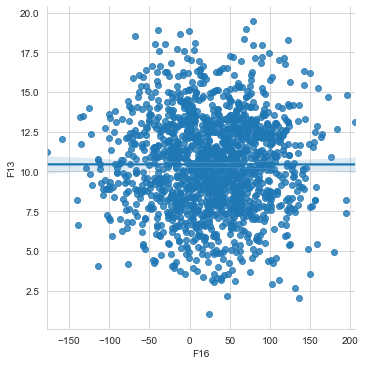

In [21]:
#shwoing the virtualization of the columns with the help of seaborn
sns.set_style('whitegrid') 
sns.lmplot(x ='F16', y ='F13', data = data_df) 

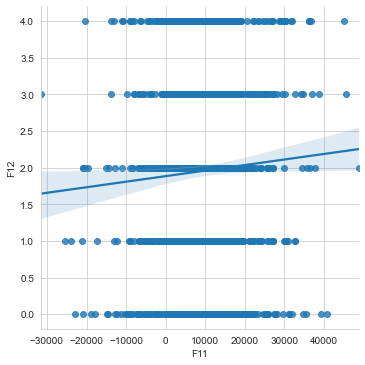

In [22]:
sns.set_style('whitegrid') 
sns.lmplot(x ='F11', y ='F12', data = data_df) 

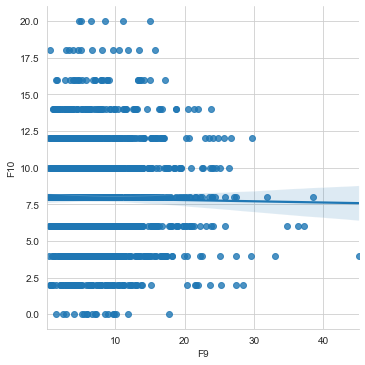

In [23]:
sns.set_style('whitegrid') 
sns.lmplot(x ='F9', y ='F10', data = data_df) 

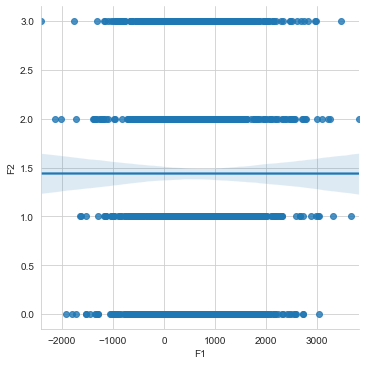

In [24]:
sns.set_style('whitegrid') 
sns.lmplot(x ='F1', y ='F2', data = data_df) 

In [25]:
#printing the max, min, range of all columns
for i in data_df.columns:
    if data_df[i].dtype!="object":
#     if df[i].dtype!="str": 
        print(f"max , min and range for {i}  are {data_df[i].max()}, {data_df[i].min()} and {(data_df[i].max()-data_df[i].min())}\n\n")

max , min and range for F1  are 3821.25, -2409.54 and 6230.79


max , min and range for F2  are 3, 0 and 3


max , min and range for F3  are 109.86, -21.75 and 131.61


max , min and range for F4  are 70.17, 0.12 and 70.05


max , min and range for F5  are 357.1, -114.37 and 471.47


max , min and range for F6  are 471.84, 23.96 and 447.88


max , min and range for F7  are 4347.66, -1827.36 and 6175.0199999999995


max , min and range for F8  are 5.21, -14.56 and 19.77


max , min and range for F9  are 45.14, 0.08 and 45.06


max , min and range for F10  are 20, 0 and 20


max , min and range for F11  are 48778.12, -31452.34 and 80230.46


max , min and range for F12  are 4, 0 and 4


max , min and range for F13  are 19.47, 1.02 and 18.45


max , min and range for F14  are 27474.53, 0.0 and 27474.53


max , min and range for F15  are 11, 0 and 11


max , min and range for F16  are 206.4, -177.88 and 384.28


max , min and range for Target  are 3960.01, 0.0 and 3960.01




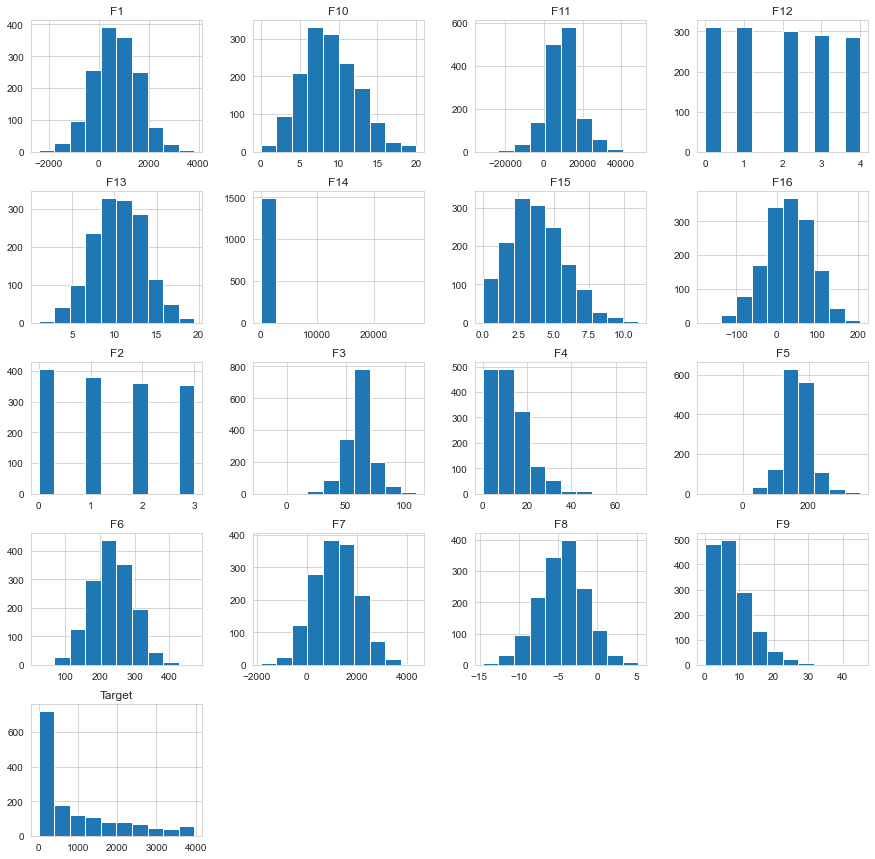

In [26]:
#plotting histogram for the columns
hist=data_df.hist(figsize=(15,15))

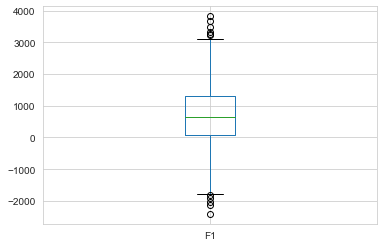

In [27]:
#ploting the boxplot for the data-set
boxplot1 = data_df.boxplot(column=['F1'])

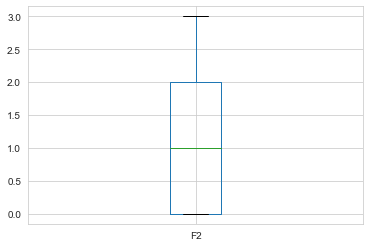

In [28]:
boxplot2 = data_df.boxplot(column=['F2'])

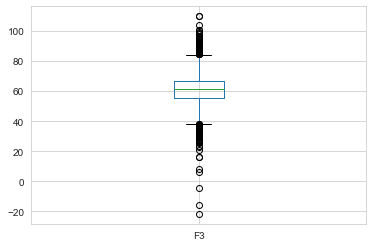

In [29]:
boxplot3 = data_df.boxplot(column=['F3'])

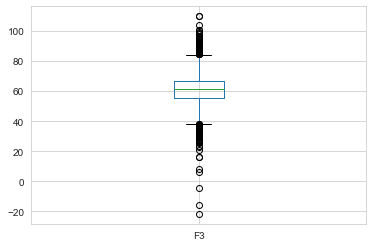

In [30]:
boxplot4 = data_df.boxplot(column=['F3'])

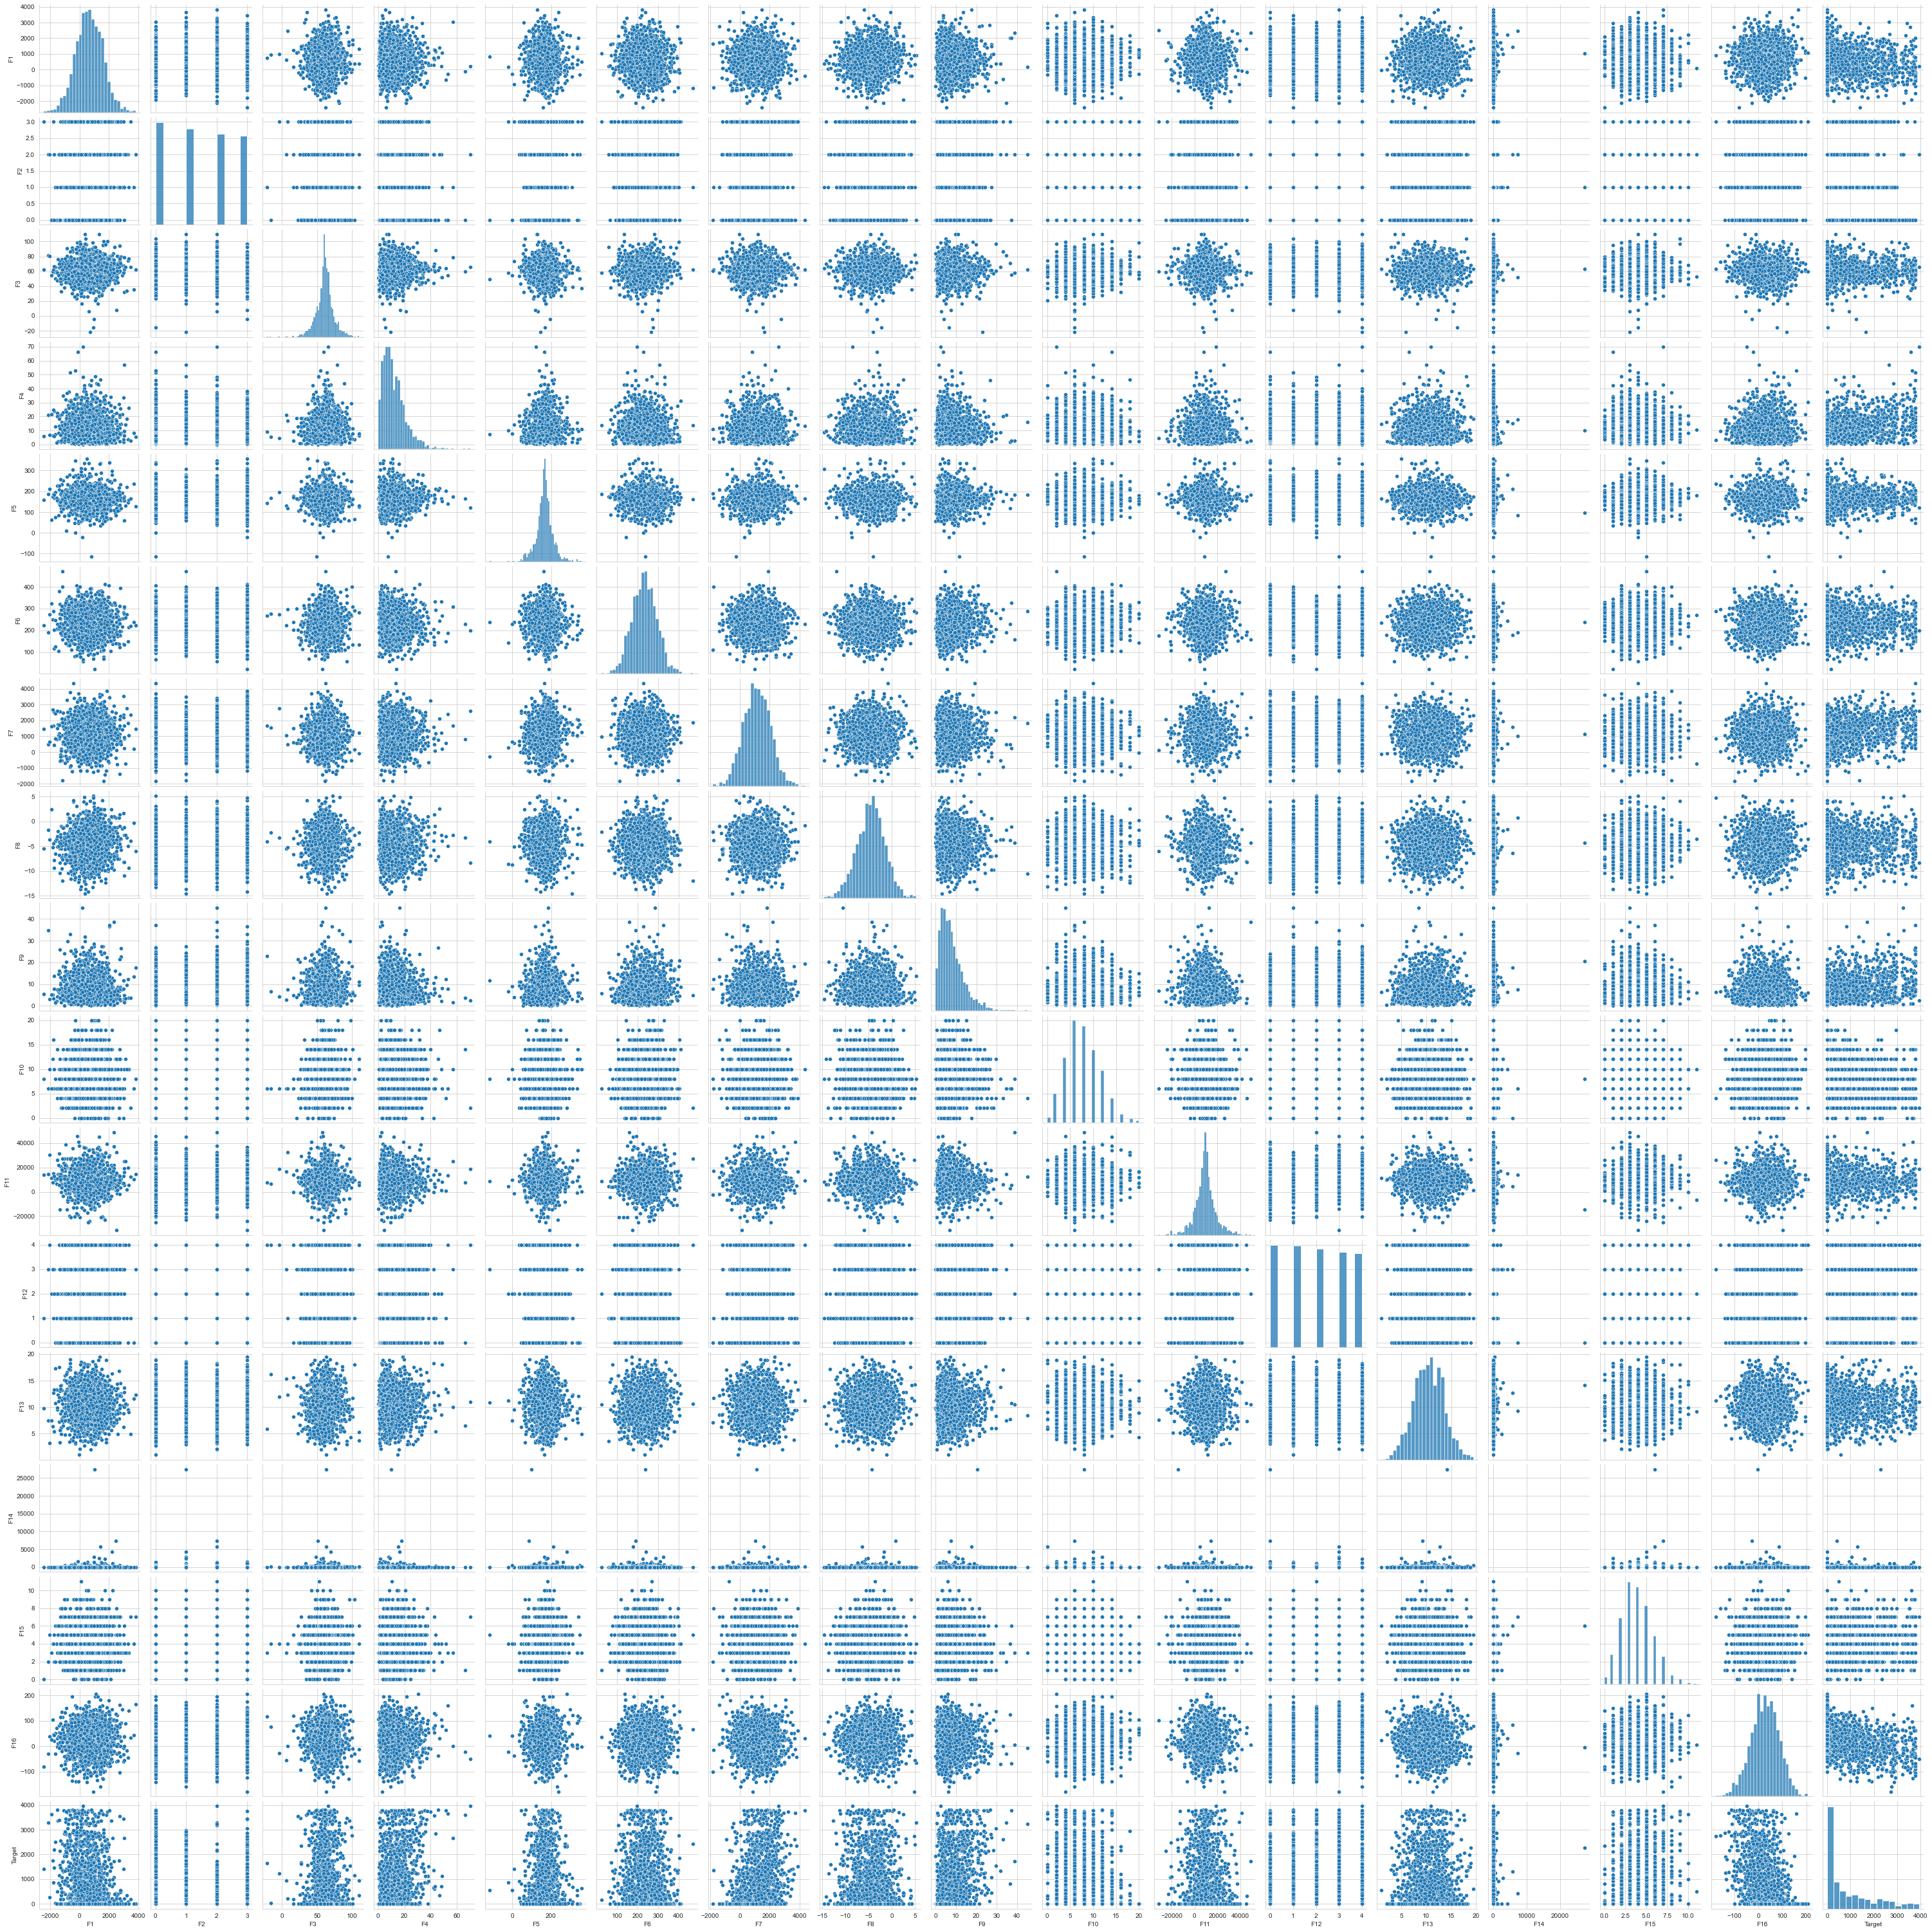

In [31]:
#showing the pairplot by using seaborn
sns.pairplot(data_df)

In [32]:
X = data_df.iloc[:,:-1]

In [33]:
Y = data_df.iloc[:,-1]

# split data into test and train

In [34]:
#split data into test and train with 33% and 67% respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Model Training 

# Linear Regression

In [35]:
#Importing the Algorithms KNN,RandomForestRegressor, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge

In [36]:
from sklearn.linear_model import LinearRegression
reg_linear = LinearRegression()
#Fitting the model wiht trained data set
reg_linear.fit(X_train,y_train)

LinearRegression()

In [37]:
## from sklearn.model_selection import learning_curve
train_sizes = [0.2, 0.4, 0.6, 0.8, 1]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = X_train,
y = y_train, train_sizes = train_sizes, cv = 2,
scoring = 'neg_mean_squared_error')

In [38]:
train_scores

array([[-309291.84812491, -316889.93574795],
       [-303733.14199629, -301575.28194619],
       [-309139.05443139, -347663.04645637],
       [-300300.76277878, -343606.57360171],
       [-313104.6544242 , -326464.87388613]])

In [39]:
trainscore= pd.DataFrame({"split1":train_scores[:,0], "split2":train_scores[:,1]}, index=[0.2, 0.4, 0.6, 0.8, 1])

In [40]:
trainscore

split1         split2
0.2 -309291.848125 -316889.935748
0.4 -303733.141996 -301575.281946
0.6 -309139.054431 -347663.046456
0.8 -300300.762779 -343606.573602
1.0 -313104.654424 -326464.873886

In [41]:
valid_score= pd.DataFrame({"split1":validation_scores[:,0], "split2":validation_scores[:,1]}, index=[0.2, 0.4, 0.6, 0.8, 1])

In [42]:
valid_score

split1         split2
0.2 -417995.702947 -357036.531735
0.4 -368841.575091 -354978.183726
0.6 -362705.168700 -337566.077923
0.8 -344343.319132 -328006.792745
1.0 -340261.610484 -326006.908333

In [43]:
# Eavaluation of regression MODEL
y_pred = reg_linear.predict(X_test)
MAE = mtr.mean_absolute_error(y_test, y_pred)
MSE = mtr.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("Losses for the linear Regression is \n MAE -- {}\n MSE-- {} \n RMSE -- {}".format(MAE, MSE, RMSE))

Losses for the linear Regression is 
 MAE -- 462.49967100390694
 MSE-- 331491.9820992143 
 RMSE -- 575.7534038972017


In [44]:
#lets train on two other algorithms SVR and RCF


# KNN

In [45]:
#Creating KNN alogrithm
reg_knn=KNeighborsRegressor()
reg_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [46]:
#from sklearn importing learning_curve function
train_sizes = [0.2, 0.4, 0.6, 0.8, 1]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = KNeighborsRegressor(),
X = X_train,
y = y_train, train_sizes = train_sizes, cv = 2,
scoring = 'neg_mean_squared_error')

In [47]:
trainscore= pd.DataFrame({"split1":train_scores[:,0], "split2":train_scores[:,1]}, index=[0.2, 0.4, 0.6, 0.8, 1])
trainscore

split1         split2
0.2 -991731.325599 -863502.609213
0.4 -942018.810191 -778108.455886
0.6 -883738.785587 -860213.513971
0.8 -805397.452695 -825336.062040
1.0 -781439.104950 -820219.438432

In [48]:
valid_score= pd.DataFrame({"split1":validation_scores[:,0], "split2":validation_scores[:,1]}, index=[0.2, 0.4, 0.6, 0.8, 1])
valid_score

split1        split2
0.2 -1.602075e+06 -1.482971e+06
0.4 -1.436577e+06 -1.419662e+06
0.6 -1.235436e+06 -1.382384e+06
0.8 -1.258594e+06 -1.339953e+06
1.0 -1.251583e+06 -1.339276e+06

In [49]:
#Calculating the mean square vales and absolute error

In [50]:
y_pred = reg_knn.predict(X_test)
MAE = mtr.mean_absolute_error(y_test, y_pred)
MSE = mtr.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("Losses for the support vector regression Regression is \n MAE -- {}\n MSE-- {} \n RMSE -- {}".format(MAE, MSE, RMSE))

Losses for the support vector regression Regression is 
 MAE -- 862.55344
 MSE-- 1237792.4806338665 
 RMSE -- 1112.5612255664255


In [51]:
## SVR is giving very bad result not good for the given datasets

# RF

In [52]:
#Creating a RF algorithm
from sklearn.ensemble import RandomForestRegressor
reg_rcf = RandomForestRegressor(max_depth=11, random_state=0)
reg_rcf.fit(X_train,y_train)

RandomForestRegressor(max_depth=11, random_state=0)

In [53]:
#from sklearn importing learning_curve function
train_sizes = [0.2, 0.4, 0.6, 0.8, 1]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = reg_rcf,
X = X_train,
y = y_train, train_sizes = train_sizes, cv = 2,
scoring = 'neg_mean_squared_error')

In [54]:
trainscore= pd.DataFrame({"split1":train_scores[:,0], "split2":train_scores[:,1]}, index=[0.2, 0.4, 0.6, 0.8, 1])
trainscore

split1         split2
0.2 -110840.895555 -110907.485957
0.4  -77763.016845  -68636.182701
0.6  -69991.369850  -72318.495779
0.8  -67722.307617  -65032.604296
1.0  -65696.027254  -58598.159467

In [55]:
valid_score= pd.DataFrame({"split1":validation_scores[:,0], "split2":validation_scores[:,1]}, index=[0.2, 0.4, 0.6, 0.8, 1])
valid_score

split1         split2
0.2 -578635.598779 -671403.787220
0.4 -521928.857089 -692674.264480
0.6 -512378.708487 -582338.069940
0.8 -466729.519675 -530969.214196
1.0 -443231.175985 -483215.291239

In [ ]:
#Calculating the MAE, MSE, RMSE values for RCF

In [56]:
y_pred = reg_rcf.predict(X_test)
MAE = mtr.mean_absolute_error(y_test, y_pred)
MSE = mtr.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("Losses for the rcf is \n MAE -- {}\n MSE-- {} \n RMSE -- {}".format(MAE, MSE, RMSE))

Losses for the rcf is 
 MAE -- 470.88850176314656
 MSE-- 403002.690356004 
 RMSE -- 634.8249289024526


In [57]:
X_test.shape

(450, 16)

In [ ]:
#Printing the scores of all three algorithms of training data

In [58]:
print("Score for linear Regression on training data {}".format(reg_linear.score(X_train, y_train, sample_weight=None)))
print("Score for knn on training data {}".format(reg_knn.score(X_train, y_train, sample_weight=None)))
print("Score for Randomforest  on training data {}".format(reg_rcf.score(X_train, y_train, sample_weight=None)))    

Score for linear Regression on training data 0.7311040778054647
Score for knn on training data 0.34555375608053995
Score for Randomforest  on training data 0.9516757480746513


In [59]:
#Printing the scores of all three algorithms of testing data
print("Score for linear Regression on test data {}".format(reg_linear.score(X_test, y_test, sample_weight=None)))
print("Score for knn   on test data {}".format(reg_knn.score(X_test, y_test, sample_weight=None)))
print("Score for Randomforest  on test data {}".format(reg_rcf.score(X_test, y_test, sample_weight=None)))    

Score for linear Regression on test data 0.7173296962209175
Score for knn   on test data -0.05549212472813081
Score for Randomforest  on test data 0.656350985669921


In [60]:
#prediction on hold set
#Reading test.csv file

In [61]:
testDf = pd.read_csv("D:/Uni of Essex/ML Assignment/CE802_P3_Data (3)/CE802_P3_Test.csv")

In [62]:
#printing top 5 results
testDf.head()

F1      F2     F3     F4      F5      F6       F7    F8     F9  F10  \
0   596.16    Rest  72.24   6.00  154.48  184.18   226.65 -8.21  18.46   10   
1  1851.57  Europe  63.09  10.47  200.93  183.48  1101.51 -7.91   3.76    4   
2  -945.60     USA  71.22   8.25  190.35  243.96   924.93 -6.35   2.48    6   
3  1153.38  Europe  62.52   7.41  165.21  245.64  1017.09 -5.84   6.58   14   
4  -261.63      UK  60.87  10.14  201.96  216.28  1350.96 -2.75   4.02    6   

        F11        F12    F13     F14  F15     F16  Target  
0   6547.48  Very high   9.24    0.69    3   45.06     NaN  
1   -983.62     Medium   8.20   17.90    5   88.64     NaN  
2  -2366.10  Very high  11.10  329.72    2  -41.36     NaN  
3   -503.06       High   7.53    0.00    2  -91.60     NaN  
4  19521.62       High   8.99  360.26    4  154.32     NaN

In [63]:
#Mapping F12 values with numbers
map_f12 = {"Very low" : 0, "Low":1, "High": 2, "Very high": 3, "Medium": 4}
testDf['F12'] = testDf["F12"].map(map_f12)

In [64]:
#Mapping F2 values with numbers
map_f2 = {"USA":0, "Europe":1, "Rest":2, "UK":3}
testDf["F2"] = testDf["F2"].map(map_f2)

In [65]:
X_pred = testDf.iloc[:,0:-1]

In [66]:
#Predicting the values using linear regression
y_pred = reg_linear.predict(X_pred)

In [67]:
y_pred

array([ 589.60053198,  437.10162687, 1587.91576774, ..., 1188.3933125 ,
       1812.78143879,  198.50068437])

In [68]:
Final_df = pd.DataFrame([X_pred, y_pred])

In [69]:
Final_df = X_pred

In [70]:
#Mapping the predicted values to target column
Final_df["Target"] = y_pred

In [71]:
Final_df.head()

F1  F2     F3     F4      F5      F6       F7    F8     F9  F10  \
0   596.16   2  72.24   6.00  154.48  184.18   226.65 -8.21  18.46   10   
1  1851.57   1  63.09  10.47  200.93  183.48  1101.51 -7.91   3.76    4   
2  -945.60   0  71.22   8.25  190.35  243.96   924.93 -6.35   2.48    6   
3  1153.38   1  62.52   7.41  165.21  245.64  1017.09 -5.84   6.58   14   
4  -261.63   3  60.87  10.14  201.96  216.28  1350.96 -2.75   4.02    6   

        F11  F12    F13     F14  F15     F16       Target  
0   6547.48    3   9.24    0.69    3   45.06   589.600532  
1   -983.62    4   8.20   17.90    5   88.64   437.101627  
2  -2366.10    3  11.10  329.72    2  -41.36  1587.915768  
3   -503.06    2   7.53    0.00    2  -91.60   858.842111  
4  19521.62    2   8.99  360.26    4  154.32  -339.293186

In [72]:
#Writing the test file to a particular location with extention .csv
Final_df.to_csv("D:\Conda\ML Assignment\P3\CE802_P3_Test.csv",index=False)